In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# ---- CONFIG ----
IN_FILE = "cleaned_dataset.csv"
OUT_DIR = Path("plots")
CHUNKSIZE = 200_000
SEP = ","

OUT_DIR.mkdir(exist_ok=True)

# ---- Load whole file (smaller than raw, should fit in RAM) ----
df = pd.read_csv(IN_FILE, sep=SEP, low_memory=False)

# Ensure Reactie_type is string
df["Reactie_type"] = df["Reactie_type"].astype(str)

# ---- Split columns ----
target = "Reactie_type"
exclude = [target, "Tijdstempel", "Ordernummer", "Aanvraag_Indienmoment"]  # skip ID/time columns for plotting
cols = [c for c in df.columns if c not in exclude]

num_cols = df[cols].select_dtypes(include=["number"]).columns.tolist()
cat_cols = [c for c in cols if c not in num_cols]

print(f"Numeric cols: {num_cols}")
print(f"Categorical cols: {cat_cols}")

# ---- Plot numeric vs Reactie_type ----
for col in num_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x=target, y=col)
    plt.title(f"{col} vs {target}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(OUT_DIR / f"{col}_box_vs_{target}.png")
    plt.close()

    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x=col, hue=target, multiple="stack", bins=30)
    plt.title(f"{col} distribution by {target}")
    plt.tight_layout()
    plt.savefig(OUT_DIR / f"{col}_hist_vs_{target}.png")
    plt.close()

# ---- Plot categorical vs Reactie_type ----
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    order = df[col].value_counts().index[:20]  # top 20 categories
    sns.countplot(data=df, y=col, hue=target, order=order)
    plt.title(f"{col} vs {target}")
    plt.tight_layout()
    plt.savefig(OUT_DIR / f"{col}_count_vs_{target}.png")
    plt.close()

print(f"✅ Saved plots to {OUT_DIR.resolve()}")


Numeric cols: ['Aanvraag_Dienstregelingjaar', 'Aanvraag_Eerste_Locatie_MaxLengte', 'Aanvraag_Eerste_Locatie_MaxSnelheid', 'Aanvraag_Eerste_Locatie_MaxGewicht', 'Number_Of_Stops_requested', 'Aanvraag_time_range_Eerste_Locatie_Vertrektijd', 'Aanvraag_time_range_Laatste_Locatie_Aankomsttijd', 'Aanvraag_Eerste_Locatie_Opstellen_True', 'Aanvraag_Laatste_Locatie_Opstellen_True']
Categorical cols: ['Procestype', 'Aanvrager_Verkorting', 'Aanvraag_vervoerder_verkorting', 'Aanvraag_Eerste_Locatie_Dienstregelpunt', 'Aanvraag_Eerste_Locatie_DienstregelpuntSpoor', 'Aanvraag_Eerste_Locatie_Vroegste_Vertrektijd', 'Aanvraag_Eerste_Locatie_Laatste_Vertrektijd', 'Aanvraag_Laatste_Locatie_Dienstregelpunt', 'Aanvraag_Laatste_Locatie_DienstregelpuntSpoor', 'Aanvraag_Laatste_Locatie_Vroegste_Aankomsttijd', 'Aanvraag_Laatste_Locatie_Laatste_Aankomsttijd', 'Aanvraag_Day', 'Aanvraag_time']
✅ Saved plots to C:\Users\quint\Downloads\plots


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# ---- CONFIG ----
IN_FILE = "cleaned_dataset.csv"
OUT_DIR = Path("plots")
SEP = ","

OUT_DIR.mkdir(exist_ok=True)

# ---- Load cleaned dataset ----
df = pd.read_csv(IN_FILE, sep=SEP, low_memory=False)

# Ensure Reactie_type is string
df["Reactie_type"] = df["Reactie_type"].astype(str)

# ---- Helper function ----
def plot_categorical(df, col, target="Reactie_type", top_n=20):
    plt.figure(figsize=(10, 6))
    order = df[col].value_counts().index[:top_n]  # Top N most frequent values
    sns.countplot(data=df, y=col, hue=target, order=order)
    plt.title(f"{col} vs {target}")
    plt.tight_layout()
    out_path = OUT_DIR / f"{col}_count_vs_{target}.png"
    plt.savefig(out_path)
    plt.close()
    print(f"✅ Saved {out_path}")

# ---- Plots for the three requested columns ----
plot_categorical(df, "Aanvraag_Day")
plot_categorical(df, "Aanvraag_Eerste_Locatie_Dienstregelpunt")
plot_categorical(df, "Aanvraag_Laatste_Locatie_Dienstregelpunt")


✅ Saved plots\Aanvraag_Day_count_vs_Reactie_type.png
✅ Saved plots\Aanvraag_Eerste_Locatie_Dienstregelpunt_count_vs_Reactie_type.png
✅ Saved plots\Aanvraag_Laatste_Locatie_Dienstregelpunt_count_vs_Reactie_type.png


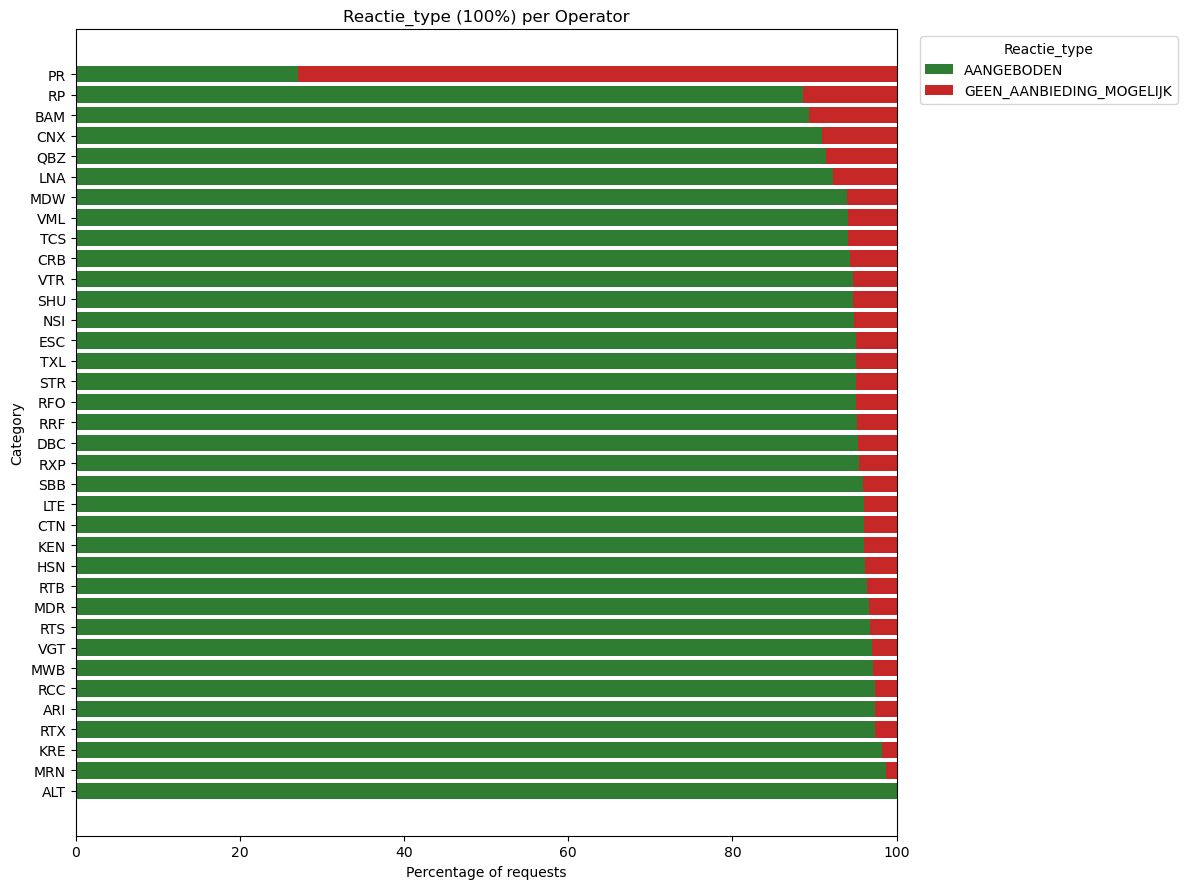

[OK] Saved plots_cumulative\reactie_100pct_operator.png


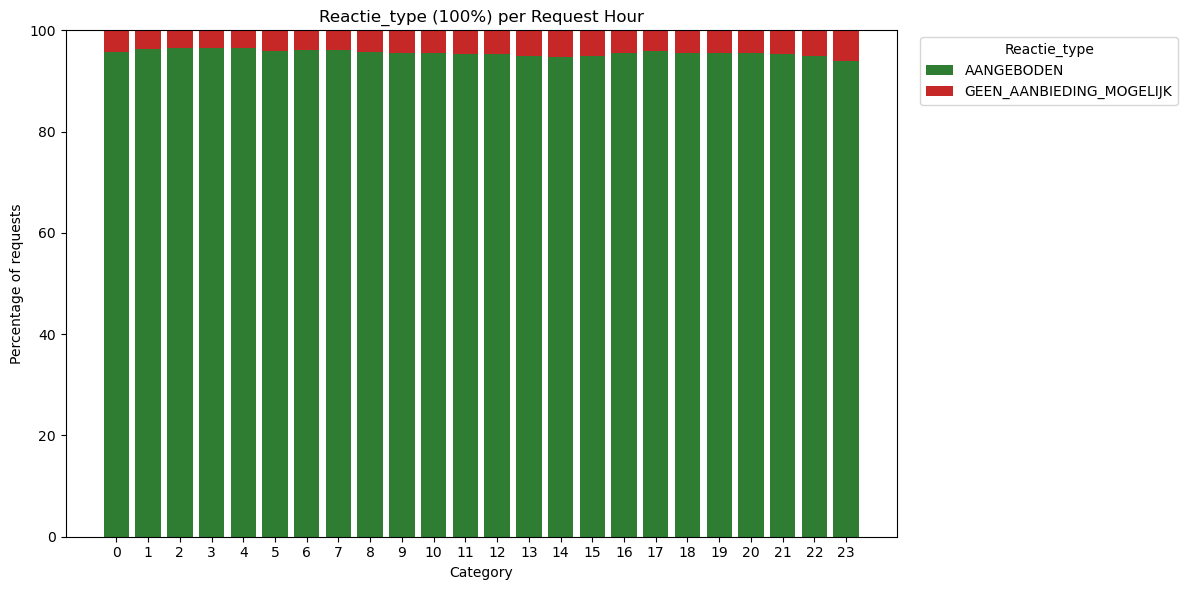

[OK] Saved plots_cumulative\reactie_100pct_req_hour.png


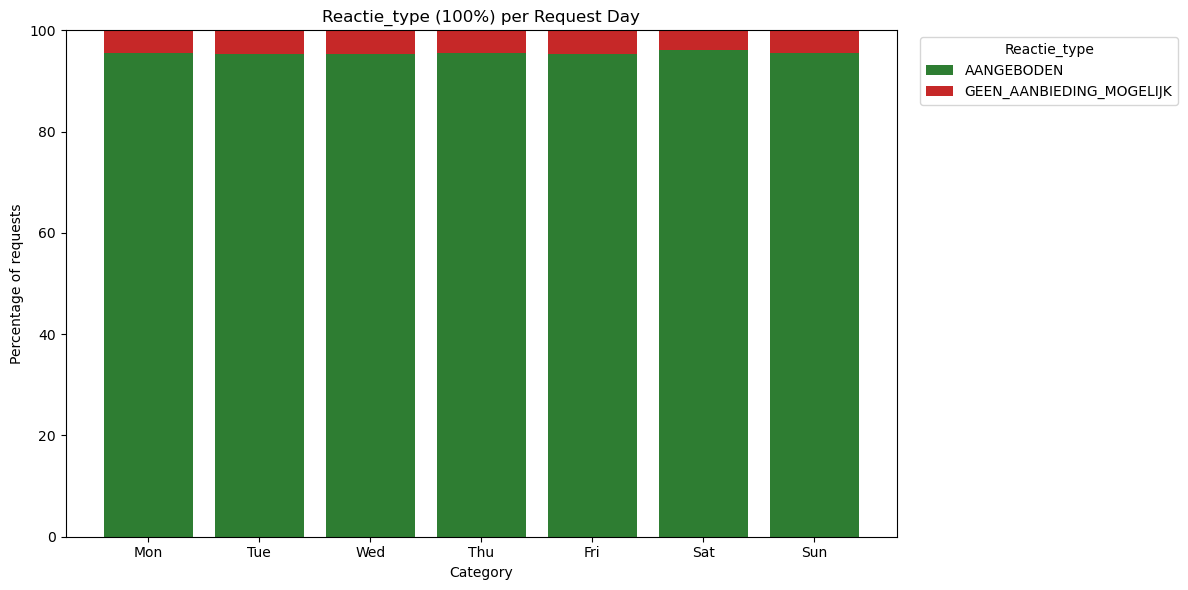

[OK] Saved plots_cumulative\reactie_100pct_req_day.png


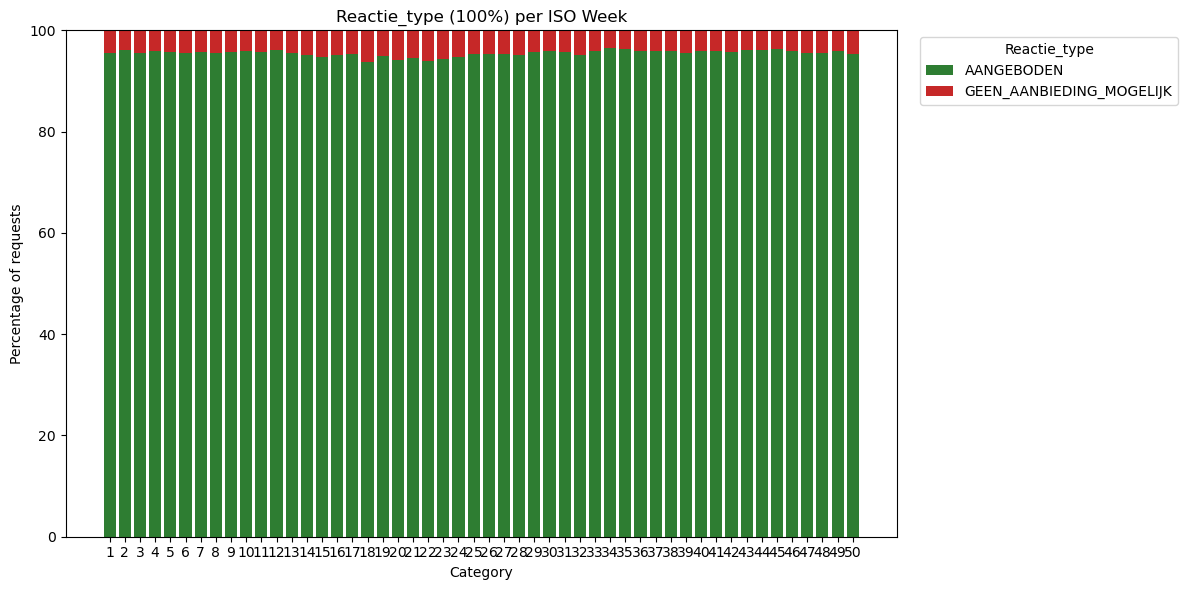

[OK] Saved plots_cumulative\reactie_100pct_req_week.png


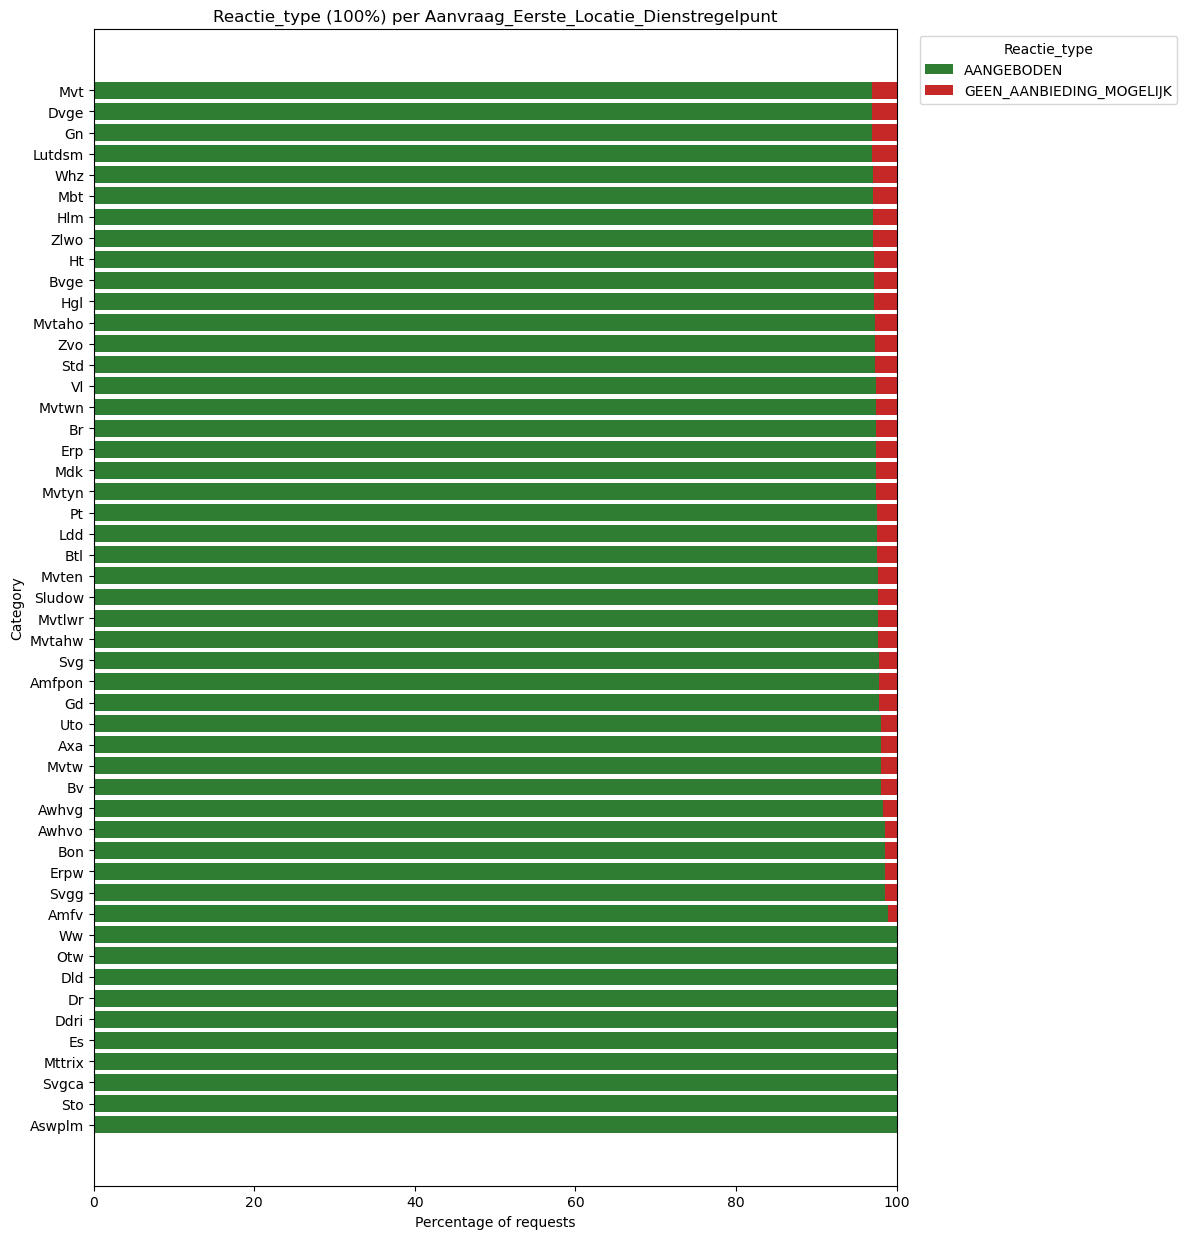

[OK] Saved plots_cumulative\reactie_100pct_first_location.png


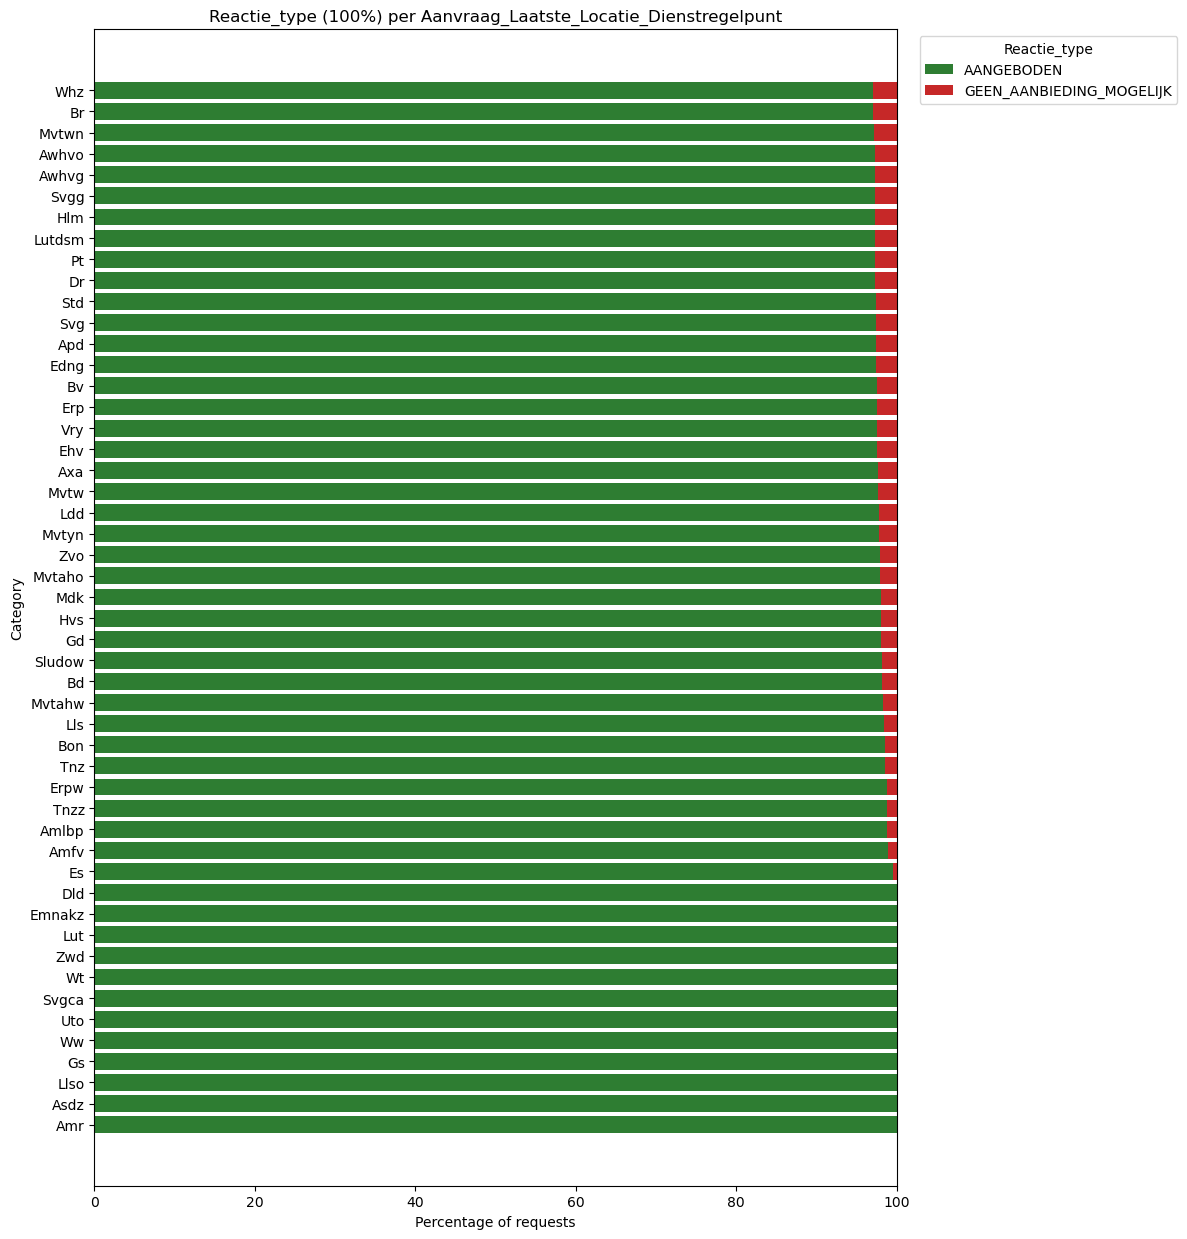

[OK] Saved plots_cumulative\reactie_100pct_last_location.png


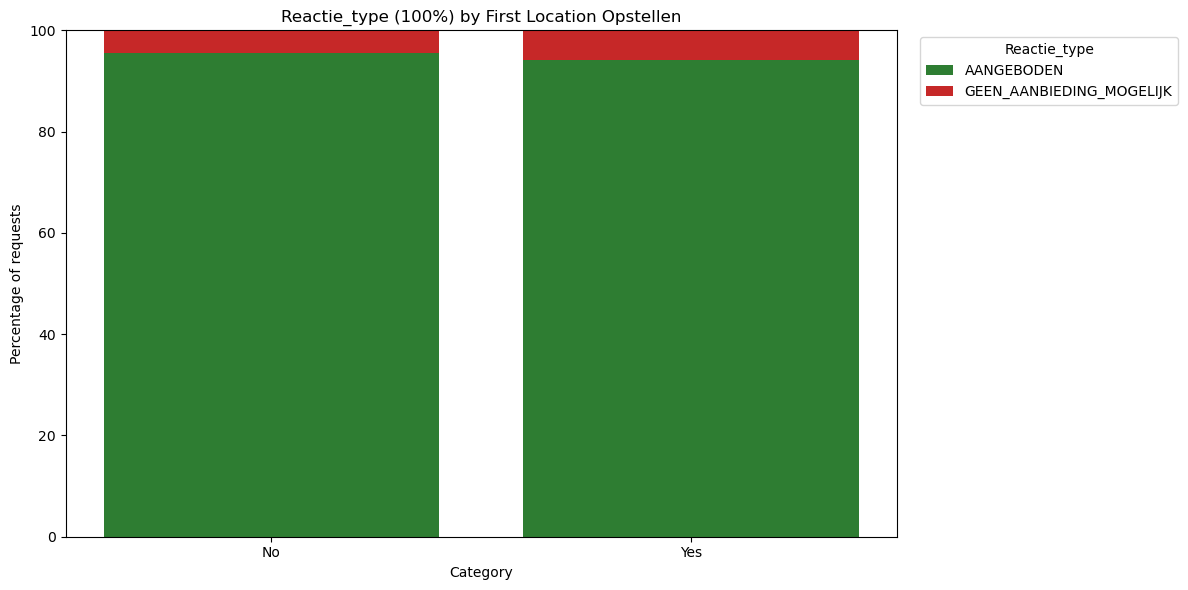

[OK] Saved plots_cumulative\reactie_100pct_first_opstel.png


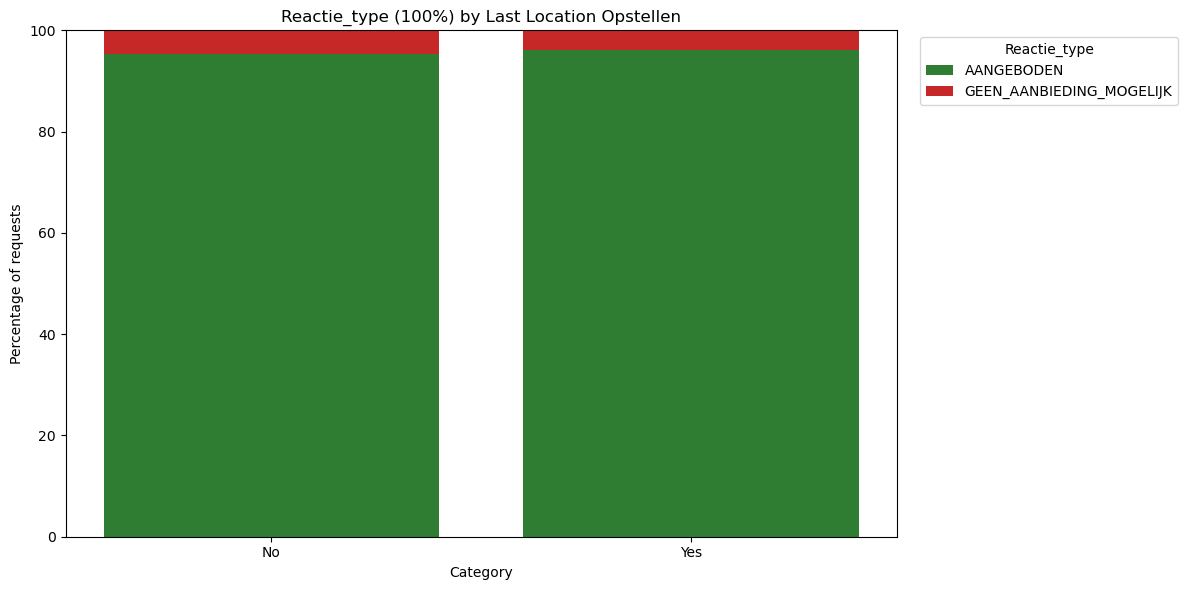

[OK] Saved plots_cumulative\reactie_100pct_last_opstel.png


C:\Users\quint\AppData\Local\Temp\ipykernel_9164\1338971612.py:269: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = (tmp.groupby(["bin", TARGET]).size()


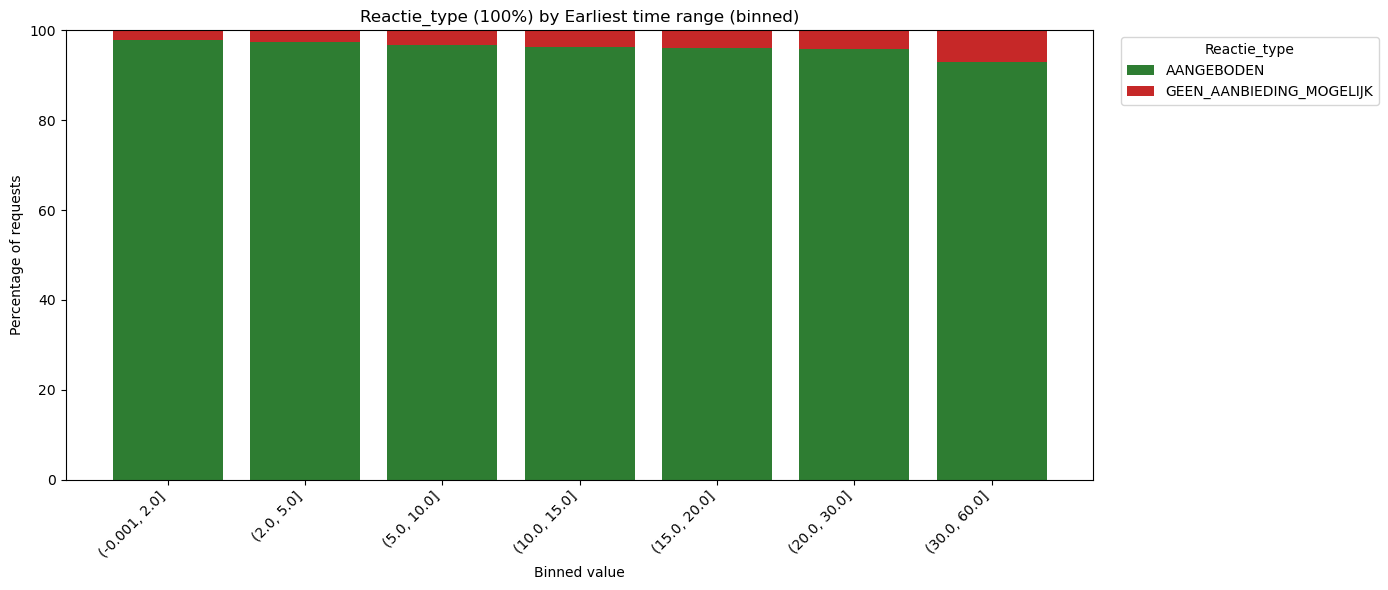

[OK] Saved plots_cumulative\reactie_100pct_binned_earliest_time_range.png


C:\Users\quint\AppData\Local\Temp\ipykernel_9164\1338971612.py:269: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = (tmp.groupby(["bin", TARGET]).size()


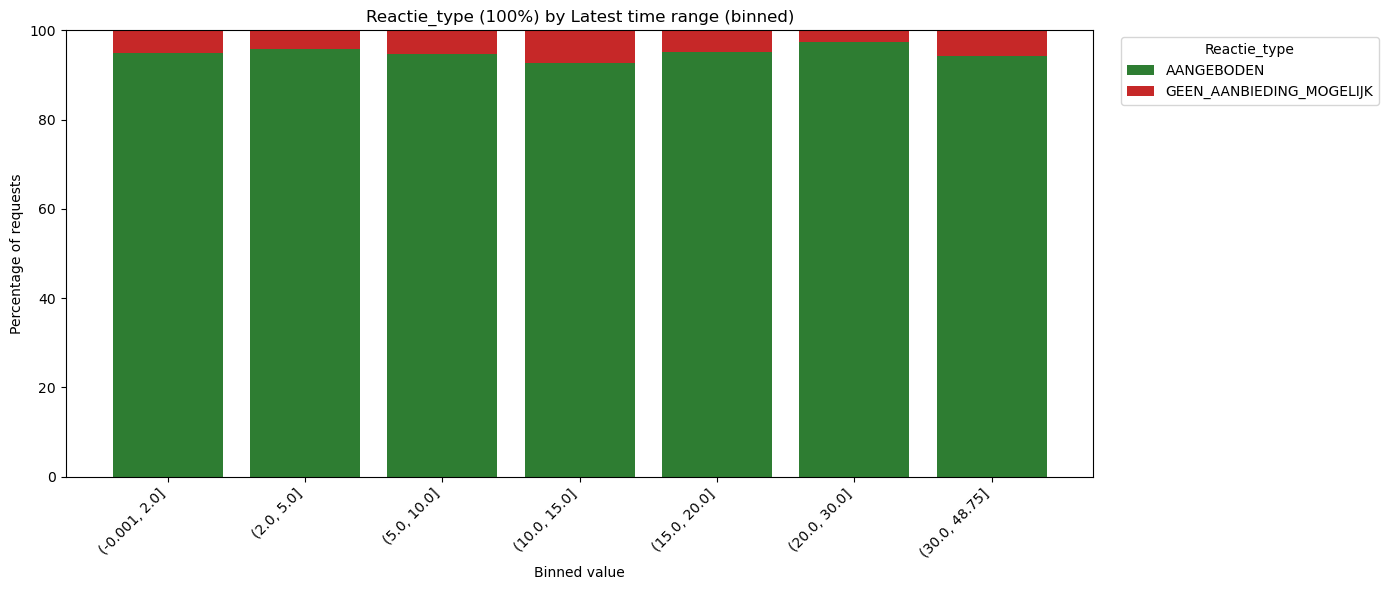

[OK] Saved plots_cumulative\reactie_100pct_binned_latest_time_range.png


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# ===================== CONFIG =====================
FILES = ["cleaned_dataset_1.csv", "cleaned_dataset_2.csv", "cleaned_dataset_3.csv"]
OUT_DIR = Path("plots_cumulative"); OUT_DIR.mkdir(exist_ok=True, parents=True)

TARGET = "Reactie_type"

# Consistent class order + colors across all plots
REACTIE_ORDER = ["AANGEBODEN", "GEEN_AANBIEDING_MOGELIJK", "AFWIJZING", "ANNULEER_BEVESTIGING"]
COLOR_MAP = {
    "AANGEBODEN":               "#2E7D32",  # green
    "GEEN_AANBIEDING_MOGELIJK": "#C62828",  # red
    "AFWIJZING":                "#6A1B9A",  # purple
    "ANNULEER_BEVESTIGING":     "#FF8F00",  # amber
}

# Plot selection (set True/False)
PLOT_OPERATOR          = True   # Aanvrager_Verkorting (or Aanvraag_vervoerder_verkorting)
PLOT_REQ_HOUR          = True   # hour of Aanvraag_Indienmoment
PLOT_REQ_DAY           = True   # day name
PLOT_REQ_WEEK          = True   # ISO week number
PLOT_FIRST_LOC         = True   # Aanvraag_Eerste_Locatie_Dienstregelpunt
PLOT_LAST_LOC          = True   # Aanvraag_Laatste_Locatie_Dienstregelpunt
PLOT_FIRST_OPSTEL      = True   # Aanvraag_Eerste_Locatie_Opstellen_True (expects 0/1 or Yes/No/Unknown)
PLOT_LAST_OPSTEL       = True   # Aanvraag_Laatste_Locatie_Opstellen_True
PLOT_TIME_RANGE_FIRST  = True   # Aanvraag_time_range_Eerste_Locatie_Vertrektijd (numeric binned)
PLOT_TIME_RANGE_LAST   = True   # Aanvraag_time_range_Laatste_Locatie_Aankomsttijd (numeric binned)

# Filtering / readability
MIN_COUNT = 20     # minimum rows per category (locations/operators) to show
TOP_N     = 50     # max categories to display (after sorting). None = show all
NBINS     = 12     # numeric bins for time ranges
CLIP_PCT  = (0.01, 0.99)  # clip extremes before binning
# ===================================================


def load_concat(files):
    dfs = []
    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
        except UnicodeDecodeError:
            df = pd.read_csv(f, low_memory=False, encoding="latin1")
        df[TARGET] = df[TARGET].astype(str).str.strip()
        dfs.append(df)
    if not dfs:
        raise RuntimeError("No files loaded.")
    return pd.concat(dfs, ignore_index=True)


def find_col(df, candidates):
    low = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in low:
            return low[cand.lower()]
    return None


def ensure_time_features(df):
    req_col = find_col(df, ["Aanvraag_Indienmoment"])
    req_dt = pd.to_datetime(df[req_col], errors="coerce")
    df["_req_hour"] = req_dt.dt.hour
    df["_req_dow"]  = req_dt.dt.dayofweek
    df["_req_week"] = (req_dt.dt.isocalendar().week
                       if hasattr(req_dt.dt, "isocalendar")
                       else pd.Series(pd.NA, index=req_dt.index, dtype="Int64"))
    df["_req_day_name"] = df["_req_dow"].map({0:"Mon",1:"Tue",2:"Wed",3:"Thu",4:"Fri",5:"Sat",6:"Sun"})
    return df


def norm_table(df, cat_col):
    sub = df[[cat_col, TARGET]].dropna()
    if sub.empty:
        return None, None
    sub[TARGET] = sub[TARGET].astype(str).str.strip()

    counts = (sub.groupby([cat_col, TARGET]).size()
                .rename("n").reset_index())
    pivot = counts.pivot(index=cat_col, columns=TARGET, values="n").fillna(0)
    totals = pivot.sum(axis=1)

    # filter by min count
    if MIN_COUNT and MIN_COUNT > 0:
        keep = totals >= MIN_COUNT
        pivot = pivot.loc[keep]
        totals = totals.loc[keep]
    if pivot.empty:
        return None, None

    # normalize to 100%
    denom = pivot.sum(axis=1).replace(0, np.nan)
    pct = (pivot.div(denom, axis=0) * 100).dropna(how="all")

    # order columns consistently by REACTIE_ORDER then alphabetically
    cols_present = list(pct.columns)
    ordered_cols = [c for c in REACTIE_ORDER if c in cols_present] + sorted([c for c in cols_present if c not in REACTIE_ORDER])
    pct = pct[ordered_cols]

    # sort rows by AANGEBODEN share desc if present else by total
    sort_key = "AANGEBODEN" if "AANGEBODEN" in pct.columns else ordered_cols[0]
    pct = pct.sort_values(by=sort_key, ascending=False)
    totals = totals.reindex(pct.index)

    return pct, totals


def color_for(cls):
    return COLOR_MAP.get(str(cls), None)


def plot_norm_stacked(pct, title, outfile, horizontal=True):
    if pct is None or pct.empty:
        print(f"[WARN] No data to plot for {title}")
        return

    # truncate to TOP_N if requested
    tbl = pct
    if TOP_N is not None and TOP_N > 0 and len(tbl) > TOP_N:
        tbl = tbl.iloc[:TOP_N, :]

    plt.figure(figsize=(12, max(6, 0.25*len(tbl)) if horizontal else 6))
    class_order = list(tbl.columns)

    if horizontal:
        y = np.arange(len(tbl))
        left = np.zeros(len(tbl), dtype=float)
        for cls in class_order:
            vals = tbl[cls].to_numpy()
            plt.barh(y, vals, left=left, label=str(cls), color=color_for(cls))
            left += np.nan_to_num(vals, nan=0.0)
        plt.xlim(0, 100)
        plt.xlabel("Percentage of requests")
        plt.yticks(y, tbl.index.astype(str))
        plt.ylabel("Category")
    else:
        x = np.arange(len(tbl))
        bottom = np.zeros(len(tbl), dtype=float)
        for cls in class_order:
            vals = tbl[cls].to_numpy()
            plt.bar(x, vals, bottom=bottom, label=str(cls), color=color_for(cls))
            bottom += np.nan_to_num(vals, nan=0.0)
        plt.ylim(0, 100)
        plt.ylabel("Percentage of requests")
        plt.xticks(x, tbl.index.astype(str), rotation=0)
        plt.xlabel("Category")

    plt.title(title)
    plt.legend(title=TARGET, bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    out = OUT_DIR / outfile
    plt.savefig(out, dpi=150)
    plt.show()
    print(f"[OK] Saved {out}")


def bin_numeric(series, nbins=12, clip_pct=(0.01, 0.99)):
    s = pd.to_numeric(series, errors="coerce")
    s = s.replace([np.inf, -np.inf], np.nan).dropna()
    if s.empty:
        return None, None
    if clip_pct:
        s = s.clip(lower=s.quantile(clip_pct[0]), upper=s.quantile(clip_pct[1]))
    # quantile bins for balanced counts
    cats, edges = pd.qcut(s, q=nbins, retbins=True, duplicates="drop")
    cats = pd.Categorical(cats, ordered=True)
    return pd.Series(cats, index=s.index), list(map(str, cats.categories))


# ===================== RUN =====================
df = load_concat(FILES)
df = ensure_time_features(df)

# Column discovery (case-insensitive)
col_operator = find_col(df, ["Aanvrager_Verkorting", "Aanvraag_vervoerder_verkorting"])
col_first_loc = find_col(df, ["Aanvraag_Eerste_Locatie_Dienstregelpunt"])
col_last_loc  = find_col(df, ["Aanvraag_Laatste_Locatie_Dienstregelpunt"])
col_first_op  = find_col(df, ["Aanvraag_Eerste_Locatie_Opstellen_True"])
col_last_op   = find_col(df, ["Aanvraag_Laatste_Locatie_Opstellen_True"])
col_tr_first  = find_col(df, ["Aanvraag_time_range_Eerste_Locatie_Vertrektijd"])
col_tr_last   = find_col(df, ["Aanvraag_time_range_Laatste_Locatie_Aankomsttijd"])

# 1) Operator
if PLOT_OPERATOR and col_operator:
    pct, _ = norm_table(df, col_operator)
    if pct is not None:
        pct.to_csv(OUT_DIR / "normalized_by_operator.csv")
        plot_norm_stacked(pct, "Reactie_type (100%) per Operator", "reactie_100pct_operator.png", horizontal=True)

# 2) Hour of request
if PLOT_REQ_HOUR:
    order = list(range(24))
    df["_req_hour"] = pd.to_numeric(df["_req_hour"], errors="coerce")
    tbl = df[["_req_hour", TARGET]].dropna()
    tbl["_req_hour"] = tbl["_req_hour"].astype(int)
    pct, _ = norm_table(tbl.rename(columns={"_req_hour": "req_hour"}), "req_hour")
    if pct is not None:
        pct = pct.reindex(order).dropna(how="all")
        pct.to_csv(OUT_DIR / "normalized_by_request_hour.csv")
        plot_norm_stacked(pct, "Reactie_type (100%) per Request Hour", "reactie_100pct_req_hour.png", horizontal=False)

# 3) Day of week
if PLOT_REQ_DAY:
    day_order = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
    tbl = df[["_req_day_name", TARGET]].dropna()
    pct, _ = norm_table(tbl.rename(columns={"_req_day_name": "req_day"}), "req_day")
    if pct is not None:
        pct = pct.reindex(day_order).dropna(how="all")
        pct.to_csv(OUT_DIR / "normalized_by_request_day.csv")
        plot_norm_stacked(pct, "Reactie_type (100%) per Request Day", "reactie_100pct_req_day.png", horizontal=False)

# 4) ISO Week
if PLOT_REQ_WEEK:
    tbl = df[["_req_week", TARGET]].dropna()
    tbl["_req_week"] = tbl["_req_week"].astype(int)
    pct, _ = norm_table(tbl.rename(columns={"_req_week": "req_week"}), "req_week")
    if pct is not None:
        pct = pct.sort_index()
        pct.to_csv(OUT_DIR / "normalized_by_request_week.csv")
        plot_norm_stacked(pct, "Reactie_type (100%) per ISO Week", "reactie_100pct_req_week.png", horizontal=False)

# 5) First/Last location
if PLOT_FIRST_LOC and col_first_loc:
    pct, _ = norm_table(df, col_first_loc)
    if pct is not None:
        pct.to_csv(OUT_DIR / "normalized_by_first_location.csv")
        plot_norm_stacked(pct, f"Reactie_type (100%) per {col_first_loc}", "reactie_100pct_first_location.png", horizontal=True)

if PLOT_LAST_LOC and col_last_loc:
    pct, _ = norm_table(df, col_last_loc)
    if pct is not None:
        pct.to_csv(OUT_DIR / "normalized_by_last_location.csv")
        plot_norm_stacked(pct, f"Reactie_type (100%) per {col_last_loc}", "reactie_100pct_last_location.png", horizontal=True)

# 6) Opstellen flags
def label_yes_no_unknown(s):
    s = pd.to_numeric(s, errors="coerce")
    out = pd.Series(index=s.index, dtype="string")
    out[s == 1] = "Yes"; out[s == 0] = "No"; out[s.isna()] = "Unknown"
    return out

if PLOT_FIRST_OPSTEL and col_first_op:
    df["_first_opstel_label"] = label_yes_no_unknown(df[col_first_op])
    pct, _ = norm_table(df.rename(columns={"_first_opstel_label":"first_opstel"}), "first_opstel")
    if pct is not None:
        pct = pct.reindex(["No","Yes","Unknown"]).dropna(how="all")
        pct.to_csv(OUT_DIR / "normalized_by_first_opstel.csv")
        plot_norm_stacked(pct, "Reactie_type (100%) by First Location Opstellen", "reactie_100pct_first_opstel.png", horizontal=False)

if PLOT_LAST_OPSTEL and col_last_op:
    df["_last_opstel_label"] = label_yes_no_unknown(df[col_last_op])
    pct, _ = norm_table(df.rename(columns={"_last_opstel_label":"last_opstel"}), "last_opstel")
    if pct is not None:
        pct = pct.reindex(["No","Yes","Unknown"]).dropna(how="all")
        pct.to_csv(OUT_DIR / "normalized_by_last_opstel.csv")
        plot_norm_stacked(pct, "Reactie_type (100%) by Last Location Opstellen", "reactie_100pct_last_opstel.png", horizontal=False)

# 7) Numeric time ranges (binned)
def binned_norm_plot(series, title, outfile):
    cats, _ = bin_numeric(series, nbins=NBINS, clip_pct=CLIP_PCT)
    if cats is None:
        print(f"[WARN] No numeric data to bin for {title}")
        return
    tmp = pd.DataFrame({"bin": cats, TARGET: df[TARGET].loc[cats.index].values})
    # normalized table
    counts = (tmp.groupby(["bin", TARGET]).size()
                .rename("n").reset_index())
    pivot = counts.pivot(index="bin", columns=TARGET, values="n").fillna(0)
    denom = pivot.sum(axis=1).replace(0, np.nan)
    pct = (pivot.div(denom, axis=0) * 100).dropna(how="all")
    pct.to_csv(OUT_DIR / outfile.replace(".png", "_table.csv"))

    # consistent class order & colors
    cols_present = list(pct.columns)
    class_order = [c for c in REACTIE_ORDER if c in cols_present] + [c for c in cols_present if c not in REACTIE_ORDER]

    plt.figure(figsize=(14, 6))
    x = np.arange(len(pct))
    bottom = np.zeros(len(pct), dtype=float)
    for cls in class_order:
        vals = pct[cls].to_numpy()
        plt.bar(x, vals, bottom=bottom, label=str(cls), color=color_for(cls))
        bottom += np.nan_to_num(vals, nan=0.0)
    plt.ylim(0, 100)
    plt.ylabel("Percentage of requests")
    plt.xlabel("Binned value")
    plt.xticks(x, pct.index.astype(str), rotation=45, ha="right")
    plt.title(title)
    plt.legend(title=TARGET, bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.savefig(OUT_DIR / outfile, dpi=150)
    plt.show()
    print(f"[OK] Saved {OUT_DIR/outfile}")

if PLOT_TIME_RANGE_FIRST and col_tr_first:
    binned_norm_plot(df[col_tr_first], "Reactie_type (100%) by Earliest time range (binned)",
                     "reactie_100pct_binned_earliest_time_range.png")

if PLOT_TIME_RANGE_LAST and col_tr_last:
    binned_norm_plot(df[col_tr_last], "Reactie_type (100%) by Latest time range (binned)",
                     "reactie_100pct_binned_latest_time_range.png")


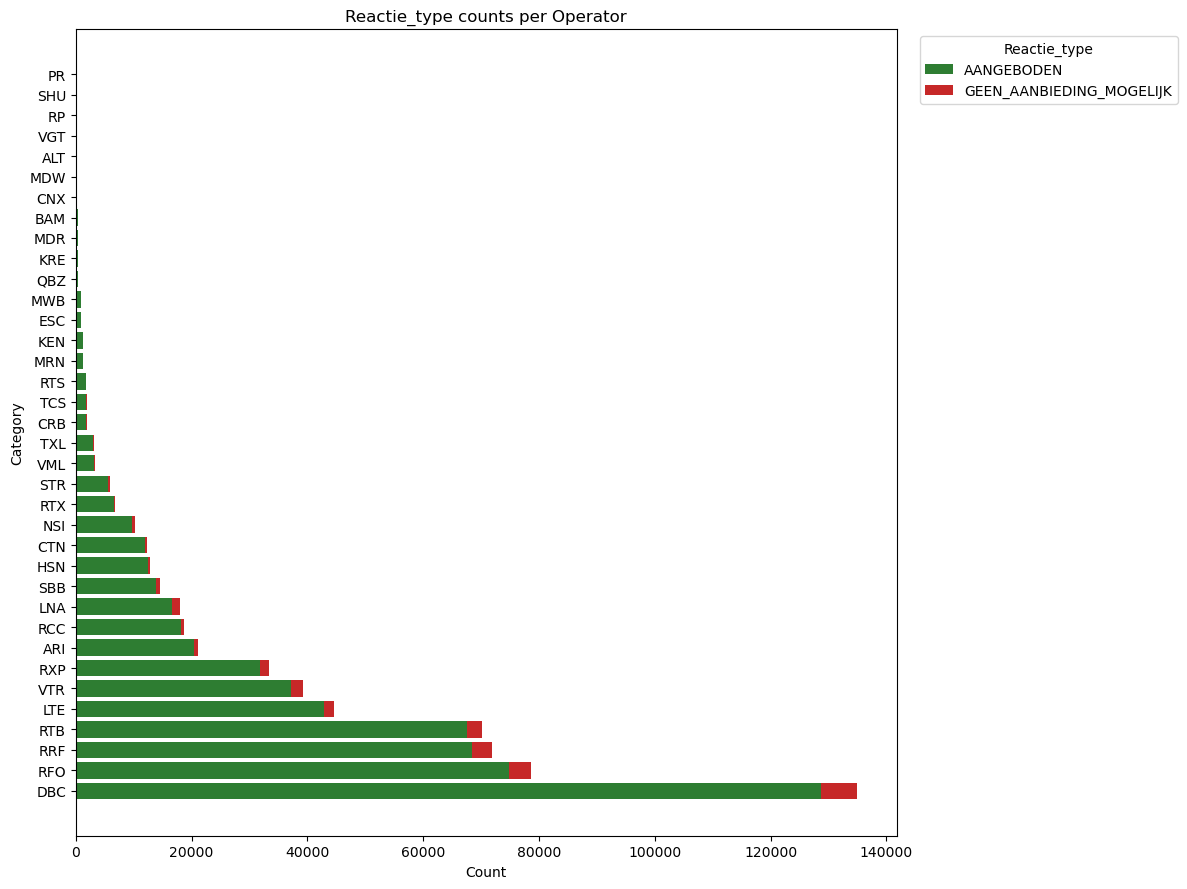

[OK] Saved plots_cumulative_counts\counts_operator.png


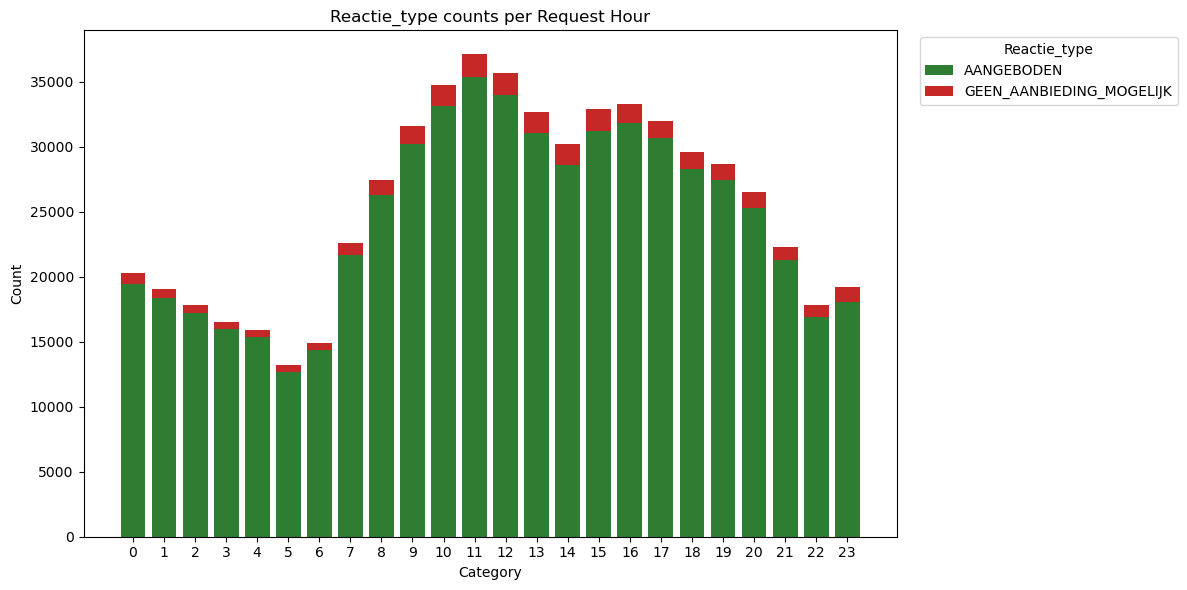

[OK] Saved plots_cumulative_counts\counts_req_hour.png


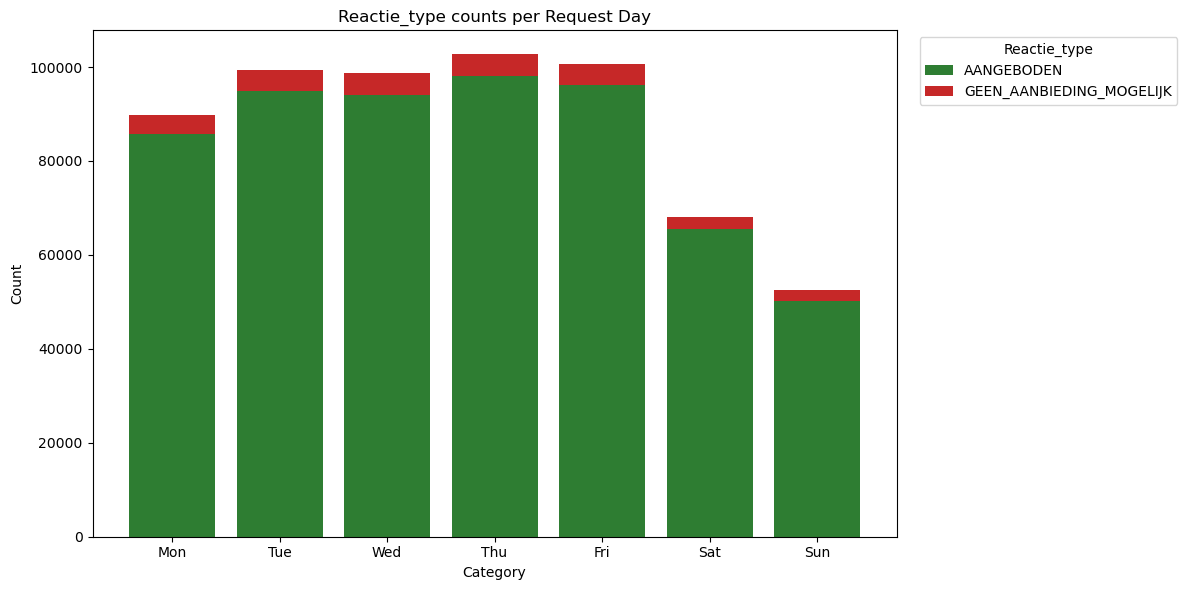

[OK] Saved plots_cumulative_counts\counts_req_day.png


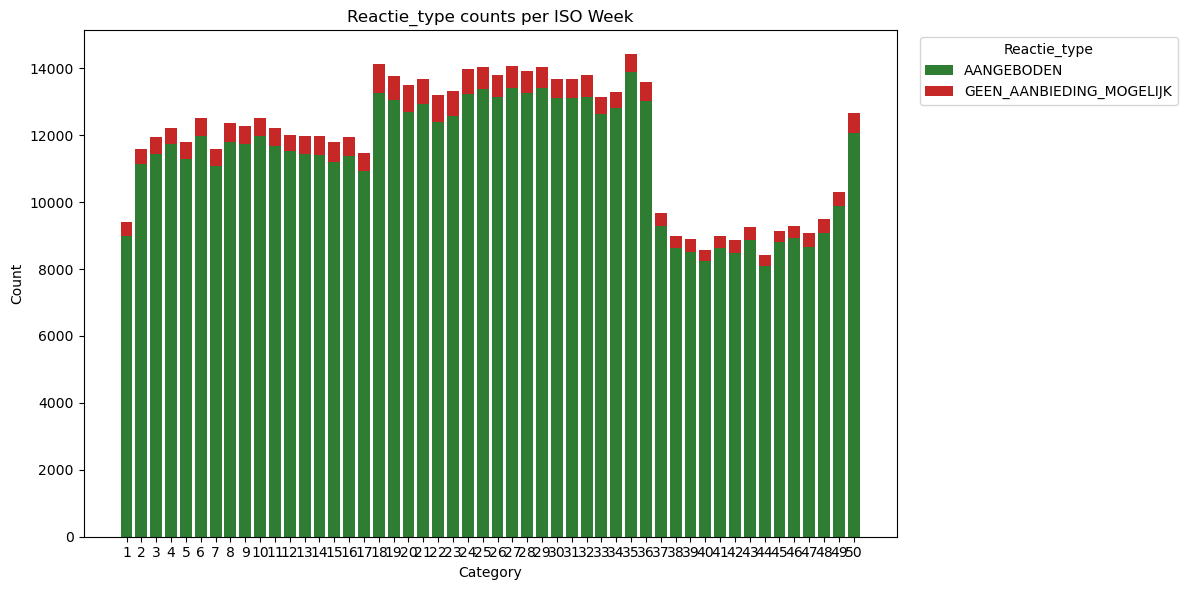

[OK] Saved plots_cumulative_counts\counts_req_week.png


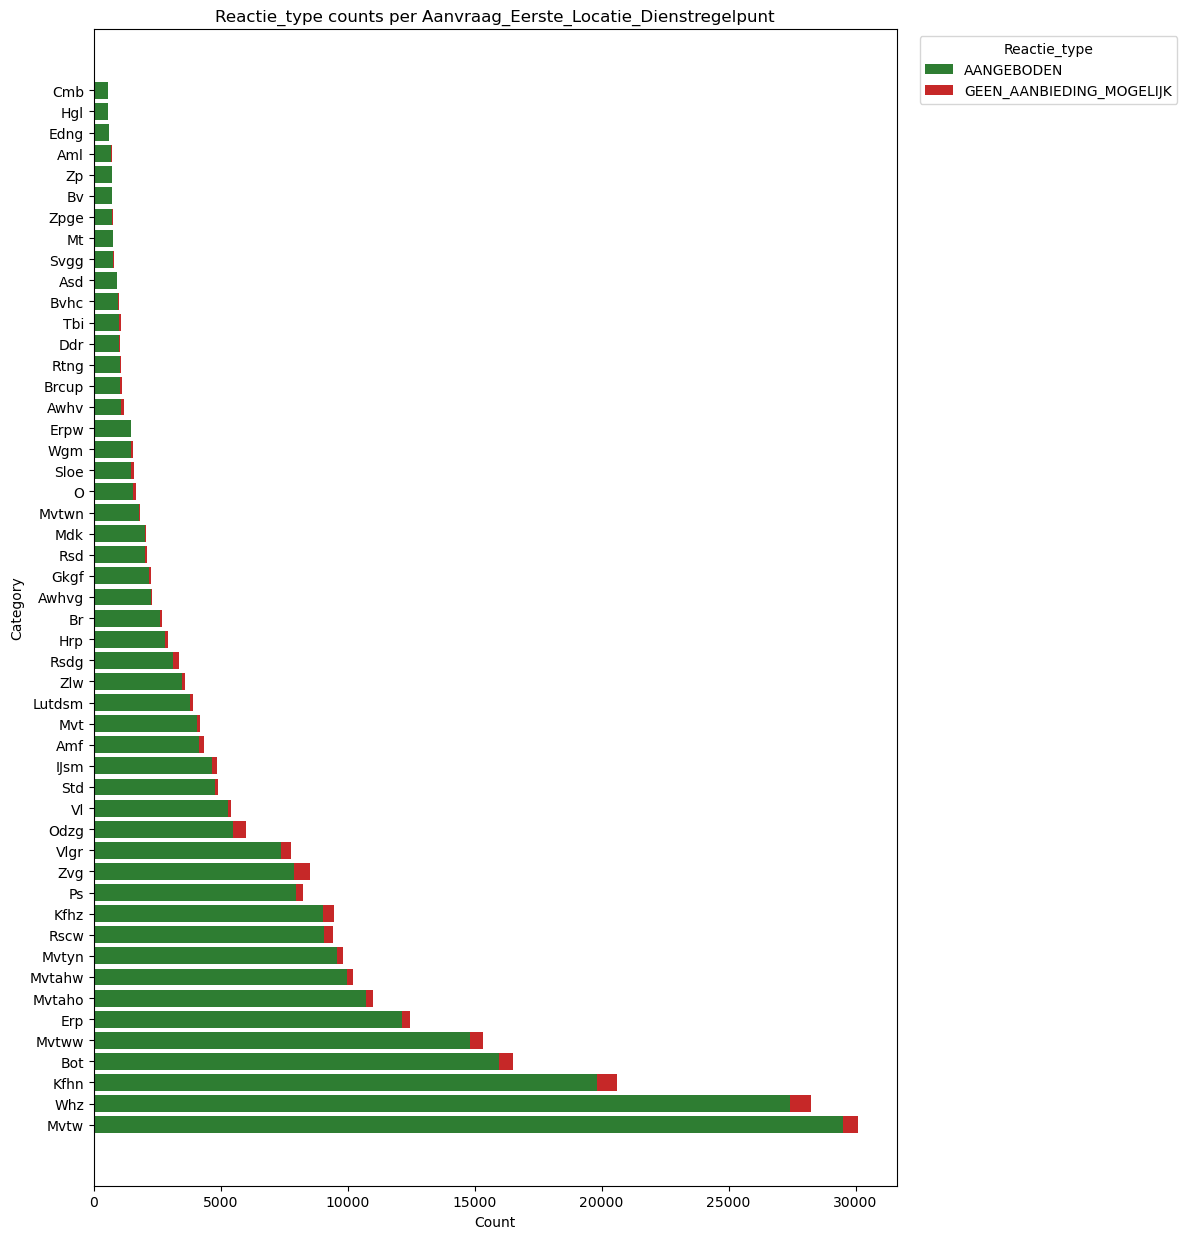

[OK] Saved plots_cumulative_counts\counts_first_location.png


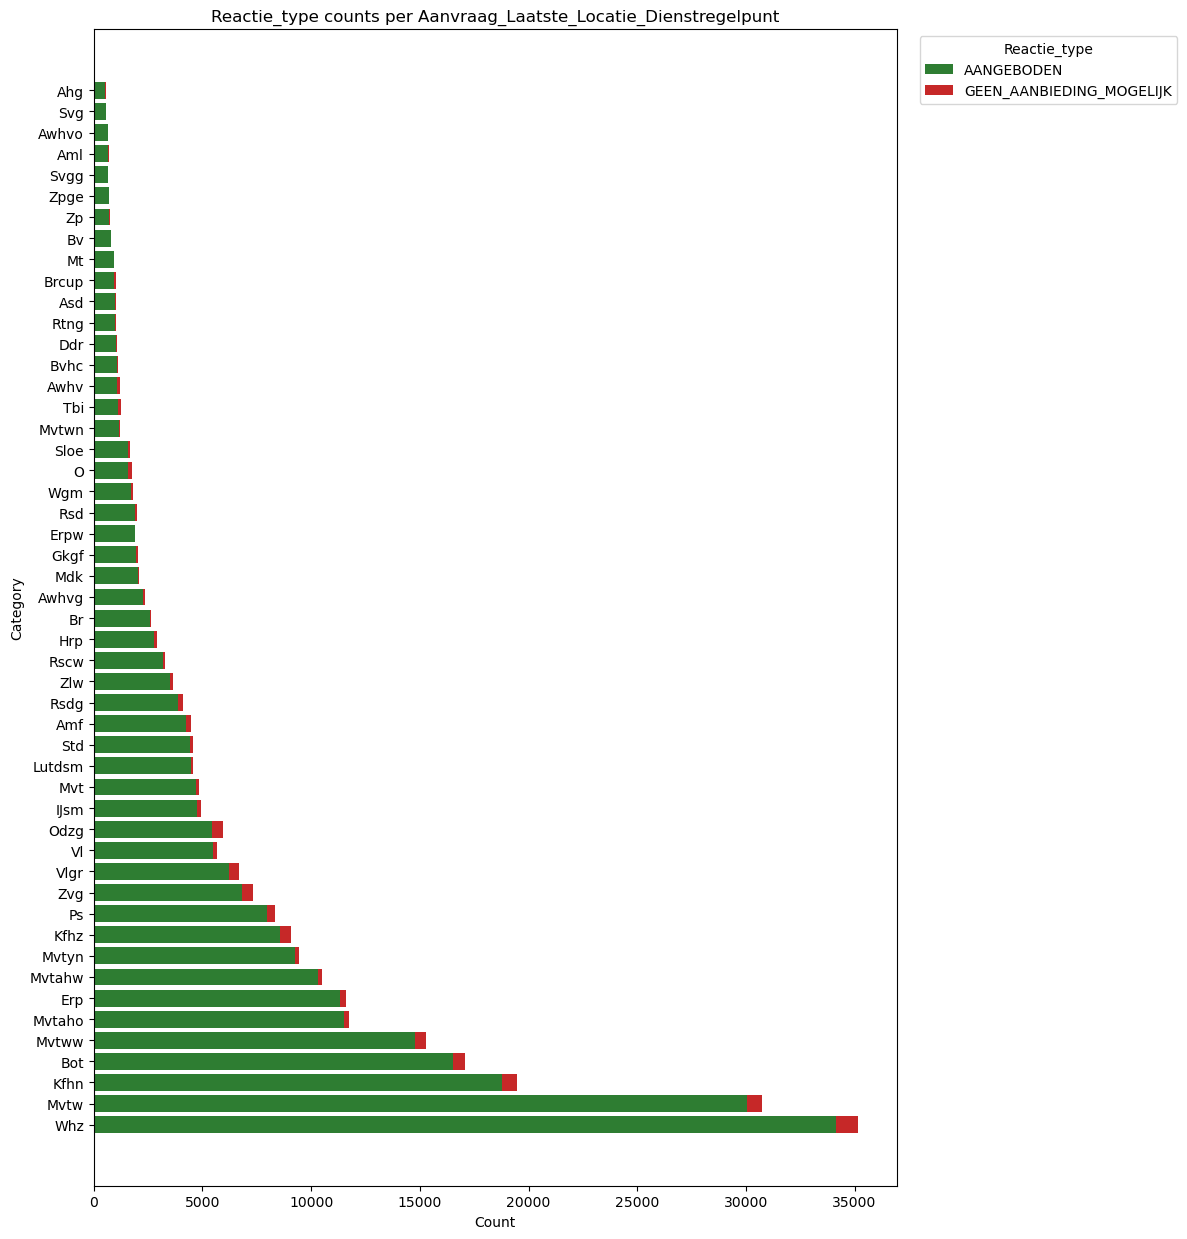

[OK] Saved plots_cumulative_counts\counts_last_location.png


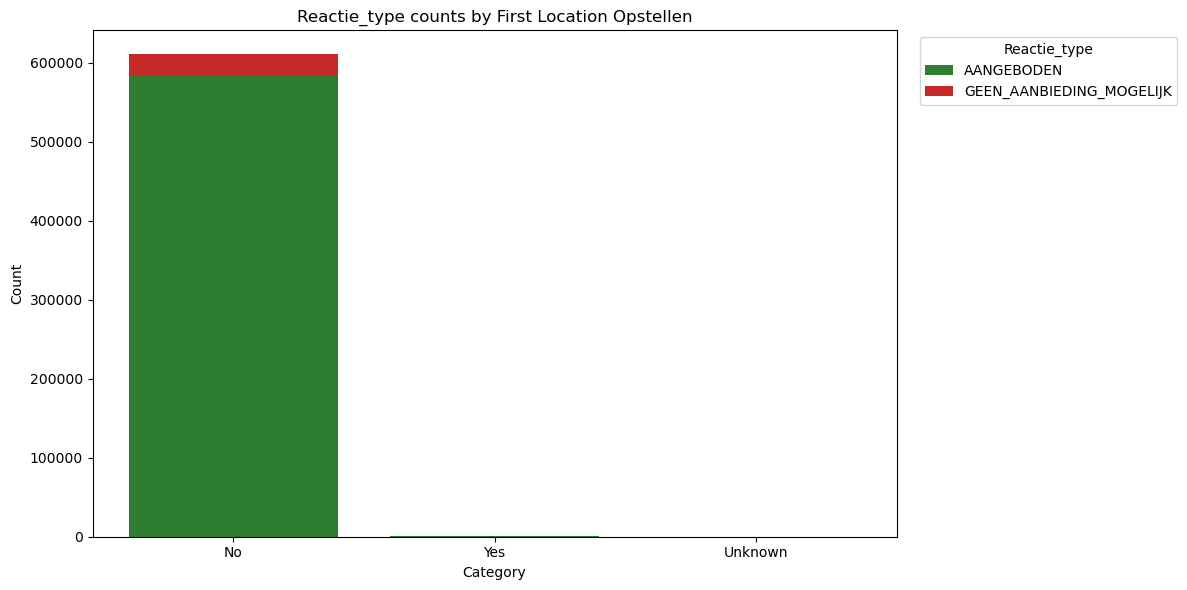

[OK] Saved plots_cumulative_counts\counts_first_opstel.png


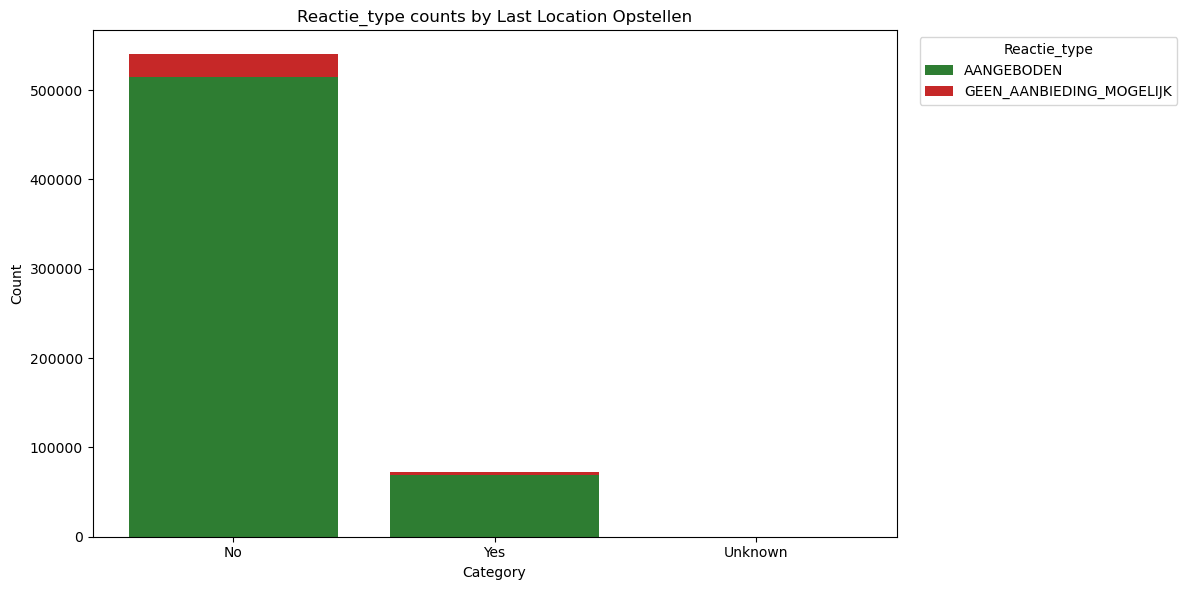

[OK] Saved plots_cumulative_counts\counts_last_opstel.png


C:\Users\quint\AppData\Local\Temp\ipykernel_9164\38198664.py:265: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = (tmp.groupby(["bin", TARGET]).size()


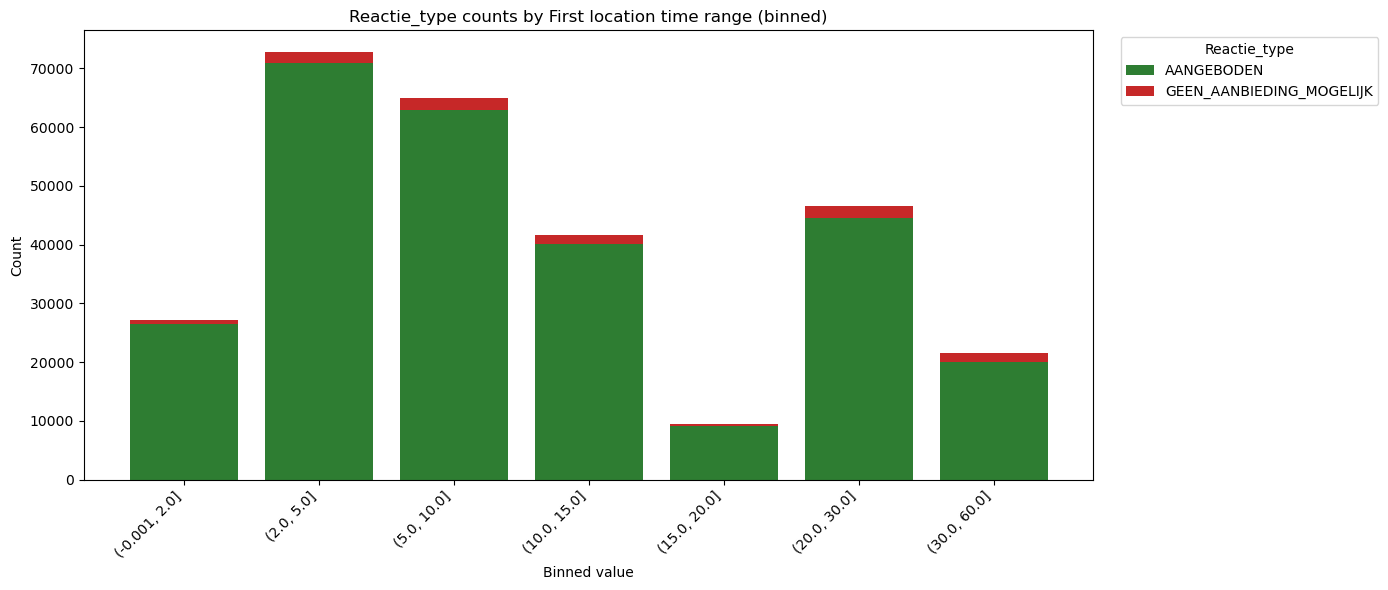

[OK] Saved plots_cumulative_counts\counts_binned_first_time_range.png


C:\Users\quint\AppData\Local\Temp\ipykernel_9164\38198664.py:265: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = (tmp.groupby(["bin", TARGET]).size()


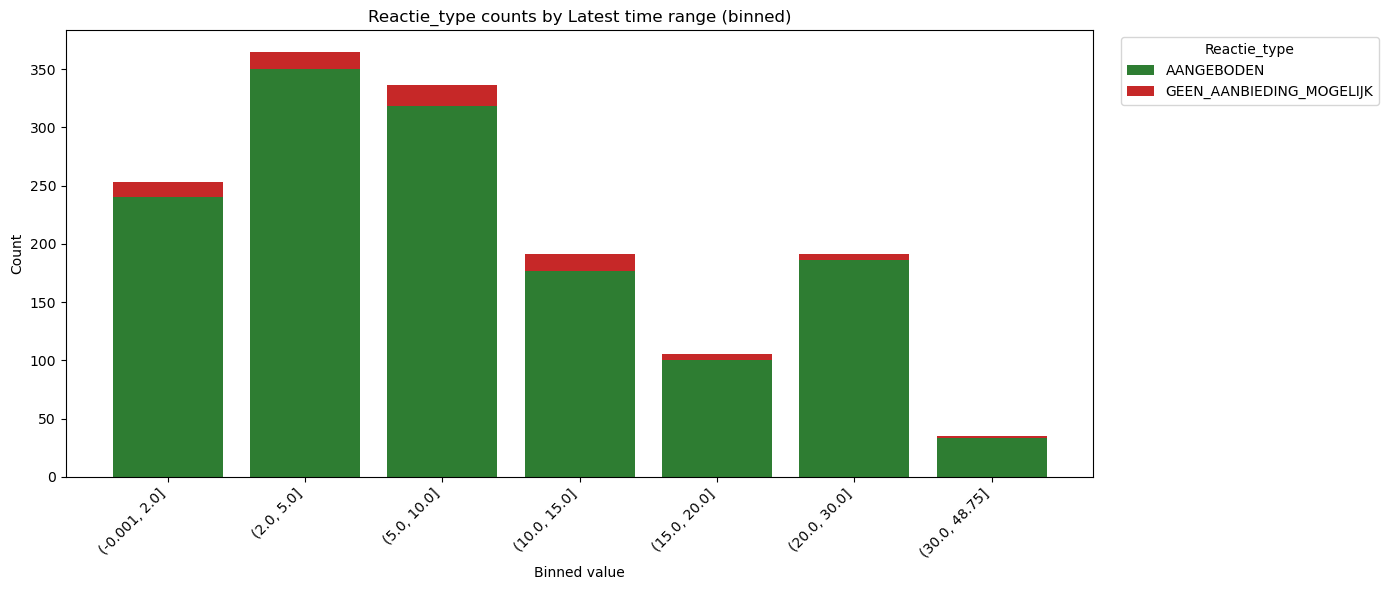

[OK] Saved plots_cumulative_counts\counts_binned_latest_time_range.png


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# ===================== CONFIG =====================
FILES = ["cleaned_dataset_1.csv", "cleaned_dataset_2.csv", "cleaned_dataset_3.csv"]
OUT_DIR = Path("plots_cumulative_counts"); OUT_DIR.mkdir(exist_ok=True, parents=True)

TARGET = "Reactie_type"

# Consistent class order + colors across all plots
REACTIE_ORDER = ["AANGEBODEN", "GEEN_AANBIEDING_MOGELIJK", "AFWIJZING", "ANNULEER_BEVESTIGING"]
COLOR_MAP = {
    "AANGEBODEN":               "#2E7D32",  # green
    "GEEN_AANBIEDING_MOGELIJK": "#C62828",  # red
    "AFWIJZING":                "#6A1B9A",  # purple
    "ANNULEER_BEVESTIGING":     "#FF8F00",  # amber
}

# Toggle which plots to produce
PLOT_OPERATOR          = True
PLOT_REQ_HOUR          = True
PLOT_REQ_DAY           = True
PLOT_REQ_WEEK          = True
PLOT_FIRST_LOC         = True
PLOT_LAST_LOC          = True
PLOT_FIRST_OPSTEL      = True
PLOT_LAST_OPSTEL       = True
PLOT_TIME_RANGE_FIRST  = True
PLOT_TIME_RANGE_LAST   = True

# Readability filters
MIN_COUNT = 20     # minimum total rows per category to show (e.g., per operator/location)
TOP_N     = 50     # max categories to display after sorting (None = all)

# Binning for numeric time ranges
NBINS     = 12
CLIP_PCT  = (0.01, 0.99)
# ===================================================


def load_concat(files):
    dfs = []
    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
        except UnicodeDecodeError:
            df = pd.read_csv(f, low_memory=False, encoding="latin1")
        df[TARGET] = df[TARGET].astype(str).str.strip()
        dfs.append(df)
    if not dfs:
        raise RuntimeError("No files loaded.")
    return pd.concat(dfs, ignore_index=True)


def find_col(df, candidates):
    low = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in low:
            return low[cand.lower()]
    return None


def ensure_time_features(df):
    req_col = find_col(df, ["Aanvraag_Indienmoment"])
    req_dt = pd.to_datetime(df[req_col], errors="coerce")
    df["_req_hour"] = req_dt.dt.hour
    df["_req_dow"]  = req_dt.dt.dayofweek
    df["_req_week"] = (req_dt.dt.isocalendar().week
                       if hasattr(req_dt.dt, "isocalendar")
                       else pd.Series(pd.NA, index=req_dt.index, dtype="Int64"))
    df["_req_day_name"] = df["_req_dow"].map({0:"Mon",1:"Tue",2:"Wed",3:"Thu",4:"Fri",5:"Sat",6:"Sun"})
    return df


def counts_table(df, cat_col):
    sub = df[[cat_col, TARGET]].dropna()
    if sub.empty:
        return None, None
    sub[TARGET] = sub[TARGET].astype(str).str.strip()

    counts = (sub.groupby([cat_col, TARGET]).size()
                .rename("n").reset_index())
    pivot = counts.pivot(index=cat_col, columns=TARGET, values="n").fillna(0)

    totals = pivot.sum(axis=1)

    # filter by min total
    if MIN_COUNT and MIN_COUNT > 0:
        keep = totals >= MIN_COUNT
        pivot = pivot.loc[keep]
        totals = totals.loc[keep]

    if pivot.empty:
        return None, None

    # consistent column ordering
    cols_present = list(pivot.columns)
    ordered_cols = [c for c in REACTIE_ORDER if c in cols_present] + \
                   [c for c in cols_present if c not in REACTIE_ORDER]
    pivot = pivot[ordered_cols]

    # sort rows by AANGEBODEN count (desc) if present, else by total
    sort_key = "AANGEBODEN" if "AANGEBODEN" in pivot.columns else ordered_cols[0]
    pivot = pivot.sort_values(by=sort_key, ascending=False)
    totals = totals.reindex(pivot.index)

    return pivot, totals


def color_for(cls):
    return COLOR_MAP.get(str(cls), None)


def plot_stacked_counts(pivot_counts, title, outfile, horizontal=True):
    if pivot_counts is None or pivot_counts.empty:
        print(f"[WARN] No data to plot for {title}")
        return

    # truncate to TOP_N if requested
    tbl = pivot_counts
    if TOP_N is not None and TOP_N > 0 and len(tbl) > TOP_N:
        tbl = tbl.iloc[:TOP_N, :]

    plt.figure(figsize=(12, max(6, 0.25*len(tbl)) if horizontal else 6))
    class_order = list(tbl.columns)

    if horizontal:
        y = np.arange(len(tbl))
        left = np.zeros(len(tbl), dtype=float)
        for cls in class_order:
            vals = tbl[cls].to_numpy()
            plt.barh(y, vals, left=left, label=str(cls), color=color_for(cls))
            left += np.nan_to_num(vals, nan=0.0)
        plt.xlabel("Count")
        plt.yticks(y, tbl.index.astype(str))
        plt.ylabel("Category")
    else:
        x = np.arange(len(tbl))
        bottom = np.zeros(len(tbl), dtype=float)
        for cls in class_order:
            vals = tbl[cls].to_numpy()
            plt.bar(x, vals, bottom=bottom, label=str(cls), color=color_for(cls))
            bottom += np.nan_to_num(vals, nan=0.0)
        plt.ylabel("Count")
        plt.xticks(x, tbl.index.astype(str), rotation=0)
        plt.xlabel("Category")

    plt.title(title)
    plt.legend(title=TARGET, bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    out = OUT_DIR / outfile
    plt.savefig(out, dpi=150)
    plt.show()
    print(f"[OK] Saved {out}")


def bin_numeric(series, nbins=12, clip_pct=(0.01, 0.99)):
    s = pd.to_numeric(series, errors="coerce")
    s = s.replace([np.inf, -np.inf], np.nan).dropna()
    if s.empty:
        return None, None
    if clip_pct:
        s = s.clip(lower=s.quantile(clip_pct[0]), upper=s.quantile(clip_pct[1]))
    cats, edges = pd.qcut(s, q=nbins, retbins=True, duplicates="drop")
    cats = pd.Categorical(cats, ordered=True)
    return pd.Series(cats, index=s.index), list(map(str, cats.categories))


# ===================== RUN =====================
df = load_concat(FILES)
df = ensure_time_features(df)

# Column discovery (case-insensitive)
col_operator = find_col(df, ["Aanvrager_Verkorting", "Aanvraag_vervoerder_verkorting"])
col_first_loc = find_col(df, ["Aanvraag_Eerste_Locatie_Dienstregelpunt"])
col_last_loc  = find_col(df, ["Aanvraag_Laatste_Locatie_Dienstregelpunt"])
col_first_op  = find_col(df, ["Aanvraag_Eerste_Locatie_Opstellen_True"])
col_last_op   = find_col(df, ["Aanvraag_Laatste_Locatie_Opstellen_True"])
col_tr_first  = find_col(df, ["Aanvraag_time_range_Eerste_Locatie_Vertrektijd"])
col_tr_last   = find_col(df, ["Aanvraag_time_range_Laatste_Locatie_Aankomsttijd"])

# 1) Operator (absolute counts)
if PLOT_OPERATOR and col_operator:
    counts, totals = counts_table(df, col_operator)
    if counts is not None:
        counts.to_csv(OUT_DIR / "counts_by_operator.csv")
        plot_stacked_counts(counts, "Reactie_type counts per Operator", "counts_operator.png", horizontal=True)

# 2) Request hour (0..23)
if PLOT_REQ_HOUR:
    hours = list(range(24))
    tmp = df[["_req_hour", TARGET]].dropna()
    tmp["_req_hour"] = tmp["_req_hour"].astype(int)
    counts, totals = counts_table(tmp.rename(columns={"_req_hour":"req_hour"}), "req_hour")
    if counts is not None:
        counts = counts.reindex(hours).fillna(0)
        counts.to_csv(OUT_DIR / "counts_by_request_hour.csv")
        plot_stacked_counts(counts, "Reactie_type counts per Request Hour", "counts_req_hour.png", horizontal=False)

# 3) Request day (Mon..Sun)
if PLOT_REQ_DAY:
    day_order = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
    tmp = df[["_req_day_name", TARGET]].dropna()
    counts, totals = counts_table(tmp.rename(columns={"_req_day_name":"req_day"}), "req_day")
    if counts is not None:
        counts = counts.reindex(day_order).fillna(0)
        counts.to_csv(OUT_DIR / "counts_by_request_day.csv")
        plot_stacked_counts(counts, "Reactie_type counts per Request Day", "counts_req_day.png", horizontal=False)

# 4) ISO week
if PLOT_REQ_WEEK:
    tmp = df[["_req_week", TARGET]].dropna()
    tmp["_req_week"] = tmp["_req_week"].astype(int)
    counts, totals = counts_table(tmp.rename(columns={"_req_week":"req_week"}), "req_week")
    if counts is not None:
        counts = counts.sort_index()
        counts.to_csv(OUT_DIR / "counts_by_request_week.csv")
        plot_stacked_counts(counts, "Reactie_type counts per ISO Week", "counts_req_week.png", horizontal=False)

# 5) First/Last location
if PLOT_FIRST_LOC and col_first_loc:
    counts, totals = counts_table(df, col_first_loc)
    if counts is not None:
        counts.to_csv(OUT_DIR / "counts_by_first_location.csv")
        plot_stacked_counts(counts, f"Reactie_type counts per {col_first_loc}", "counts_first_location.png", horizontal=True)

if PLOT_LAST_LOC and col_last_loc:
    counts, totals = counts_table(df, col_last_loc)
    if counts is not None:
        counts.to_csv(OUT_DIR / "counts_by_last_location.csv")
        plot_stacked_counts(counts, f"Reactie_type counts per {col_last_loc}", "counts_last_location.png", horizontal=True)

# 6) Opstellen flags (0/1 or Yes/No/Unknown expected)
def label_yes_no_unknown(s):
    s = pd.to_numeric(s, errors="coerce")
    out = pd.Series(index=s.index, dtype="string")
    out[s == 1] = "Yes"; out[s == 0] = "No"; out[s.isna()] = "Unknown"
    return out

if PLOT_FIRST_OPSTEL and col_first_op:
    df["_first_opstel_label"] = label_yes_no_unknown(df[col_first_op])
    counts, totals = counts_table(df.rename(columns={"_first_opstel_label":"first_opstel"}), "first_opstel")
    if counts is not None:
        counts = counts.reindex(["No","Yes","Unknown"]).fillna(0)
        counts.to_csv(OUT_DIR / "counts_by_first_opstel.csv")
        plot_stacked_counts(counts, "Reactie_type counts by First Location Opstellen", "counts_first_opstel.png", horizontal=False)

if PLOT_LAST_OPSTEL and col_last_op:
    df["_last_opstel_label"] = label_yes_no_unknown(df[col_last_op])
    counts, totals = counts_table(df.rename(columns={"_last_opstel_label":"last_opstel"}), "last_opstel")
    if counts is not None:
        counts = counts.reindex(["No","Yes","Unknown"]).fillna(0)
        counts.to_csv(OUT_DIR / "counts_by_last_opstel.csv")
        plot_stacked_counts(counts, "Reactie_type counts by Last Location Opstellen", "counts_last_opstel.png", horizontal=False)

# 7) Numeric time ranges (binned, absolute counts stacked)
def binned_counts_plot(series, title, outfile):
    cats, _ = bin_numeric(series, nbins=NBINS, clip_pct=CLIP_PCT)
    if cats is None:
        print(f"[WARN] No numeric data to bin for {title}")
        return
    tmp = pd.DataFrame({"bin": cats, TARGET: df[TARGET].loc[cats.index].values})
    counts = (tmp.groupby(["bin", TARGET]).size()
                .rename("n").reset_index())
    pivot = counts.pivot(index="bin", columns=TARGET, values="n").fillna(0)
    pivot.to_csv(OUT_DIR / outfile.replace(".png", "_table.csv"))

    # consistent class order & colors
    cols_present = list(pivot.columns)
    class_order = [c for c in REACTIE_ORDER if c in cols_present] + \
                  [c for c in cols_present if c not in REACTIE_ORDER]

    plt.figure(figsize=(14, 6))
    x = np.arange(len(pivot))
    bottom = np.zeros(len(pivot), dtype=float)
    for cls in class_order:
        vals = pivot[cls].to_numpy()
        plt.bar(x, vals, bottom=bottom, label=str(cls), color=color_for(cls))
        bottom += np.nan_to_num(vals, nan=0.0)
    plt.ylabel("Count")
    plt.xlabel("Binned value")
    plt.xticks(x, pivot.index.astype(str), rotation=45, ha="right")
    plt.title(title)
    plt.legend(title=TARGET, bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.savefig(OUT_DIR / outfile, dpi=150)
    plt.show()
    print(f"[OK] Saved {OUT_DIR/outfile}")

if PLOT_TIME_RANGE_FIRST:
    col = find_col(df, ["Aanvraag_time_range_Eerste_Locatie_Vertrektijd"])
    if col:
        binned_counts_plot(df[col], "Reactie_type counts by First location time range (binned)",
                           "counts_binned_first_time_range.png")

if PLOT_TIME_RANGE_LAST:
    col = find_col(df, ["Aanvraag_time_range_Laatste_Locatie_Aankomsttijd"])
    if col:
        binned_counts_plot(df[col], "Reactie_type counts by Latest time range (binned)",
                           "counts_binned_latest_time_range.png")


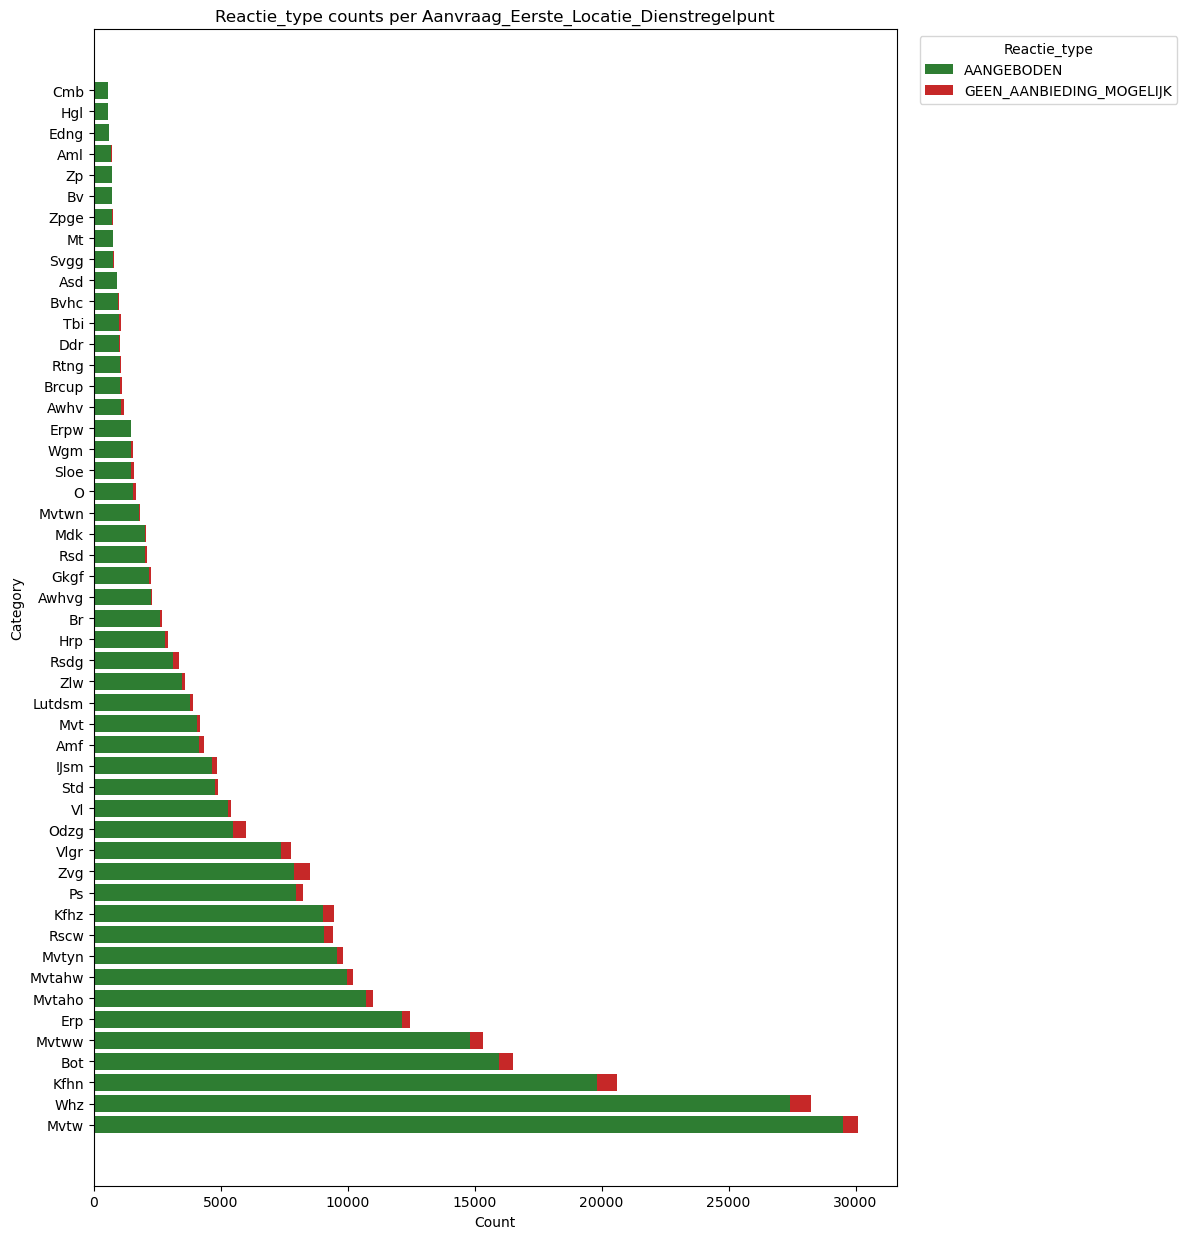

[OK] Saved plots_features\counts_dienstregelpunt.png


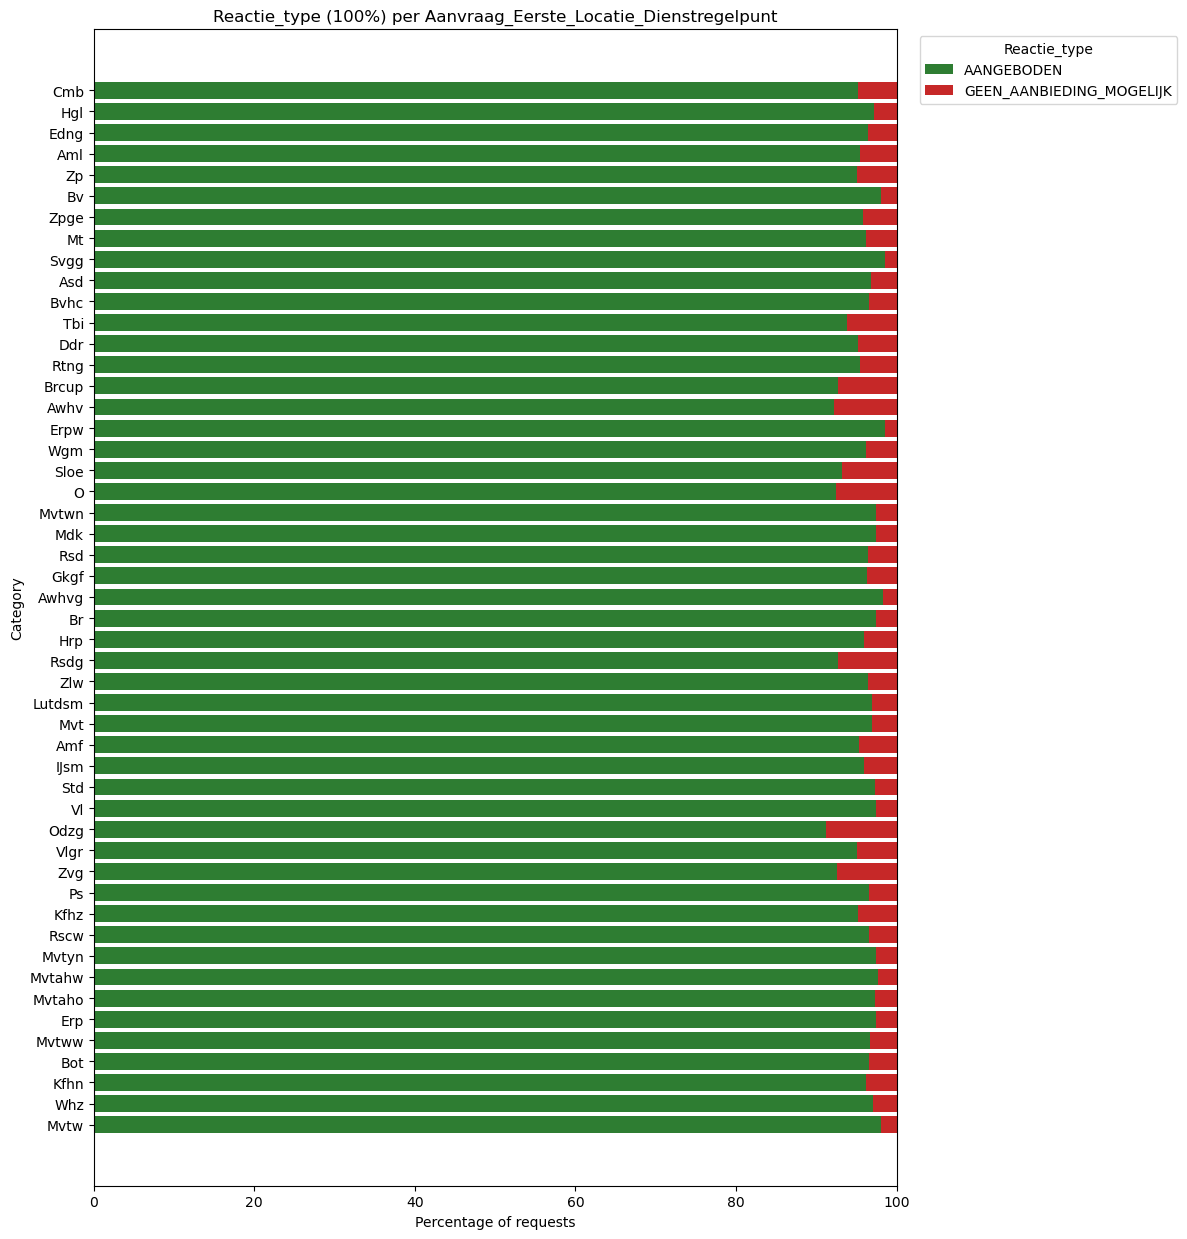

[OK] Saved plots_features\normalized_dienstregelpunt.png


C:\Users\quint\AppData\Local\Temp\ipykernel_9164\3139615753.py:180: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = (tmp.groupby(["bin", TARGET]).size().rename("n").reset_index())


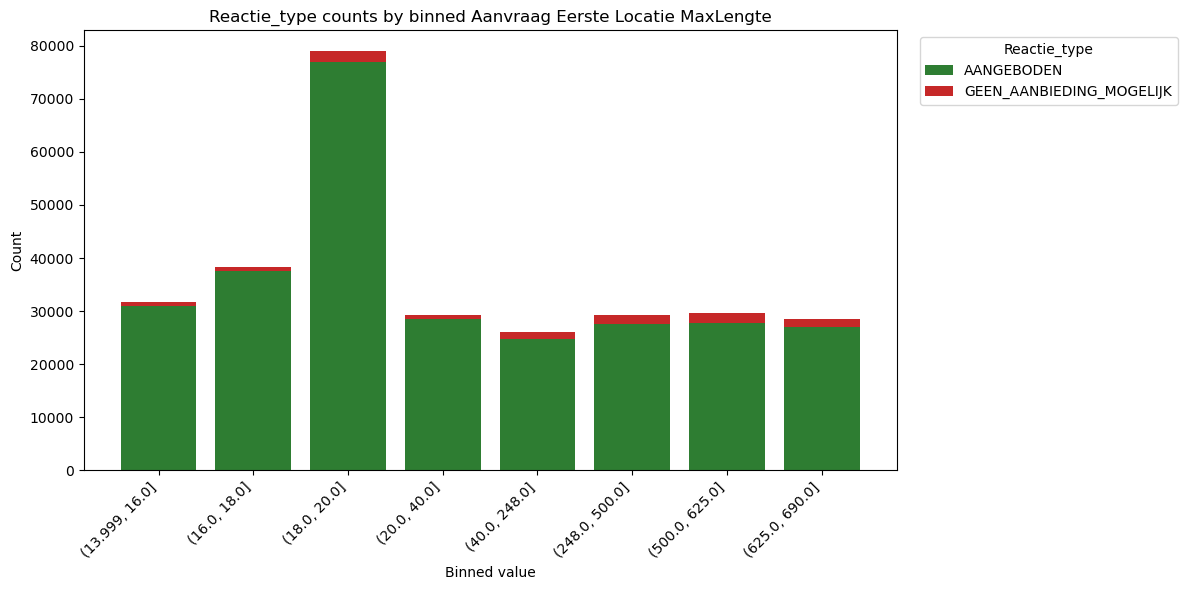

[OK] Saved plots_features\counts_binned_Aanvraag_Eerste_Locatie_MaxLengte.png


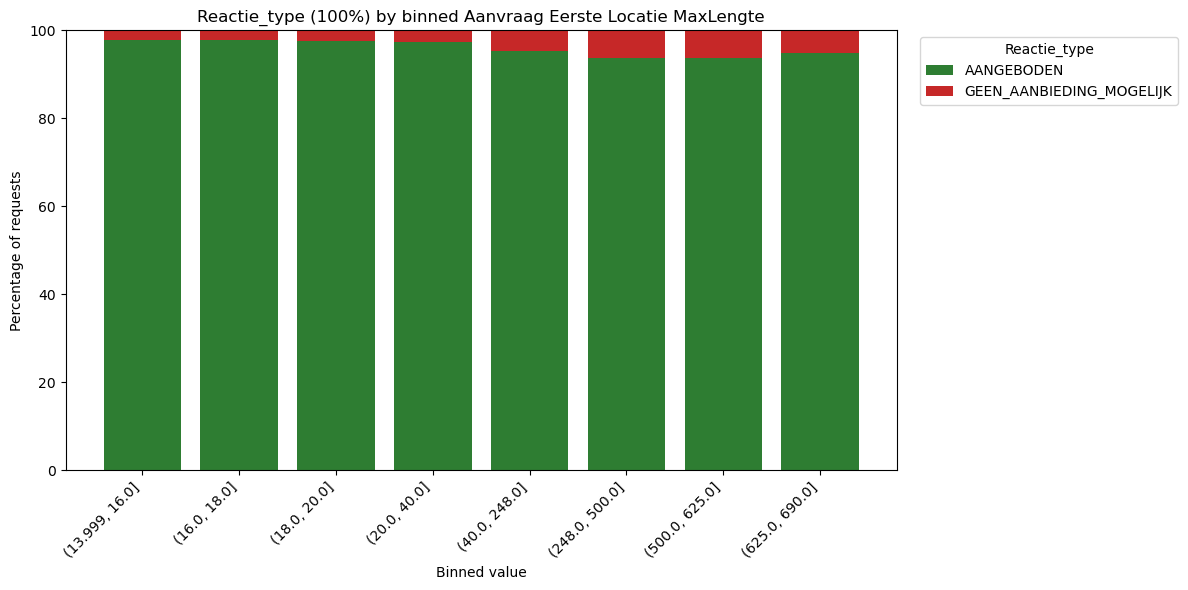

[OK] Saved plots_features\normalized_binned_Aanvraag_Eerste_Locatie_MaxLengte.png


C:\Users\quint\AppData\Local\Temp\ipykernel_9164\3139615753.py:180: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = (tmp.groupby(["bin", TARGET]).size().rename("n").reset_index())


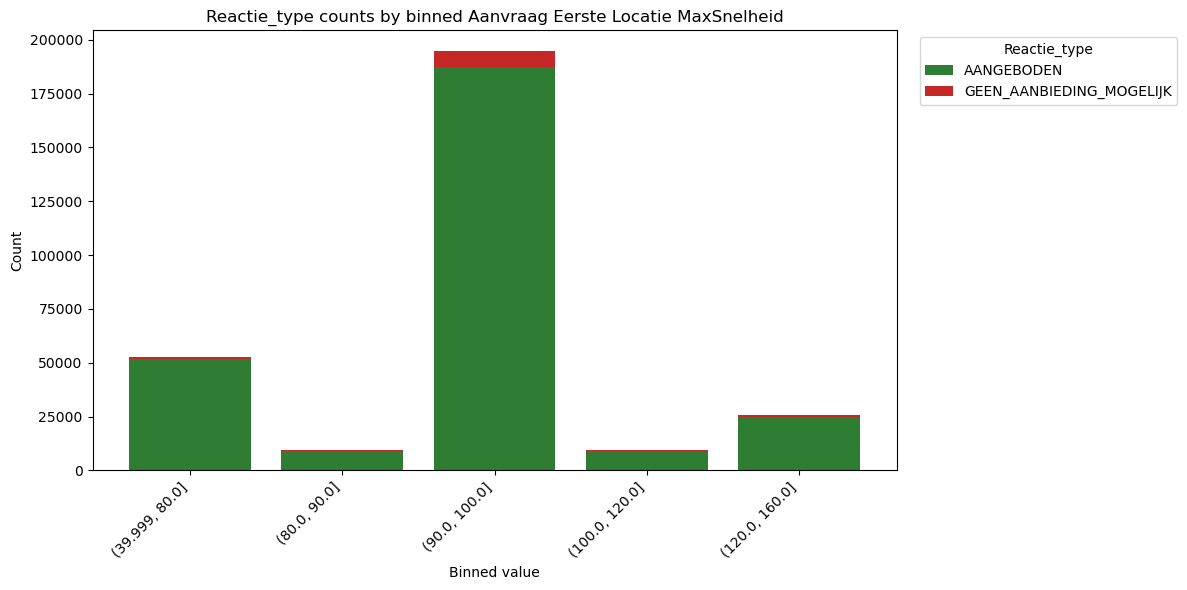

[OK] Saved plots_features\counts_binned_Aanvraag_Eerste_Locatie_MaxSnelheid.png


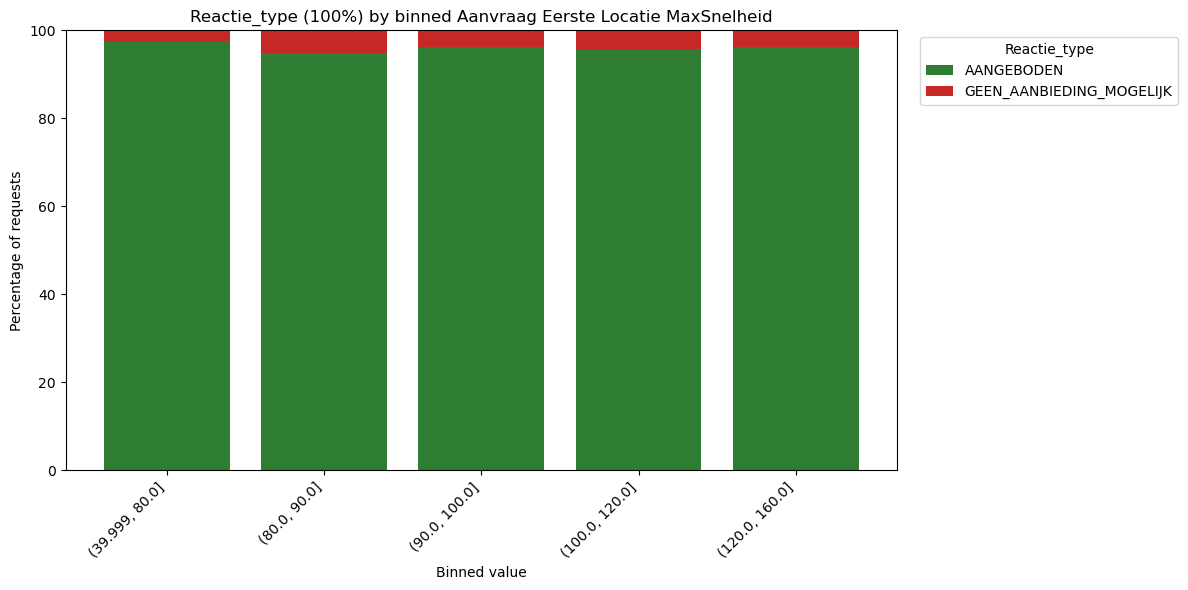

[OK] Saved plots_features\normalized_binned_Aanvraag_Eerste_Locatie_MaxSnelheid.png


C:\Users\quint\AppData\Local\Temp\ipykernel_9164\3139615753.py:180: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = (tmp.groupby(["bin", TARGET]).size().rename("n").reset_index())


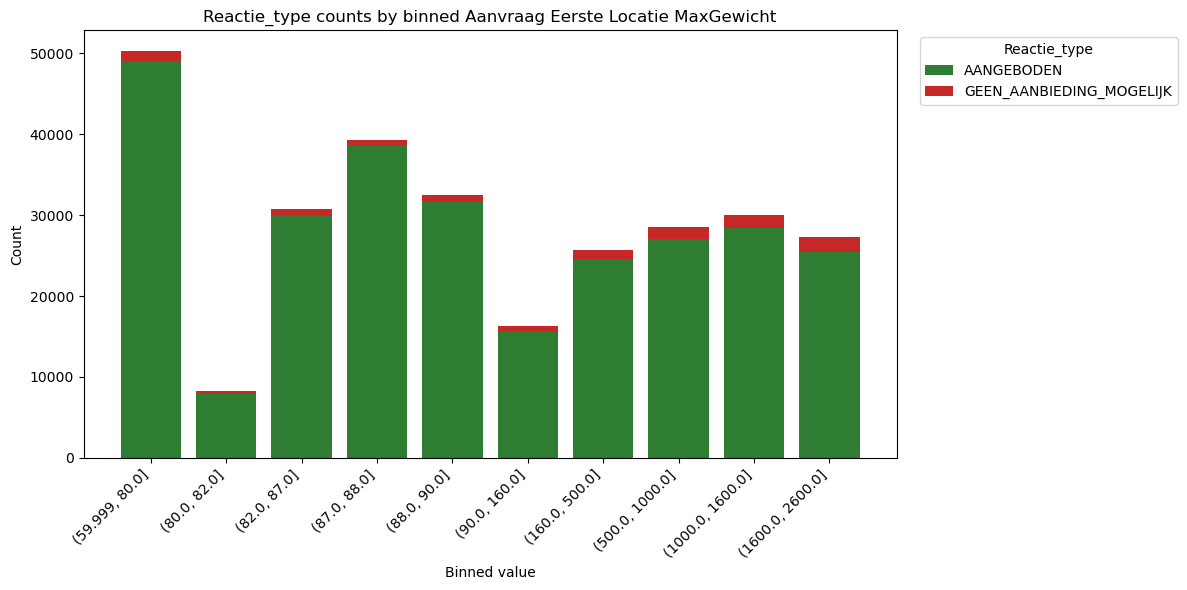

[OK] Saved plots_features\counts_binned_Aanvraag_Eerste_Locatie_MaxGewicht.png


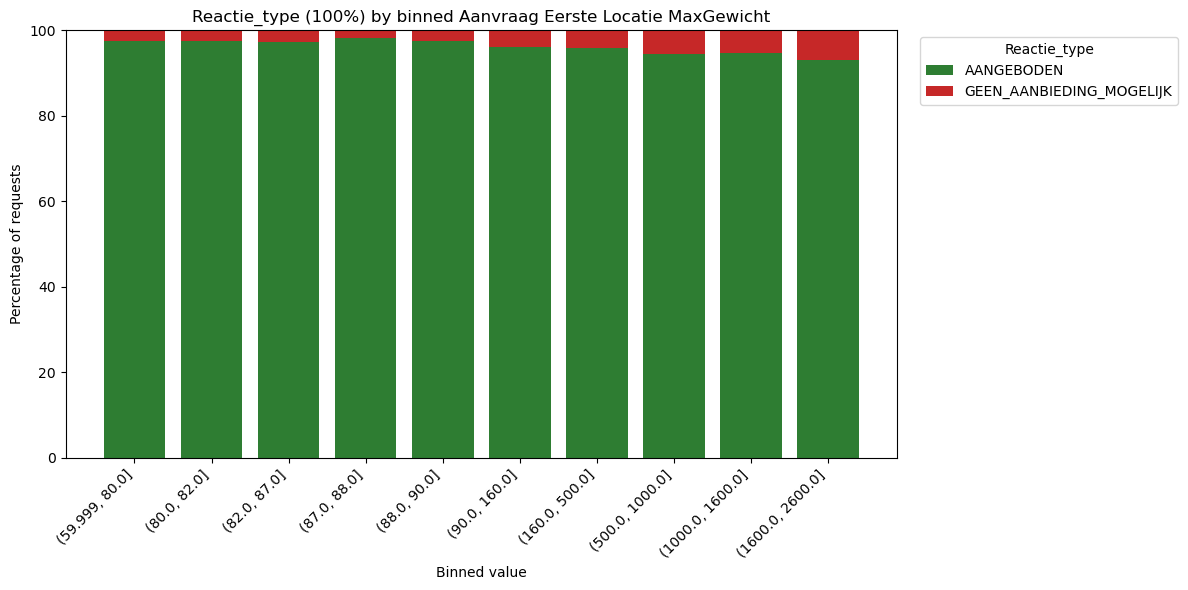

[OK] Saved plots_features\normalized_binned_Aanvraag_Eerste_Locatie_MaxGewicht.png


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# ===================== CONFIG =====================
FILES = ["cleaned_dataset_1.csv", "cleaned_dataset_2.csv", "cleaned_dataset_3.csv"]
OUT_DIR = Path("plots_features"); OUT_DIR.mkdir(exist_ok=True, parents=True)

TARGET = "Reactie_type"
REACTIE_ORDER = ["AANGEBODEN", "GEEN_AANBIEDING_MOGELIJK", "AFWIJZING", "ANNULEER_BEVESTIGING"]
COLOR_MAP = {
    "AANGEBODEN":               "#2E7D32",
    "GEEN_AANBIEDING_MOGELIJK": "#C62828",
    "AFWIJZING":                "#6A1B9A",
    "ANNULEER_BEVESTIGING":     "#FF8F00",
}

# Which columns to plot
NUM_COLS = [
    "Aanvraag_Eerste_Locatie_MaxLengte",
    "Aanvraag_Eerste_Locatie_MaxSnelheid",
    "Aanvraag_Eerste_Locatie_MaxGewicht",
]
CAT_COL = "Aanvraag_Eerste_Locatie_Dienstregelpunt"

# Plot/readability settings
MIN_COUNT_CAT = 20     # filter categories with too few rows
TOP_N_CAT     = 50     # show at most this many categories in the categorical plots
NBINS_NUM     = 10     # number of quantile bins for numeric features
CLIP_PCT      = (0.01, 0.99)  # clip extremes before binning
# ===================================================

def load_concat(files):
    dfs = []
    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
        except UnicodeDecodeError:
            df = pd.read_csv(f, low_memory=False, encoding="latin1")
        df[TARGET] = df[TARGET].astype(str).str.strip()
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

def find_col(df, name):
    # case-insensitive match
    low = {c.lower(): c for c in df.columns}
    return low.get(name.lower(), None)

def color_for(cls):
    return COLOR_MAP.get(str(cls), None)

def ensure_class_order(cols):
    return [c for c in REACTIE_ORDER if c in cols] + [c for c in cols if c not in REACTIE_ORDER]

def counts_table(df, cat_col):
    sub = df[[cat_col, TARGET]].dropna()
    if sub.empty:
        return None, None
    sub[TARGET] = sub[TARGET].astype(str).str.strip()
    counts = (sub.groupby([cat_col, TARGET]).size().rename("n").reset_index())
    pivot = counts.pivot(index=cat_col, columns=TARGET, values="n").fillna(0)
    totals = pivot.sum(axis=1)
    cols = ensure_class_order(pivot.columns.tolist())
    pivot = pivot[cols]
    return pivot, totals

def norm_table_from_counts(pivot):
    denom = pivot.sum(axis=1).replace(0, np.nan)
    pct = (pivot.div(denom, axis=0) * 100).dropna(how="all")
    return pct

def plot_stacked_counts(pivot_counts, title, outfile, horizontal=True):
    if pivot_counts is None or pivot_counts.empty:
        print(f"[WARN] No data to plot for {title}"); return
    tbl = pivot_counts.copy()
    plt.figure(figsize=(12, max(6, 0.25*len(tbl)) if horizontal else 6))
    classes = tbl.columns.tolist()
    if horizontal:
        y = np.arange(len(tbl))
        left = np.zeros(len(tbl), dtype=float)
        for cls in classes:
            vals = tbl[cls].to_numpy()
            plt.barh(y, vals, left=left, label=str(cls), color=color_for(cls))
            left += np.nan_to_num(vals, nan=0.0)
        plt.xlabel("Count"); plt.ylabel("Category"); plt.yticks(y, tbl.index.astype(str))
    else:
        x = np.arange(len(tbl))
        bottom = np.zeros(len(tbl), dtype=float)
        for cls in classes:
            vals = tbl[cls].to_numpy()
            plt.bar(x, vals, bottom=bottom, label=str(cls), color=color_for(cls))
            bottom += np.nan_to_num(vals, nan=0.0)
        plt.ylabel("Count"); plt.xlabel("Binned value"); plt.xticks(x, tbl.index.astype(str), rotation=45, ha="right")
    plt.title(title)
    plt.legend(title=TARGET, bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout(); out = OUT_DIR / outfile; plt.savefig(out, dpi=150); plt.show()
    print(f"[OK] Saved {out}")

def plot_stacked_normalized(pivot_pct, title, outfile, horizontal=True):
    if pivot_pct is None or pivot_pct.empty:
        print(f"[WARN] No data to plot for {title}"); return
    tbl = pivot_pct.copy()
    plt.figure(figsize=(12, max(6, 0.25*len(tbl)) if horizontal else 6))
    classes = tbl.columns.tolist()
    if horizontal:
        y = np.arange(len(tbl))
        left = np.zeros(len(tbl), dtype=float)
        for cls in classes:
            vals = tbl[cls].to_numpy()
            plt.barh(y, vals, left=left, label=str(cls), color=color_for(cls))
            left += np.nan_to_num(vals, nan=0.0)
        plt.xlabel("Percentage of requests"); plt.xlim(0, 100)
        plt.ylabel("Category"); plt.yticks(y, tbl.index.astype(str))
    else:
        x = np.arange(len(tbl))
        bottom = np.zeros(len(tbl), dtype=float)
        for cls in classes:
            vals = tbl[cls].to_numpy()
            plt.bar(x, vals, bottom=bottom, label=str(cls), color=color_for(cls))
            bottom += np.nan_to_num(vals, nan=0.0)
        plt.ylabel("Percentage of requests"); plt.ylim(0, 100)
        plt.xlabel("Binned value"); plt.xticks(x, tbl.index.astype(str), rotation=45, ha="right")
    plt.title(title)
    plt.legend(title=TARGET, bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout(); out = OUT_DIR / outfile; plt.savefig(out, dpi=150); plt.show()
    print(f"[OK] Saved {out}")

def bin_numeric(series, nbins=10, clip_pct=(0.01, 0.99)):
    s = pd.to_numeric(series, errors="coerce").replace([np.inf, -np.inf], np.nan).dropna()
    if s.empty: return None
    if clip_pct:
        s = s.clip(lower=s.quantile(clip_pct[0]), upper=s.quantile(clip_pct[1]))
    # quantile bins for balanced counts; fallback to fixed-width on low uniques
    try:
        cats, edges = pd.qcut(s, q=nbins, retbins=True, duplicates="drop")
    except ValueError:
        edges = np.linspace(s.min(), s.max(), num=nbins+1)
        cats = pd.cut(s, bins=edges, include_lowest=True, right=False)
    cats = pd.Categorical(cats, ordered=True)
    return pd.Series(cats, index=s.index)

# ===================== RUN =====================
df = load_concat(FILES)

# --- CATEGORICAL: Dienstregelpunt (absolute + normalized) ---
col_cat = find_col(df, CAT_COL)
if col_cat:
    counts, totals = counts_table(df, col_cat)
    if counts is not None:
        # filter & sort (by AANGEBODEN count if present)
        if MIN_COUNT_CAT: counts = counts[ counts.sum(axis=1) >= MIN_COUNT_CAT ]
        sort_key = "AANGEBODEN" if "AANGEBODEN" in counts.columns else counts.columns[0]
        counts = counts.sort_values(by=sort_key, ascending=False)
        if TOP_N_CAT: counts = counts.iloc[:TOP_N_CAT, :]
        # save tables
        counts.to_csv(OUT_DIR / "counts_Dienstregelpunt.csv")
        pct = norm_table_from_counts(counts)
        pct.to_csv(OUT_DIR / "normalized_Dienstregelpunt.csv")
        # plots
        plot_stacked_counts( counts, f"Reactie_type counts per {col_cat}", "counts_dienstregelpunt.png", horizontal=True)
        plot_stacked_normalized( pct, f"Reactie_type (100%) per {col_cat}", "normalized_dienstregelpunt.png", horizontal=True)
else:
    print(f"[WARN] Column not found: {CAT_COL}")

# --- NUMERIC: Lengte / Snelheid / Gewicht (binned absolute + normalized) ---
for num_col in NUM_COLS:
    col = find_col(df, num_col)
    if not col:
        print(f"[WARN] Column not found: {num_col}")
        continue

    cats = bin_numeric(df[col], nbins=NBINS_NUM, clip_pct=CLIP_PCT)
    if cats is None:
        print(f"[WARN] No numeric data to bin for {col}")
        continue

    tmp = pd.DataFrame({"bin": cats, TARGET: df.loc[cats.index, TARGET].values})
    # counts per bin x reactie
    counts = (tmp.groupby(["bin", TARGET]).size().rename("n").reset_index())
    pivot = counts.pivot(index="bin", columns=TARGET, values="n").fillna(0)
    # consistent column order
    pivot = pivot[ensure_class_order(pivot.columns.tolist())]

    # save tables
    pivot.to_csv(OUT_DIR / f"counts_binned_{col}.csv")
    pct = norm_table_from_counts(pivot)
    pct.to_csv(OUT_DIR / f"normalized_binned_{col}.csv")

    # plots (vertical bars)
    pretty = col.replace("_", " ")
    plot_stacked_counts(
        pivot, f"Reactie_type counts by binned {pretty}",
        f"counts_binned_{col}.png", horizontal=False
    )
    plot_stacked_normalized(
        pct, f"Reactie_type (100%) by binned {pretty}",
        f"normalized_binned_{col}.png", horizontal=False
    )


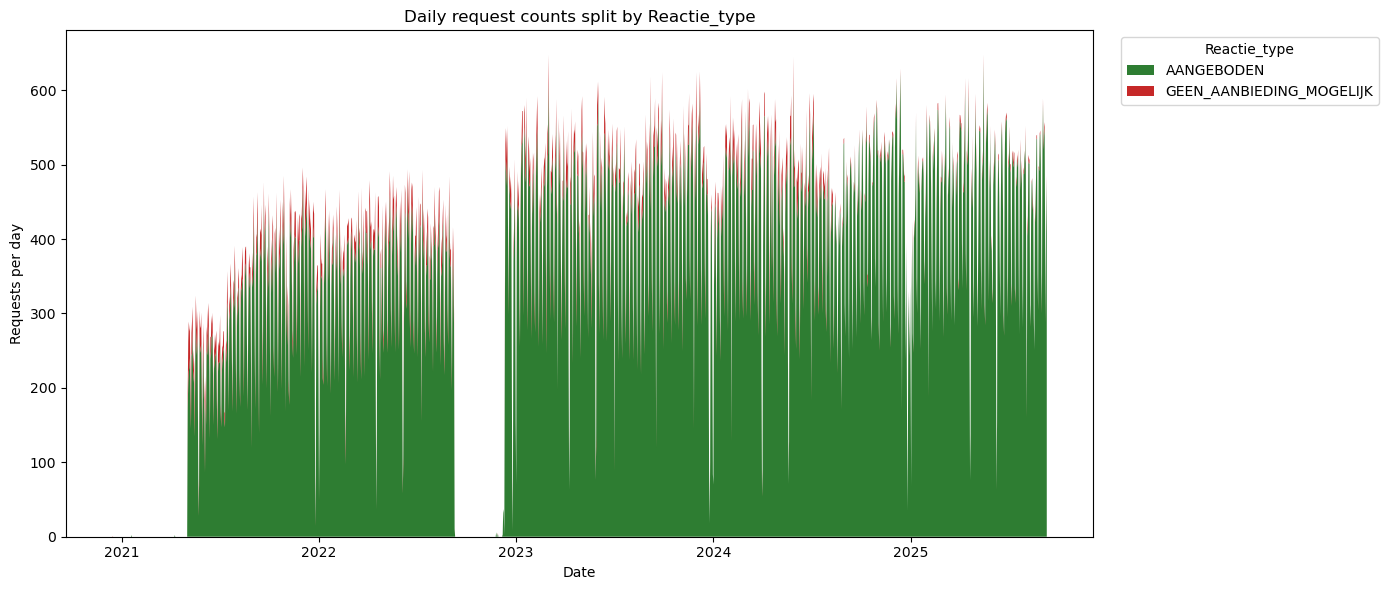

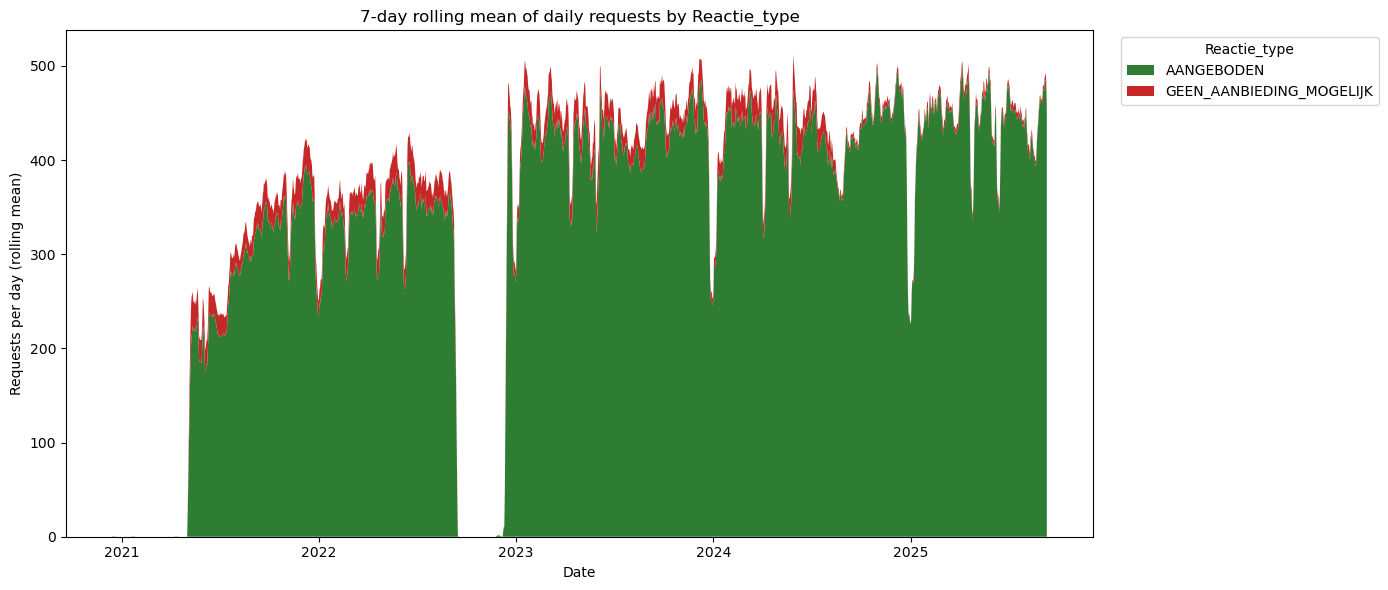

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# ========= CONFIG =========
FILES   = ["cleaned_dataset_1.csv", "cleaned_dataset_2.csv", "cleaned_dataset_3.csv"]
OUT_DIR = Path("plots_time"); OUT_DIR.mkdir(exist_ok=True, parents=True)
TARGET  = "Reactie_type"
DATECOL = "Aanvraag_Indienmoment"   # request timestamp
REACTIE_ORDER = ["AANGEBODEN", "GEEN_AANBIEDING_MOGELIJK", "AFWIJZING", "ANNULEER_BEVESTIGING"]
COLOR_MAP = {
    "AANGEBODEN":               "#2E7D32",
    "GEEN_AANBIEDING_MOGELIJK": "#C62828",
    "AFWIJZING":                "#6A1B9A",
    "ANNULEER_BEVESTIGING":     "#FF8F00",
}
ROLL_DAYS = 7  # rolling window for smoothed chart
# ==========================

def load_concat(files):
    dfs = []
    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
        except UnicodeDecodeError:
            df = pd.read_csv(f, low_memory=False, encoding="latin1")
        df[TARGET] = df[TARGET].astype(str).str.strip()
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

def find_col(df, candidates):
    low = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in low:
            return low[cand.lower()]
    raise KeyError(f"None of {candidates} found. First columns: {list(df.columns)[:25]}")

def class_colors(cols):
    return [COLOR_MAP.get(c, None) for c in cols]

# ---- Load & prep
df = load_concat(FILES)
date_col = find_col(df, [DATECOL])
df["_date"] = pd.to_datetime(df[date_col], errors="coerce").dt.date
df = df.dropna(subset=["_date", TARGET])
df["_date"] = pd.to_datetime(df["_date"])  # back to Timestamp @00:00

# ---- Daily counts by Reactie_type
daily = (df.groupby(["_date", TARGET]).size()
           .rename("n").reset_index())

pivot = daily.pivot(index="_date", columns=TARGET, values="n").fillna(0)

# put columns in fixed order (present only)
present = [c for c in REACTIE_ORDER if c in pivot.columns] + [c for c in pivot.columns if c not in REACTIE_ORDER]
pivot = pivot[present]

# ensure a continuous date index (fill missing days with zeros)
full_range = pd.date_range(pivot.index.min(), pivot.index.max(), freq="D")
pivot = pivot.reindex(full_range, fill_value=0)
pivot.index.name = "date"

# save table
pivot.to_csv(OUT_DIR / "daily_request_counts_by_reactie_type.csv")

# ---- Plot 1: daily stacked area (absolute)
plt.figure(figsize=(14, 6))
plt.stackplot(
    pivot.index, *[pivot[c].values for c in pivot.columns],
    labels=pivot.columns, colors=class_colors(pivot.columns)
)
plt.title("Daily request counts split by Reactie_type")
plt.xlabel("Date")
plt.ylabel("Requests per day")
plt.legend(title=TARGET, loc="upper left", bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.savefig(OUT_DIR / "daily_requests_stacked_area.png", dpi=150)
plt.show()

# ---- Plot 2: 7-day rolling mean (smoother)
pivot_roll = pivot.rolling(window=ROLL_DAYS, min_periods=1).mean()

plt.figure(figsize=(14, 6))
plt.stackplot(
    pivot_roll.index, *[pivot_roll[c].values for c in pivot_roll.columns],
    labels=pivot_roll.columns, colors=class_colors(pivot_roll.columns)
)
plt.title(f"{ROLL_DAYS}-day rolling mean of daily requests by Reactie_type")
plt.xlabel("Date")
plt.ylabel("Requests per day (rolling mean)")
plt.legend(title=TARGET, loc="upper left", bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.savefig(OUT_DIR / f"daily_requests_{ROLL_DAYS}d_rolling_stacked_area.png", dpi=150)
plt.show()


In [6]:
import pandas as pd
import numpy as np
from pathlib import Path

# ===================== CONFIG =====================
FILES = ["cleaned_dataset_1.csv", "cleaned_dataset_2.csv", "cleaned_dataset_3.csv"]
OUT_DIR = Path("tables_cumulative"); OUT_DIR.mkdir(exist_ok=True, parents=True)

TARGET = "Reactie_type"
POS_LABEL = "AANGEBODEN"  # positive/accepted class

# Which feature sets to export
CATEGORICAL_COLS = [
    "Aanvrager_Verkorting",                 # fallback to Aanvraag_vervoerder_verkorting
    "Aanvraag_vervoerder_verkorting",
    "Aanvraag_Eerste_Locatie_Dienstregelpunt",
    "Aanvraag_Laatste_Locatie_Dienstregelpunt",
    "Aanvraag_Eerste_Locatie_Opstellen_True",
    "Aanvraag_Laatste_Locatie_Opstellen_True",
]

# Temporal feature source
REQUEST_TIME_COL = "Aanvraag_Indienmoment"  # datetime-like

# Numeric features to bin (for tabular summaries per bin)
NUMERIC_BINS = {
    "Aanvraag_Eerste_Locatie_MaxLengte": 10,
    "Aanvraag_Eerste_Locatie_MaxSnelheid": 10,
    "Aanvraag_Eerste_Locatie_MaxGewicht": 10,
    "Aanvraag_time_range_Eerste_Locatie_Vertrektijd": 12,
    "Aanvraag_time_range_Laatste_Locatie_Aankomsttijd": 12,
}
CLIP_PCT = (0.01, 0.99)  # clip numeric extremes before binning
MIN_COUNT_CAT = 0        # (optional) filter very small categories; 0 = keep all
# ===================================================


def load_concat(files):
    dfs = []
    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
        except UnicodeDecodeError:
            df = pd.read_csv(f, low_memory=False, encoding="latin1")
        df[TARGET] = df[TARGET].astype(str).str.strip()
        dfs.append(df)
    if not dfs:
        raise RuntimeError("No files loaded.")
    return pd.concat(dfs, ignore_index=True)


def find_col(df, name):
    """Case-insensitive single-name match (returns None if absent)."""
    low = {c.lower(): c for c in df.columns}
    return low.get(name.lower(), None)


def ensure_col(df, candidates):
    """Return the first existing column among candidates (case-insensitive)."""
    for c in candidates:
        col = find_col(df, c)
        if col:
            return col
    return None


def counts_table(df, cat_col, min_count=0):
    """
    Return a table with counts per Reactie_type, Total, and Pct_AANGEBODEN.
    Index = category values (or bins).
    """
    sub = df[[cat_col, TARGET]].dropna()
    if sub.empty:
        return None
    sub[TARGET] = sub[TARGET].astype(str).str.strip()

    # counts per (category, class)
    counts = (sub.groupby([cat_col, TARGET]).size()
                .rename("n").reset_index())

    # pivot to wide
    pvt = counts.pivot(index=cat_col, columns=TARGET, values="n").fillna(0)

    # add Total and Pct_AANGEBODEN
    pvt["Total"] = pvt.sum(axis=1)
    # guard if POS_LABEL not present in columns
    pos_counts = pvt[POS_LABEL] if POS_LABEL in pvt.columns else 0
    pvt["Pct_AANGEBODEN"] = (pos_counts / pvt["Total"].replace(0, np.nan)) * 100.0

    # optional filter
    if min_count and min_count > 0:
        pvt = pvt[pvt["Total"] >= min_count]

    # sort by acceptance rate (desc), then Total (desc)
    pvt = pvt.sort_values(["Pct_AANGEBODEN", "Total"], ascending=[False, False])

    return pvt


def add_temporal_tables(df, request_time_col):
    """Create tables for Hour, DayName, ISO Week."""
    if request_time_col is None:
        print("[WARN] Request time column not found; skipping temporal tables.")
        return

    dt = pd.to_datetime(df[request_time_col], errors="coerce")
    work = df.copy()
    work["_hour"] = dt.dt.hour
    work["_dow"]  = dt.dt.dayofweek
    work["_week"] = (dt.dt.isocalendar().week
                     if hasattr(dt.dt, "isocalendar")
                     else pd.Series(pd.NA, index=dt.index, dtype="Int64"))
    work["_dayname"] = work["_dow"].map({0:"Mon",1:"Tue",2:"Wed",3:"Thu",4:"Fri",5:"Sat",6:"Sun"})

    # Hour
    t_hour = counts_table(work.rename(columns={"_hour":"Hour"}), "Hour")
    if t_hour is not None:
        # ensure all 0..23 included (fill missing with 0 totals)
        full_idx = pd.Index(range(24), name="Hour")
        t_hour = t_hour.reindex(full_idx).fillna(0)
        t_hour.to_csv(OUT_DIR / "tab_requests_by_hour.csv")

    # Day of week
    t_day = counts_table(work.rename(columns={"_dayname":"Day"}), "Day")
    if t_day is not None:
        order = pd.Index(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"], name="Day")
        t_day = t_day.reindex(order).fillna(0)
        t_day.to_csv(OUT_DIR / "tab_requests_by_day.csv")

    # ISO Week
    if "_week" in work:
        t_week = counts_table(work.rename(columns={"_week":"ISO_Week"}), "ISO_Week")
        if t_week is not None:
            t_week = t_week.sort_index()
            t_week.to_csv(OUT_DIR / "tab_requests_by_week.csv")


def bin_numeric(series, nbins, clip_pct=CLIP_PCT):
    """Quantile bins (fallback to fixed width if too few uniques)."""
    s = pd.to_numeric(series, errors="coerce").replace([np.inf, -np.inf], np.nan).dropna()
    if s.empty:
        return None
    if clip_pct:
        s = s.clip(lower=s.quantile(clip_pct[0]), upper=s.quantile(clip_pct[1]))
    try:
        cats, _ = pd.qcut(s, q=nbins, retbins=True, duplicates="drop")
    except ValueError:
        # fallback: fixed-width
        edges = np.linspace(s.min(), s.max(), num=nbins+1)
        cats = pd.cut(s, bins=edges, include_lowest=True, right=False)
    return pd.Categorical(cats, ordered=True)


# ===================== RUN =====================
df = load_concat(FILES)

# --- 1) CATEGORICAL TABLES ---
# Resolve duplicates in candidates (e.g., Aanvrager_Verkorting vs Aanvraag_vervoerder_verkorting)
resolved_cats = []
seen = set()
for name in CATEGORICAL_COLS:
    col = find_col(df, name)
    if col and col.lower() not in seen:
        resolved_cats.append(col)
        seen.add(col.lower())

for col in resolved_cats:
    # For *_Opstellen_True columns, it may be 0/1; make it readable
    if "opstellen" in col.lower():
        tmp = df.copy()
        s = pd.to_numeric(tmp[col], errors="coerce")
        lab = pd.Series(index=s.index, dtype="string")
        lab[s == 1] = "Yes"; lab[s == 0] = "No"; lab[s.isna()] = "Unknown"
        tmp["_opstel_label"] = lab
        table = counts_table(tmp.rename(columns={"_opstel_label": col + "_Label"}), col + "_Label",
                             min_count=MIN_COUNT_CAT)
    else:
        table = counts_table(df, col, min_count=MIN_COUNT_CAT)

    if table is None or table.empty:
        print(f"[WARN] No data for {col}; skipped.")
        continue

    out_name = f"tab_counts_{col}.csv".replace(" ", "_")
    table.to_csv(OUT_DIR / out_name)
    print(f"[OK] Wrote {OUT_DIR/out_name}")

# --- 2) TEMPORAL TABLES (Hour/Day/Week) ---
req_col = ensure_col(df, [REQUEST_TIME_COL, "Aanvraag_Indienmoment"])
add_temporal_tables(df, req_col)

# --- 3) NUMERIC (BINNED) TABLES ---
def bin_numeric(series, nbins=12, clip_pct=(0.01, 0.99), quantile=True):
    s = pd.to_numeric(series, errors="coerce")
    s = s.replace([np.inf, -np.inf], np.nan)
    mask = s.notna()
    s_non = s[mask]
    if s_non.empty:
        return None, None

    # clip extremes
    if clip_pct:
        lo, hi = s_non.quantile(clip_pct[0]), s_non.quantile(clip_pct[1])
        s_non = s_non.clip(lower=lo, upper=hi)

    # binning
    if quantile:
        try:
            cats, edges = pd.qcut(s_non, q=nbins, retbins=True, duplicates="drop")
        except ValueError:
            quantile = False
    if not quantile:
        edges = np.linspace(s_non.min(), s_non.max(), num=nbins + 1)
        if np.allclose(edges[0], edges[-1]):
            edges = np.array([edges[0] - 0.5, edges[0] + 0.5])
        cats = pd.cut(s_non, bins=edges, include_lowest=True, right=False)

    # make nice labels
    edges_rounded = np.round(edges, 2)
    labels = []
    for a, b in zip(edges_rounded[:-1], edges_rounded[1:]):
        labels.append(f"[{a:g}, {b:g})")
    if labels:
        labels[-1] = labels[-1].replace(")", "]")  # last bin closed

    cats = pd.Categorical(cats, ordered=True)
    if len(labels) == len(cats.categories):
        cats = cats.rename_categories(labels)

    # >>> return a Series with the original index <<<
    cat_series = pd.Series(cats, index=s_non.index, name="bin")
    return cat_series, list(cat_series.cat.categories)


print("\nDone. Tables are in:", OUT_DIR.resolve())


[OK] Wrote tables_cumulative\tab_counts_Aanvrager_Verkorting.csv
[OK] Wrote tables_cumulative\tab_counts_Aanvraag_vervoerder_verkorting.csv
[OK] Wrote tables_cumulative\tab_counts_Aanvraag_Eerste_Locatie_Dienstregelpunt.csv
[OK] Wrote tables_cumulative\tab_counts_Aanvraag_Laatste_Locatie_Dienstregelpunt.csv
[OK] Wrote tables_cumulative\tab_counts_Aanvraag_Eerste_Locatie_Opstellen_True.csv
[OK] Wrote tables_cumulative\tab_counts_Aanvraag_Laatste_Locatie_Opstellen_True.csv

Done. Tables are in: C:\Users\quint\Downloads\tables_cumulative


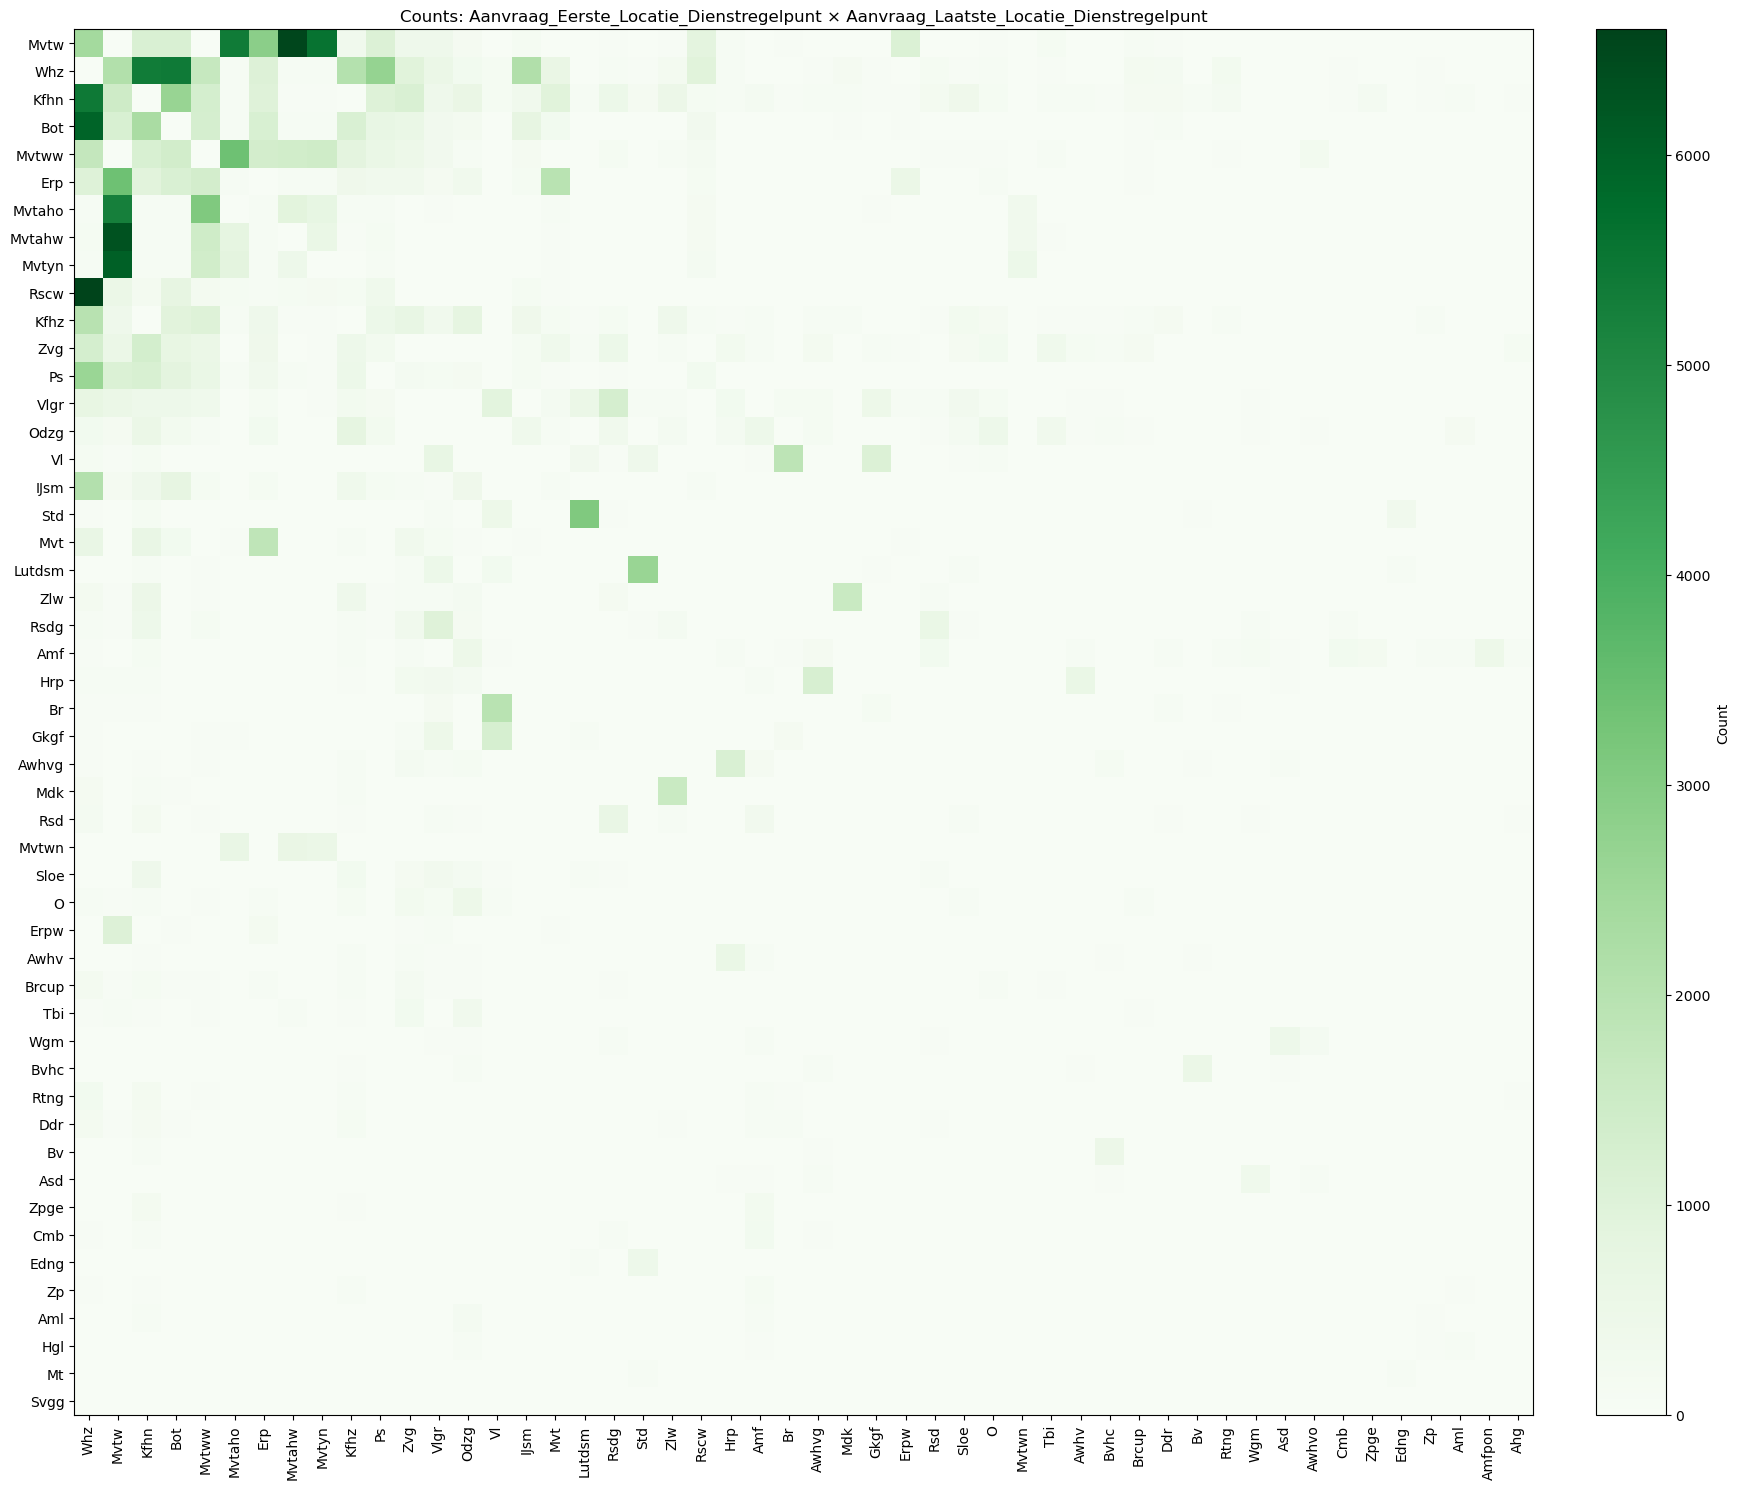

[OK] Saved plots_crossrefs\heat_eerste_x_laatste_counts.png


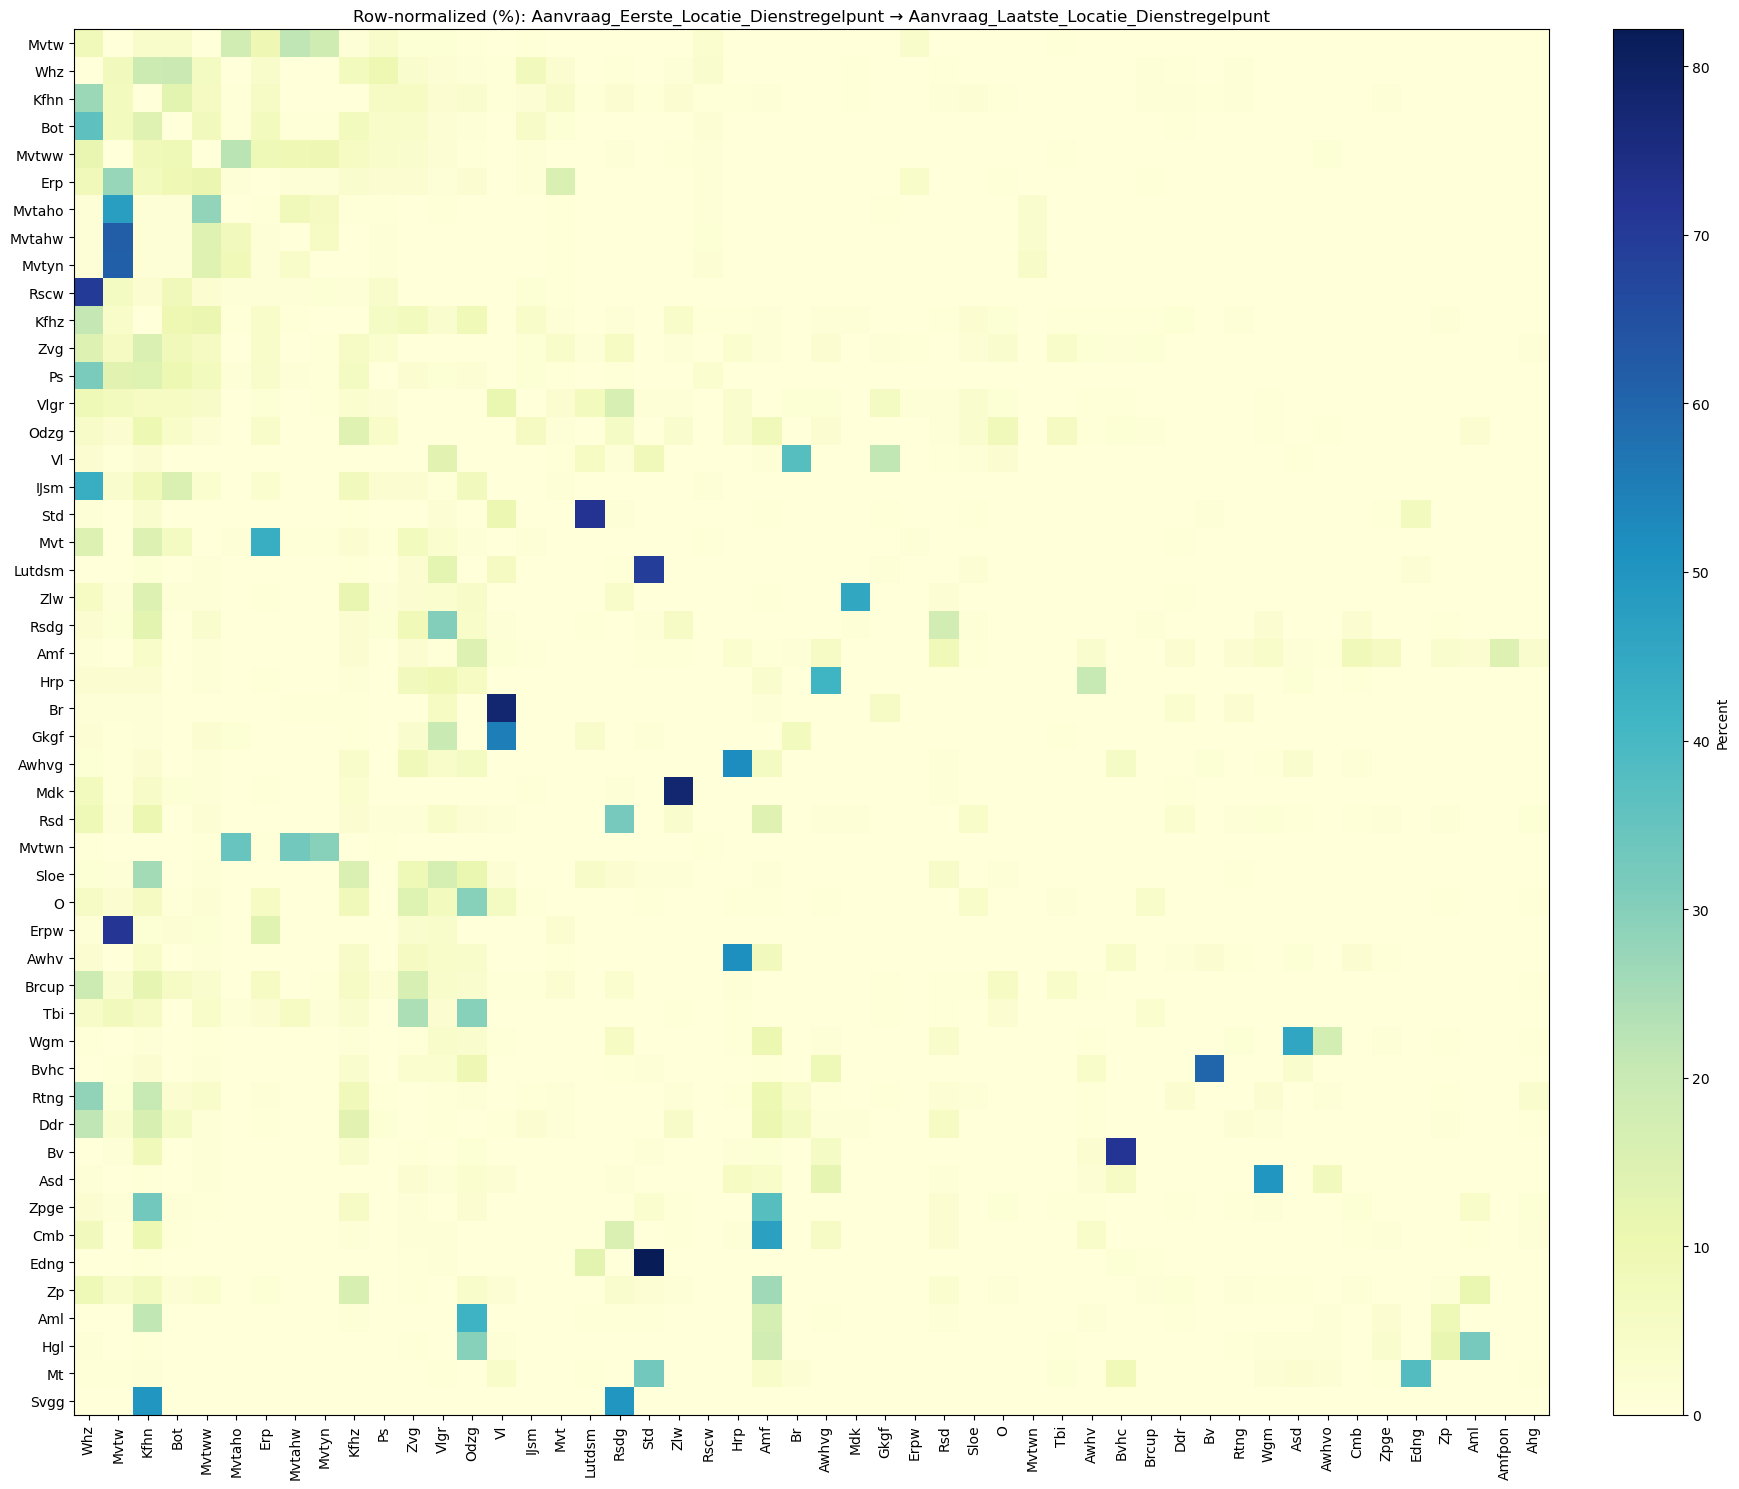

[OK] Saved plots_crossrefs\heat_eerste_x_laatste_rowpct.png


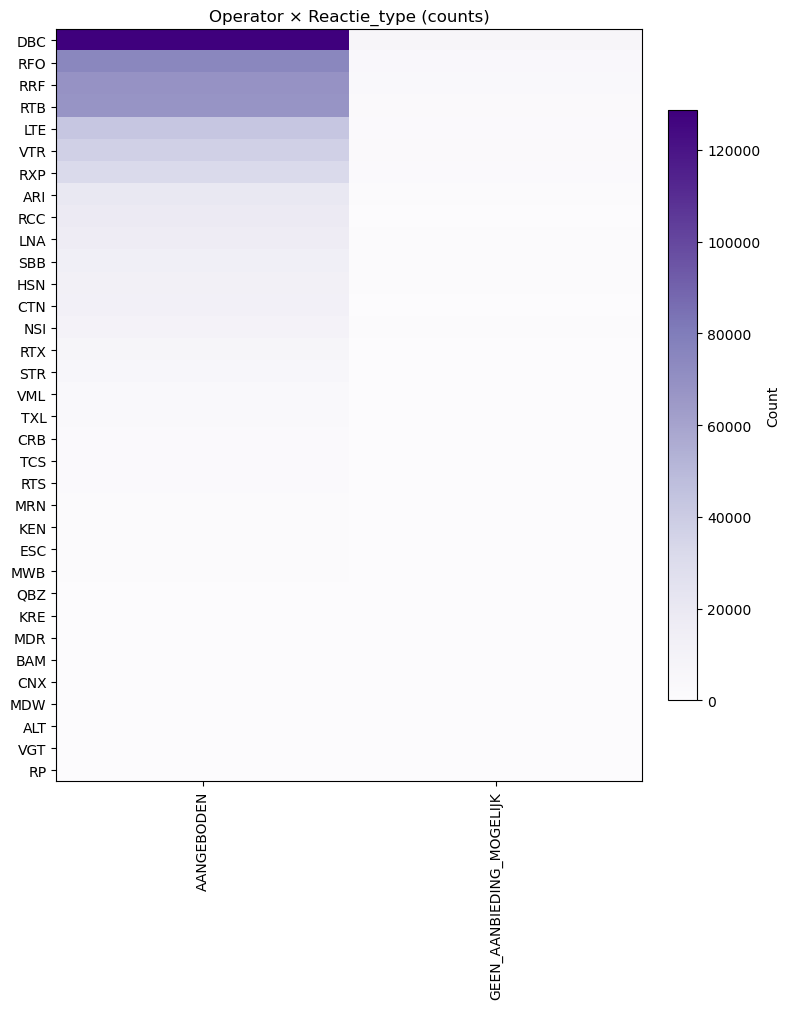

[OK] Saved plots_crossrefs\heat_operator_x_reactie_counts.png


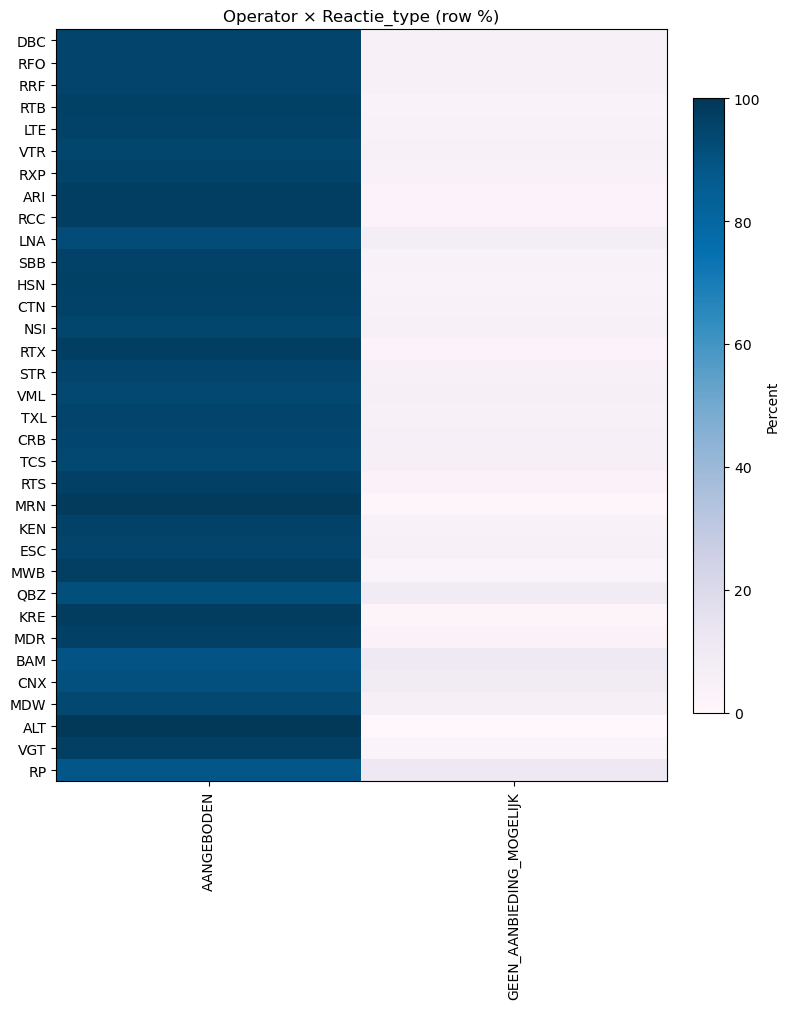

[OK] Saved plots_crossrefs\heat_operator_x_reactie_rowpct.png


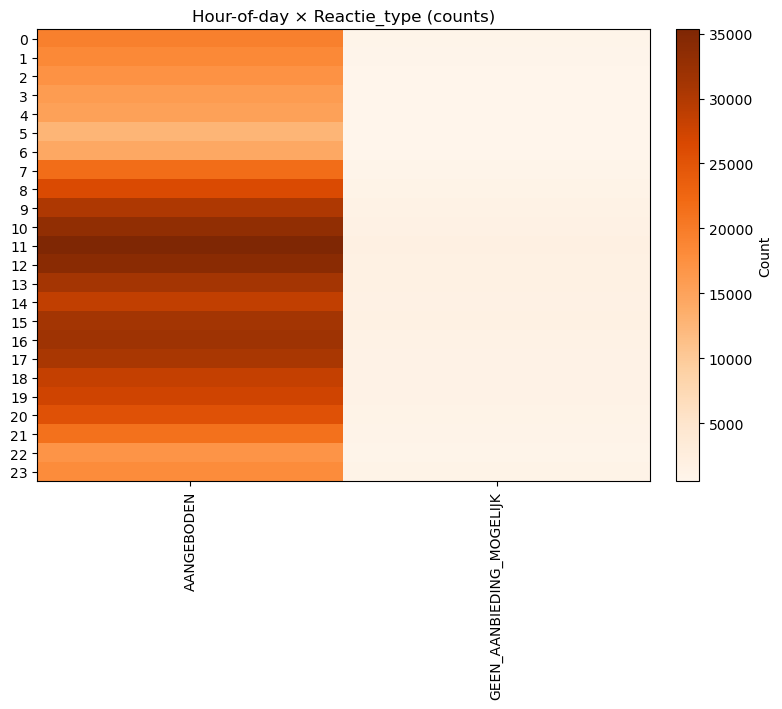

[OK] Saved plots_crossrefs\heat_hour_x_reactie_counts.png


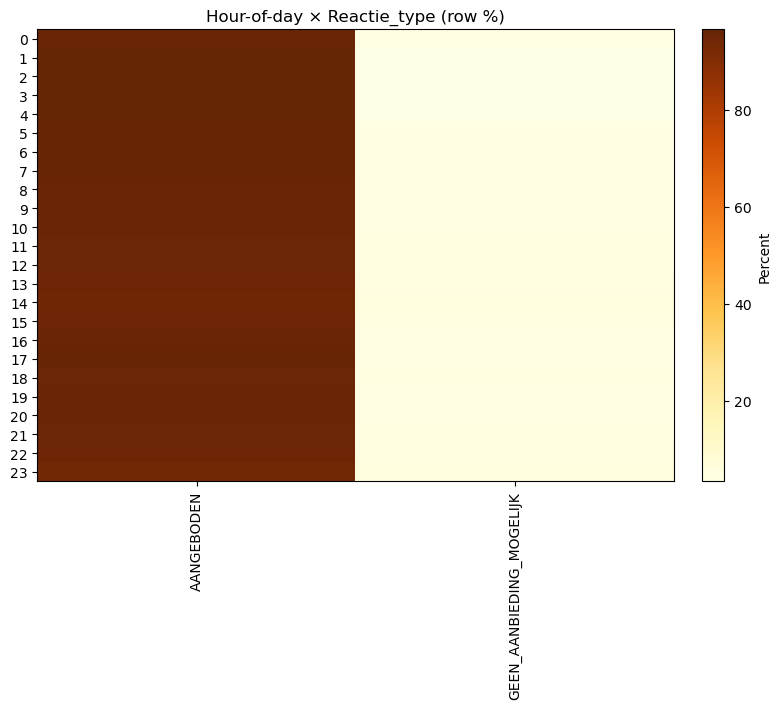

[OK] Saved plots_crossrefs\heat_hour_x_reactie_rowpct.png


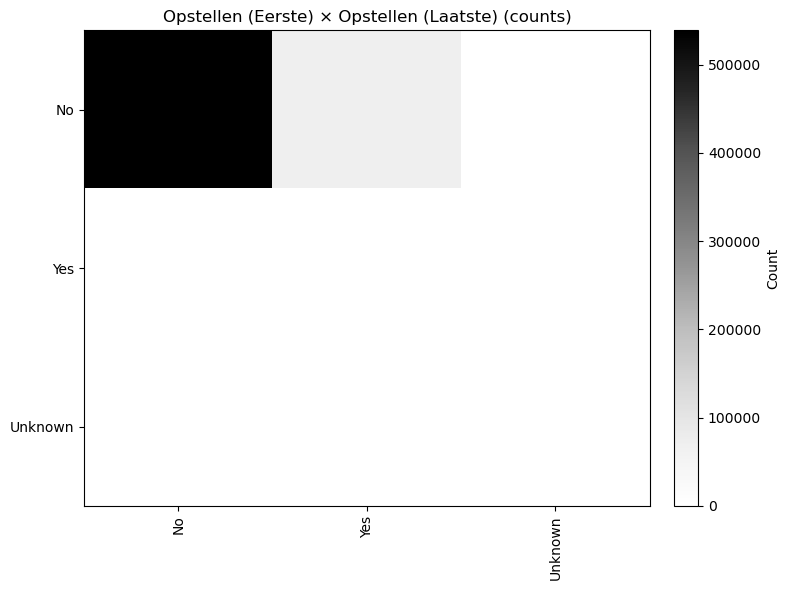

[OK] Saved plots_crossrefs\heat_opstellen_first_x_last_counts.png


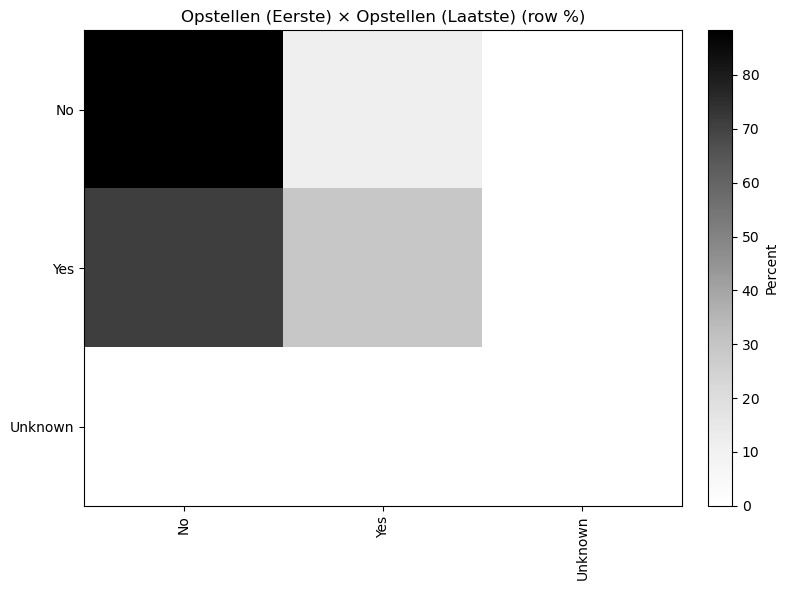

[OK] Saved plots_crossrefs\heat_opstellen_first_x_last_rowpct.png

Done. Cross-reference CSVs and PNGs are in: C:\Users\quint\Downloads\plots_crossrefs


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# =================== CONFIG ===================
FILES = ["cleaned_dataset_1.csv", "cleaned_dataset_2.csv", "cleaned_dataset_3.csv"]
OUT_DIR = Path("plots_crossrefs"); OUT_DIR.mkdir(exist_ok=True, parents=True)

TARGET = "Reactie_type"
REACTIE_ORDER = ["AANGEBODEN", "GEEN_AANBIEDING_MOGELIJK", "AFWIJZING", "ANNULEER_BEVESTIGING"]
COLOR_MAP = {
    "AANGEBODEN":               "#2E7D32",
    "GEEN_AANBIEDING_MOGELIJK": "#C62828",
    "AFWIJZING":                "#6A1B9A",
    "ANNULEER_BEVESTIGING":     "#FF8F00",
}

# Reduce very large matrices:
MIN_COUNT_LOC = 25     # filter locations that appear fewer than N times overall
TOP_EERSTE    = 50     # keep only top-N Eerste locaties by total volume (None for all)
TOP_LAATSTE   = 50     # keep only top-N Laatste locaties by total volume (None for all)

# For other cross refs
MIN_COUNT_OPERATOR = 50
# =============================================


# --------- helpers ---------
def load_concat(files):
    dfs = []
    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
        except UnicodeDecodeError:
            df = pd.read_csv(f, low_memory=False, encoding="latin1")
        df[TARGET] = df[TARGET].astype(str).str.strip()
        dfs.append(df)
    if not dfs:
        raise RuntimeError("No files loaded.")
    return pd.concat(dfs, ignore_index=True)

def find_col(df, candidates):
    low = {c.lower(): c for c in df.columns}
    for c in candidates:
        if c.lower() in low:
            return low[c.lower()]
    return None

def class_colors(cols):
    return [COLOR_MAP.get(c, None) for c in cols]

def plot_heatmap(mat: pd.DataFrame, title: str, outfile: str, cmap="Blues", fmt_counts=False):
    if mat is None or mat.empty:
        print(f"[WARN] Empty table for {title}")
        return
    arr = mat.values
    plt.figure(figsize=(max(8, 0.35*mat.shape[1]), max(6, 0.3*mat.shape[0])))
    im = plt.imshow(arr, aspect="auto", interpolation="nearest", cmap=cmap)
    plt.colorbar(im, fraction=0.046, pad=0.04, label=("Count" if fmt_counts else "Percent"))
    plt.xticks(np.arange(mat.shape[1]), mat.columns.astype(str), rotation=90)
    plt.yticks(np.arange(mat.shape[0]), mat.index.astype(str))
    plt.title(title)
    plt.tight_layout()
    out = OUT_DIR / outfile
    plt.savefig(out, dpi=150)
    plt.show()
    print(f"[OK] Saved {out}")

def counts_matrix(df, rows_col, cols_col):
    sub = df[[rows_col, cols_col]].dropna()
    if sub.empty:
        return None
    ct = pd.crosstab(sub[rows_col], sub[cols_col], dropna=False)
    return ct

def normalize_rows(ct: pd.DataFrame):
    denom = ct.sum(axis=1).replace(0, np.nan)
    pct = ct.div(denom, axis=0) * 100.0
    return pct

# ---------- load & locate columns ----------
df = load_concat(FILES)

col_eerste = find_col(df, ["Aanvraag_Eerste_Locatie_Dienstregelpunt"])
col_laatste = find_col(df, ["Aanvraag_Laatste_Locatie_Dienstregelpunt"])
col_operator = find_col(df, ["Aanvrager_Verkorting", "Aanvraag_vervoerder_verkorting"])
col_reqtime = find_col(df, ["Aanvraag_Indienmoment"])
col_first_opstel = find_col(df, ["Aanvraag_Eerste_Locatie_Opstellen_True"])
col_last_opstel  = find_col(df, ["Aanvraag_Laatste_Locatie_Opstellen_True"])

# ---------- (A) Eerste × Laatste: counts + normalized ----------
if col_eerste and col_laatste:
    # global frequency filter (keep only reasonably common locations)
    loc_counts = (pd.concat([df[col_eerste], df[col_laatste]])
                    .value_counts(dropna=True))
    common_locs = set(loc_counts[loc_counts >= MIN_COUNT_LOC].index.astype(str))

    # Keep only rows where both locs in common set
    sub = df[[col_eerste, col_laatste]].dropna().astype(str)
    sub = sub[sub[col_eerste].isin(common_locs) & sub[col_laatste].isin(common_locs)]

    # top-N trimming to keep matrices readable
    if TOP_EERSTE:
        top_eerste = (sub[col_eerste].value_counts().head(TOP_EERSTE)).index
        sub = sub[sub[col_eerste].isin(top_eerste)]
    if TOP_LAATSTE:
        top_laatste = (sub[col_laatste].value_counts().head(TOP_LAATSTE)).index
        sub = sub[sub[col_laatste].isin(top_laatste)]

    ct = pd.crosstab(sub[col_eerste], sub[col_laatste])
    ct = ct.loc[ct.sum(axis=1).sort_values(ascending=False).index,  # sort rows by total
                ct.sum(axis=0).sort_values(ascending=False).index]  # sort cols by total

    # Save & plot counts
    ct.to_csv(OUT_DIR / "xtab_eerste_x_laatste_counts.csv")
    plot_heatmap(ct, f"Counts: {col_eerste} × {col_laatste}", "heat_eerste_x_laatste_counts.png", cmap="Greens", fmt_counts=True)

    # Row-normalized (%)
    pct = normalize_rows(ct).round(2)
    pct.to_csv(OUT_DIR / "xtab_eerste_x_laatste_rowpct.csv")
    plot_heatmap(pct, f"Row-normalized (%): {col_eerste} → {col_laatste}", "heat_eerste_x_laatste_rowpct.png", cmap="YlGnBu", fmt_counts=False)
else:
    print("[WARN] Could not find both Eerste and Laatste locatie columns.")

# ---------- (B) Operator × Reactie_type: counts + normalized ----------
if col_operator:
    tab = pd.crosstab(df[col_operator], df[TARGET])
    # reorder columns to fixed REACTIE_ORDER (only those present)
    cols = [c for c in REACTIE_ORDER if c in tab.columns] + [c for c in tab.columns if c not in REACTIE_ORDER]
    tab = tab[cols]
    # filter small operators
    tab = tab.loc[tab.sum(axis=1) >= MIN_COUNT_OPERATOR]
    # sort by AANGEBODEN count if present
    sort_key = "AANGEBODEN" if "AANGEBODEN" in tab.columns else tab.columns[0]
    tab = tab.sort_values(by=sort_key, ascending=False)

    tab.to_csv(OUT_DIR / "xtab_operator_x_reactie_counts.csv")
    plot_heatmap(tab, "Operator × Reactie_type (counts)", "heat_operator_x_reactie_counts.png", cmap="Purples", fmt_counts=True)

    pct = normalize_rows(tab).round(2)
    pct.to_csv(OUT_DIR / "xtab_operator_x_reactie_rowpct.csv")
    plot_heatmap(pct, "Operator × Reactie_type (row %)", "heat_operator_x_reactie_rowpct.png", cmap="PuBu", fmt_counts=False)
else:
    print("[WARN] Operator column not found.")

# ---------- (C) Hour-of-day × Reactie_type: row-normalized ----------
if col_reqtime:
    dt = pd.to_datetime(df[col_reqtime], errors="coerce")
    hours = dt.dt.hour
    sub = pd.DataFrame({"hour": hours, TARGET: df[TARGET]}).dropna()
    tab = pd.crosstab(sub["hour"].astype(int), sub[TARGET])
    cols = [c for c in REACTIE_ORDER if c in tab.columns] + [c for c in tab.columns if c not in REACTIE_ORDER]
    tab = tab[cols]
    # ensure all 0..23 hours present
    tab = tab.reindex(range(24), fill_value=0)
    tab.to_csv(OUT_DIR / "xtab_hour_x_reactie_counts.csv")
    plot_heatmap(tab, "Hour-of-day × Reactie_type (counts)", "heat_hour_x_reactie_counts.png", cmap="Oranges", fmt_counts=True)

    pct = normalize_rows(tab).round(2)
    pct.to_csv(OUT_DIR / "xtab_hour_x_reactie_rowpct.csv")
    plot_heatmap(pct, "Hour-of-day × Reactie_type (row %)", "heat_hour_x_reactie_rowpct.png", cmap="YlOrBr", fmt_counts=False)
else:
    print("[WARN] Aanvraag_Indienmoment not found; skipping hour×reactie heatmaps.")

# ---------- (D) Opstellen (Eerste) × Opstellen (Laatste): counts + normalized ----------
def to_yes_no_unknown(s):
    s = pd.to_numeric(s, errors="coerce")
    out = pd.Series(index=s.index, dtype="string")
    out[s == 1] = "Yes"; out[s == 0] = "No"; out[s.isna()] = "Unknown"
    return out

if col_first_opstel and col_last_opstel:
    a = to_yes_no_unknown(df[col_first_opstel])
    b = to_yes_no_unknown(df[col_last_opstel])
    tab = pd.crosstab(a, b)
    # order axes
    order = ["No","Yes","Unknown"]
    tab = tab.reindex(index=order, columns=order, fill_value=0)
    tab.to_csv(OUT_DIR / "xtab_opstellen_first_x_last_counts.csv")
    plot_heatmap(tab, "Opstellen (Eerste) × Opstellen (Laatste) (counts)", "heat_opstellen_first_x_last_counts.png", cmap="Greys", fmt_counts=True)

    pct = normalize_rows(tab).round(2)
    pct.to_csv(OUT_DIR / "xtab_opstellen_first_x_last_rowpct.csv")
    plot_heatmap(pct, "Opstellen (Eerste) × Opstellen (Laatste) (row %)", "heat_opstellen_first_x_last_rowpct.png", cmap="Greys", fmt_counts=False)
else:
    print("[WARN] Opstellen columns not both found.")

print("\nDone. Cross-reference CSVs and PNGs are in:", OUT_DIR.resolve())


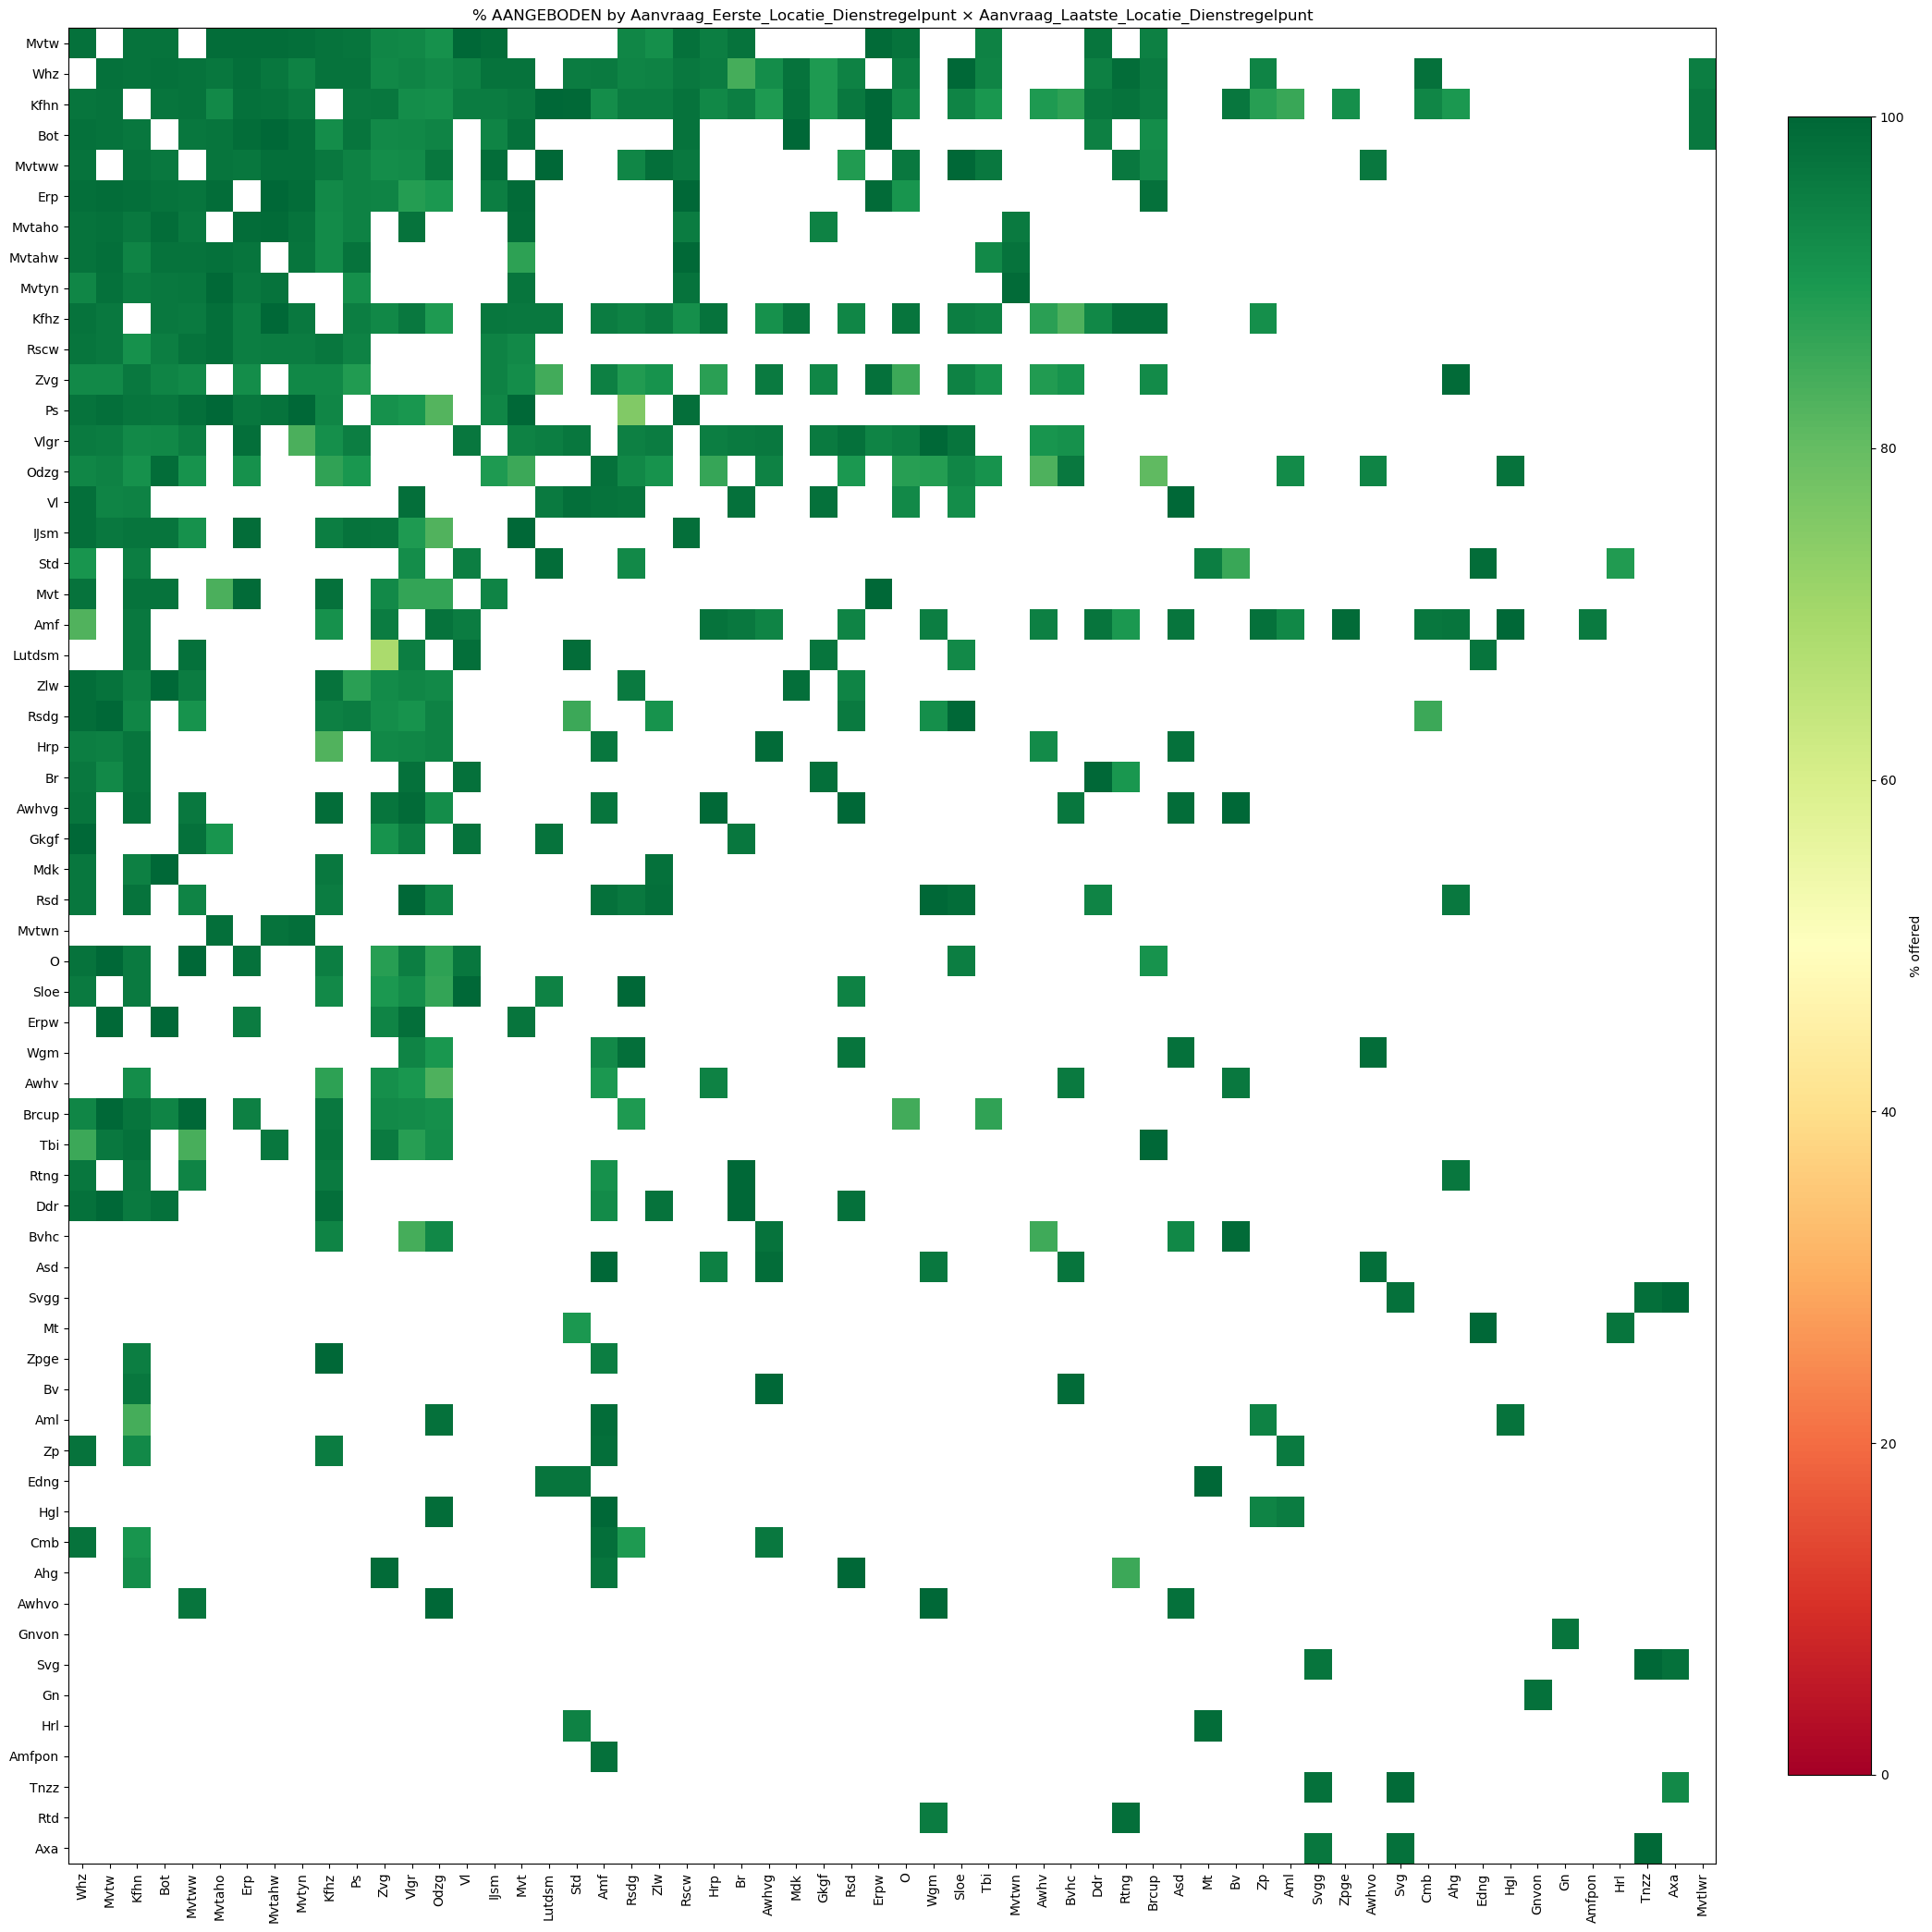

[OK] Saved plots_crosscolor\rate_eerste_x_laatste.png


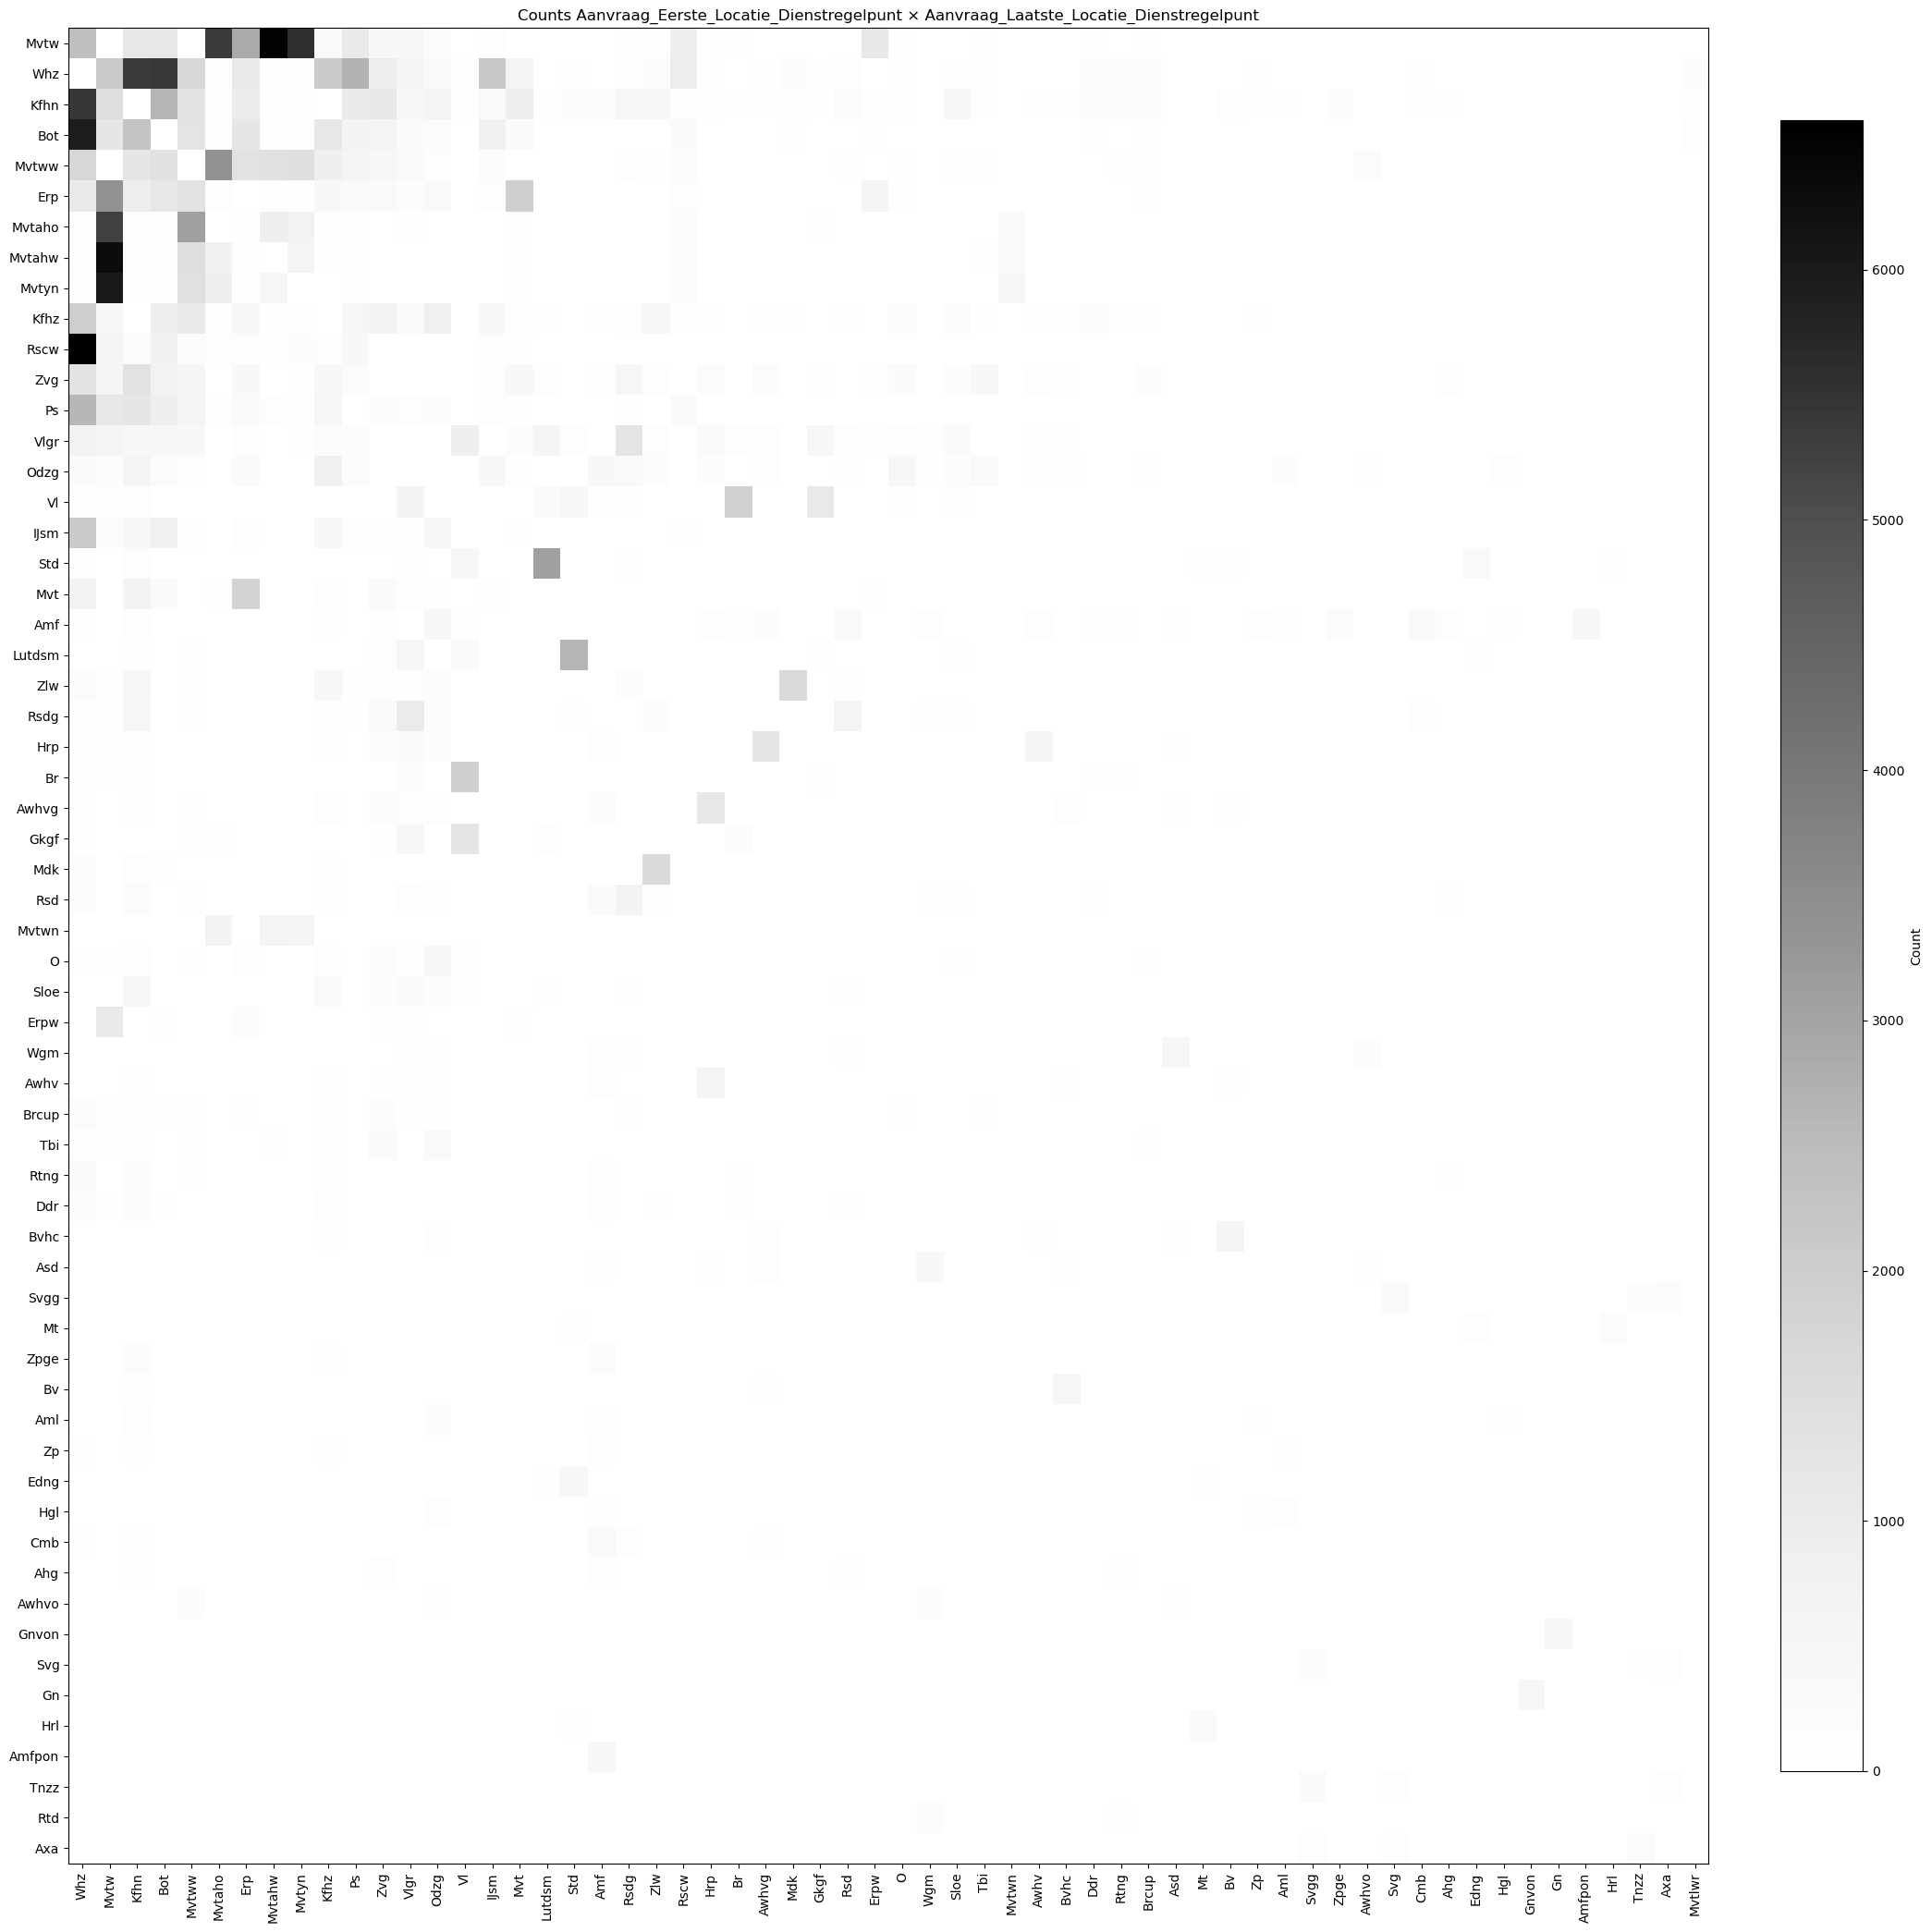

[OK] Saved plots_crosscolor\counts_eerste_x_laatste.png


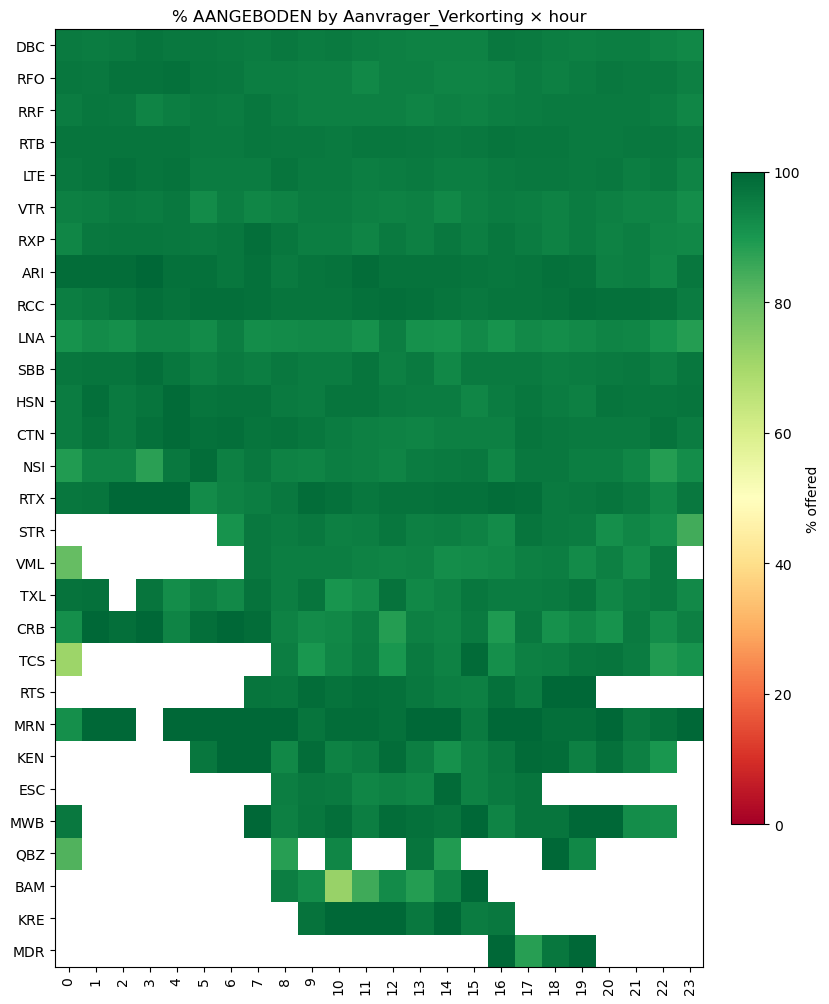

[OK] Saved plots_crosscolor\rate_operator_x_hour.png


C:\Users\quint\AppData\Local\Temp\ipykernel_9164\1117781033.py:82: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = sub.groupby([row_col, col_col, TARGET]).size().rename("n").reset_index()
C:\Users\quint\AppData\Local\Temp\ipykernel_9164\1117781033.py:83: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  ct = g.pivot_table(index=row_col, columns=col_col, values="n", aggfunc="sum").fillna(0)
C:\Users\quint\AppData\Local\Temp\ipykernel_9164\1117781033.py:86: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain

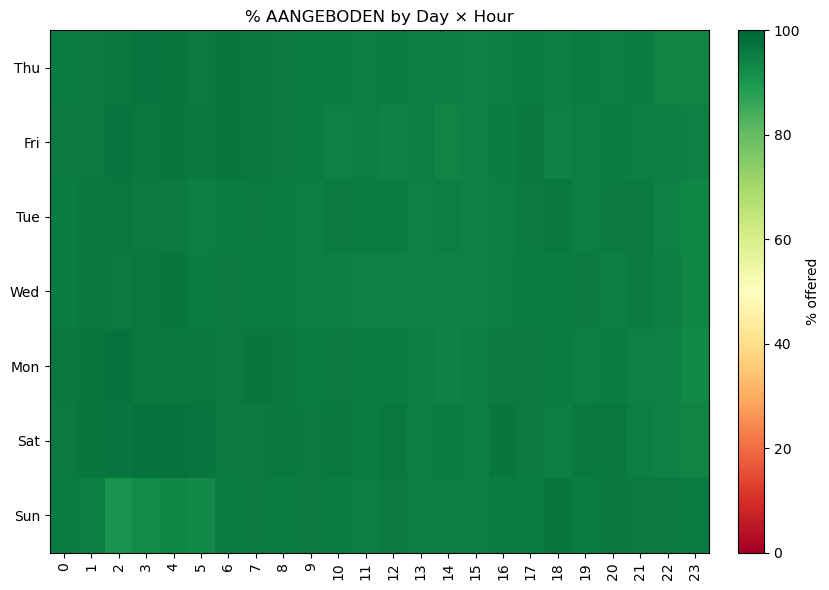

[OK] Saved plots_crosscolor\rate_day_x_hour.png


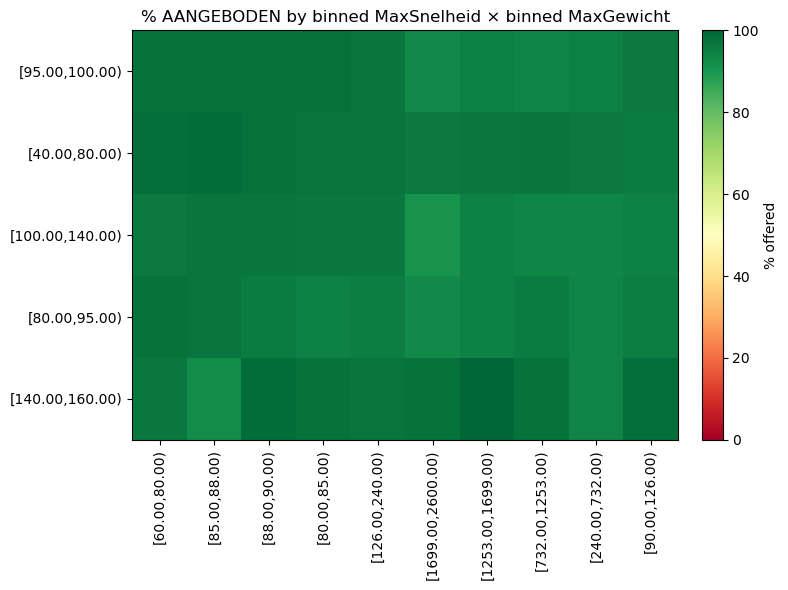

[OK] Saved plots_crosscolor\rate_bins_MaxSnelheid_x_MaxGewicht.png


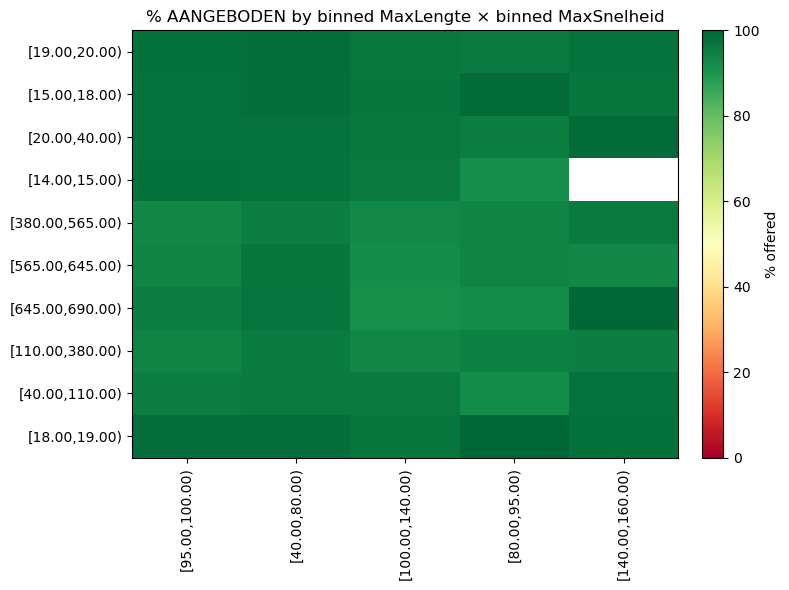

[OK] Saved plots_crosscolor\rate_bins_MaxLengte_x_MaxSnelheid.png


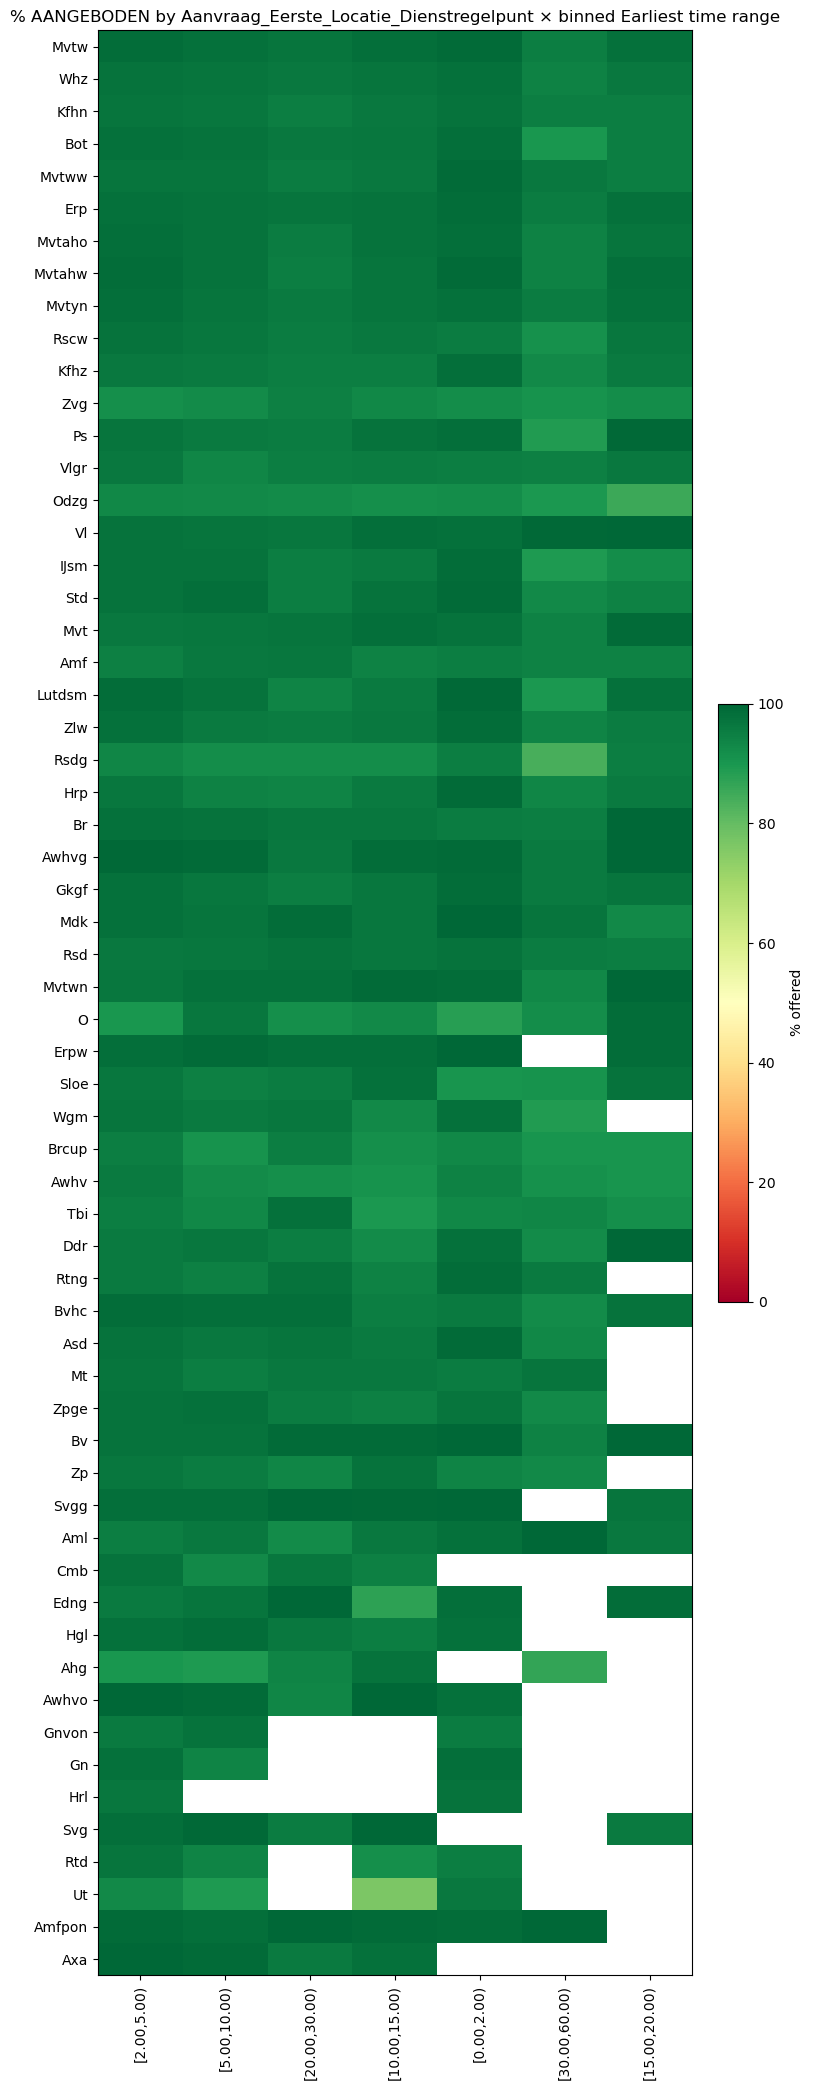

[OK] Saved plots_crosscolor\rate_eersteLoc_x_binned_timeRange.png

Done. Color-encoded cross-reference PNGs & CSVs are in: C:\Users\quint\Downloads\plots_crosscolor


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# =================== CONFIG ===================
FILES   = ["cleaned_dataset_1.csv", "cleaned_dataset_2.csv", "cleaned_dataset_3.csv"]
OUT_DIR = Path("plots_crosscolor"); OUT_DIR.mkdir(exist_ok=True, parents=True)

TARGET     = "Reactie_type"
POS_LABEL  = "AANGEBODEN"    # positive outcome
CMAP       = "RdYlGn"        # green = better
MIN_COUNT  = 25              # filter low-volume categories/cells
TOP_ROWS   = 60              # limit size of y-axis categories for readability (None = all)
TOP_COLS   = 60              # limit x-axis categories
NBINS_NUM  = 12              # numeric bin count (quantile bins; fallback fixed width)
CLIP_PCT   = (0.01, 0.99)    # clip outliers before binning
# ==============================================

# ---------- helpers ----------
def load_concat(files):
    dfs = []
    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
        except UnicodeDecodeError:
            df = pd.read_csv(f, low_memory=False, encoding="latin1")
        df[TARGET] = df[TARGET].astype(str).str.strip()
        dfs.append(df)
    if not dfs:
        raise RuntimeError("No files loaded.")
    return pd.concat(dfs, ignore_index=True)

def find_col(df, candidates):
    low = {c.lower(): c for c in df.columns}
    for c in candidates:
        if c.lower() in low:
            return low[c.lower()]
    return None

def ensure_time_features(df):
    col = find_col(df, ["Aanvraag_Indienmoment"])
    if not col:
        return df
    dt = pd.to_datetime(df[col], errors="coerce")
    df["_req_hour"] = dt.dt.hour
    df["_req_dow"]  = dt.dt.dayofweek
    df["_req_day"]  = df["_req_dow"].map({0:"Mon",1:"Tue",2:"Wed",3:"Thu",4:"Fri",5:"Sat",6:"Sun"})
    return df

def qbin_numeric(series, nbins=NBINS_NUM, clip_pct=CLIP_PCT, label_prefix=None):
    s = pd.to_numeric(series, errors="coerce").replace([np.inf, -np.inf], np.nan).dropna()
    if s.empty:
        return pd.Series(index=series.index, dtype="object")
    if clip_pct:
        s = s.clip(lower=s.quantile(clip_pct[0]), upper=s.quantile(clip_pct[1]))
    try:
        cats, edges = pd.qcut(s, q=nbins, retbins=True, duplicates="drop")
        labels = [f"[{edges[i]:.2f},{edges[i+1]:.2f})" for i in range(len(edges)-1)]
    except ValueError:
        edges = np.linspace(s.min(), s.max(), nbins+1)
        cats = pd.cut(s, bins=edges, include_lowest=True, right=False)
        labels = [f"[{edges[i]:.2f},{edges[i+1]:.2f})" for i in range(len(edges)-1)]
    cats = pd.Categorical(cats, ordered=True)
    # map to string labels for plotting
    lab = pd.Series(index=series.index, dtype="object")
    lab.loc[s.index] = cats.rename_categories(labels).astype(str)
    if label_prefix:
        lab = label_prefix + lab.astype(str)
    return lab

def make_rate_table(df, row_col, col_col, min_count=MIN_COUNT):
    """
    Returns (rate_table, count_table):
      rate_table: each cell = 100 * P(AANGEBODEN | row,col)
      count_table: counts in each cell
    """
    sub = df[[row_col, col_col, TARGET]].dropna()
    if sub.empty:
        return None, None
    # counts by class
    g = sub.groupby([row_col, col_col, TARGET]).size().rename("n").reset_index()
    ct = g.pivot_table(index=row_col, columns=col_col, values="n", aggfunc="sum").fillna(0)

    # offered counts
    offered = g[g[TARGET].str.upper()==POS_LABEL].pivot_table(index=row_col, columns=col_col, values="n", aggfunc="sum").fillna(0)
    # align shapes
    offered = offered.reindex_like(ct).fillna(0)

    # filter low-volume cells
    mask_keep = ct >= min_count
    # avoid division by zero
    with np.errstate(divide='ignore', invalid='ignore'):
        rate = np.where(ct.values>0, 100.0 * offered.values / ct.values, np.nan)
    rate = pd.DataFrame(rate, index=ct.index, columns=ct.columns)
    # set cells below min_count to NaN so they fade in colormap
    rate = rate.where(mask_keep, np.nan)

    # prune empty rows/cols
    nonempty_rows = (~np.isnan(rate.values)).any(axis=1)
    nonempty_cols = (~np.isnan(rate.values)).any(axis=0)
    rate = rate.loc[rate.index[nonempty_rows], rate.columns[nonempty_cols]]
    ct   = ct.loc[ct.index[nonempty_rows], ct.columns[nonempty_cols]]

    # Sort rows/cols by total volume (descending)
    ct_row_tot = ct.sum(axis=1).sort_values(ascending=False)
    ct_col_tot = ct.sum(axis=0).sort_values(ascending=False)
    rate = rate.loc[ct_row_tot.index, ct_col_tot.index]
    ct   = ct.loc[ct_row_tot.index, ct_col_tot.index]

    # Trim to top-N if configured
    if TOP_ROWS: 
        rate = rate.iloc[:TOP_ROWS, :]
        ct   = ct.iloc[:TOP_ROWS, :]
    if TOP_COLS:
        rate = rate.iloc[:, :TOP_COLS]
        ct   = ct.iloc[:, :TOP_COLS]

    return rate, ct

def plot_heatmap(table: pd.DataFrame, title: str, colorbar_label: str, outfile: str, cmap=CMAP, vmin=0, vmax=100):
    if table is None or table.empty:
        print(f"[WARN] Empty heatmap for {title}")
        return
    arr = table.values
    h, w = arr.shape
    plt.figure(figsize=(max(8, 0.35*w), max(6, 0.35*h)))
    im = plt.imshow(arr, aspect="auto", interpolation="nearest", cmap=cmap, vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
    cbar.set_label(colorbar_label)
    plt.xticks(np.arange(w), table.columns.astype(str), rotation=90)
    plt.yticks(np.arange(h), table.index.astype(str))
    plt.title(title)
    plt.tight_layout()
    out = OUT_DIR / outfile
    plt.savefig(out, dpi=150)
    plt.show()
    print(f"[OK] Saved {out}")

# ---------- load & prep ----------
df = load_concat(FILES)
df = ensure_time_features(df)

# column discovery
col_eerste = find_col(df, ["Aanvraag_Eerste_Locatie_Dienstregelpunt"])
col_laatste = find_col(df, ["Aanvraag_Laatste_Locatie_Dienstregelpunt"])
col_operator = find_col(df, ["Aanvrager_Verkorting", "Aanvraag_vervoerder_verkorting"])
col_maxlen = find_col(df, ["Aanvraag_Eerste_Locatie_MaxLengte"])
col_maxspd = find_col(df, ["Aanvraag_Eerste_Locatie_MaxSnelheid"])
col_maxwgt = find_col(df, ["Aanvraag_Eerste_Locatie_MaxGewicht"])
col_tr_ear = find_col(df, ["Aanvraag_time_range_Eerste_Locatie_Vertrektijd"])

# ---------- A) Eerste × Laatste Dienstregelpunt ----------
if col_eerste and col_laatste:
    rate, counts = make_rate_table(df, col_eerste, col_laatste)
    if rate is not None:
        rate.to_csv(OUT_DIR / "rate_eerste_x_laatste.csv")
        counts.to_csv(OUT_DIR / "counts_eerste_x_laatste.csv")
        plot_heatmap(rate, f"% AANGEBODEN by {col_eerste} × {col_laatste}", "% offered", "rate_eerste_x_laatste.png")
        plot_heatmap(counts, f"Counts {col_eerste} × {col_laatste}", "Count", "counts_eerste_x_laatste.png", cmap="Greys", vmin=None, vmax=None)
else:
    print("[WARN] Missing Eerste/Laatste locatie columns.")

# ---------- B) Operator × Request hour ----------
if col_operator and "_req_hour" in df.columns:
    # only valid hours
    d2 = df.dropna(subset=["_req_hour"]).copy()
    d2["_req_hour"] = d2["_req_hour"].astype(int)
    rate, counts = make_rate_table(d2, col_operator, "_req_hour")
    if rate is not None:
        rate = rate.reindex(columns=list(range(24)))  # ensure 0..23 order
        counts = counts.reindex(columns=list(range(24)), fill_value=0)
        rate.to_csv(OUT_DIR / "rate_operator_x_hour.csv")
        counts.to_csv(OUT_DIR / "counts_operator_x_hour.csv")
        plot_heatmap(rate, f"% AANGEBODEN by {col_operator} × hour", "% offered", "rate_operator_x_hour.png")

# ---------- C) Day × Hour (calendar-like) ----------
if "_req_day" in df.columns and "_req_hour" in df.columns:
    d3 = df.dropna(subset=["_req_day", "_req_hour"]).copy()
    d3["_req_hour"] = d3["_req_hour"].astype(int)
    # keep day order
    d3["_req_day"] = pd.Categorical(d3["_req_day"], ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"], ordered=True)
    rate, counts = make_rate_table(d3, "_req_day", "_req_hour")
    if rate is not None:
        rate = rate.reindex(columns=list(range(24)))
        rate.to_csv(OUT_DIR / "rate_day_x_hour.csv")
        plot_heatmap(rate, "% AANGEBODEN by Day × Hour", "% offered", "rate_day_x_hour.png")

# ---------- D) Numeric × Numeric: MaxSnelheid × MaxGewicht ----------
if col_maxspd and col_maxwgt:
    bx = qbin_numeric(df[col_maxspd], NBINS_NUM, label_prefix="")
    by = qbin_numeric(df[col_maxwgt], NBINS_NUM, label_prefix="")
    tmp = df.assign(_bx=bx, _by=by)
    rate, counts = make_rate_table(tmp.dropna(subset=["_bx","_by"]), "_bx", "_by")
    if rate is not None:
        rate.to_csv(OUT_DIR / "rate_bins_MaxSnelheid_x_MaxGewicht.csv")
        plot_heatmap(rate, "% AANGEBODEN by binned MaxSnelheid × binned MaxGewicht", "% offered",
                     "rate_bins_MaxSnelheid_x_MaxGewicht.png")

# ---------- E) Numeric × Numeric: MaxLengte × MaxSnelheid ----------
if col_maxlen and col_maxspd:
    bx = qbin_numeric(df[col_maxlen], NBINS_NUM)
    by = qbin_numeric(df[col_maxspd], NBINS_NUM)
    tmp = df.assign(_bx=bx, _by=by)
    rate, counts = make_rate_table(tmp.dropna(subset=["_bx","_by"]), "_bx", "_by")
    if rate is not None:
        rate.to_csv(OUT_DIR / "rate_bins_MaxLengte_x_MaxSnelheid.csv")
        plot_heatmap(rate, "% AANGEBODEN by binned MaxLengte × binned MaxSnelheid", "% offered",
                     "rate_bins_MaxLengte_x_MaxSnelheid.png")

# ---------- F) Categorical × Numeric: Eerste Locatie × Earliest time range ----------
if col_eerste and col_tr_ear:
    b = qbin_numeric(df[col_tr_ear], NBINS_NUM)
    tmp = df.assign(_b=b)
    # keep only rows where both are present
    tmp = tmp.dropna(subset=[col_eerste, "_b"])
    rate, counts = make_rate_table(tmp, col_eerste, "_b")
    if rate is not None:
        rate.to_csv(OUT_DIR / "rate_eersteLoc_x_binned_timeRange.csv")
        plot_heatmap(rate, f"% AANGEBODEN by {col_eerste} × binned Earliest time range", "% offered",
                     "rate_eersteLoc_x_binned_timeRange.png")

print("\nDone. Color-encoded cross-reference PNGs & CSVs are in:", OUT_DIR.resolve())


In [9]:
# ===== add near CONFIG =====
RATE_VMIN = 60.0   # show only the interesting band
RATE_VMAX = 100.0  # upper cap

# ===== replace plot_heatmap with this version =====
def plot_heatmap(table: pd.DataFrame, title: str, colorbar_label: str, outfile: str,
                 cmap=CMAP, vmin=None, vmax=None, clip=False):
    if table is None or table.empty:
        print(f"[WARN] Empty heatmap for {title}")
        return
    data = table.values.astype(float)

    # Optional clipping (use for rate plots)
    if clip and vmin is not None and vmax is not None:
        data = np.clip(data, vmin, vmax)

    h, w = data.shape
    plt.figure(figsize=(max(8, 0.35*w), max(6, 0.35*h)))
    im = plt.imshow(data, aspect="auto", interpolation="nearest", cmap=cmap,
                    vmin=vmin, vmax=vmax)
    cbar = plt.colorbar(im, fraction=0.046, pad=0.04)
    cbar.set_label(colorbar_label)
    plt.xticks(np.arange(w), table.columns.astype(str), rotation=90)
    plt.yticks(np.arange(h), table.index.astype(str))
    plt.title(title)
    plt.tight_layout()
    out = OUT_DIR / outfile
    plt.savefig(out, dpi=150)
    plt.show()
    print(f"[OK] Saved {out}")


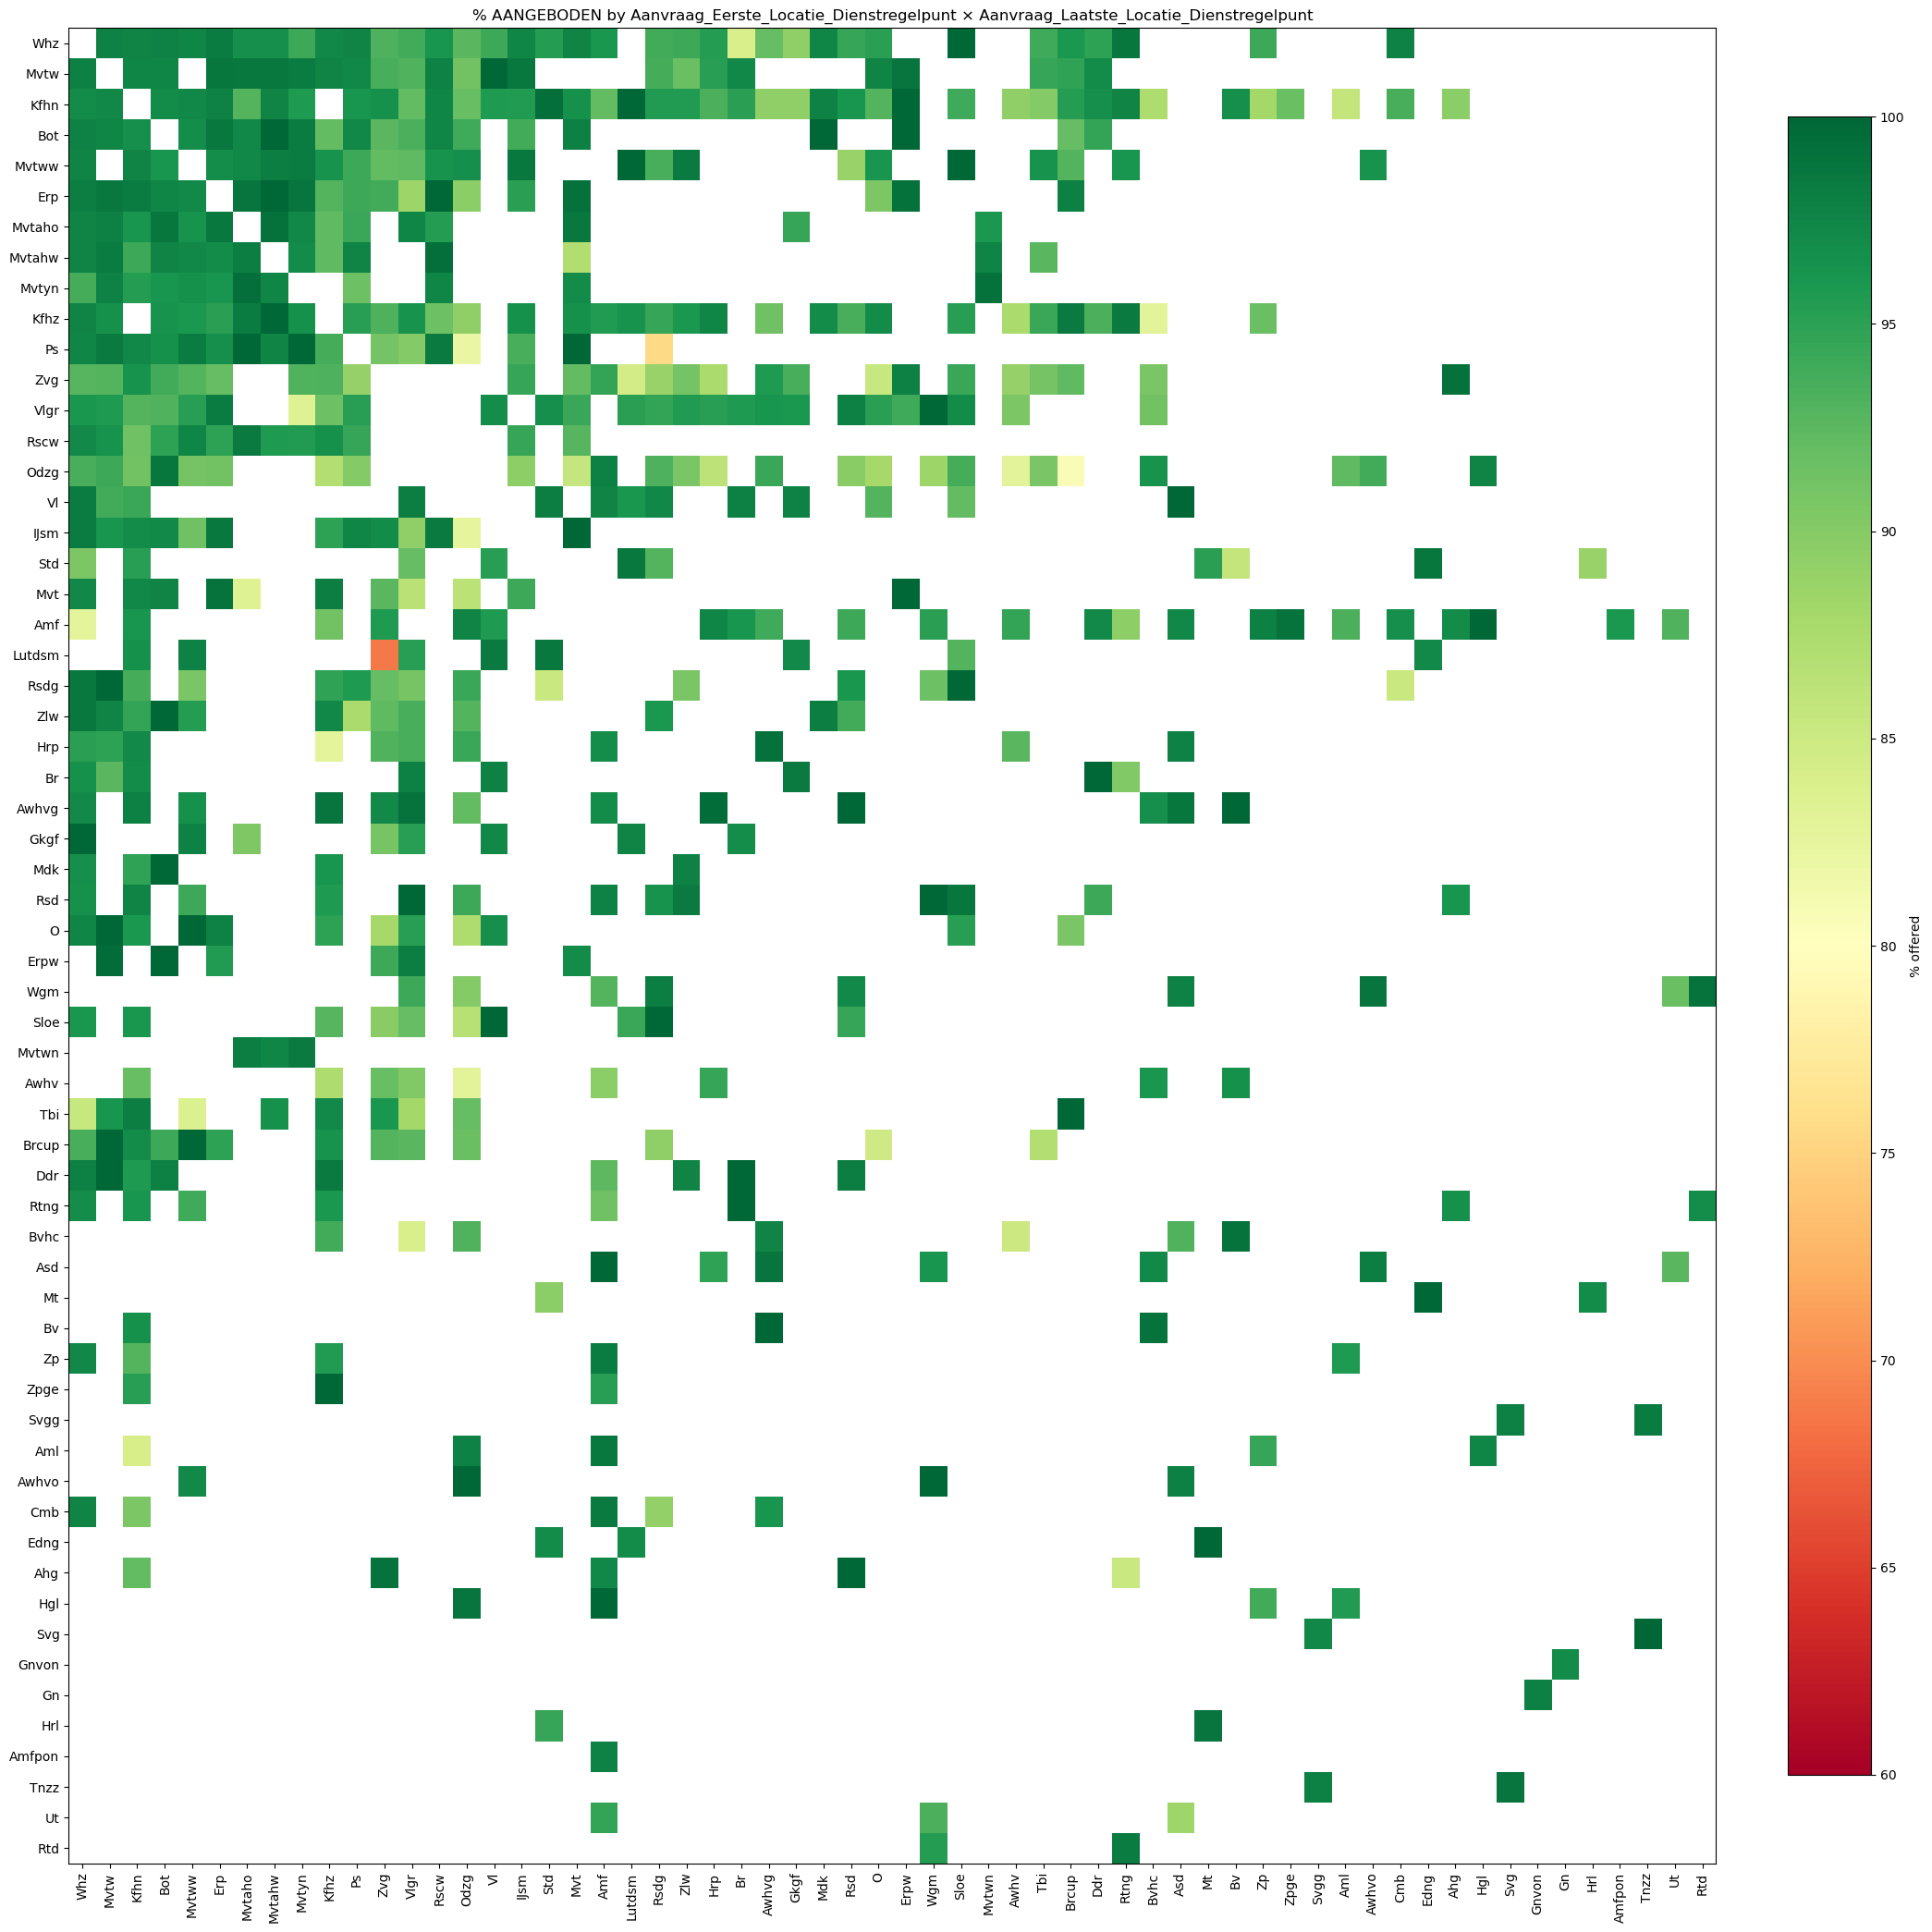

[OK] Saved plots_crosscolor_ordered\rate_eerste_x_laatste.png


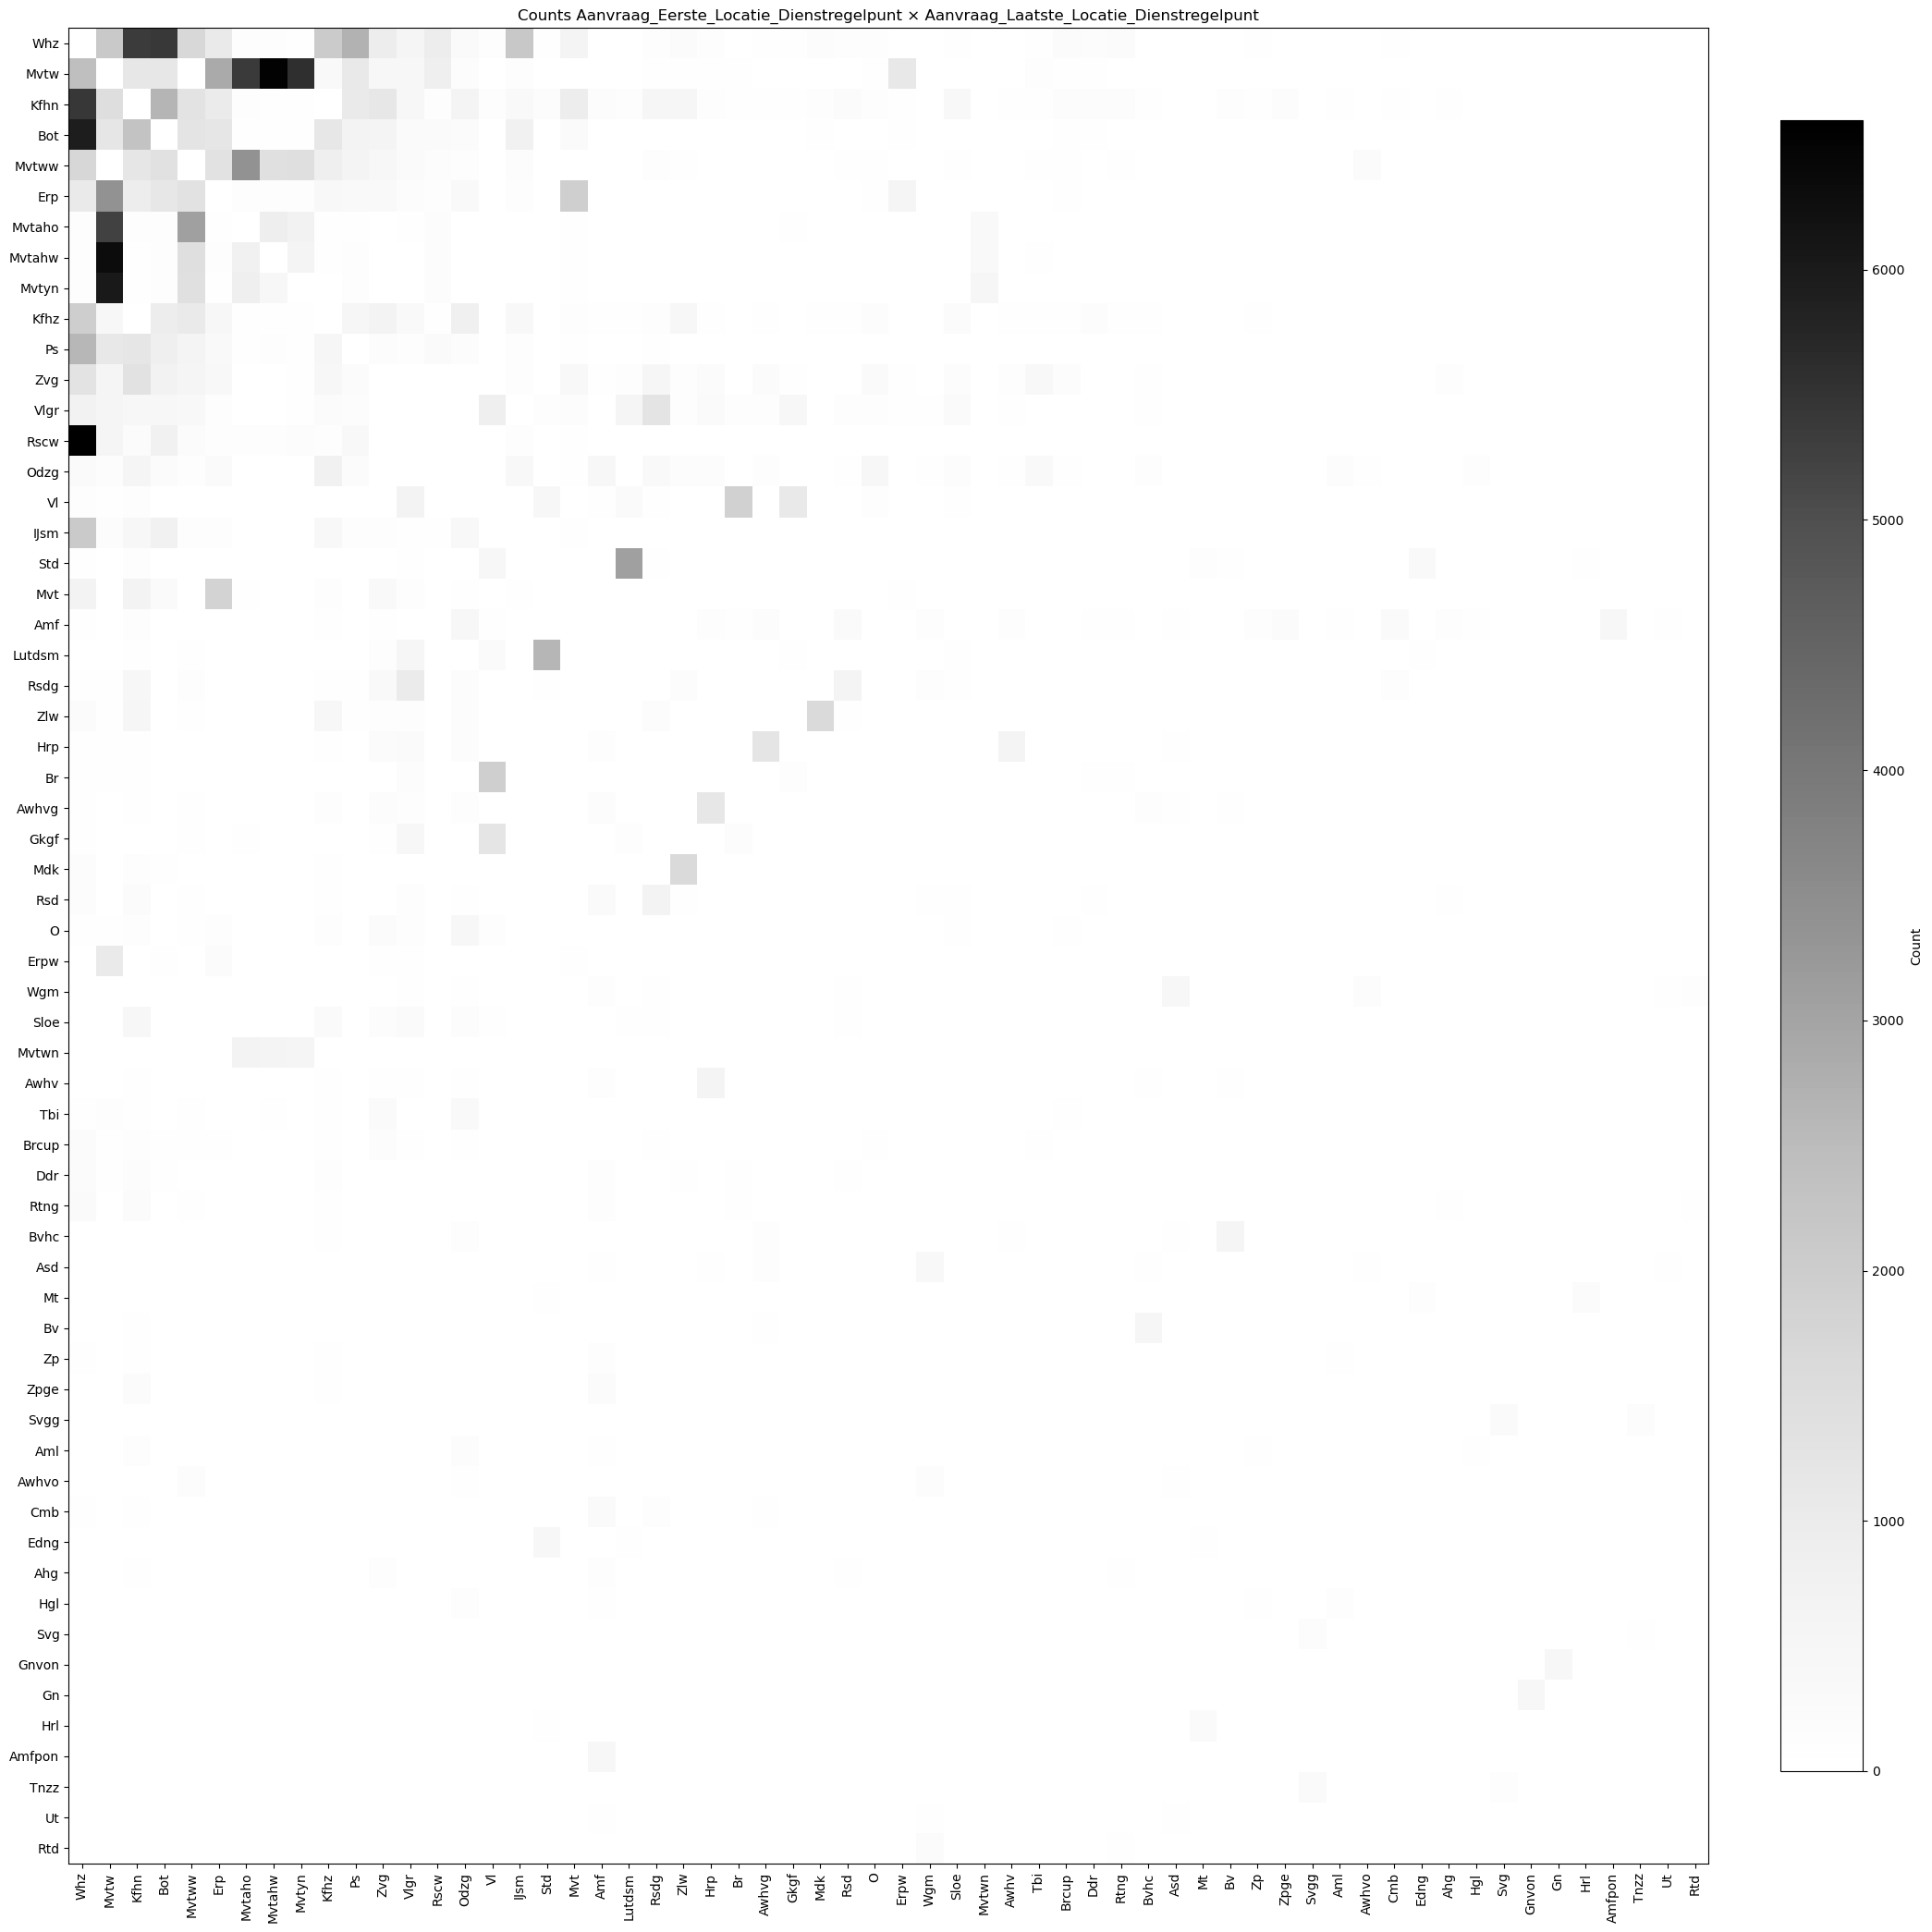

[OK] Saved plots_crosscolor_ordered\counts_eerste_x_laatste.png


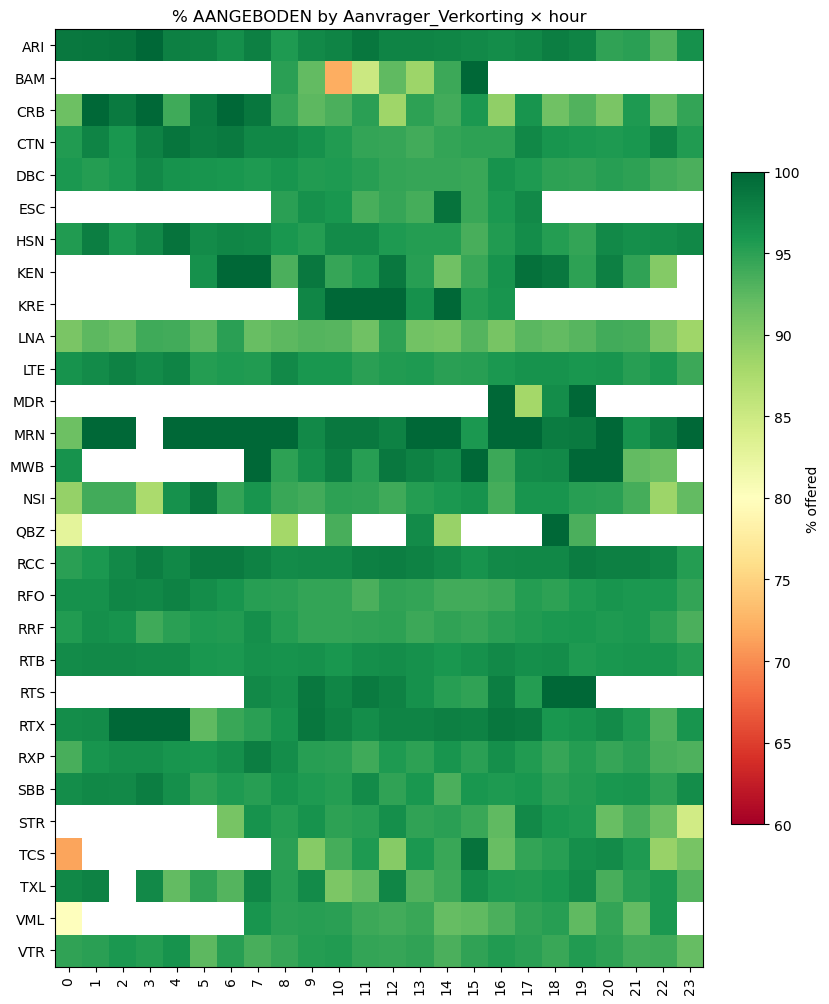

[OK] Saved plots_crosscolor_ordered\rate_operator_x_hour.png


C:\Users\quint\AppData\Local\Temp\ipykernel_9164\150566239.py:82: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = sub.groupby([row_col, col_col, TARGET]).size().rename("n").reset_index()
C:\Users\quint\AppData\Local\Temp\ipykernel_9164\150566239.py:83: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  counts = g.pivot_table(index=row_col, columns=col_col, values="n", aggfunc="sum").fillna(0)
C:\Users\quint\AppData\Local\Temp\ipykernel_9164\150566239.py:87: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retai

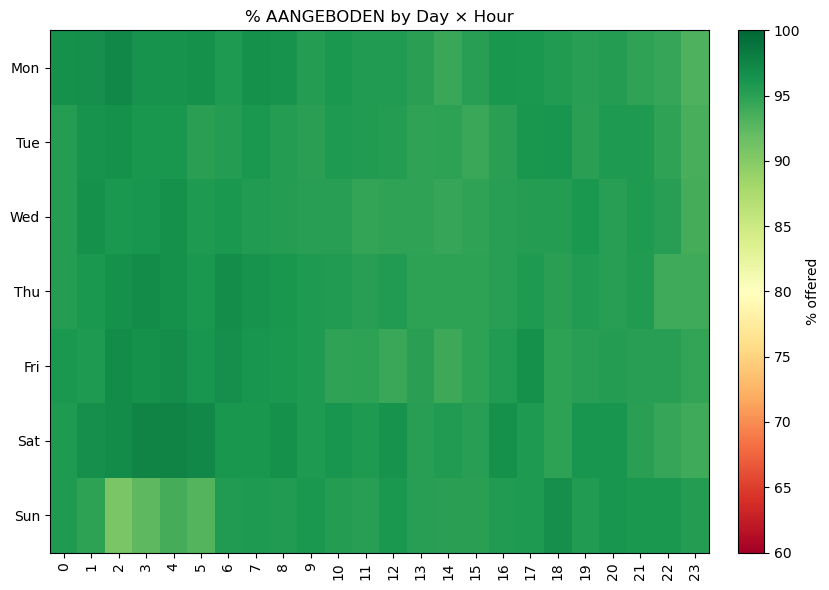

[OK] Saved plots_crosscolor_ordered\rate_day_x_hour.png


C:\Users\quint\AppData\Local\Temp\ipykernel_9164\150566239.py:82: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = sub.groupby([row_col, col_col, TARGET]).size().rename("n").reset_index()
C:\Users\quint\AppData\Local\Temp\ipykernel_9164\150566239.py:83: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  counts = g.pivot_table(index=row_col, columns=col_col, values="n", aggfunc="sum").fillna(0)
C:\Users\quint\AppData\Local\Temp\ipykernel_9164\150566239.py:87: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retai

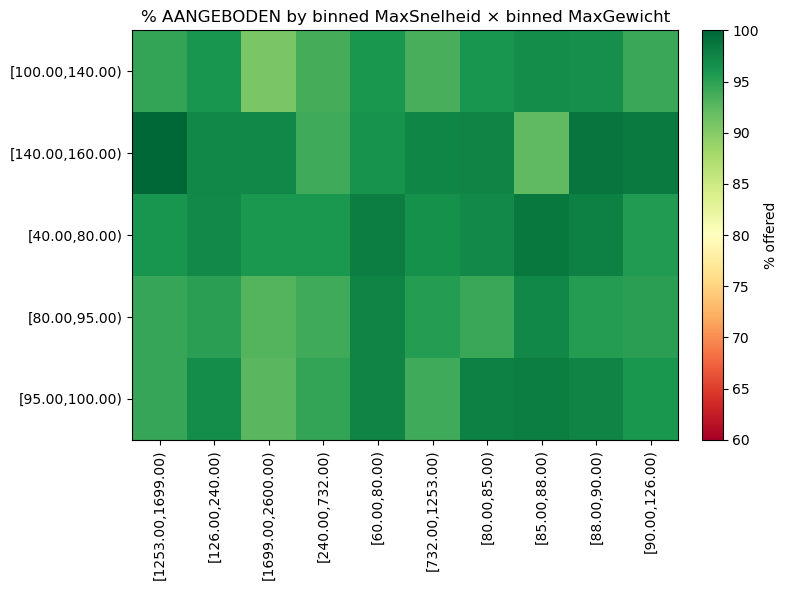

[OK] Saved plots_crosscolor_ordered\rate_bins_MaxSnelheid_x_MaxGewicht.png


C:\Users\quint\AppData\Local\Temp\ipykernel_9164\150566239.py:82: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = sub.groupby([row_col, col_col, TARGET]).size().rename("n").reset_index()
C:\Users\quint\AppData\Local\Temp\ipykernel_9164\150566239.py:83: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  counts = g.pivot_table(index=row_col, columns=col_col, values="n", aggfunc="sum").fillna(0)
C:\Users\quint\AppData\Local\Temp\ipykernel_9164\150566239.py:87: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retai

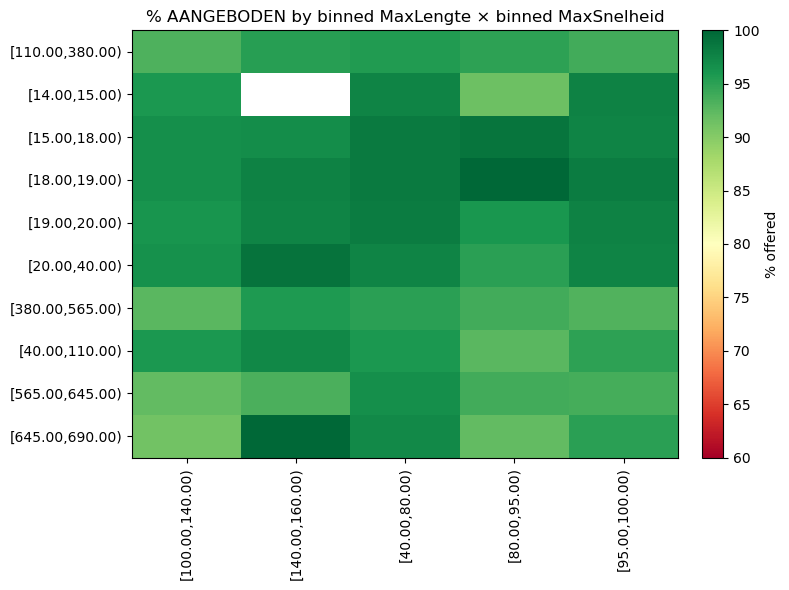

[OK] Saved plots_crosscolor_ordered\rate_bins_MaxLengte_x_MaxSnelheid.png


C:\Users\quint\AppData\Local\Temp\ipykernel_9164\150566239.py:82: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = sub.groupby([row_col, col_col, TARGET]).size().rename("n").reset_index()
C:\Users\quint\AppData\Local\Temp\ipykernel_9164\150566239.py:83: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  counts = g.pivot_table(index=row_col, columns=col_col, values="n", aggfunc="sum").fillna(0)
C:\Users\quint\AppData\Local\Temp\ipykernel_9164\150566239.py:87: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retai

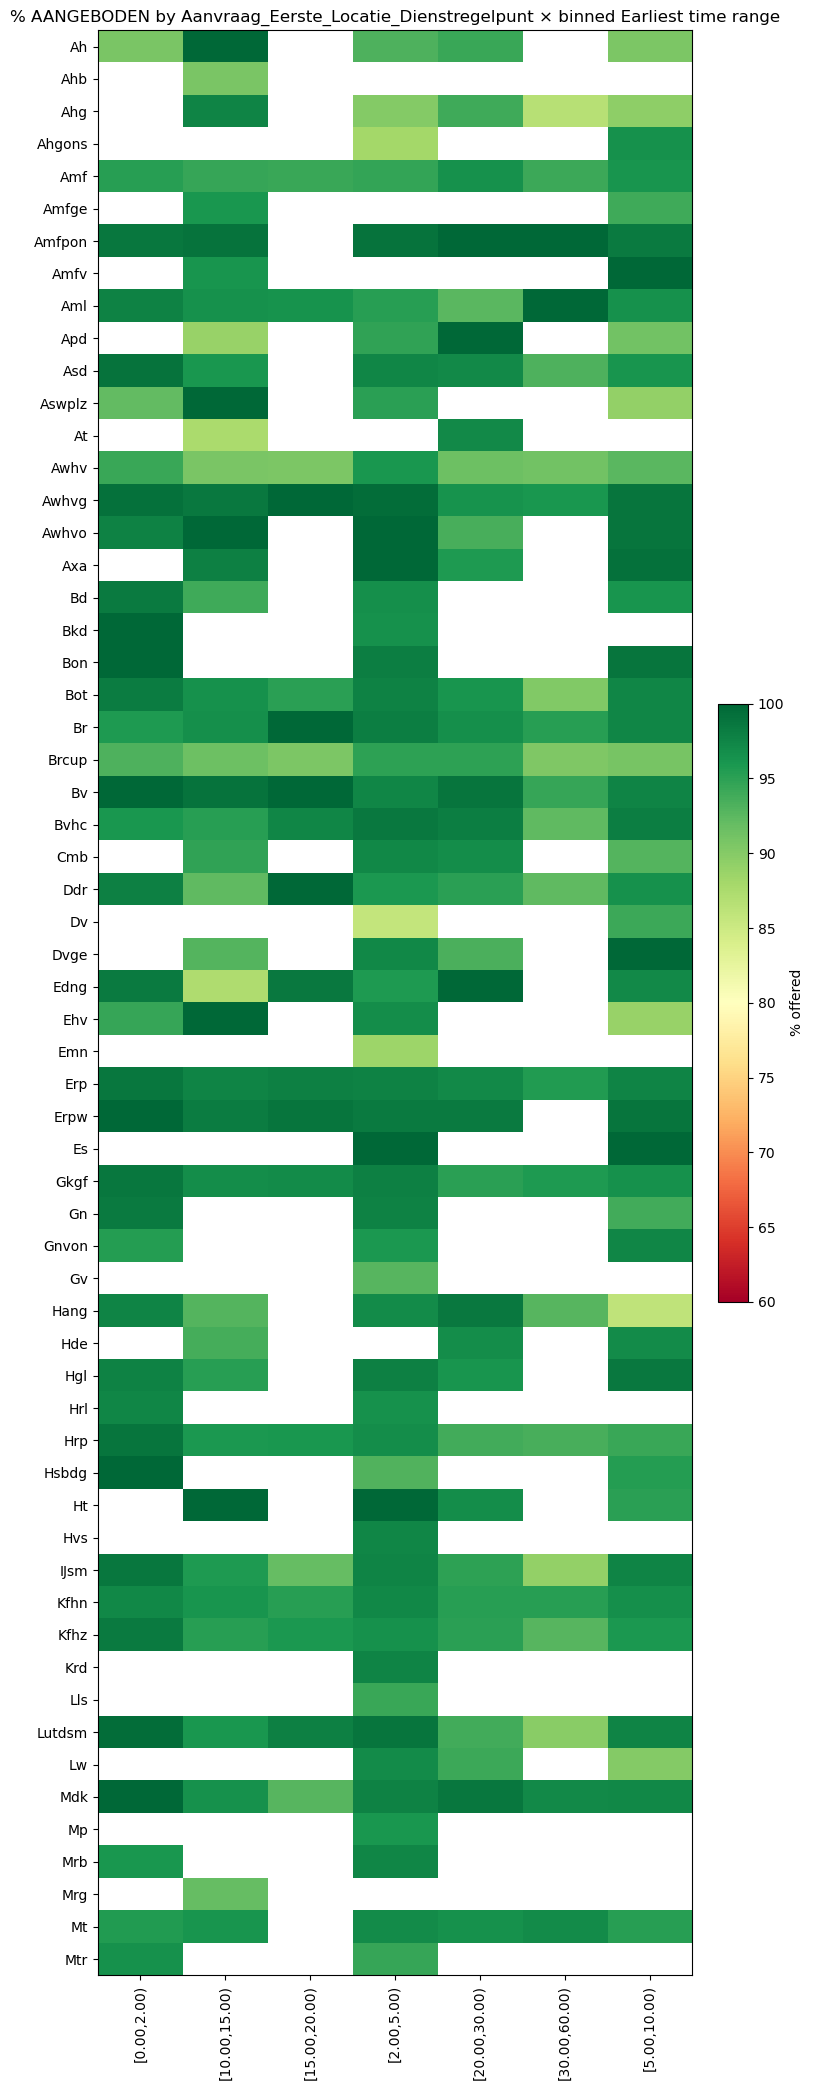

[OK] Saved plots_crosscolor_ordered\rate_eersteLoc_x_binned_timeRange.png

Done. Ordered, color-encoded cross-reference PNGs & CSVs are in: C:\Users\quint\Downloads\plots_crosscolor_ordered


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# =================== CONFIG ===================
FILES   = ["cleaned_dataset_1.csv", "cleaned_dataset_2.csv", "cleaned_dataset_3.csv"]
OUT_DIR = Path("plots_crosscolor_ordered"); OUT_DIR.mkdir(exist_ok=True, parents=True)

TARGET     = "Reactie_type"
POS_LABEL  = "AANGEBODEN"
CMAP       = "RdYlGn"     # green = higher acceptance
RATE_VMIN  = 60.0         # focus on useful band
RATE_VMAX  = 100.0

MIN_CELL_COUNT = 25       # hide very sparse cells
TOP_ROWS   = 60           # cap matrix size for readability (None = all)
TOP_COLS   = 60

NBINS_NUM  = 12           # numeric binning
CLIP_PCT   = (0.01, 0.99) # clip extremes before binning
# ==============================================

# ---------- helpers ----------
def load_concat(files):
    dfs = []
    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
        except UnicodeDecodeError:
            df = pd.read_csv(f, low_memory=False, encoding="latin1")
        df[TARGET] = df[TARGET].astype(str).str.strip()
        dfs.append(df)
    return pd.concat(dfs, ignore_index=True)

def find_col(df, candidates):
    low = {c.lower(): c for c in df.columns}
    for c in candidates:
        if c.lower() in low:
            return low[c.lower()]
    return None

def ensure_time_features(df):
    col = find_col(df, ["Aanvraag_Indienmoment"])
    if not col: return df
    dt = pd.to_datetime(df[col], errors="coerce")
    df["_req_hour"] = dt.dt.hour
    df["_req_dow"]  = dt.dt.dayofweek
    df["_req_day"]  = pd.Categorical(
        df["_req_dow"].map({0:"Mon",1:"Tue",2:"Wed",3:"Thu",4:"Fri",5:"Sat",6:"Sun"}),
        categories=["Mon","Tue","Wed","Thu","Fri","Sat","Sun"], ordered=True
    )
    return df

def qbin_numeric(series, nbins=NBINS_NUM, clip_pct=CLIP_PCT):
    """Return ordered Categorical bins (preserve numeric order)."""
    s = pd.to_numeric(series, errors="coerce").replace([np.inf, -np.inf], np.nan).dropna()
    if s.empty:
        return pd.Series(pd.Categorical([]), index=series.index)
    if clip_pct:
        s = s.clip(lower=s.quantile(clip_pct[0]), upper=s.quantile(clip_pct[1]))
    try:
        cats, edges = pd.qcut(s, q=nbins, retbins=True, duplicates="drop")
    except ValueError:
        edges = np.linspace(s.min(), s.max(), nbins+1)
        cats = pd.cut(s, bins=edges, include_lowest=True, right=False)
    labels = [f"[{edges[i]:.2f},{edges[i+1]:.2f})" for i in range(len(edges)-1)]
    cats = pd.Categorical(cats, ordered=True)
    cats = cats.rename_categories(labels)  # ordered labels in numeric order
    out = pd.Series(index=series.index, dtype="object")
    out.loc[s.index] = cats
    return out.astype("category")

def build_rate_and_counts(df, row_col, col_col, min_cell=MIN_CELL_COUNT,
                          row_order=None, col_order=None,
                          top_rows=TOP_ROWS, top_cols=TOP_COLS):
    """Return (rate %, counts) with ordering & trimming applied."""
    sub = df[[row_col, col_col, TARGET]].dropna()
    if sub.empty: return None, None

    # counts per (row, col, class)
    g = sub.groupby([row_col, col_col, TARGET]).size().rename("n").reset_index()
    counts = g.pivot_table(index=row_col, columns=col_col, values="n", aggfunc="sum").fillna(0)

    # offered-only counts aligned to counts
    offered = g[g[TARGET].str.upper() == POS_LABEL] \
                .pivot_table(index=row_col, columns=col_col, values="n", aggfunc="sum") \
                .reindex_like(counts).fillna(0)

    # apply explicit orders if provided
    if row_order is not None:
        counts  = counts.reindex(row_order, axis=0)
        offered = offered.reindex(row_order, axis=0)
    if col_order is not None:
        counts  = counts.reindex(col_order, axis=1)
        offered = offered.reindex(col_order, axis=1)

    # compute rate with min-cell masking
    with np.errstate(divide='ignore', invalid='ignore'):
        rate = np.where(counts.values > 0, 100.0 * offered.values / counts.values, np.nan)
    mask_keep = counts.values >= min_cell
    rate = np.where(mask_keep, rate, np.nan)
    rate = pd.DataFrame(rate, index=counts.index, columns=counts.columns)

    # drop empty rows/cols (all nan)
    keep_rows = ~np.isnan(rate).all(axis=1)
    keep_cols = ~np.isnan(rate).all(axis=0)
    rate   = rate.loc[keep_rows, keep_cols]
    counts = counts.loc[keep_rows, keep_cols]

    # trim size after ordering
    if top_rows: 
        rate   = rate.iloc[:top_rows, :]
        counts = counts.iloc[:top_rows, :]
    if top_cols:
        rate   = rate.iloc[:, :top_cols]
        counts = counts.iloc[:, :top_cols]

    return rate, counts

def plot_heatmap(table: pd.DataFrame, title: str, colorbar_label: str, outfile: str,
                 cmap=CMAP, vmin=None, vmax=None, clip=False):
    if table is None or table.empty:
        print(f"[WARN] Empty heatmap for {title}"); return
    data = table.values.astype(float)
    if clip and vmin is not None and vmax is not None:
        data = np.clip(data, vmin, vmax)

    h, w = data.shape
    plt.figure(figsize=(max(8, 0.35*w), max(6, 0.35*h)))
    im = plt.imshow(data, aspect="auto", interpolation="nearest",
                    cmap=cmap, vmin=vmin, vmax=vmax)
    cb = plt.colorbar(im, fraction=0.046, pad=0.04); cb.set_label(colorbar_label)
    plt.xticks(np.arange(w), table.columns.astype(str), rotation=90)
    plt.yticks(np.arange(h), table.index.astype(str))
    plt.title(title)
    plt.tight_layout()
    out = OUT_DIR / outfile
    plt.savefig(out, dpi=150); plt.show()
    print(f"[OK] Saved {out}")

# ---------- load & prep ----------
df = load_concat(FILES)
df = ensure_time_features(df)

# locate columns
col_eerste = find_col(df, ["Aanvraag_Eerste_Locatie_Dienstregelpunt"])
col_laatste = find_col(df, ["Aanvraag_Laatste_Locatie_Dienstregelpunt"])
col_operator = find_col(df, ["Aanvrager_Verkorting", "Aanvraag_vervoerder_verkorting"])
col_maxlen = find_col(df, ["Aanvraag_Eerste_Locatie_MaxLengte"])
col_maxspd = find_col(df, ["Aanvraag_Eerste_Locatie_MaxSnelheid"])
col_maxwgt = find_col(df, ["Aanvraag_Eerste_Locatie_MaxGewicht"])
col_tr_ear = find_col(df, ["Aanvraag_time_range_Eerste_Locatie_Vertrektijd"])

# ---------- A) Eerste × Laatste: SAME ORDER ON BOTH AXES ----------
if col_eerste and col_laatste:
    # global frequency across both columns → one consistent order for both axes
    locs = pd.concat([df[col_eerste].dropna().astype(str),
                      df[col_laatste].dropna().astype(str)])
    order_global = (locs.value_counts()).index.tolist()

    rate, counts = build_rate_and_counts(
        df.astype({col_eerste:str, col_laatste:str}, errors="ignore"),
        row_col=col_eerste, col_col=col_laatste,
        row_order=order_global, col_order=order_global
    )
    if rate is not None:
        rate.to_csv(OUT_DIR / "rate_eerste_x_laatste_ordered.csv")
        counts.to_csv(OUT_DIR / "counts_eerste_x_laatste_ordered.csv")
        plot_heatmap(rate, f"% AANGEBODEN by {col_eerste} × {col_laatste}",
                     "% offered", "rate_eerste_x_laatste.png",
                     cmap=CMAP, vmin=RATE_VMIN, vmax=RATE_VMAX, clip=True)
        plot_heatmap(counts, f"Counts {col_eerste} × {col_laatste}",
                     "Count", "counts_eerste_x_laatste.png",
                     cmap="Greys", vmin=None, vmax=None, clip=False)
else:
    print("[WARN] Missing Eerste/Laatste location columns.")

# ---------- B) Operator × Hour: hours in natural order 0..23 ----------
if col_operator and "_req_hour" in df.columns:
    d = df.dropna(subset=["_req_hour"]).copy()
    d["_req_hour"] = d["_req_hour"].astype(int)
    hour_order = list(range(24))
    rate, counts = build_rate_and_counts(d, col_operator, "_req_hour",
                                         row_order=None, col_order=hour_order)
    if rate is not None:
        rate.to_csv(OUT_DIR / "rate_operator_x_hour.csv")
        plot_heatmap(rate, f"% AANGEBODEN by {col_operator} × hour",
                     "% offered", "rate_operator_x_hour.png",
                     cmap=CMAP, vmin=RATE_VMIN, vmax=RATE_VMAX, clip=True)

# ---------- C) Day × Hour: days Mon..Sun, hours 0..23 ----------
if "_req_day" in df.columns and "_req_hour" in df.columns:
    d = df.dropna(subset=["_req_day","_req_hour"]).copy()
    d["_req_hour"] = d["_req_hour"].astype(int)
    day_order  = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
    hour_order = list(range(24))
    rate, counts = build_rate_and_counts(d, "_req_day", "_req_hour",
                                         row_order=day_order, col_order=hour_order)
    if rate is not None:
        rate.to_csv(OUT_DIR / "rate_day_x_hour.csv")
        plot_heatmap(rate, "% AANGEBODEN by Day × Hour",
                     "% offered", "rate_day_x_hour.png",
                     cmap=CMAP, vmin=RATE_VMIN, vmax=RATE_VMAX, clip=True)

# ---------- D) Numeric × Numeric: MaxSnelheid × MaxGewicht (bins in numeric order) ----------
if col_maxspd and col_maxwgt:
    bx = qbin_numeric(df[col_maxspd], NBINS_NUM)
    by = qbin_numeric(df[col_maxwgt], NBINS_NUM)
    d = df.assign(_bx=bx, _by=by).dropna(subset=["_bx","_by"])
    row_order = [str(c) for c in pd.Categorical(bx.dropna()).categories]
    col_order = [str(c) for c in pd.Categorical(by.dropna()).categories]
    rate, counts = build_rate_and_counts(d, "_bx", "_by",
                                         row_order=row_order, col_order=col_order)
    if rate is not None:
        rate.to_csv(OUT_DIR / "rate_bins_MaxSnelheid_x_MaxGewicht.csv")
        plot_heatmap(rate, "% AANGEBODEN by binned MaxSnelheid × binned MaxGewicht",
                     "% offered", "rate_bins_MaxSnelheid_x_MaxGewicht.png",
                     cmap=CMAP, vmin=RATE_VMIN, vmax=RATE_VMAX, clip=True)

# ---------- E) Numeric × Numeric: MaxLengte × MaxSnelheid ----------
if col_maxlen and col_maxspd:
    bx = qbin_numeric(df[col_maxlen], NBINS_NUM)
    by = qbin_numeric(df[col_maxspd], NBINS_NUM)
    d = df.assign(_bx=bx, _by=by).dropna(subset=["_bx","_by"])
    row_order = [str(c) for c in pd.Categorical(bx.dropna()).categories]
    col_order = [str(c) for c in pd.Categorical(by.dropna()).categories]
    rate, counts = build_rate_and_counts(d, "_bx", "_by",
                                         row_order=row_order, col_order=col_order)
    if rate is not None:
        rate.to_csv(OUT_DIR / "rate_bins_MaxLengte_x_MaxSnelheid.csv")
        plot_heatmap(rate, "% AANGEBODEN by binned MaxLengte × binned MaxSnelheid",
                     "% offered", "rate_bins_MaxLengte_x_MaxSnelheid.png",
                     cmap=CMAP, vmin=RATE_VMIN, vmax=RATE_VMAX, clip=True)

# ---------- F) Categorical × Numeric: Eerste Locatie × Earliest time range (bins ordered) ----------
if col_eerste and col_tr_ear:
    b = qbin_numeric(df[col_tr_ear], NBINS_NUM)
    d = df.assign(_b=b).dropna(subset=[col_eerste, "_b"])
    col_order = [str(c) for c in pd.Categorical(b.dropna()).categories]
    rate, counts = build_rate_and_counts(d, col_eerste, "_b",
                                         row_order=None, col_order=col_order)
    if rate is not None:
        rate.to_csv(OUT_DIR / "rate_eersteLoc_x_binned_timeRange.csv")
        plot_heatmap(rate, f"% AANGEBODEN by {col_eerste} × binned Earliest time range",
                     "% offered", "rate_eersteLoc_x_binned_timeRange.png",
                     cmap=CMAP, vmin=RATE_VMIN, vmax=RATE_VMAX, clip=True)

print("\nDone. Ordered, color-encoded cross-reference PNGs & CSVs are in:", OUT_DIR.resolve())


[WARN] No operators meet MIN_OP_COUNT=5 for Requested departure window vs offered time — per operator (100% normalized)


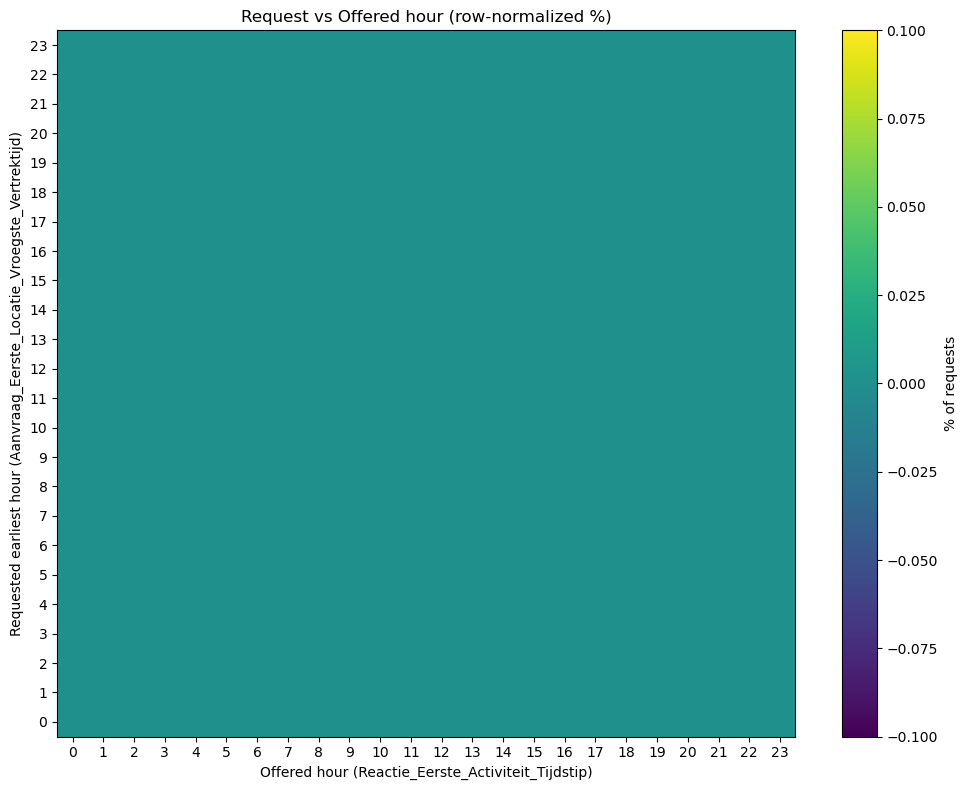

[OK] Saved plots_match\heatmap_request_vs_offered_hour.png
[INFO] No enough rows with both routes to plot route similarity by operator.
[WARN] No operators meet MIN_OP_COUNT=5 for Endpoint match (origin+destination) — per operator (100% normalized)


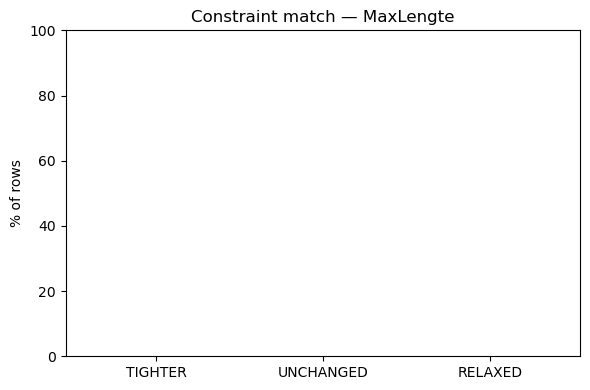

[OK] Saved plots_match\constraints_maxlengte.png


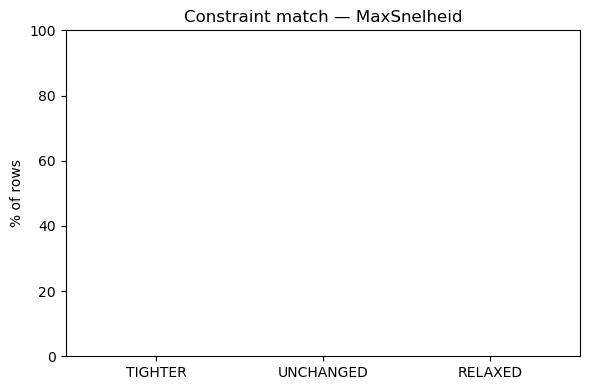

[OK] Saved plots_match\constraints_maxsnelheid.png


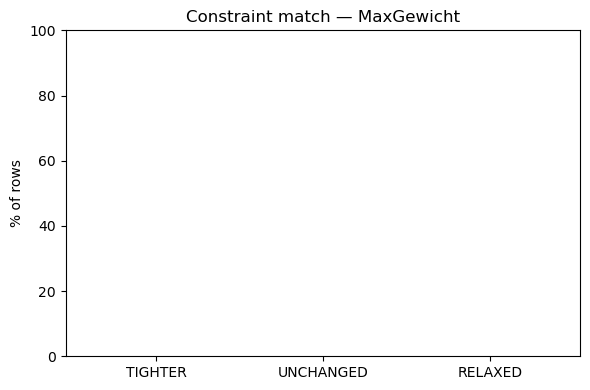

[OK] Saved plots_match\constraints_maxgewicht.png
Operators seen (any section): 0
  time-window samples: 0
  route-sim rows: 0
  endpoint total: 0
  constraints counts: {'MaxLengte': 0, 'MaxSnelheid': 0, 'MaxGewicht': 0}
Hour matrix total pairs: 0


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import re
from collections import defaultdict, Counter

# ---------------- CONFIG ----------------
IN_FILE = "sherlock-export-cm-orders_dag-2022-12-11-2025-09-08.csv"  # raw export
OUT_DIR = Path("plots_match"); OUT_DIR.mkdir(exist_ok=True, parents=True)
SEP = ","          # adjust if needed
ENCODINGS = [None, "latin1"]
CHUNK = 200_000
MIN_OP_COUNT = 5   # min rows per operator to plot in normalized charts
TOP_N_OPS = 50       # show top N operators by volume
# ---------------------------------------

# ---- helpers ----
def find_col(cols, candidates):
    low = {c.lower(): c for c in cols}
    for c in candidates:
        if c.lower() in low:
            return low[c.lower()]
    return None

def parse_time_to_min(s):
    """Return minutes since midnight for HH:MM[:SS] strings, NaN if not parseable."""
    if pd.isna(s): return np.nan
    txt = str(s).strip()
    m = re.search(r"(\d{1,2}):(\d{2})(?::(\d{2}))?$", txt)
    if not m: return np.nan
    h = int(m.group(1)); mi = int(m.group(2))
    if h<0 or h>23 or mi<0 or mi>59: return np.nan
    return h*60 + mi

def within_window(resp, earliest, latest):
    """Check if resp (min) within [earliest, latest] in clock time, handling wrap-around."""
    if np.isnan(resp) or np.isnan(earliest) or np.isnan(latest):
        return np.nan
    if earliest <= latest:
        return float(earliest <= resp <= latest)
    else:
        # window crosses midnight
        return float(resp >= earliest or resp <= latest)

def minutes_outside_window(resp, earliest, latest):
    """0 if within window; else minimal absolute minutes to nearest edge, handling wrap-around."""
    if np.isnan(resp) or np.isnan(earliest) or np.isnan(latest):
        return np.nan
    if within_window(resp, earliest, latest) == 1.0:
        return 0.0
    # compute minimal distance around the 24h circle to either edge
    def circ_dist(a, b):
        d = abs(a - b) % (24*60)
        return min(d, 24*60 - d)
    return float(min(circ_dist(resp, earliest), circ_dist(resp, latest)))

def tokenize_route(s):
    """Tokenize routelint into set of station codes (alnum)."""
    if pd.isna(s): return set()
    toks = re.split(r"[^A-Za-z0-9]+", str(s))
    return set(t for t in toks if t)

def jaccard(a, b):
    if not a or not b: return np.nan
    inter = len(a & b)
    union = len(a | b)
    return inter / union if union else np.nan

# Aggregators (same as before)
op_counts = Counter()
op_time_within = Counter()
op_time_outside = Counter()
op_time_delta_sum = Counter()

op_route_sum = Counter()
op_route_n = Counter()

op_endpoints_match = Counter()
op_endpoints_total = Counter()

hour_matrix = np.zeros((24, 24), dtype=np.int64)

constraints_counters = {"MaxLengte": Counter(), "MaxSnelheid": Counter(), "MaxGewicht": Counter()}
constraints_by_op = {"MaxLengte": defaultdict(Counter),
                     "MaxSnelheid": defaultdict(Counter),
                     "MaxGewicht": defaultdict(Counter)}

NEEDED = [
    "Aanvrager_Verkorting", "Aanvraag_vervoerder_verkorting",
    "Aanvraag_Eerste_Locatie_Vroegste_Vertrektijd",
    "Aanvraag_Eerste_Locatie_Laatste_Vertrektijd",
    "Aanvraag_Eerste_Locatie_Dienstregelpunt",
    "Aanvraag_Laatste_Locatie_Dienstregelpunt",
    "Aanvraag_Routelint",
    "Aanvraag_Eerste_Locatie_MaxLengte",
    "Aanvraag_Eerste_Locatie_MaxSnelheid",
    "Aanvraag_Eerste_Locatie_MaxGewicht",
    "Reactie_Eerste_Activiteit_Tijdstip",
    "Reactie_Laatste_Activiteit_Tijdstip",
    "Reactie_Eerste_Activiteit_Dienstregelpunt",
    "Reactie_Laatste_Activiteit_Dienstregelpunt",
    "Reactie_Routelint",
    "Reactie_Eerste_Activiteit_MaxLengte",
    "Reactie_Eerste_Activiteit_MaxSnelheid",
    "Reactie_Eerste_Activiteit_MaxGewicht",
    "Reactie_type"
]

def process_chunk(chunk: pd.DataFrame):
    # Resolve operator column (optional; if missing, label UNKNOWN)
    op_col = find_col(chunk.columns, ["Aanvrager_Verkorting", "Aanvraag_vervoerder_verkorting"])
    if op_col is None:
        ops = pd.Series(["UNKNOWN"] * len(chunk))
    else:
        ops = chunk[op_col].astype(str).str.strip().fillna("UNKNOWN")

    # ---- TIME WINDOW & HEATMAP ----
    earl_col = find_col(chunk.columns, ["Aanvraag_Eerste_Locatie_Vroegste_Vertrektijd"])
    late_col = find_col(chunk.columns, ["Aanvraag_Eerste_Locatie_Laatste_Vertrektijd"])
    resp_time_col = find_col(chunk.columns, ["Reactie_Eerste_Activiteit_Tijdstip"])
    if earl_col and late_col and resp_time_col:
        earl = chunk[earl_col].apply(parse_time_to_min)
        late = chunk[late_col].apply(parse_time_to_min)
        resp = chunk[resp_time_col].apply(parse_time_to_min)

        # heatmap: request hour vs offered hour
        req_hr = np.floor_divide(earl.fillna(-1).astype(int), 60)
        rsp_hr = np.floor_divide(resp.fillna(-1).astype(int), 60)
        mask_hr = (req_hr >= 0) & (req_hr < 24) & (rsp_hr >= 0) & (rsp_hr < 24)
        if mask_hr.any():
            for r, s in zip(req_hr[mask_hr], rsp_hr[mask_hr]):
                hour_matrix[int(r), int(s)] += 1

        # window match/outside + distance
        w = [within_window(r, e, l) for r, e, l in zip(resp.values, earl.values, late.values)]
        d = [minutes_outside_window(r, e, l) for r, e, l in zip(resp.values, earl.values, late.values)]
        for o, flag, delta in zip(ops, w, d):
            if np.isnan(flag):
                continue
            op_counts[o] += 1
            if flag == 1.0:
                op_time_within[o] += 1
            else:
                op_time_outside[o] += 1
                if not np.isnan(delta):
                    op_time_delta_sum[o] += float(delta)

    # ---- ROUTE SIMILARITY (Jaccard) ----
    req_route = find_col(chunk.columns, ["Aanvraag_Routelint"])
    rsp_route = find_col(chunk.columns, ["Reactie_Routelint"])
    if req_route and rsp_route:
        for o, a, b in zip(ops, chunk[req_route], chunk[rsp_route]):
            A, B = tokenize_route(a), tokenize_route(b)
            sim = jaccard(A, B)
            if not np.isnan(sim):
                op_route_sum[o] += sim
                op_route_n[o] += 1

    # ---- ENDPOINTS MATCH ----
    req_orig = find_col(chunk.columns, ["Aanvraag_Eerste_Locatie_Dienstregelpunt"])
    req_dest = find_col(chunk.columns, ["Aanvraag_Laatste_Locatie_Dienstregelpunt"])
    rsp_orig = find_col(chunk.columns, ["Reactie_Eerste_Activiteit_Dienstregelpunt"])
    rsp_dest = find_col(chunk.columns, ["Reactie_Laatste_Activiteit_Dienstregelpunt"])
    if req_orig and req_dest and rsp_orig:
        rqO = chunk[req_orig].astype(str).str.strip()
        rqD = chunk[req_dest].astype(str).str.strip()
        rsO = chunk[rsp_orig].astype(str).str.strip()
        # rsp_dest optional
        rsD = chunk[rsp_dest].astype(str).str.strip() if (rsp_dest and rsp_dest in chunk.columns) else pd.Series([""] * len(chunk))
        match = (rqO == rsO) & (rqD == rsD)
        for o, m in zip(ops, match):
            op_endpoints_total[o] += 1
            if bool(m):
                op_endpoints_match[o] += 1

    # ---- CONSTRAINTS MATCH ----
    def compare(req, rsp):
        try:
            a = float(req); b = float(rsp)
        except Exception:
            return None
        if np.isnan(a) or np.isnan(b):
            return None
        if np.isclose(a, b, atol=1e-6):
            return "UNCHANGED"
        return "TIGHTER" if b < a else "RELAXED"

    req_len = find_col(chunk.columns, ["Aanvraag_Eerste_Locatie_MaxLengte"])
    req_spd = find_col(chunk.columns, ["Aanvraag_Eerste_Locatie_MaxSnelheid"])
    req_wgt = find_col(chunk.columns, ["Aanvraag_Eerste_Locatie_MaxGewicht"])
    rsp_len = find_col(chunk.columns, ["Reactie_Eerste_Activiteit_MaxLengte"])
    rsp_spd = find_col(chunk.columns, ["Reactie_Eerste_Activiteit_MaxSnelheid"])
    rsp_wgt = find_col(chunk.columns, ["Reactie_Eerste_Activiteit_MaxGewicht"])

    if req_len and rsp_len:
        for o, a, b in zip(ops, chunk[req_len], chunk[rsp_len]):
            cat = compare(a, b)
            if cat:
                constraints_counters["MaxLengte"][cat] += 1
                constraints_by_op["MaxLengte"][o][cat] += 1

    if req_spd and rsp_spd:
        for o, a, b in zip(ops, chunk[req_spd], chunk[rsp_spd]):
            cat = compare(a, b)
            if cat:
                constraints_counters["MaxSnelheid"][cat] += 1
                constraints_by_op["MaxSnelheid"][o][cat] += 1

    if req_wgt and rsp_wgt:
        for o, a, b in zip(ops, chunk[req_wgt], chunk[rsp_wgt]):
            cat = compare(a, b)
            if cat:
                constraints_counters["MaxGewicht"][cat] += 1
                constraints_by_op["MaxGewicht"][o][cat] += 1

# ---- stream the file robustly (encoding fallback) ----
read_ok = False
for enc in [None, "latin1"]:
    try:
        for chunk in pd.read_csv(IN_FILE, sep=SEP, chunksize=CHUNK, low_memory=True,
                                 encoding=enc, on_bad_lines="skip"):
            # optional: reduce columns early to speed up
            # case-insensitive keep of required columns
            needed_lower = {n.lower() for n in NEEDED}
            keep_cols = [c for c in chunk.columns if c.lower() in needed_lower]
            if keep_cols:
                chunk = chunk[keep_cols]
        read_ok = True
        break
    except Exception as e:
        print(f"[WARN] read failed with encoding={enc}: {e}")
        continue

if not read_ok:
    raise RuntimeError("Failed to stream the CSV with tried encodings.")
# ---------------- PLOTS ----------------

# Helper: normalized stacked bar (operators)
def plot_norm_stacked_ops(pos_counts, neg_counts, title, outfile, label_pos, label_neg):
    # Build table
    ops = [op for op, n in op_counts.items() if n >= MIN_OP_COUNT]
    ops_sorted = sorted(ops, key=lambda o: pos_counts[o]/max(1, (pos_counts[o]+neg_counts[o])), reverse=True)
    if TOP_N_OPS:
        ops_sorted = ops_sorted[:TOP_N_OPS]
    if not ops_sorted:
        print(f"[WARN] No operators meet MIN_OP_COUNT={MIN_OP_COUNT} for {title}")
        return

    pos = np.array([pos_counts[o] for o in ops_sorted], dtype=float)
    neg = np.array([neg_counts[o] for o in ops_sorted], dtype=float)
    denom = pos + neg
    pct_pos = np.divide(pos, denom, out=np.zeros_like(pos), where=denom>0) * 100
    pct_neg = np.divide(neg, denom, out=np.zeros_like(neg), where=denom>0) * 100

    plt.figure(figsize=(12, max(6, 0.35*len(ops_sorted))))
    y = np.arange(len(ops_sorted))
    plt.barh(y, pct_neg, label=label_neg, color="#C62828")
    plt.barh(y, pct_pos, left=pct_neg, label=label_pos, color="#2E7D32")
    plt.xlim(0, 100)
    plt.yticks(y, ops_sorted)
    plt.xlabel("Percentage of requests")
    plt.title(title)
    plt.legend(loc="lower right")
    plt.tight_layout()
    out = OUT_DIR / outfile
    plt.savefig(out, dpi=150)
    plt.show()
    print(f"[OK] Saved {out}")

# 1) Time window match per operator
plot_norm_stacked_ops(
    pos_counts=op_time_within,
    neg_counts=op_time_outside,
    title="Requested departure window vs offered time — per operator (100% normalized)",
    outfile="time_window_match_by_operator.png",
    label_pos="Within window",
    label_neg="Outside window"
)

# 2) Request hour vs Offered hour heatmap (row-normalized)
mat = hour_matrix.astype(float)
row_sums = mat.sum(axis=1, keepdims=True)
row_sums[row_sums == 0] = 1.0
mat_pct = (mat / row_sums) * 100.0

plt.figure(figsize=(10, 8))
plt.imshow(mat_pct, aspect="auto", origin="lower", cmap="viridis")  # rows=request hour, cols=offered hour
plt.colorbar(label="% of requests")
plt.xticks(range(24), range(24)); plt.yticks(range(24), range(24))
plt.xlabel("Offered hour (Reactie_Eerste_Activiteit_Tijdstip)")
plt.ylabel("Requested earliest hour (Aanvraag_Eerste_Locatie_Vroegste_Vertrektijd)")
plt.title("Request vs Offered hour (row-normalized %)")
plt.tight_layout()
out = OUT_DIR / "heatmap_request_vs_offered_hour.png"
plt.savefig(out, dpi=150); plt.show()
print(f"[OK] Saved {out}")

# 3) Route similarity per operator (mean Jaccard)
route_ops = [o for o, n in op_route_n.items() if n >= MIN_OP_COUNT]
if route_ops:
    means = [(o, op_route_sum[o]/op_route_n[o]) for o in route_ops if op_route_n[o] > 0]
    means.sort(key=lambda t: t[1], reverse=True)
    ops_plot = [o for o,_ in means[:TOP_N_OPS]] if TOP_N_OPS else [o for o,_ in means]
    vals = [v for _,v in means[:len(ops_plot)]]

    plt.figure(figsize=(12, max(6, 0.35*len(ops_plot))))
    y = np.arange(len(ops_plot))
    plt.barh(y, vals, color="#1565C0")
    plt.xlim(0, 1)
    plt.yticks(y, ops_plot)
    plt.xlabel("Mean Jaccard similarity (route)")
    plt.title("Requested vs Offered route similarity — per operator")
    plt.tight_layout()
    out = OUT_DIR / "route_similarity_by_operator.png"
    plt.savefig(out, dpi=150); plt.show()
    print(f"[OK] Saved {out}")
else:
    print("[INFO] No enough rows with both routes to plot route similarity by operator.")

# 4) Endpoints match per operator (100% normalized)
plot_norm_stacked_ops(
    pos_counts=op_endpoints_match,
    neg_counts=Counter({o: op_endpoints_total[o]-op_endpoints_match[o] for o in op_endpoints_total}),
    title="Endpoint match (origin+destination) — per operator (100% normalized)",
    outfile="endpoints_match_by_operator.png",
    label_pos="Endpoints match",
    label_neg="Endpoints differ/unknown"
)

# 5) Constraints match — global and per operator
def plot_constraints(counter, title, outfile):
    cats = ["TIGHTER", "UNCHANGED", "RELAXED"]
    vals = [counter.get(k, 0) for k in cats]
    denom = sum(vals) if sum(vals)>0 else 1
    pct = [v/denom*100 for v in vals]
    plt.figure(figsize=(6,4))
    plt.bar(cats, pct, color=["#C62828","#546E7A","#2E7D32"])
    plt.ylim(0,100); plt.ylabel("% of rows")
    plt.title(title)
    plt.tight_layout()
    out = OUT_DIR / outfile
    plt.savefig(out, dpi=150); plt.show()
    print(f"[OK] Saved {out}")

plot_constraints(constraints_counters["MaxLengte"], "Constraint match — MaxLengte", "constraints_maxlengte.png")
plot_constraints(constraints_counters["MaxSnelheid"], "Constraint match — MaxSnelheid", "constraints_maxsnelheid.png")
plot_constraints(constraints_counters["MaxGewicht"], "Constraint match — MaxGewicht", "constraints_maxgewicht.png")

# Per operator 100% stacked for one constraint (example: MaxSnelheid)
const = "MaxSnelheid"
by_op = constraints_by_op[const]
ops = [o for o, d in by_op.items() if sum(d.values()) >= MIN_OP_COUNT]
ops = sorted(ops, key=lambda o: by_op[o].get("UNCHANGED",0), reverse=True)[:TOP_N_OPS]
if ops:
    plt.figure(figsize=(12, max(6, 0.35*len(ops))))
    y = np.arange(len(ops))
    tight = np.array([by_op[o].get("TIGHTER",0) for o in ops], dtype=float)
    same  = np.array([by_op[o].get("UNCHANGED",0) for o in ops], dtype=float)
    relax = np.array([by_op[o].get("RELAXED",0) for o in ops], dtype=float)
    denom = tight+same+relax; denom[denom==0]=1
    tight/=denom; same/=denom; relax/=denom
    left = np.zeros_like(tight)
    plt.barh(y, tight*100, left=left*100, label="TIGHTER", color="#C62828"); left += tight
    plt.barh(y, same*100,  left=left*100, label="UNCHANGED", color="#546E7A"); left += same
    plt.barh(y, relax*100, left=left*100, label="RELAXED", color="#2E7D32")
    plt.xlim(0,100); plt.yticks(y, ops); plt.xlabel("% of rows")
    plt.title(f"Constraint match — {const} (per operator, 100% normalized)")
    plt.legend(loc="lower right"); plt.tight_layout()
    out = OUT_DIR / f"constraints_{const}_by_operator.png"
    plt.savefig(out, dpi=150); plt.show()
    print(f"[OK] Saved {out}")

    print("\n=== Sanity summary ===")
print("Operators seen (any section):", len(op_counts))
print("  time-window samples:", sum(op_counts.values()))
print("  route-sim rows:", sum(op_route_n.values()))
print("  endpoint total:", sum(op_endpoints_total.values()))
print("  constraints counts:",
      {k: sum(v.values()) for k, v in constraints_counters.items()})
print("Hour matrix total pairs:", int(hour_matrix.sum()))



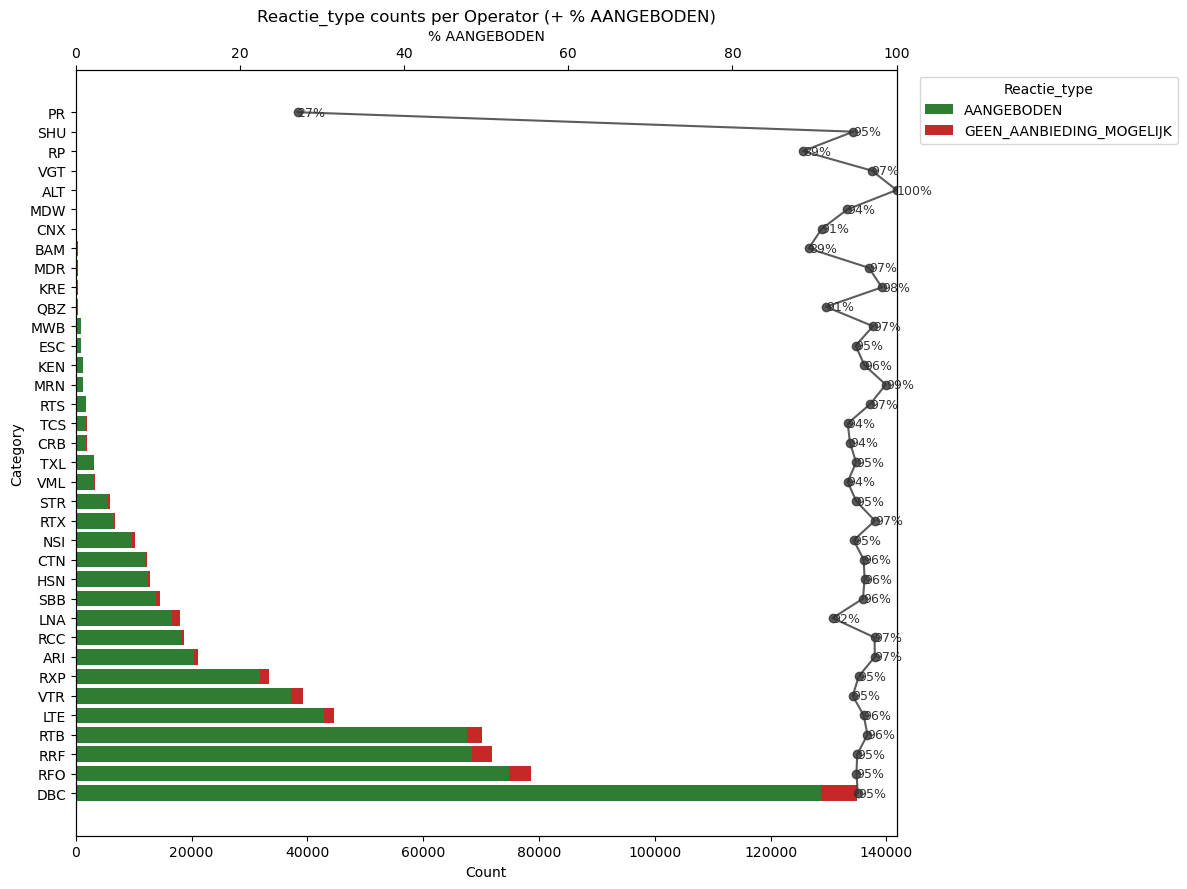

[OK] Saved plots_cumulative_counts\counts_operator.png


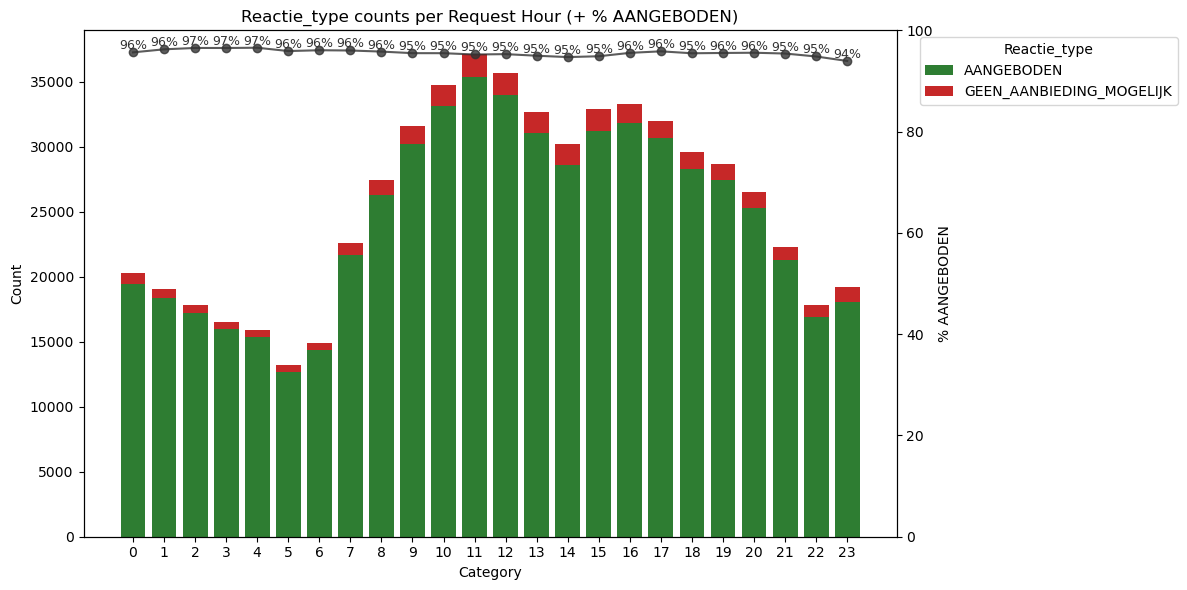

[OK] Saved plots_cumulative_counts\counts_req_hour.png


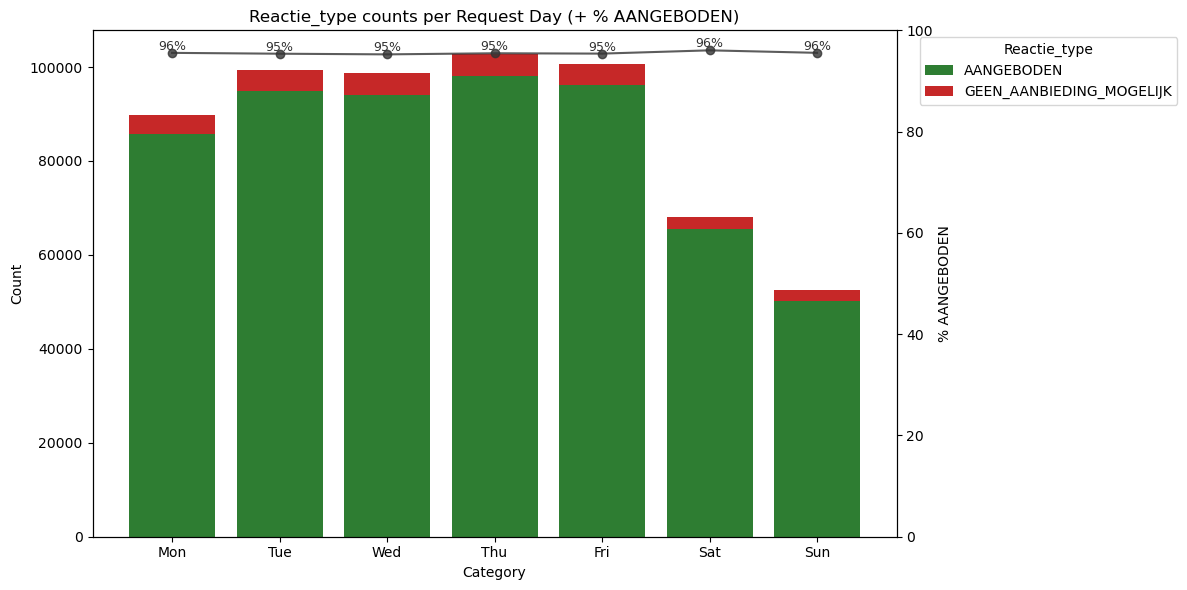

[OK] Saved plots_cumulative_counts\counts_req_day.png


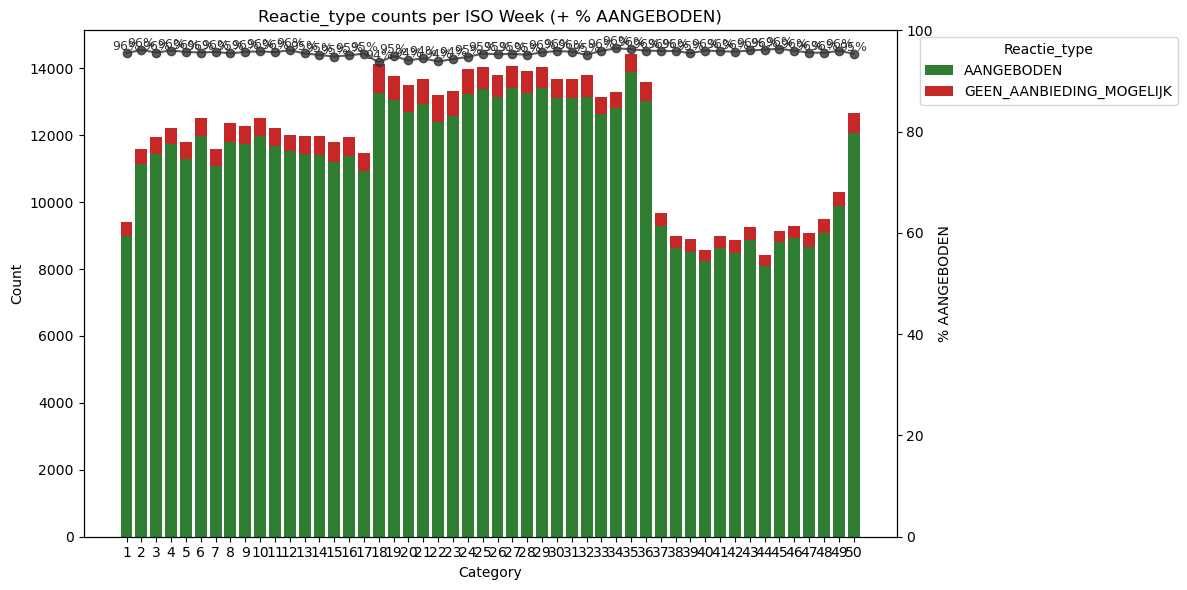

[OK] Saved plots_cumulative_counts\counts_req_week.png


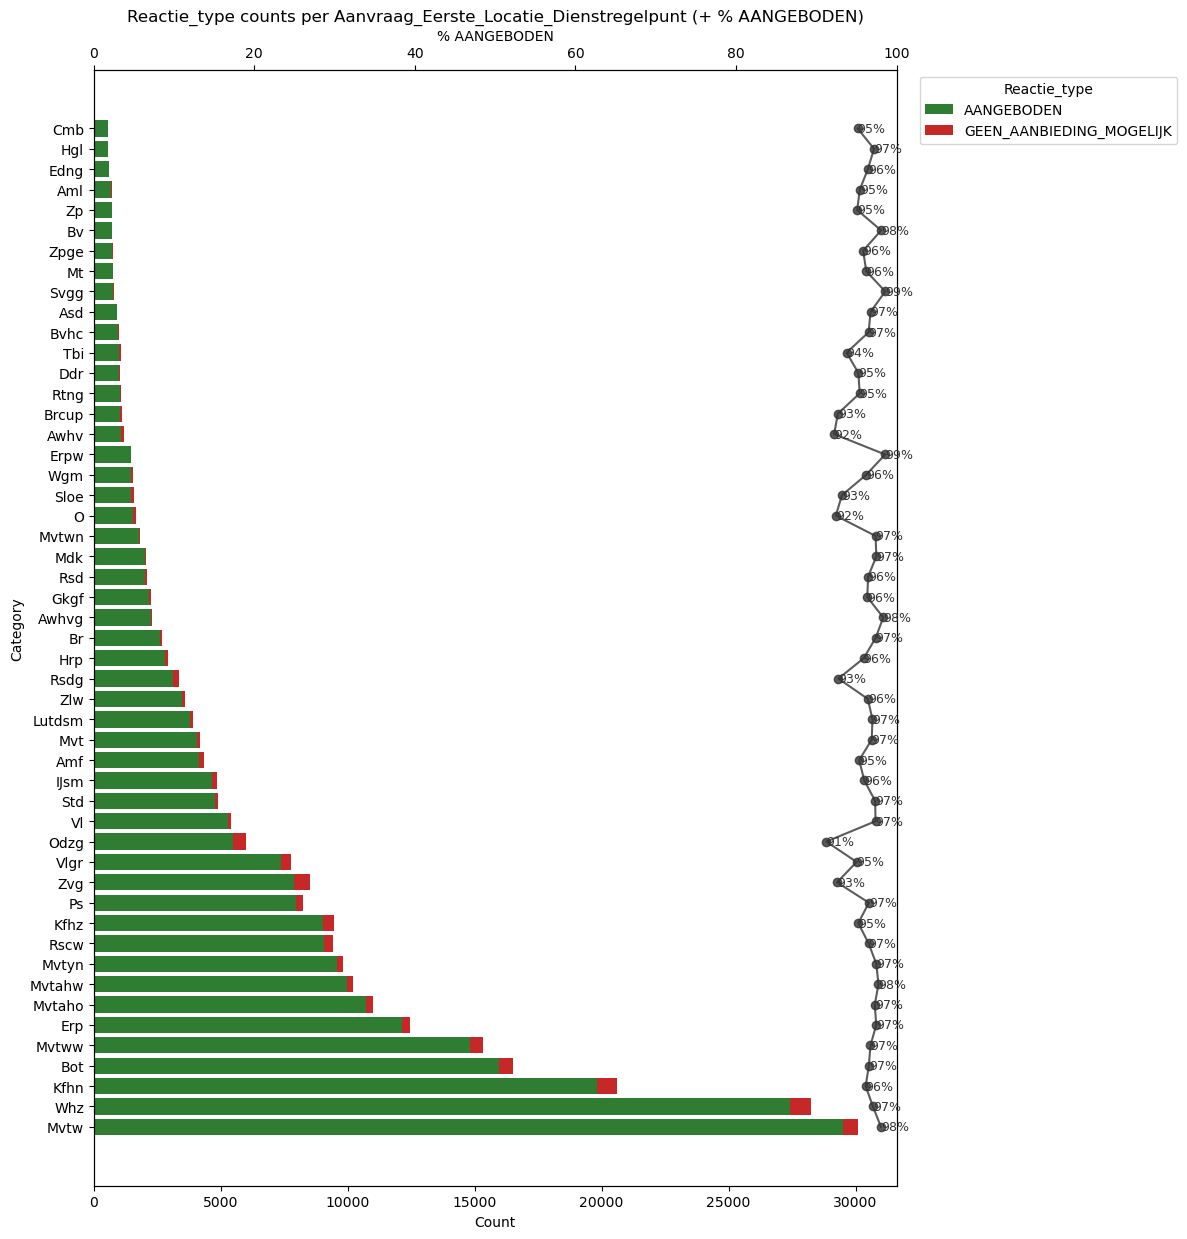

[OK] Saved plots_cumulative_counts\counts_first_location.png


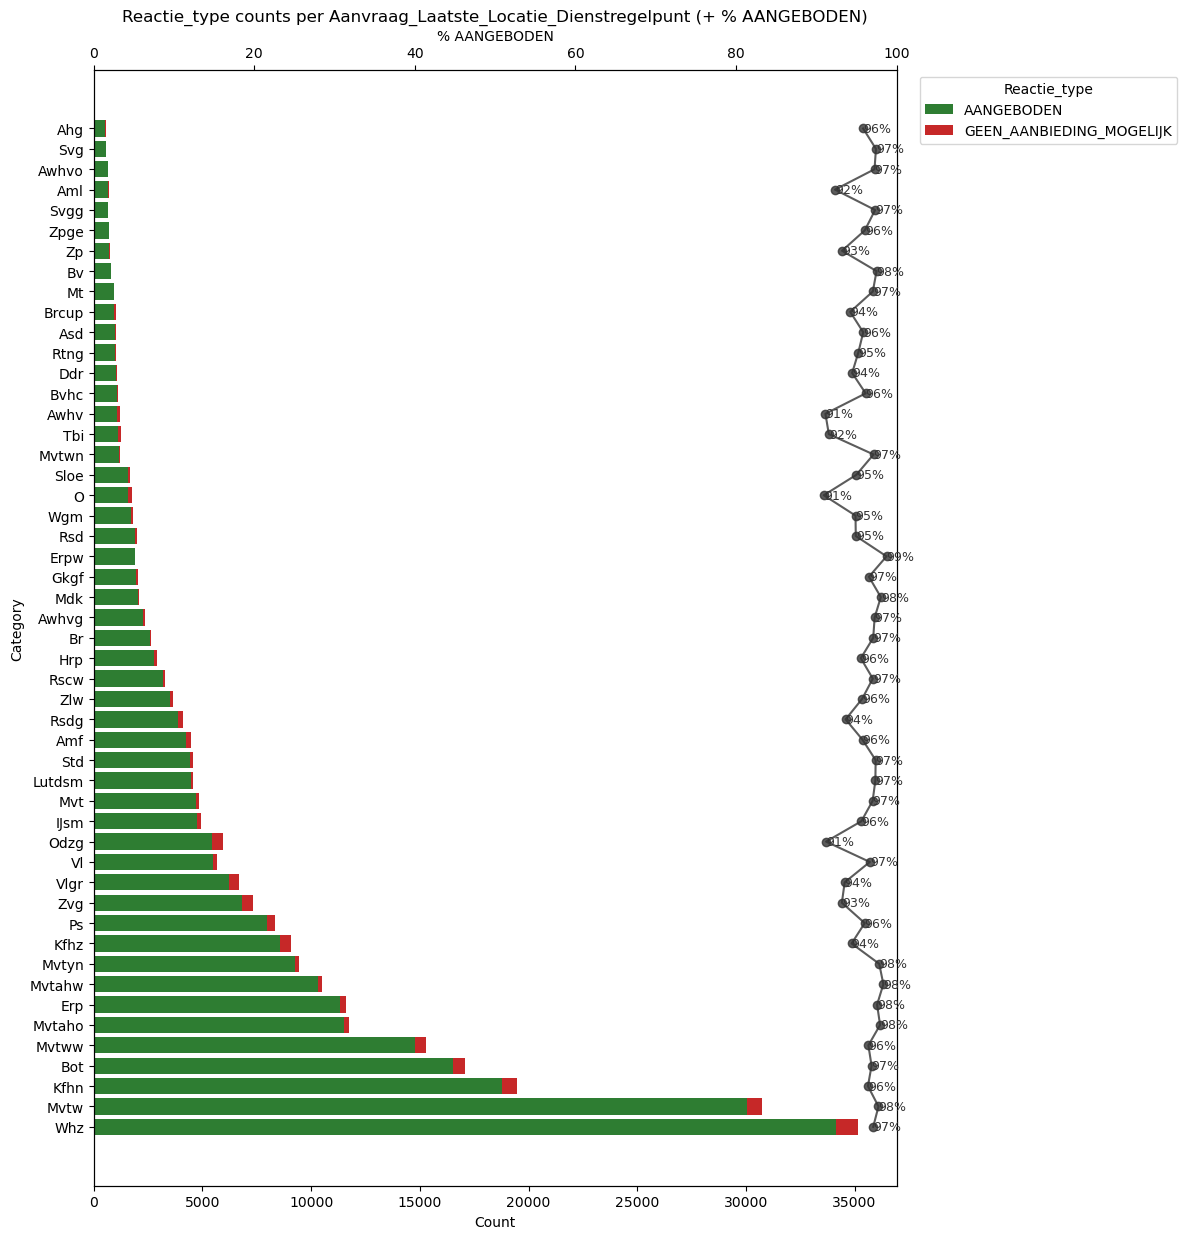

[OK] Saved plots_cumulative_counts\counts_last_location.png


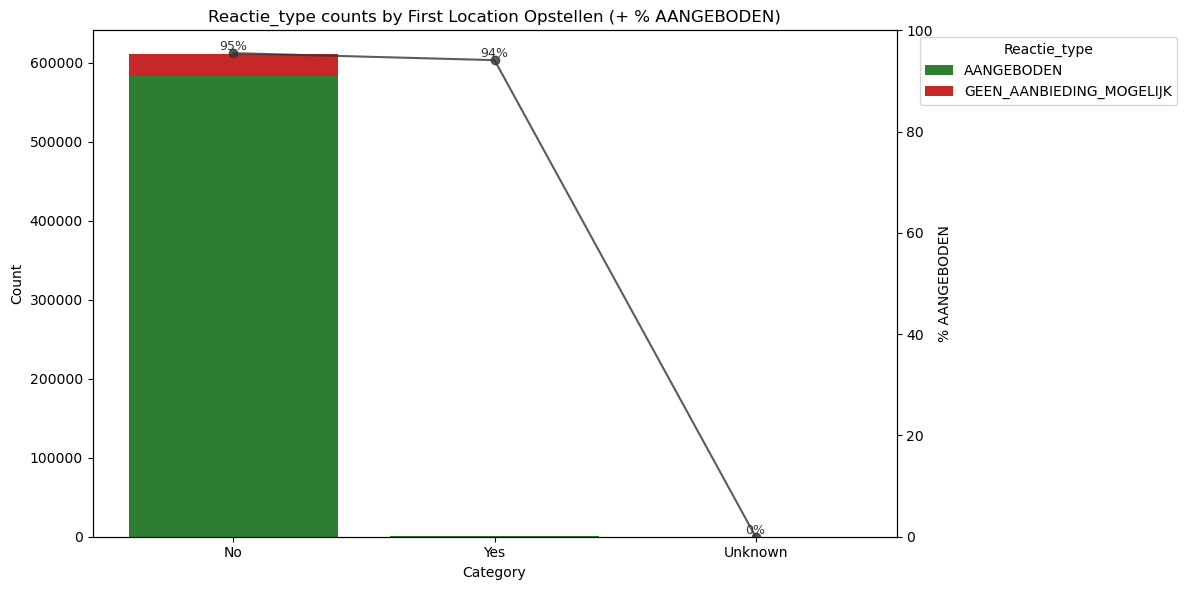

[OK] Saved plots_cumulative_counts\counts_first_opstel.png


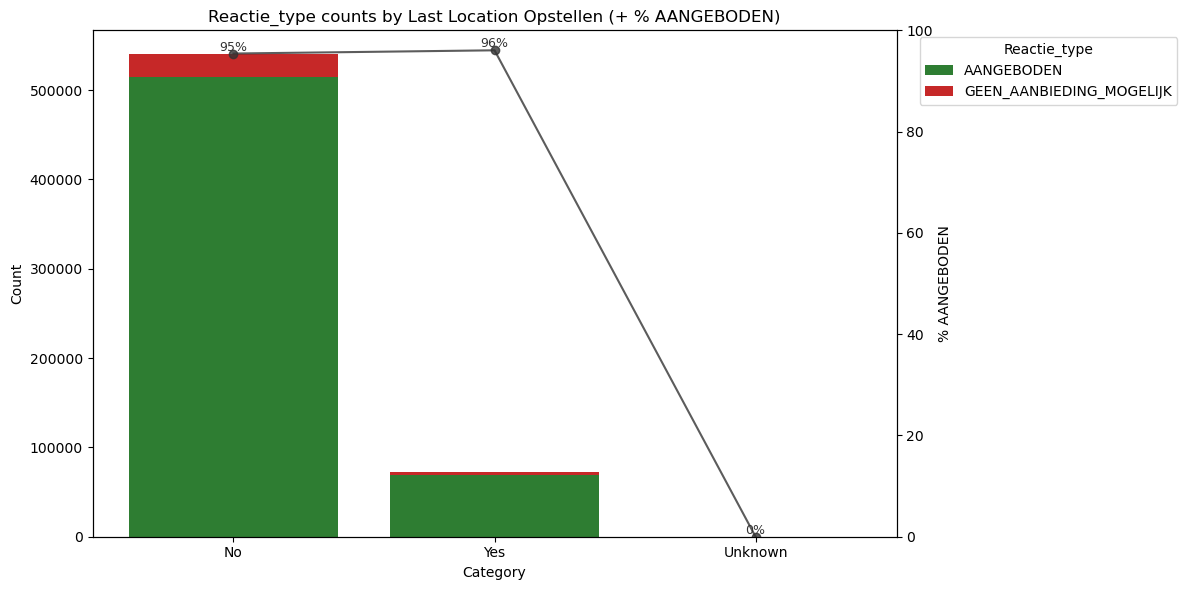

[OK] Saved plots_cumulative_counts\counts_last_opstel.png


C:\Users\quint\AppData\Local\Temp\ipykernel_9164\3928892688.py:312: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = (tmp.groupby(["bin", TARGET]).size()


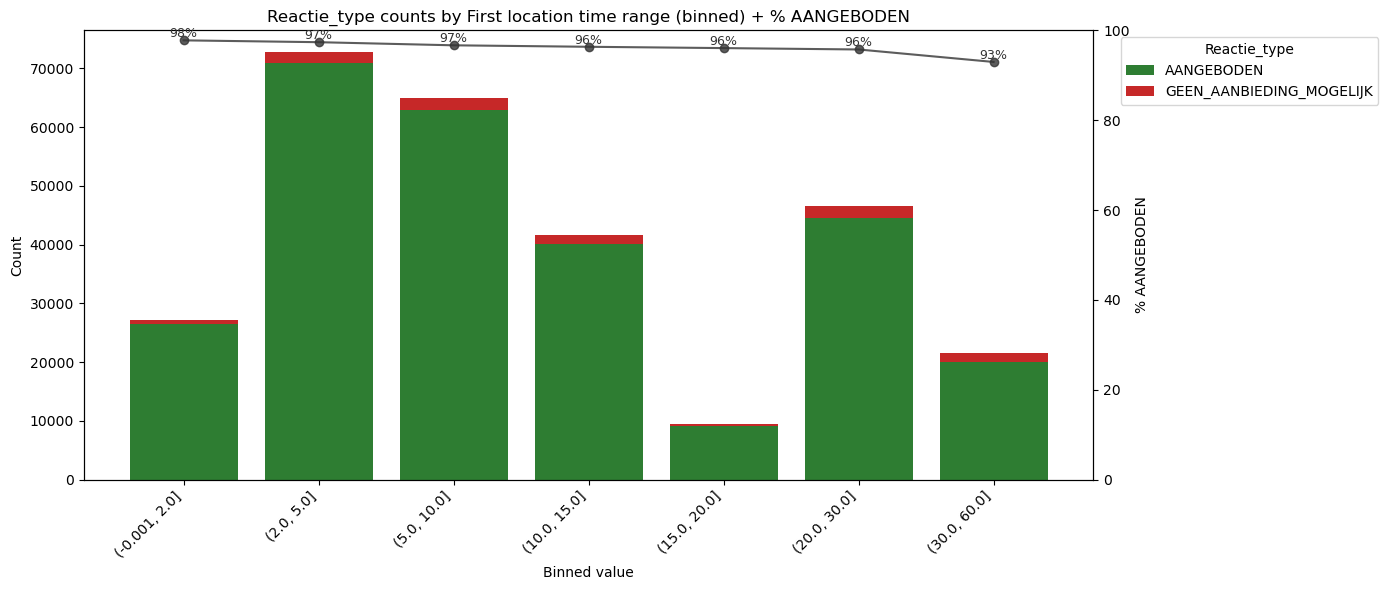

[OK] Saved plots_cumulative_counts\counts_binned_first_time_range.png


C:\Users\quint\AppData\Local\Temp\ipykernel_9164\3928892688.py:312: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  counts = (tmp.groupby(["bin", TARGET]).size()


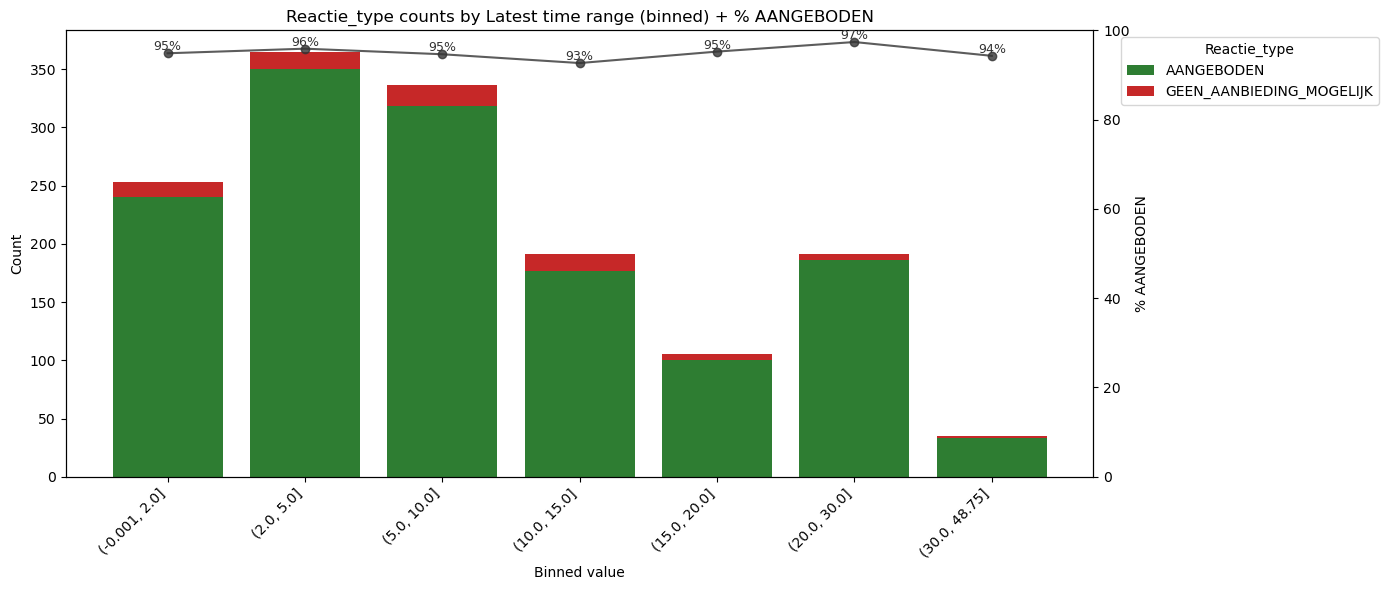

[OK] Saved plots_cumulative_counts\counts_binned_latest_time_range.png


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# ===================== CONFIG =====================
FILES = ["cleaned_dataset_1.csv", "cleaned_dataset_2.csv", "cleaned_dataset_3.csv"]
OUT_DIR = Path("plots_cumulative_counts"); OUT_DIR.mkdir(exist_ok=True, parents=True)

TARGET = "Reactie_type"
POS_LABEL = "AANGEBODEN"  # positive class used for the percentage overlay

# Consistent class order + colors across all plots
REACTIE_ORDER = ["AANGEBODEN", "GEEN_AANBIEDING_MOGELIJK", "AFWIJZING", "ANNULEER_BEVESTIGING"]
COLOR_MAP = {
    "AANGEBODEN":               "#2E7D32",  # green
    "GEEN_AANBIEDING_MOGELIJK": "#C62828",  # red
    "AFWIJZING":                "#6A1B9A",  # purple
    "ANNULEER_BEVESTIGING":     "#FF8F00",  # amber
}

# Toggle which plots to produce
PLOT_OPERATOR          = True
PLOT_REQ_HOUR          = True
PLOT_REQ_DAY           = True
PLOT_REQ_WEEK          = True
PLOT_FIRST_LOC         = True
PLOT_LAST_LOC          = True
PLOT_FIRST_OPSTEL      = True
PLOT_LAST_OPSTEL       = True
PLOT_TIME_RANGE_FIRST  = True
PLOT_TIME_RANGE_LAST   = True

# Readability filters
MIN_COUNT = 20     # minimum total rows per category to show (e.g., per operator/location)
TOP_N     = 50     # max categories to display after sorting (None = all)

# Binning for numeric time ranges
NBINS     = 12
CLIP_PCT  = (0.01, 0.99)
# ===================================================


def load_concat(files):
    dfs = []
    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
        except UnicodeDecodeError:
            df = pd.read_csv(f, low_memory=False, encoding="latin1")
        df[TARGET] = df[TARGET].astype(str).str.strip()
        dfs.append(df)
    if not dfs:
        raise RuntimeError("No files loaded.")
    return pd.concat(dfs, ignore_index=True)


def find_col(df, candidates):
    low = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in low:
            return low[cand.lower()]
    return None


def ensure_time_features(df):
    req_col = find_col(df, ["Aanvraag_Indienmoment"])
    req_dt = pd.to_datetime(df[req_col], errors="coerce")
    df["_req_hour"] = req_dt.dt.hour
    df["_req_dow"]  = req_dt.dt.dayofweek
    df["_req_week"] = (req_dt.dt.isocalendar().week
                       if hasattr(req_dt.dt, "isocalendar")
                       else pd.Series(pd.NA, index=req_dt.index, dtype="Int64"))
    df["_req_day_name"] = df["_req_dow"].map({0:"Mon",1:"Tue",2:"Wed",3:"Thu",4:"Fri",5:"Sat",6:"Sun"})
    return df


def counts_table(df, cat_col):
    sub = df[[cat_col, TARGET]].dropna()
    if sub.empty:
        return None, None
    sub[TARGET] = sub[TARGET].astype(str).str.strip()

    counts = (sub.groupby([cat_col, TARGET]).size()
                .rename("n").reset_index())
    pivot = counts.pivot(index=cat_col, columns=TARGET, values="n").fillna(0)

    totals = pivot.sum(axis=1)

    # filter by min total
    if MIN_COUNT and MIN_COUNT > 0:
        keep = totals >= MIN_COUNT
        pivot = pivot.loc[keep]
        totals = totals.loc[keep]

    if pivot.empty:
        return None, None

    # consistent column ordering
    cols_present = list(pivot.columns)
    ordered_cols = [c for c in REACTIE_ORDER if c in cols_present] + \
                   [c for c in cols_present if c not in REACTIE_ORDER]
    pivot = pivot[ordered_cols]

    # sort rows by AANGEBODEN count (desc) if present, else by total
    sort_key = "AANGEBODEN" if "AANGEBODEN" in pivot.columns else ordered_cols[0]
    pivot = pivot.sort_values(by=sort_key, ascending=False)
    totals = totals.reindex(pivot.index)

    return pivot, totals


def color_for(cls):
    return COLOR_MAP.get(str(cls), None)


def compute_offered_pct(pivot_counts, pos_label=POS_LABEL):
    totals = pivot_counts.sum(axis=1)
    offered = pivot_counts[pos_label] if pos_label in pivot_counts.columns else 0
    pct = np.divide(offered, totals, out=np.zeros_like(totals, dtype=float), where=totals>0) * 100.0
    return pct


def plot_stacked_counts(pivot_counts, totals_series, title, outfile, horizontal=True):
    """
    Draw stacked counts and overlay '% AANGEBODEN' as a secondary axis (line with markers)
    + per-category percentage labels.
    """
    if pivot_counts is None or pivot_counts.empty:
        print(f("[WARN] No data to plot for {title}"))
        return

    # truncate to TOP_N if requested
    tbl = pivot_counts.copy()
    totals_series = totals_series.reindex(tbl.index)
    if TOP_N is not None and TOP_N > 0 and len(tbl) > TOP_N:
        tbl = tbl.iloc[:TOP_N, :]
        totals_series = totals_series.iloc[:TOP_N]

    offered_pct = compute_offered_pct(tbl)  # % AANGEBODEN per row

    fig = plt.figure(figsize=(12, max(6, 0.25*len(tbl)) if horizontal else 6))
    ax = plt.gca()
    class_order = list(tbl.columns)

    if horizontal:
        y = np.arange(len(tbl))
        left = np.zeros(len(tbl), dtype=float)
        for cls in class_order:
            vals = tbl[cls].to_numpy()
            ax.barh(y, vals, left=left, label=str(cls), color=color_for(cls))
            left += np.nan_to_num(vals, nan=0.0)

        ax.set_xlabel("Count")
        ax.set_yticks(y, tbl.index.astype(str))
        ax.set_ylabel("Category")

        # secondary axis: % AANGEBODEN
        ax2 = ax.twiny()
        ax2.plot(offered_pct.values, y, marker="o", linewidth=1.5, alpha=0.8, color="#333333")
        ax2.set_xlim(0, 100)
        ax2.set_xlabel("% AANGEBODEN")
        ax2.grid(False)

        # annotate each category with its %
        for yi, pct in zip(y, offered_pct.values):
            ax2.text(pct, yi, f"{pct:.0f}%", va="center", ha="left", fontsize=9, color="#333333")

    else:
        x = np.arange(len(tbl))
        bottom = np.zeros(len(tbl), dtype=float)
        for cls in class_order:
            vals = tbl[cls].to_numpy()
            ax.bar(x, vals, bottom=bottom, label=str(cls), color=color_for(cls))
            bottom += np.nan_to_num(vals, nan=0.0)

        ax.set_ylabel("Count")
        ax.set_xticks(x, tbl.index.astype(str), rotation=0)
        ax.set_xlabel("Category")

        # secondary axis: % AANGEBODEN
        ax2 = ax.twinx()
        ax2.plot(x, offered_pct.values, marker="o", linewidth=1.5, alpha=0.8, color="#333333")
        ax2.set_ylim(0, 100)
        ax2.set_ylabel("% AANGEBODEN")
        ax2.grid(False)

        # annotate each category with its %
        for xi, pct in zip(x, offered_pct.values):
            ax2.text(xi, pct, f"{pct:.0f}%", va="bottom", ha="center", fontsize=9, color="#333333")

    plt.title(title)
    ax.legend(title=TARGET, bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    out = OUT_DIR / outfile
    plt.savefig(out, dpi=150)
    plt.show()
    print(f"[OK] Saved {out}")


def bin_numeric(series, nbins=12, clip_pct=(0.01, 0.99)):
    s = pd.to_numeric(series, errors="coerce")
    s = s.replace([np.inf, -np.inf], np.nan).dropna()
    if s.empty:
        return None, None
    if clip_pct:
        s = s.clip(lower=s.quantile(clip_pct[0]), upper=s.quantile(clip_pct[1]))
    cats, edges = pd.qcut(s, q=nbins, retbins=True, duplicates="drop")
    cats = pd.Categorical(cats, ordered=True)
    return pd.Series(cats, index=s.index), list(map(str, cats.categories))


# ===================== RUN =====================
df = load_concat(FILES)
df = ensure_time_features(df)

# Column discovery (case-insensitive)
col_operator = find_col(df, ["Aanvrager_Verkorting", "Aanvraag_vervoerder_verkorting"])
col_first_loc = find_col(df, ["Aanvraag_Eerste_Locatie_Dienstregelpunt"])
col_last_loc  = find_col(df, ["Aanvraag_Laatste_Locatie_Dienstregelpunt"])
col_first_op  = find_col(df, ["Aanvraag_Eerste_Locatie_Opstellen_True"])
col_last_op   = find_col(df, ["Aanvraag_Laatste_Locatie_Opstellen_True"])
col_tr_first  = find_col(df, ["Aanvraag_time_range_Eerste_Locatie_Vertrektijd"])
col_tr_last   = find_col(df, ["Aanvraag_time_range_Laatste_Locatie_Aankomsttijd"])

# 1) Operator (absolute counts + % line)
if PLOT_OPERATOR and col_operator:
    counts, totals = counts_table(df, col_operator)
    if counts is not None:
        counts.to_csv(OUT_DIR / "counts_by_operator.csv")
        plot_stacked_counts(counts, totals, "Reactie_type counts per Operator (+ % AANGEBODEN)", "counts_operator.png", horizontal=True)

# 2) Request hour (0..23)
if PLOT_REQ_HOUR:
    hours = list(range(24))
    tmp = df[["_req_hour", TARGET]].dropna()
    tmp["_req_hour"] = tmp["_req_hour"].astype(int)
    counts, totals = counts_table(tmp.rename(columns={"_req_hour":"req_hour"}), "req_hour")
    if counts is not None:
        counts = counts.reindex(hours).fillna(0)
        totals = counts.sum(axis=1)
        counts.to_csv(OUT_DIR / "counts_by_request_hour.csv")
        plot_stacked_counts(counts, totals, "Reactie_type counts per Request Hour (+ % AANGEBODEN)", "counts_req_hour.png", horizontal=False)

# 3) Request day (Mon..Sun)
if PLOT_REQ_DAY:
    day_order = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
    tmp = df[["_req_day_name", TARGET]].dropna()
    counts, totals = counts_table(tmp.rename(columns={"_req_day_name":"req_day"}), "req_day")
    if counts is not None:
        counts = counts.reindex(day_order).fillna(0)
        totals = counts.sum(axis=1)
        counts.to_csv(OUT_DIR / "counts_by_request_day.csv")
        plot_stacked_counts(counts, totals, "Reactie_type counts per Request Day (+ % AANGEBODEN)", "counts_req_day.png", horizontal=False)

# 4) ISO week
if PLOT_REQ_WEEK:
    tmp = df[["_req_week", TARGET]].dropna()
    tmp["_req_week"] = tmp["_req_week"].astype(int)
    counts, totals = counts_table(tmp.rename(columns={"_req_week":"req_week"}), "req_week")
    if counts is not None:
        counts = counts.sort_index()
        totals = counts.sum(axis=1)
        counts.to_csv(OUT_DIR / "counts_by_request_week.csv")
        plot_stacked_counts(counts, totals, "Reactie_type counts per ISO Week (+ % AANGEBODEN)", "counts_req_week.png", horizontal=False)

# 5) First/Last location
if PLOT_FIRST_LOC and col_first_loc:
    counts, totals = counts_table(df, col_first_loc)
    if counts is not None:
        counts.to_csv(OUT_DIR / "counts_by_first_location.csv")
        plot_stacked_counts(counts, totals, f"Reactie_type counts per {col_first_loc} (+ % AANGEBODEN)", "counts_first_location.png", horizontal=True)

if PLOT_LAST_LOC and col_last_loc:
    counts, totals = counts_table(df, col_last_loc)
    if counts is not None:
        counts.to_csv(OUT_DIR / "counts_by_last_location.csv")
        plot_stacked_counts(counts, totals, f"Reactie_type counts per {col_last_loc} (+ % AANGEBODEN)", "counts_last_location.png", horizontal=True)

# 6) Opstellen flags (0/1 or Yes/No/Unknown expected)
def label_yes_no_unknown(s):
    s = pd.to_numeric(s, errors="coerce")
    out = pd.Series(index=s.index, dtype="string")
    out[s == 1] = "Yes"; out[s == 0] = "No"; out[s.isna()] = "Unknown"
    return out

if PLOT_FIRST_OPSTEL and col_first_op:
    df["_first_opstel_label"] = label_yes_no_unknown(df[col_first_op])
    counts, totals = counts_table(df.rename(columns={"_first_opstel_label":"first_opstel"}), "first_opstel")
    if counts is not None:
        counts = counts.reindex(["No","Yes","Unknown"]).fillna(0)
        totals = counts.sum(axis=1)
        counts.to_csv(OUT_DIR / "counts_by_first_opstel.csv")
        plot_stacked_counts(counts, totals, "Reactie_type counts by First Location Opstellen (+ % AANGEBODEN)", "counts_first_opstel.png", horizontal=False)

if PLOT_LAST_OPSTEL and col_last_op:
    df["_last_opstel_label"] = label_yes_no_unknown(df[col_last_op])
    counts, totals = counts_table(df.rename(columns={"_last_opstel_label":"last_opstel"}), "last_opstel")
    if counts is not None:
        counts = counts.reindex(["No","Yes","Unknown"]).fillna(0)
        totals = counts.sum(axis=1)
        counts.to_csv(OUT_DIR / "counts_by_last_opstel.csv")
        plot_stacked_counts(counts, totals, "Reactie_type counts by Last Location Opstellen (+ % AANGEBODEN)", "counts_last_opstel.png", horizontal=False)

# 7) Numeric time ranges (binned, absolute counts stacked + % overlay)
def binned_counts_plot(series, title, outfile):
    cats, _ = bin_numeric(series, nbins=NBINS, clip_pct=CLIP_PCT)
    if cats is None:
        print(f"[WARN] No numeric data to bin for {title}")
        return
    tmp = pd.DataFrame({"bin": cats, TARGET: df[TARGET].loc[cats.index].values})
    counts = (tmp.groupby(["bin", TARGET]).size()
                .rename("n").reset_index())
    pivot = counts.pivot(index="bin", columns=TARGET, values="n").fillna(0)
    pivot.to_csv(OUT_DIR / outfile.replace(".png", "_table.csv"))

    # consistent class order & colors
    cols_present = list(pivot.columns)
    class_order = [c for c in REACTIE_ORDER if c in cols_present] + \
                  [c for c in cols_present if c not in REACTIE_ORDER]

    offered_pct = compute_offered_pct(pivot)  # % AANGEBODEN per bin

    fig = plt.figure(figsize=(14, 6))
    ax = plt.gca()
    x = np.arange(len(pivot))
    bottom = np.zeros(len(pivot), dtype=float)
    for cls in class_order:
        vals = pivot[cls].to_numpy()
        ax.bar(x, vals, bottom=bottom, label=str(cls), color=color_for(cls))
        bottom += np.nan_to_num(vals, nan=0.0)

    ax.set_ylabel("Count")
    ax.set_xlabel("Binned value")
    ax.set_xticks(x, pivot.index.astype(str), rotation=45, ha="right")
    ax.set_title(title)

    # secondary axis: % AANGEBODEN
    ax2 = ax.twinx()
    ax2.plot(x, offered_pct.values, marker="o", linewidth=1.5, alpha=0.8, color="#333333")
    ax2.set_ylim(0, 100)
    ax2.set_ylabel("% AANGEBODEN")
    ax2.grid(False)

    # annotate % labels
    for xi, pct in zip(x, offered_pct.values):
        ax2.text(xi, pct, f"{pct:.0f}%", va="bottom", ha="center", fontsize=9, color="#333333")

    ax.legend(title=TARGET, bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.savefig(OUT_DIR / outfile, dpi=150)
    plt.show()
    print(f"[OK] Saved {OUT_DIR/outfile}")

if PLOT_TIME_RANGE_FIRST and col_tr_first:
    binned_counts_plot(df[col_tr_first], "Reactie_type counts by First location time range (binned) + % AANGEBODEN",
                       "counts_binned_first_time_range.png")

if PLOT_TIME_RANGE_LAST and col_tr_last:
    binned_counts_plot(df[col_tr_last], "Reactie_type counts by Latest time range (binned) + % AANGEBODEN",
                       "counts_binned_latest_time_range.png")


C:\Users\quint\AppData\Local\Temp\ipykernel_9164\3378119574.py:33: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dt = pd.to_datetime(s, errors="coerce", infer_datetime_format=True)
C:\Users\quint\AppData\Local\Temp\ipykernel_9164\3378119574.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dt = pd.to_datetime(s, errors="coerce", infer_datetime_format=True)
C:\Users\quint\AppData\Local\Temp\ipykernel_9164\3378119574.py:33: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-

[OK] Saved differences: C:\Users\quint\Downloads\abs_time_diff_request_vs_earliest.csv (rows=72734)
Mean abs diff: 1.81 h | Median: 0.40 h | ≤ 2 h: 74.9% of rows


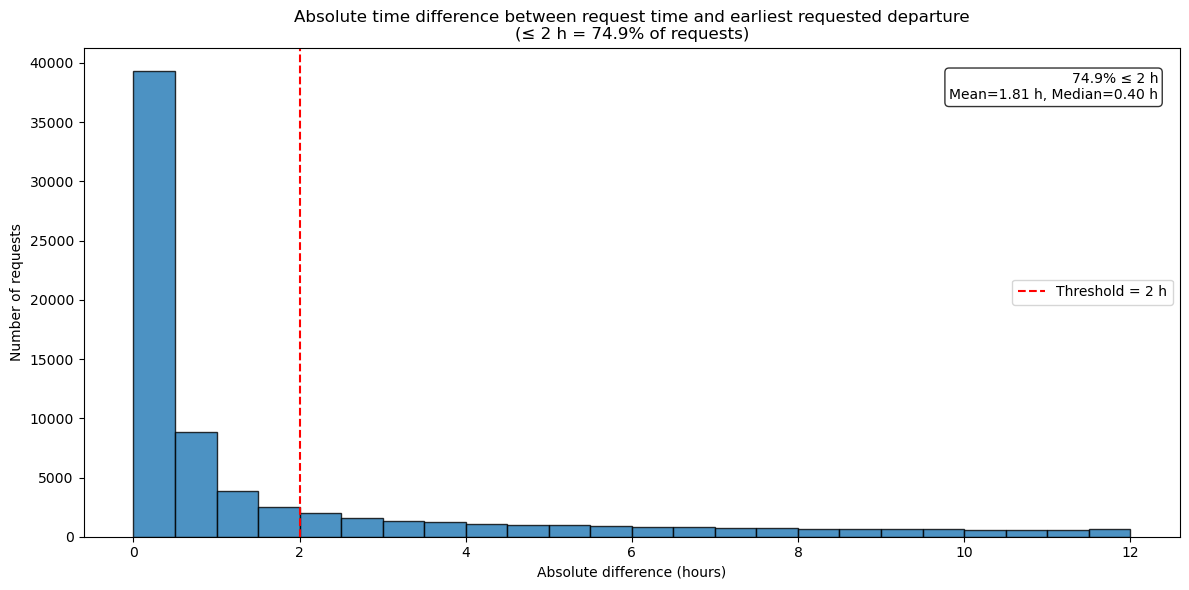

[OK] Saved plot: C:\Users\quint\Downloads\plots\abs_time_diff_request_vs_earliest.png


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import re

# ========= CONFIG =========
IN_FILE = "cleaned_dataset.csv"       # or cleaned_dataset_*.csv — change if needed
OUT_DIR = Path("plots"); OUT_DIR.mkdir(exist_ok=True, parents=True)
OUT_PNG = OUT_DIR / "abs_time_diff_request_vs_earliest.png"
OUT_CSV = "abs_time_diff_request_vs_earliest.csv"

THRESHOLD_HOURS = 2.0                 # show % of rows with diff <= this
NBINS = 24                            # histogram bins (hours; 24 gives ~0.5h bins if range is 0–12)
# =========================

def find_col(df, candidates):
    low = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in low:
            return low[cand.lower()]
    return None

def parse_clock_to_minutes(series):
    """
    Parse times like '23:58:19', '7:00', '07:00:00' -> minutes since midnight.
    Values may be embedded in a datetime string ('1900-01-01 07:00:00'); we extract the HH:MM[:SS].
    Returns float Series with NaN for unparsable.
    """
    s = series.astype(str)

    # 1) try to_datetime – keeps clock part even with dummy dates
    dt = pd.to_datetime(s, errors="coerce", infer_datetime_format=True)
    mins = (dt.dt.hour * 60 + dt.dt.minute).astype("float")
    # We'll try regex for rows that failed
    mask_na = mins.isna()
    if mask_na.any():
        # Extract HH:MM[:SS] via regex
        hhmm = s[mask_na].str.extract(r'(\d{1,2}:\d{2}(?::\d{2})?)', expand=False)
        # Normalize to HH:MM:SS
        hhmm = hhmm.str.replace(r'^(\d{1,2}):(\d{2})$', r'\1:\2:00', regex=True)
        dt2 = pd.to_datetime(hhmm, format="%H:%M:%S", errors="coerce")
        mins.loc[mask_na] = (dt2.dt.hour * 60 + dt2.dt.minute).astype("float")
    # 2) clamp to [0, 24*60) or NaN
    mins = mins.where((mins >= 0) & (mins < 24*60))
    return mins

def circ_abs_diff_minutes(a_min, b_min):
    """
    Minimal absolute circular difference (minutes) on a 24h clock.
    Input: float Series (minutes since midnight).
    Output: float Series in [0, 12*60].
    """
    # ensure aligned index
    a_min = a_min.astype("float")
    b_min = b_min.astype("float")
    d = (a_min - b_min).abs() % (24*60)
    return np.minimum(d, 24*60 - d)

# ---------- LOAD ----------
try:
    df = pd.read_csv(IN_FILE, low_memory=False)
except UnicodeDecodeError:
    df = pd.read_csv(IN_FILE, low_memory=False, encoding="latin1")

# Identify columns (case-insensitive)
col_req_time = find_col(df, ["Aanvraag_time", "Aanvraag_Indienmoment"])
col_earliest = find_col(df, ["Aanvraag_Eerste_Locatie_Vroegste_Vertrektijd"])

if col_req_time is None or col_earliest is None:
    raise KeyError(f"Missing required columns. Found: request={col_req_time}, earliest={col_earliest}")

# If we got a full timestamp for request, extract only the clock part automatically
req_minutes = parse_clock_to_minutes(df[col_req_time])
earl_minutes = parse_clock_to_minutes(df[col_earliest])

# Compute absolute circular difference (minutes -> hours)
diff_minutes = circ_abs_diff_minutes(req_minutes, earl_minutes)
diff_hours = diff_minutes / 60.0
diff_hours = diff_hours.dropna()

if diff_hours.empty:
    raise RuntimeError("No valid time differences computed. Check your input columns/values.")

# Save the differences
pd.DataFrame({"abs_time_diff_hours": diff_hours}).to_csv(OUT_CSV, index=False)
print(f"[OK] Saved differences: {Path(OUT_CSV).resolve()} (rows={len(diff_hours)})")

# ---------- METRICS ----------
pct_within = (diff_hours <= THRESHOLD_HOURS).mean() * 100.0
mean_diff  = diff_hours.mean()
median_diff = diff_hours.median()

print(f"Mean abs diff: {mean_diff:.2f} h | Median: {median_diff:.2f} h | "
      f"≤ {THRESHOLD_HOURS:g} h: {pct_within:.1f}% of rows")

# ---------- PLOT ----------
# Histogram from 0 to 12 hours (circular minimal difference never exceeds 12h)
plt.figure(figsize=(12,6))
bins = np.linspace(0, 12, NBINS+1)
counts, edges, _ = plt.hist(diff_hours, bins=bins, edgecolor="black", alpha=0.8)

plt.title(f"Absolute time difference between request time and earliest requested departure\n"
          f"(≤ {THRESHOLD_HOURS:g} h = {pct_within:.1f}% of requests)")
plt.xlabel("Absolute difference (hours)")
plt.ylabel("Number of requests")

# vertical line for threshold
plt.axvline(THRESHOLD_HOURS, color="red", linestyle="--", linewidth=1.5, label=f"Threshold = {THRESHOLD_HOURS:g} h")
plt.legend()

# annotate the percentage in the plot (top-right area)
ymax = counts.max() if len(counts) else 0
plt.text(0.98, 0.95,
         f"{pct_within:.1f}% ≤ {THRESHOLD_HOURS:g} h\nMean={mean_diff:.2f} h, Median={median_diff:.2f} h",
         transform=plt.gca().transAxes, ha="right", va="top",
         bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))

plt.tight_layout()
plt.savefig(OUT_PNG, dpi=150)
plt.show()
print(f"[OK] Saved plot: {OUT_PNG.resolve()}")


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import re

# ========= CONFIG =========
FILES   = ["cleaned_dataset_1.csv", "cleaned_dataset_2.csv", "cleaned_dataset_3.csv"]
OUT_DIR = Path("plots"); OUT_DIR.mkdir(exist_ok=True, parents=True)
OUT_PNG = OUT_DIR / "diff_request_vs_operation_hour_from_cleaned_datasets.png"
OUT_CSV = OUT_DIR / "diff_request_vs_operation_hour_summary.csv"

TARGET      = "Reactie_type"
POS_LABEL   = "AANGEBODEN"
NEG_LABEL   = "NIET_AANGEBODEN"   # virtual label = everything not AANGEBODEN

BIN_WIDTH_H = 1                   # 1-hour bins
MAX_DIFF_H  = 12                  # minimal circular diff never exceeds 12h
# =========================

def load_concat(files):
    dfs = []
    for f in files:
        try:
            df = pd.read_csv(f, low_memory=False)
        except UnicodeDecodeError:
            df = pd.read_csv(f, low_memory=False, encoding="latin1")
        dfs.append(df)
    if not dfs:
        raise RuntimeError("No files loaded.")
    df = pd.concat(dfs, ignore_index=True)
    # standardize target text
    if TARGET in df.columns:
        df[TARGET] = df[TARGET].astype(str).str.strip()
    return df

def find_col(df, candidates):
    low = {c.lower(): c for c in df.columns}
    for cand in candidates:
        if cand.lower() in low:
            return low[cand.lower()]
    return None

def parse_clock_to_minutes(series):
    """
    Parse times like '23:58:19', '7:00', '07:00:00' or '1900-01-01 07:00:00'
    into minutes since midnight [0..1439]. Returns float Series with NaN for invalid.
    """
    s = series.astype(str)

    # 1) try pandas datetime directly (keeps clock even with dummy dates)
    dt = pd.to_datetime(s, errors="coerce", infer_datetime_format=True)
    mins = (dt.dt.hour * 60 + dt.dt.minute).astype("float")

    # 2) regex fallback for rows that failed
    mask_na = mins.isna()
    if mask_na.any():
        hhmm = s[mask_na].str.extract(r'(\d{1,2}:\d{2}(?::\d{2})?)', expand=False)
        # normalize to HH:MM:SS
        hhmm = hhmm.str.replace(r'^(\d{1,2}):(\d{2})$', r'\1:\2:00', regex=True)
        dt2 = pd.to_datetime(hhmm, format="%H:%M:%S", errors="coerce")
        mins.loc[mask_na] = (dt2.dt.hour * 60 + dt2.dt.minute).astype("float")

    # valid range
    mins = mins.where((mins >= 0) & (mins < 24*60))
    return mins

def circ_abs_diff_hours(a_min, b_min):
    """Minimal absolute circular difference in HOURS, given minutes since midnight."""
    d = (a_min - b_min).abs() % (24*60)
    d = np.minimum(d, 24*60 - d) / 60.0
    return d

# ---------- LOAD ----------
df = load_concat(FILES)

# Identify columns (case-insensitive)
# Request time: prefer a dedicated 'Aanvraag_time' if present, else fallback to 'Aanvraag_Indienmoment'
col_req_time = find_col(df, ["Aanvraag_time", "Aanvraag_Indienmoment"])
# Operation / offered moment (from reaction)
col_op_time  = find_col(df, ["Reactie_Eerste_Activiteit_Tijdstip"])

if col_req_time is None or col_op_time is None:
    raise KeyError(f"Missing required columns. Found: request={col_req_time}, operation={col_op_time}")

# Parse to minutes since midnight
req_minutes = parse_clock_to_minutes(df[col_req_time])
op_minutes  = parse_clock_to_minutes(df[col_op_time])

# Compute circular minimal difference (hours)
diff_hours = circ_abs_diff_hours(req_minutes, op_minutes)
valid = diff_hours.notna() & df[TARGET].notna()

if valid.sum() == 0:
    raise RuntimeError("No valid rows to plot. Check time columns/values in the cleaned datasets.")

# Two-class target: offered vs not-offered
y = df.loc[valid, TARGET].astype(str).str.strip()
two_class = np.where(y.eq(POS_LABEL), POS_LABEL, NEG_LABEL)

# Bin differences into 1h buckets from 0..12
bins = np.arange(0, MAX_DIFF_H + BIN_WIDTH_H, BIN_WIDTH_H)  # [0,1,2,...,12]
labels = [f"{int(a)}–{int(b)}h" for a, b in zip(bins[:-1], bins[1:])]
cats = pd.cut(diff_hours[valid], bins=bins, include_lowest=True, right=False, labels=labels)

tmp = pd.DataFrame({
    "diff_bin": cats,
    "cls": two_class
}).dropna()

# Counts per bin and class (green=AANGEBODEN, red=NIET_AANGEBODEN)
counts = (tmp.groupby(["diff_bin", "cls"]).size()
            .rename("n").reset_index())
pivot = counts.pivot(index="diff_bin", columns="cls", values="n").fillna(0)

# Ensure both classes as columns
for c in [POS_LABEL, NEG_LABEL]:
    if c not in pivot.columns:
        pivot[c] = 0
pivot = pivot[[NEG_LABEL, POS_LABEL]]  # order: red then green for nice stacking

# Offered % per bin
totals = pivot.sum(axis=1)
pct_offered = np.divide(pivot[POS_LABEL], totals, out=np.zeros_like(totals, dtype=float), where=totals>0) * 100

# Save summary CSV
summary = pd.DataFrame({
    "bin": pivot.index.astype(str),
    "not_offered": pivot[NEG_LABEL].astype(int).values,
    "offered": pivot[POS_LABEL].astype(int).values,
    "total": totals.astype(int).values,
    "pct_offered": pct_offered.values
})
summary.to_csv(OUT_CSV, index=False)
print(f"[OK] Saved summary CSV: {OUT_CSV.resolve()}")

# ---------- PLOT ----------
plt.figure(figsize=(14, 6))
x = np.arange(len(pivot))
bottom = np.zeros(len(pivot), dtype=float)

# red = not offered, green = offered
colors = {NEG_LABEL: "#C62828", POS_LABEL: "#2E7D32"}
for cls in [NEG_LABEL, POS_LABEL]:
    vals = pivot[cls].to_numpy()
    plt.bar(x, vals, bottom=bottom, label=cls, color=colors[cls])
    bottom += np.nan_to_num(vals, nan=0.0)

# Secondary axis with % offered and value labels
ax = plt.gca()
ax2 = ax.twinx()
ax2.plot(x, pct_offered.values, marker="o", linewidth=1.5, alpha=0.85, color="#333333")
ax2.set_ylim(0, 100)
ax2.set_ylabel("% AANGEBODEN")
ax2.grid(False)

for xi, p in enumerate(pct_offered.values):
    ax2.text(xi, p, f"{p:.0f}%", va="bottom", ha="center", fontsize=9, color="#333333")

plt.title("Difference (hours) between request time and operation moment\n"
          "(Green=Offered, Red=Not offered; line = % AANGEBODEN) — cleaned datasets 1–3")
plt.xlabel("Absolute circular difference (hours)")
plt.ylabel("Number of requests")
plt.xticks(x, pivot.index.astype(str), rotation=0)
plt.legend(title="Klasse", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.savefig(OUT_PNG, dpi=150)
plt.show()
print(f"[OK] Saved plot: {OUT_PNG.resolve()}")


KeyError: 'Missing required columns. Found: request=Aanvraag_time, operation=None'

C:\Users\quint\AppData\Local\Temp\ipykernel_9164\2559805044.py:73: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  req_dt = pd.to_datetime(ch[col_req], errors="coerce", infer_datetime_format=True)
C:\Users\quint\AppData\Local\Temp\ipykernel_9164\2559805044.py:74: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  rsp_dt = pd.to_datetime(ch[col_rsp], errors="coerce", infer_datetime_format=True)
C:\Users\quint\AppData\Local\Temp\ipykernel_9164\2559805044.py:73: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. 

[OK] Wrote 323238 rows to C:\Users\quint\Downloads\processing_times_filtered.csv

=== Processing time summary (hours) ===
Reactie_type  level_1  processing_hours
  AANGEBODEN        n     323238.000000
  AANGEBODEN   mean_h         42.253537
  AANGEBODEN median_h          0.191667
  AANGEBODEN    p90_h        181.027778
  AANGEBODEN    p95_h        295.181667
  AANGEBODEN    min_h          0.003056
  AANGEBODEN    max_h        335.924167


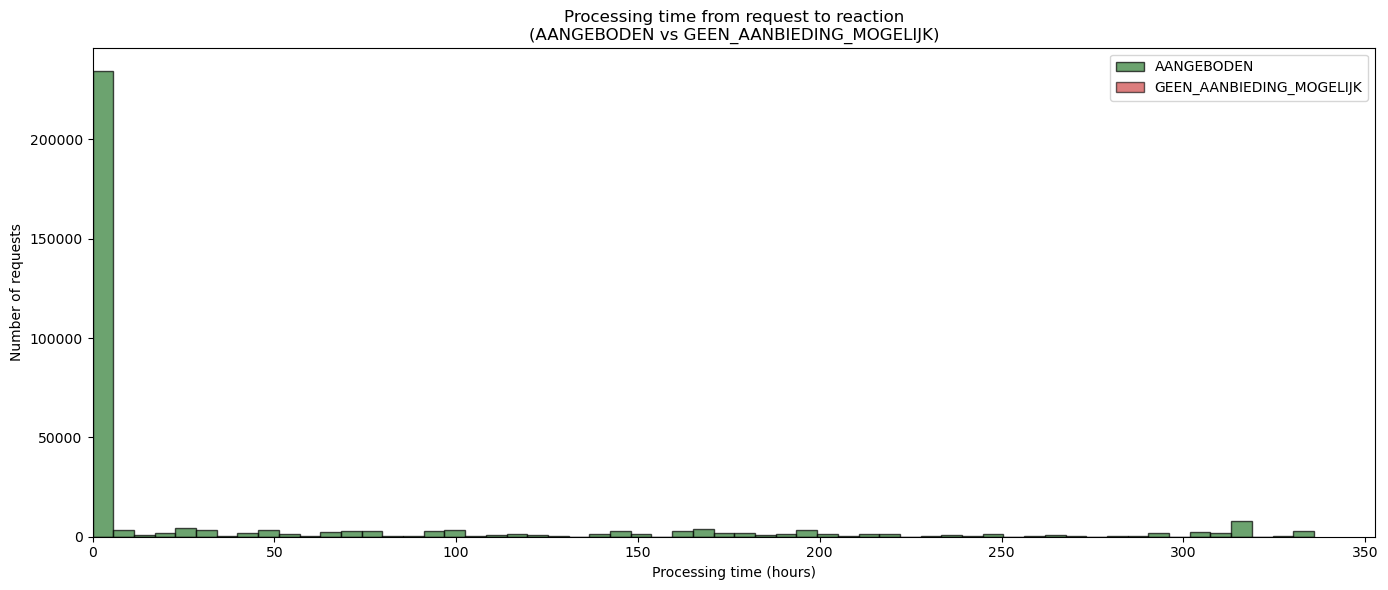

C:\Users\quint\AppData\Local\Temp\ipykernel_9164\2559805044.py:139: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=["AANGEBODEN", "GEEN_AANBIEDING_MOGELIJK"], showfliers=False)


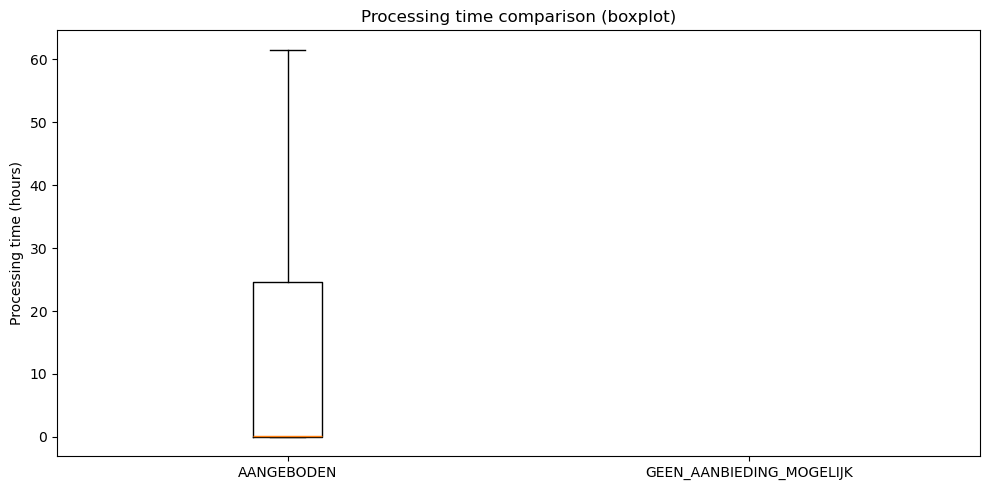

C:\Users\quint\AppData\Local\Temp\ipykernel_9164\2559805044.py:148: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tbl = df.groupby(["_proc_bin", TARGET]).size().rename("n").reset_index()


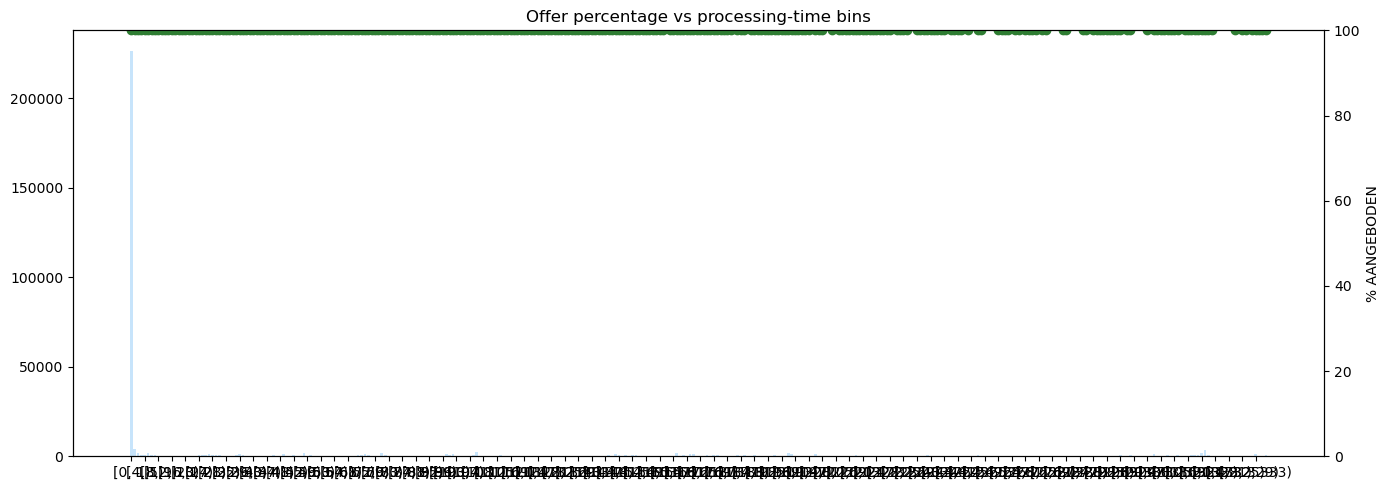

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# ================== CONFIG ==================
IN_FILE = "sherlock-export-cm-orders_dag-2022-12-11-2025-09-08.csv"  # raw dataset
OUT_DIR = Path("plots_processing_times"); OUT_DIR.mkdir(exist_ok=True, parents=True)
OUT_CSV = "processing_times_filtered.csv"

CHUNK = 200_000                 # adjust if needed
MAX_HOURS = 24 * 14             # keep deltas in [0 .. 14 days] to trim outliers

TARGET = "Reactie_type"
KEEP_TYPES = {"AANGEBODEN", "GEEN_AANBIEDING_MOGELIJK"}

# Try multiple delimiters/encodings if needed
SEPS = [None, ",", ";", "\t"]   # None => python engine sniff
ENCS = [None, "latin1", "utf-16", "utf-8-sig"]
# ===========================================

def find_col(cols, candidates):
    low = {c.lower(): c for c in cols}
    for cand in candidates:
        if cand.lower() in low:
            return low[cand.lower()]
    return None

def chunk_reader(path):
    last_err = None
    for enc in ENCS:
        for sep in SEPS:
            try:
                kwargs = dict(chunksize=CHUNK, low_memory=True, on_bad_lines="skip")
                if sep is None:
                    kwargs.update(engine="python", sep=None)  # sniff
                else:
                    kwargs.update(sep=sep)
                if enc:
                    kwargs.update(encoding=enc)
                # try one small read to validate
                test_iter = pd.read_csv(path, nrows=1000, **{k:v for k,v in kwargs.items() if k!="chunksize"})
                # if that succeeded, return the real iterator
                return pd.read_csv(path, **kwargs)
            except Exception as e:
                last_err = e
                continue
    raise RuntimeError(f"Failed to open CSV with fallbacks. Last error: {last_err}")

# --------- PASS: stream, filter, compute delta, write tidy CSV ----------
first = True
total_kept = 0

for ch in chunk_reader(IN_FILE):
    # strip header whitespace once
    ch.columns = [c.strip() for c in ch.columns]

    col_req = find_col(ch.columns, ["Aanvraag_Indienmoment", "Aanvraag_indienmoment", "aanvraag_indienmoment"])
    col_rsp = find_col(ch.columns, ["Reactie_Moment", "Reactie_moment", "reactie_moment"])
    col_rt  = find_col(ch.columns, [TARGET])

    if not (col_req and col_rsp and col_rt):
        # skip chunks that don’t have the needed trio
        continue

    # Filter to the two classes we care about
    ch[col_rt] = ch[col_rt].astype(str).str.strip().str.upper()
    ch = ch[ch[col_rt].isin({t.upper() for t in KEEP_TYPES})]
    if ch.empty:
        continue

    # Parse datetimes (robust to 'YYYY-MM-DD HH:MM:SS' and similar)
    req_dt = pd.to_datetime(ch[col_req], errors="coerce", infer_datetime_format=True)
    rsp_dt = pd.to_datetime(ch[col_rsp], errors="coerce", infer_datetime_format=True)

    # Compute processing time in hours
    delta_h = (rsp_dt - req_dt).dt.total_seconds() / 3600.0
    ch = ch.assign(processing_hours=delta_h)

    # Keep only sane positive deltas within MAX_HOURS
    m = ch["processing_hours"].between(0, MAX_HOURS)
    ch = ch.loc[m, [col_req, col_rsp, col_rt, "processing_hours"]]
    if ch.empty:
        continue

    # Write/append to tidy CSV
    if first:
        ch.to_csv(OUT_CSV, index=False, mode="w")
        first = False
    else:
        ch.to_csv(OUT_CSV, index=False, mode="a", header=False)
    total_kept += len(ch)

print(f"[OK] Wrote {total_kept} rows to {Path(OUT_CSV).resolve()}")

# --------- LOAD tidy CSV (small subset of columns) & VISUALIZE ----------
df = pd.read_csv(OUT_CSV, low_memory=False)
df[TARGET] = df[TARGET].astype(str).str.upper().str.strip()

# Summary stats per class
def stats(s):
    return pd.Series({
        "n": len(s),
        "mean_h": s.mean(),
        "median_h": s.median(),
        "p90_h": s.quantile(0.90),
        "p95_h": s.quantile(0.95),
        "min_h": s.min(),
        "max_h": s.max(),
    })

summary = df.groupby(TARGET)["processing_hours"].apply(stats).reset_index()
print("\n=== Processing time summary (hours) ===")
print(summary.to_string(index=False))

# Overlay histogram (green vs red), same bins, axis starts at 0
bins = np.linspace(0, min(MAX_HOURS, df["processing_hours"].max()), 60)  # 60 bins across the observed range

plt.figure(figsize=(14,6))
# AANGEBODEN
mask_pos = df[TARGET].eq("AANGEBODEN")
plt.hist(df.loc[mask_pos, "processing_hours"], bins=bins, alpha=0.7, label="AANGEBODEN", color="#2E7D32", edgecolor="black")
# GEEN_AANBIEDING_MOGELIJK
mask_neg = df[TARGET].eq("GEEN_AANBIEDING_MOGELIJK")
plt.hist(df.loc[mask_neg, "processing_hours"], bins=bins, alpha=0.6, label="GEEN_AANBIEDING_MOGELIJK", color="#C62828", edgecolor="black")

plt.xlabel("Processing time (hours)")
plt.ylabel("Number of requests")
plt.title("Processing time from request to reaction\n(AANGEBODEN vs GEEN_AANBIEDING_MOGELIJK)")
plt.xlim(left=0)  # ensure x-axis starts at 0
plt.legend()
plt.tight_layout()
plt.savefig(OUT_DIR / "processing_time_hist_overlay.png", dpi=150)
plt.show()

# Boxplot comparison
plt.figure(figsize=(10,5))
data = [df.loc[mask_pos, "processing_hours"].values, df.loc[mask_neg, "processing_hours"].values]
plt.boxplot(data, labels=["AANGEBODEN", "GEEN_AANBIEDING_MOGELIJK"], showfliers=False)
plt.ylabel("Processing time (hours)")
plt.title("Processing time comparison (boxplot)")
plt.tight_layout()
plt.savefig(OUT_DIR / "processing_time_boxplot.png", dpi=150)
plt.show()

# Percentage offered per hour bucket of processing time (extra view)
df["_proc_bin"] = pd.cut(df["processing_hours"], bins=np.arange(0, MAX_HOURS+1, 1), right=False)
tbl = df.groupby(["_proc_bin", TARGET]).size().rename("n").reset_index()
pivot = tbl.pivot(index="_proc_bin", columns=TARGET, values="n").fillna(0)
if "AANGEBODEN" not in pivot.columns:
    pivot["AANGEBODEN"] = 0
pivot["total"] = pivot.sum(axis=1)
pivot["pct_offered"] = np.where(pivot["total"]>0, 100*pivot["AANGEBODEN"]/pivot["total"], np.nan)

plt.figure(figsize=(14,5))
x = np.arange(len(pivot))
plt.bar(x, pivot["total"].values, color="#90CAF9", alpha=0.5, label="Total (per hour bin)")
ax2 = plt.gca().twinx()
ax2.plot(x, pivot["pct_offered"].values, color="#2E7D32", marker="o", linewidth=1.5, label="% AANGEBODEN")
plt.xticks(x[::4], [str(c) for c in pivot.index][::4], rotation=45, ha="right")
plt.title("Offer percentage vs processing-time bins")
plt.xlabel("Processing time bin (hours)")
plt.gca().set_ylabel("Total count")
ax2.set_ylabel("% AANGEBODEN")
ax2.set_ylim(0, 100)
plt.tight_layout()
plt.savefig(OUT_DIR / "processing_time_offer_rate_vs_bins.png", dpi=150)
plt.show()


C:\Users\quint\AppData\Local\Temp\ipykernel_3408\2796945676.py:74: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  _FALLBACK_CYCLE = itertools.cycle(cm.get_cmap("tab20").colors)
C:\Users\quint\AppData\Local\Temp\ipykernel_3408\2796945676.py:132: DtypeWarning: Columns (7,25,27,29,31,42,56,63,64,65) have mixed types. Specify dtype option on import or set low_memory=False.
  for ch in stream:
C:\Users\quint\AppData\Local\Temp\ipykernel_3408\2796945676.py:150: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dt = pd.to_datetime(ch[col_resp], errors="coerce", infer_datetime_format=True)
C:\Users\quint\AppD

Fallback kleuren voor (niet in COLOR_MAP): ['VIGERENDE_AANBIEDING']


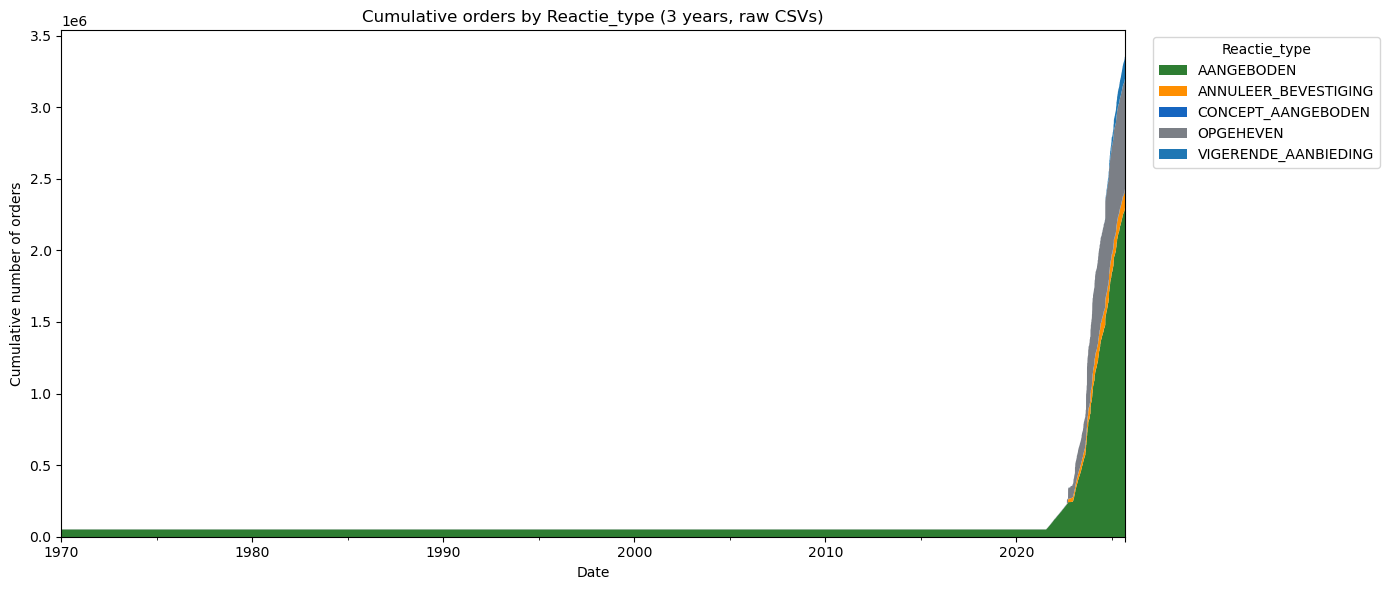

[OK] Saved plots_raw_cumulative\cum_orders_by_reactie_type.png


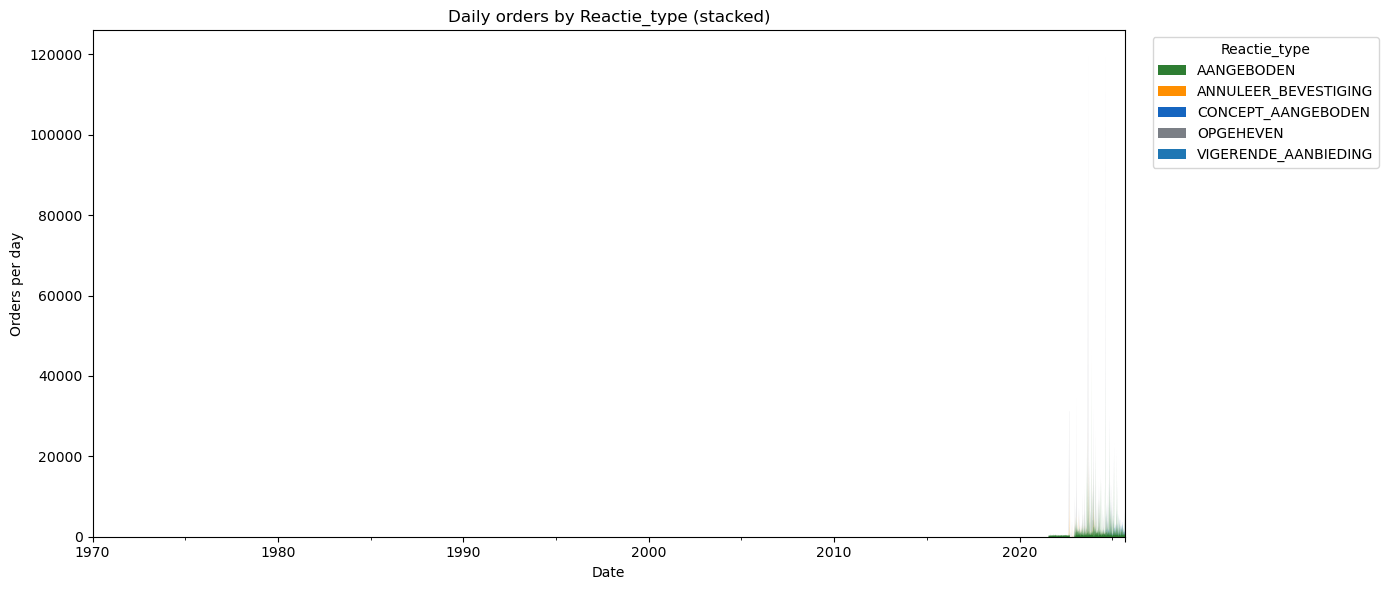

[OK] Saved plots_raw_cumulative\daily_orders_by_reactie_type.png


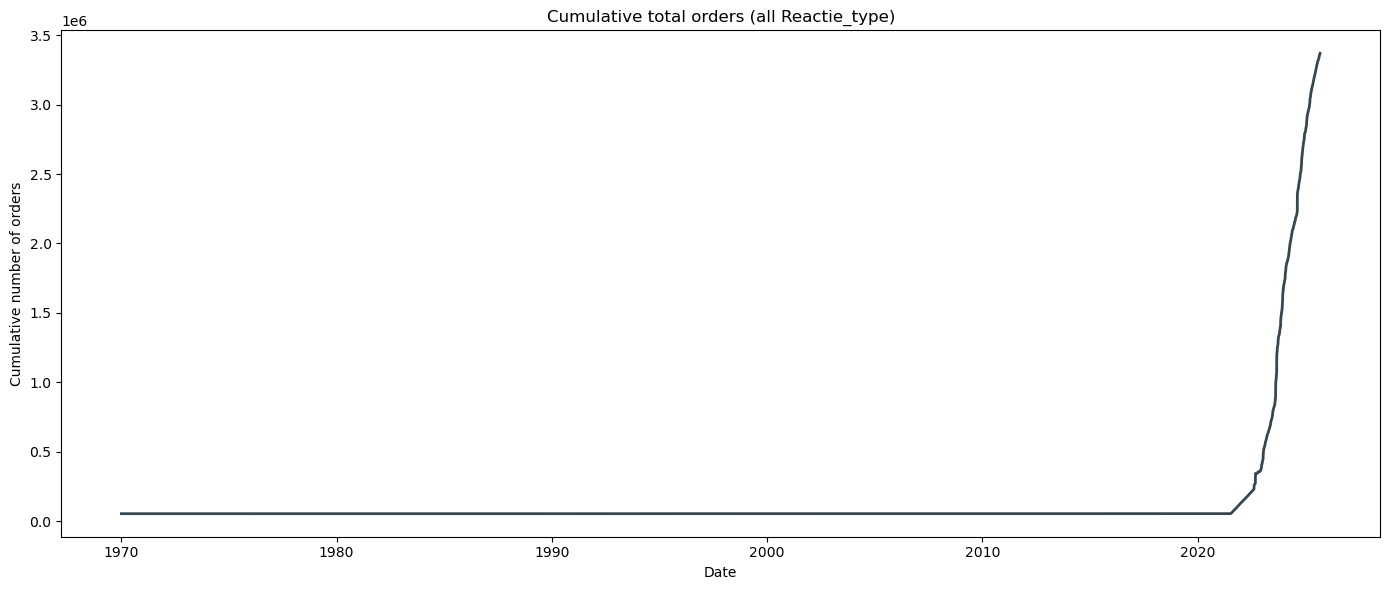

[OK] Saved plots_raw_cumulative\cum_total_orders.png


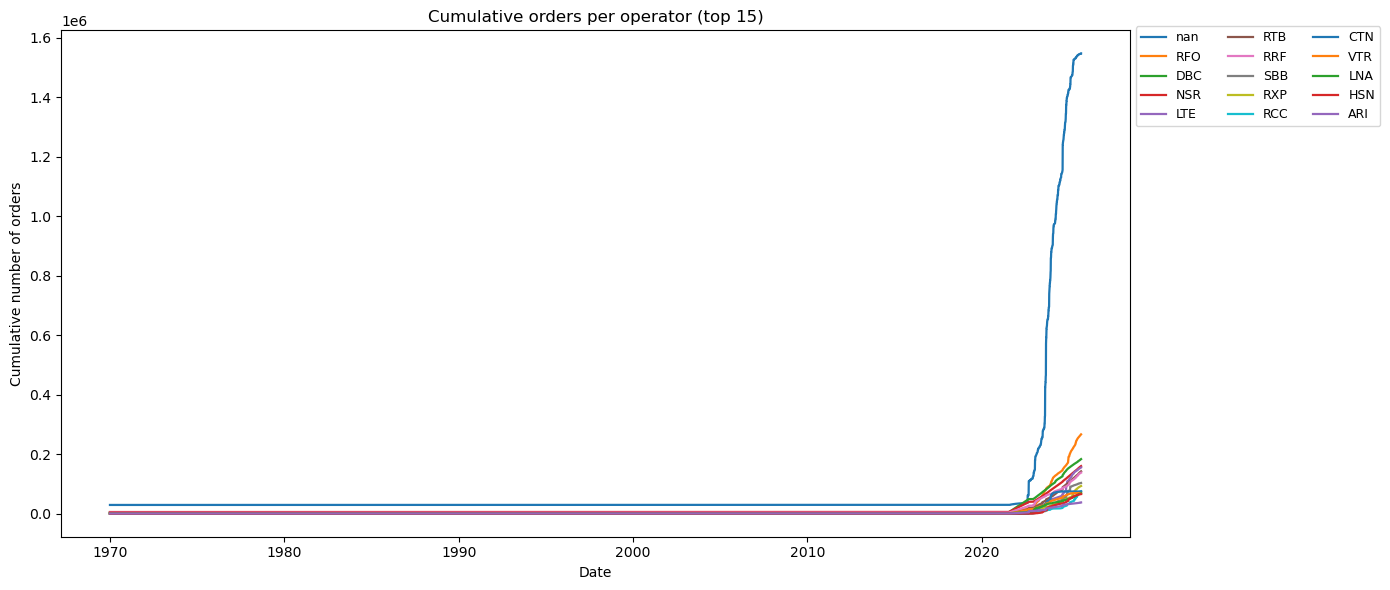

[OK] Saved plots_raw_cumulative\cum_orders_per_operator_topN.png


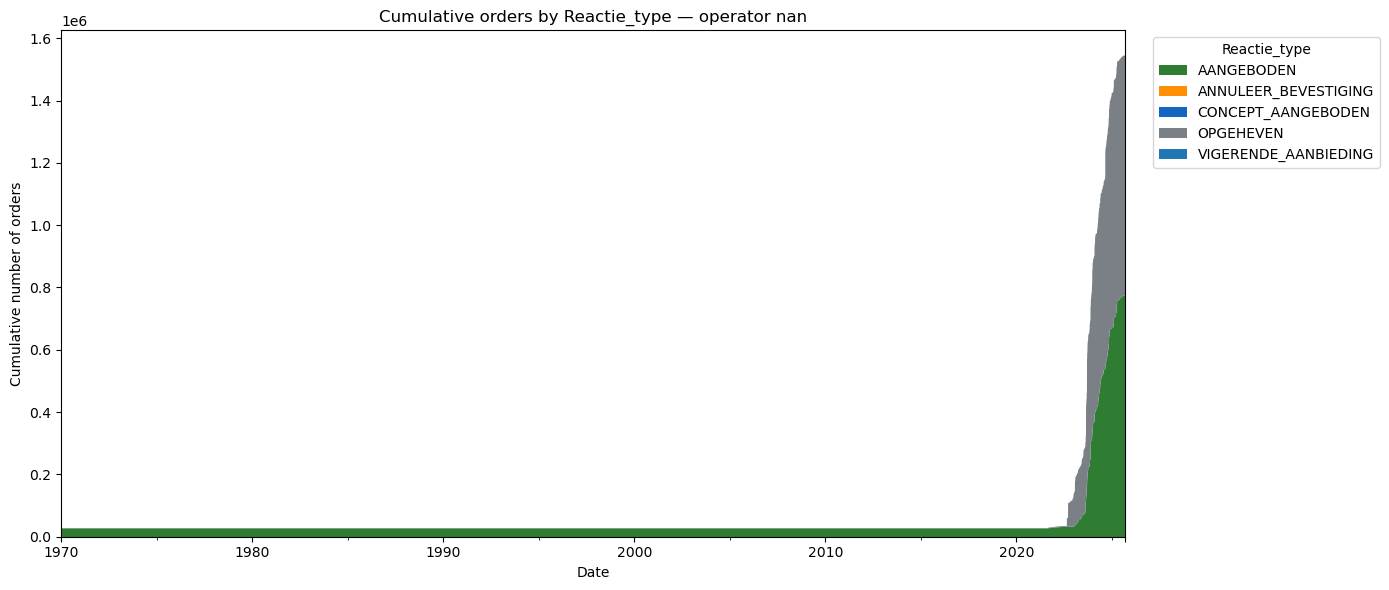

[OK] Saved plots_raw_cumulative\cum_orders_by_reactie_type__operator_nan.png


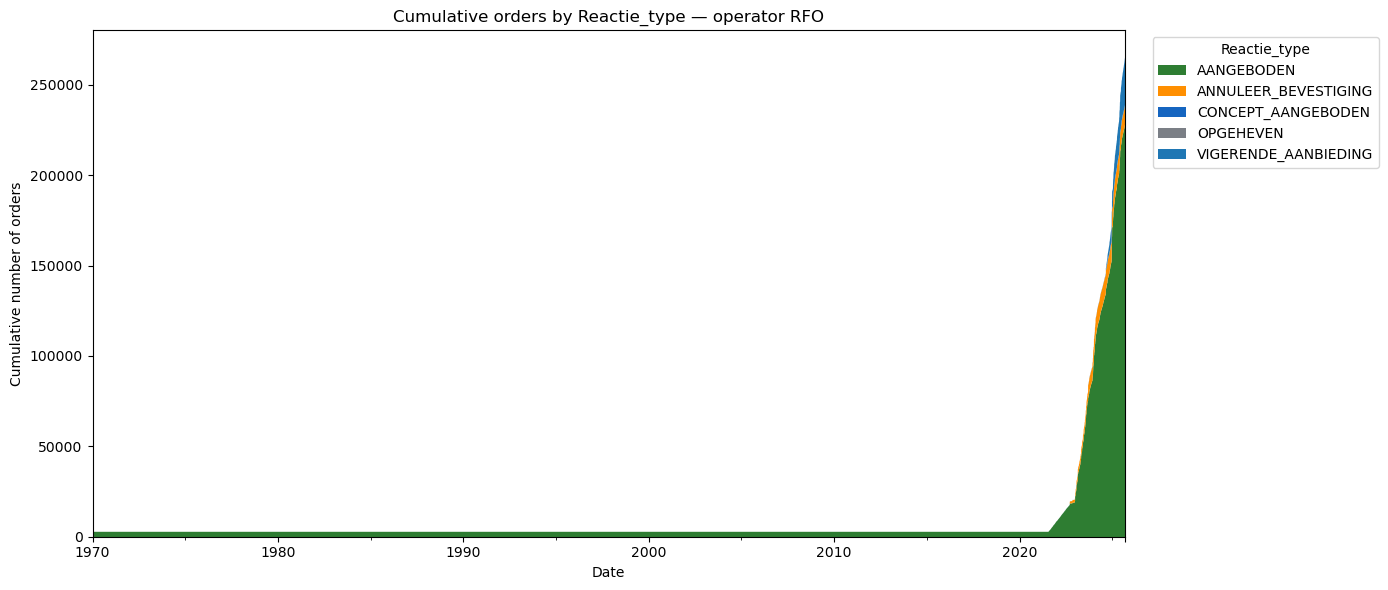

[OK] Saved plots_raw_cumulative\cum_orders_by_reactie_type__operator_RFO.png


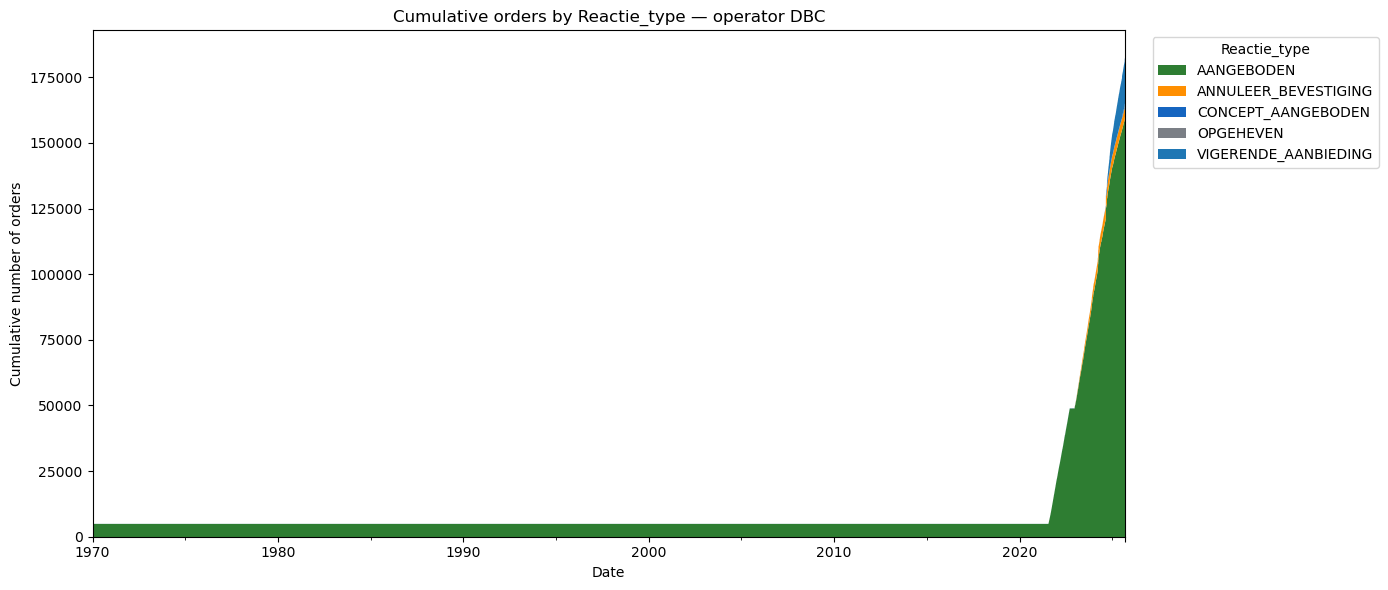

[OK] Saved plots_raw_cumulative\cum_orders_by_reactie_type__operator_DBC.png


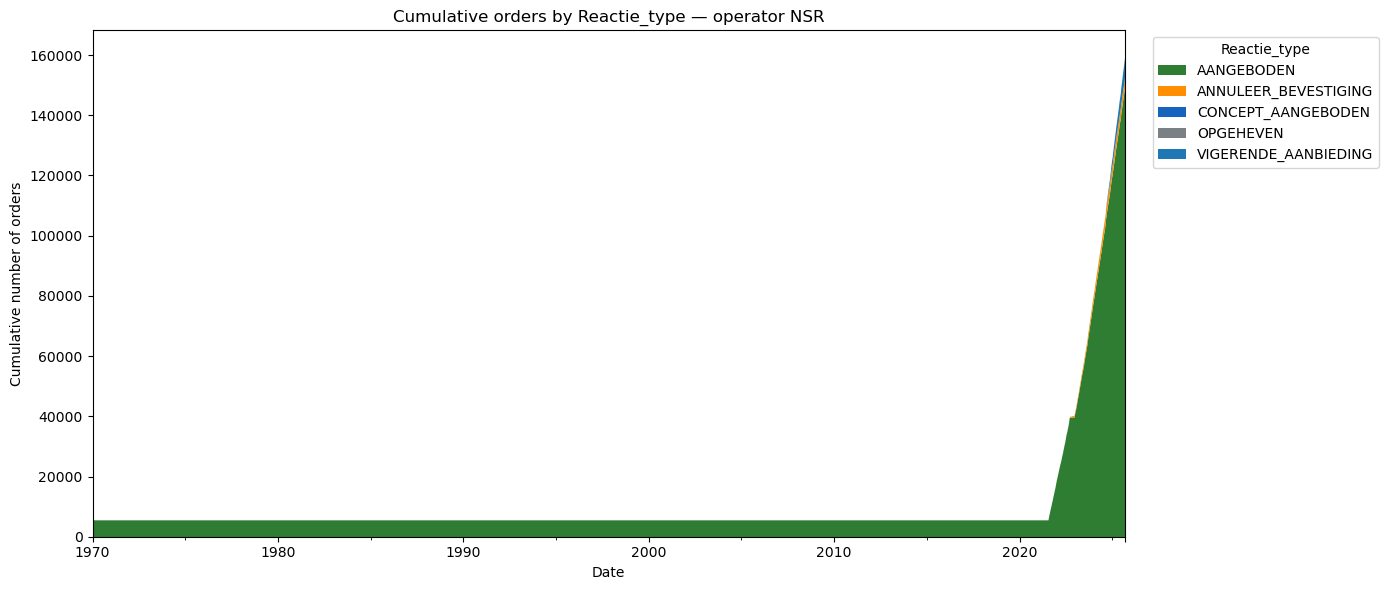

[OK] Saved plots_raw_cumulative\cum_orders_by_reactie_type__operator_NSR.png


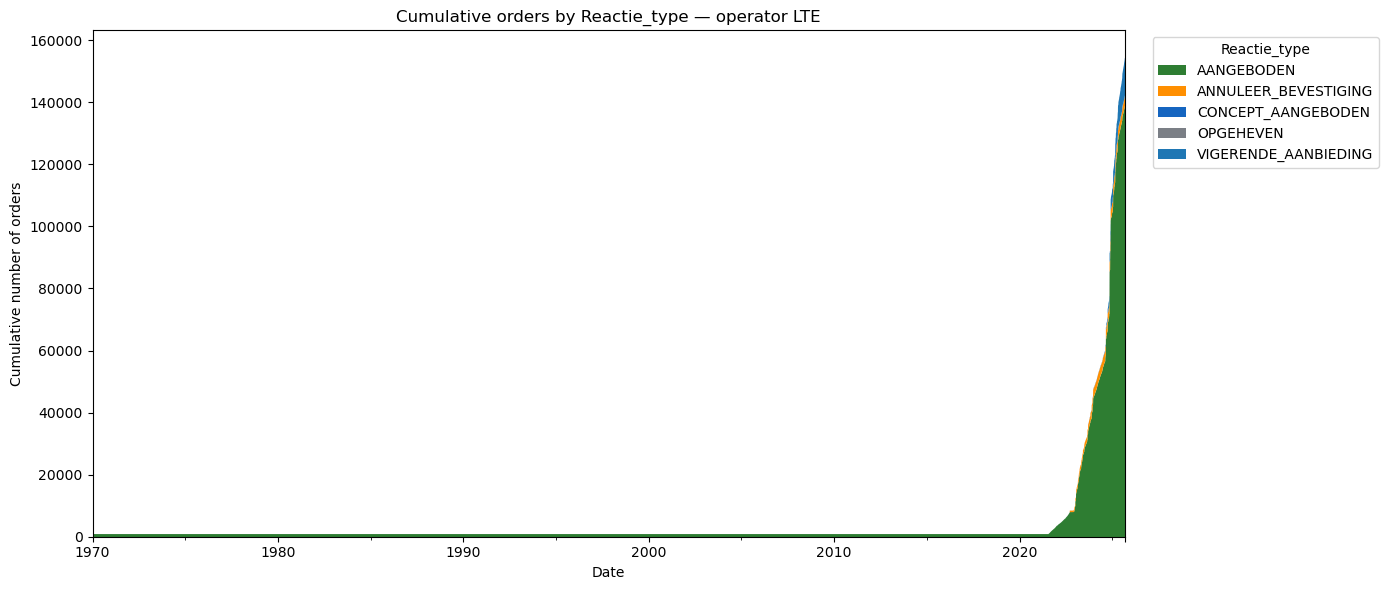

[OK] Saved plots_raw_cumulative\cum_orders_by_reactie_type__operator_LTE.png


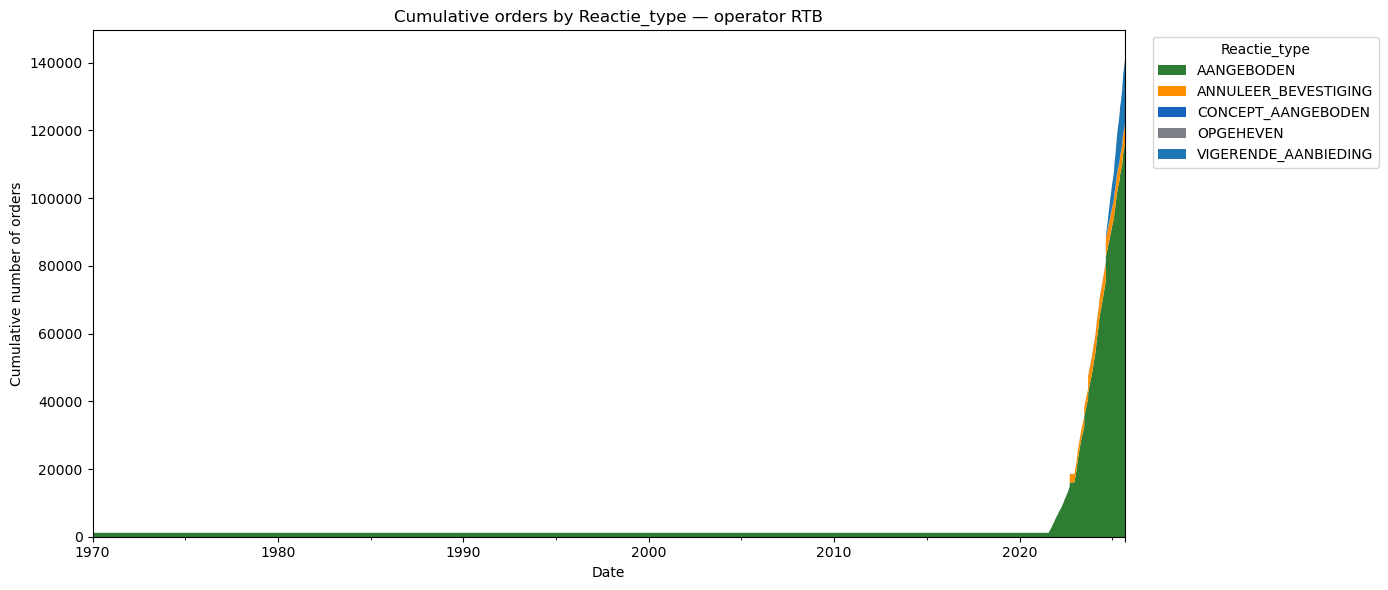

[OK] Saved plots_raw_cumulative\cum_orders_by_reactie_type__operator_RTB.png


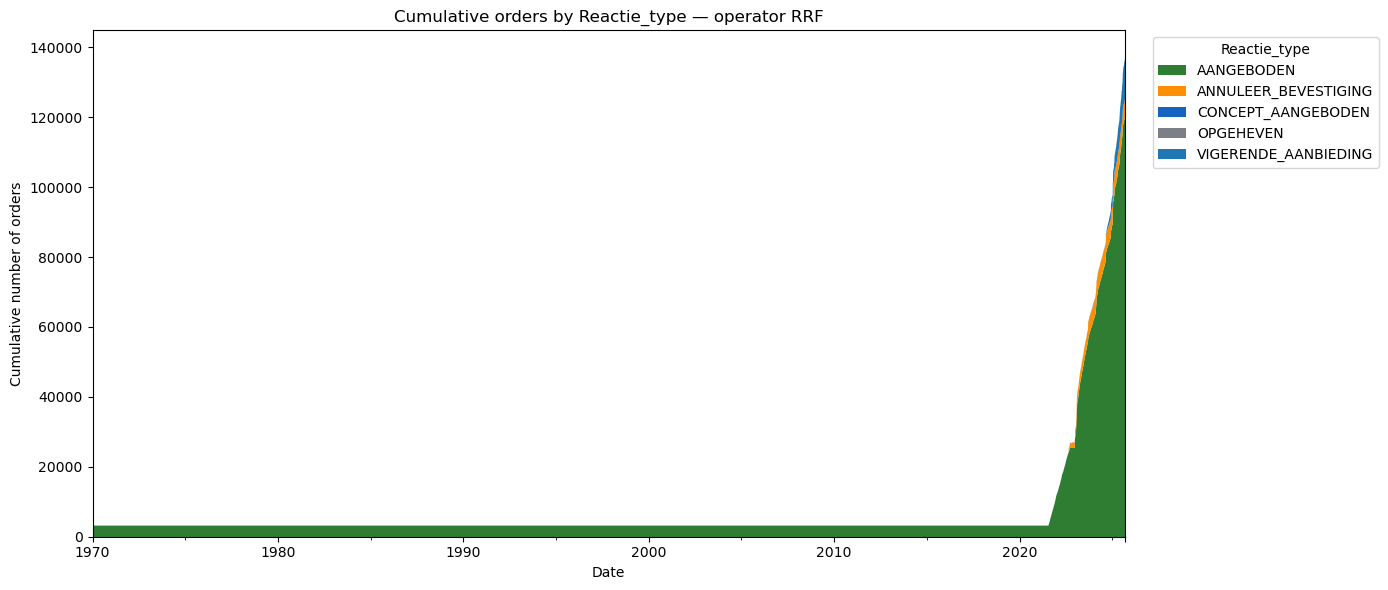

[OK] Saved plots_raw_cumulative\cum_orders_by_reactie_type__operator_RRF.png


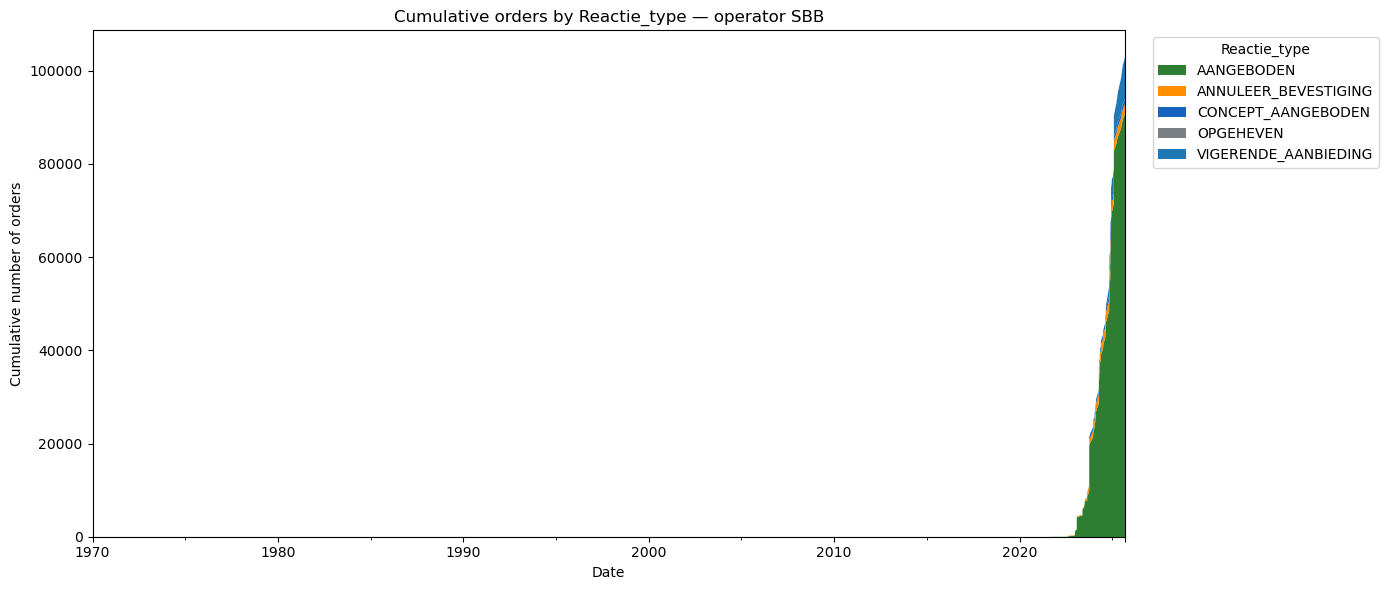

[OK] Saved plots_raw_cumulative\cum_orders_by_reactie_type__operator_SBB.png


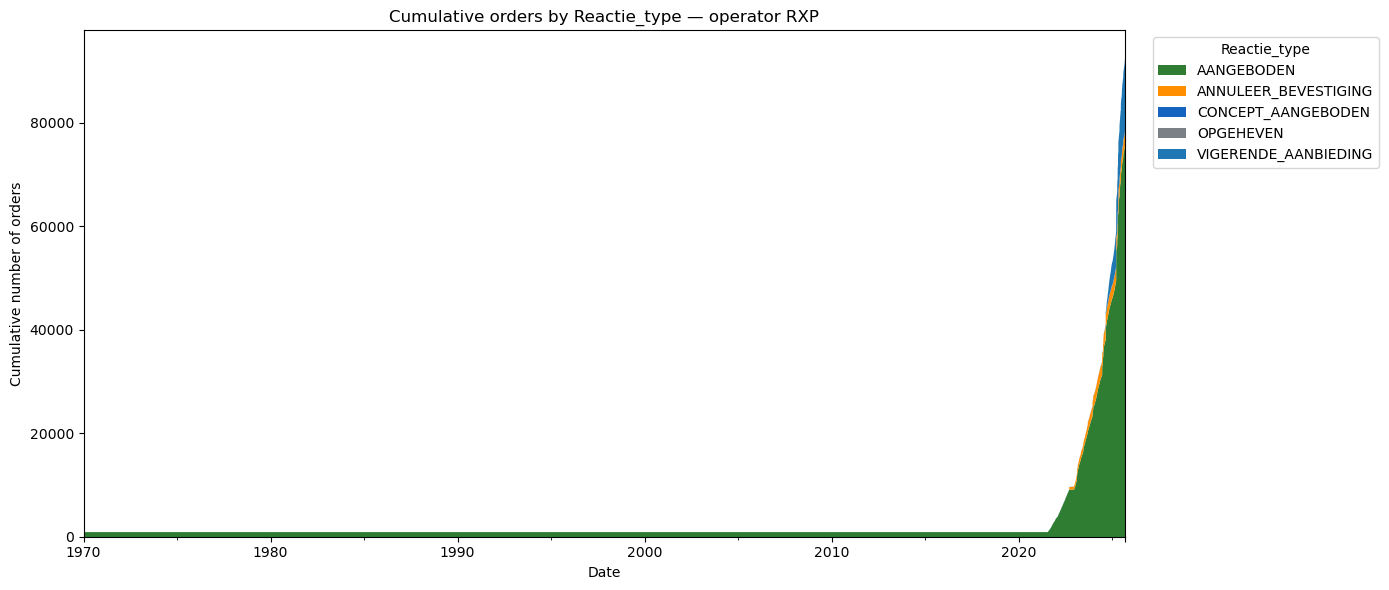

[OK] Saved plots_raw_cumulative\cum_orders_by_reactie_type__operator_RXP.png


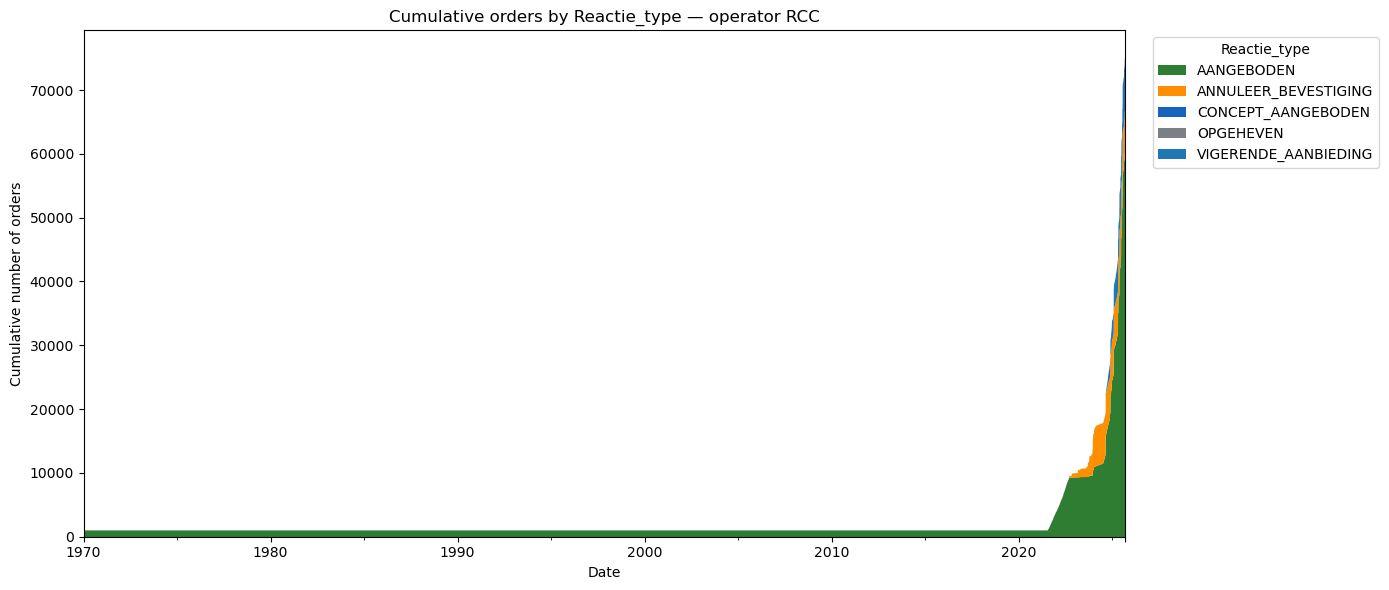

[OK] Saved plots_raw_cumulative\cum_orders_by_reactie_type__operator_RCC.png


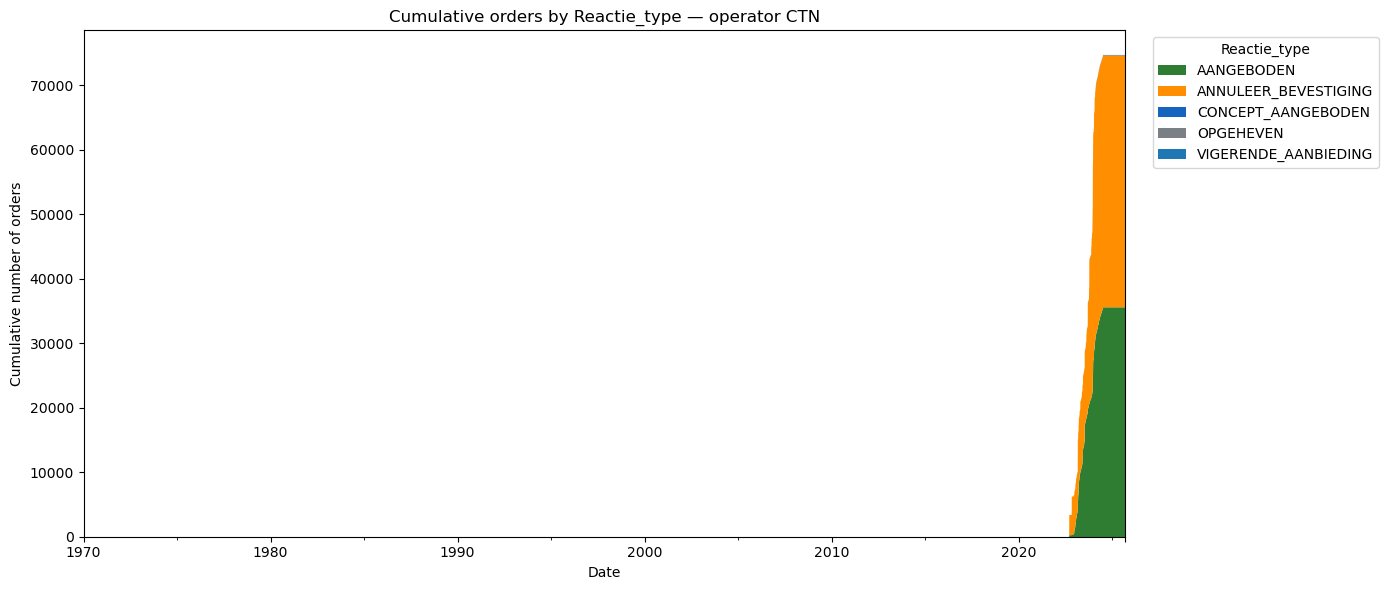

[OK] Saved plots_raw_cumulative\cum_orders_by_reactie_type__operator_CTN.png


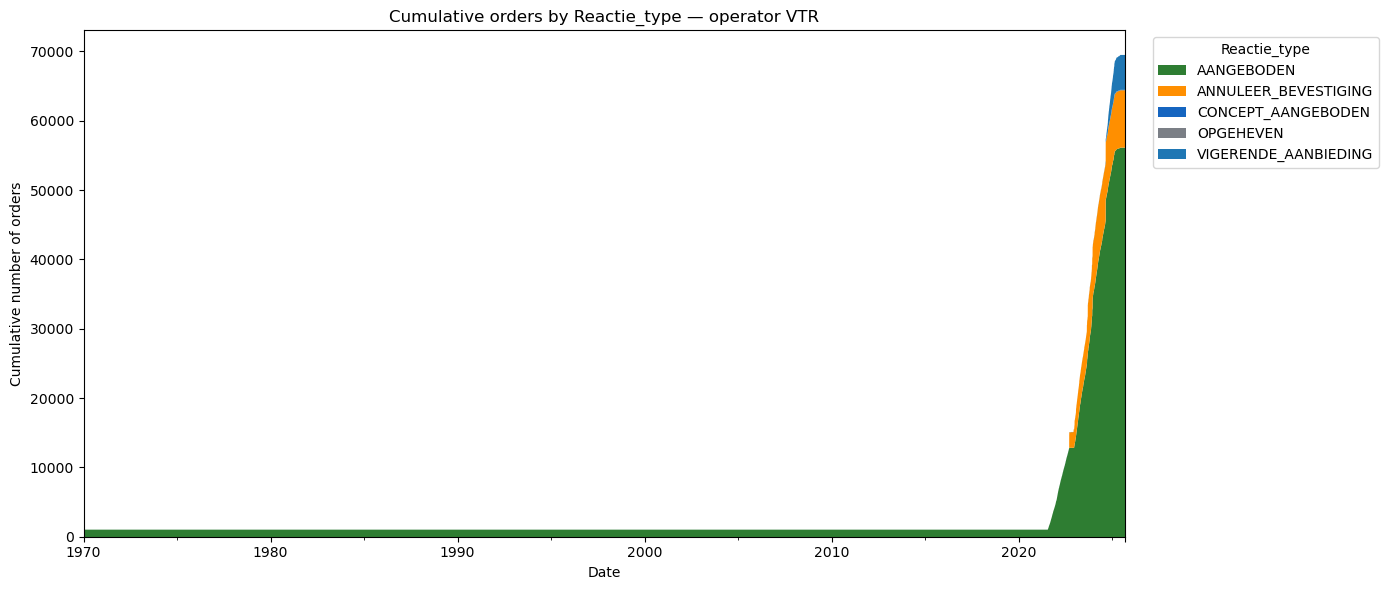

[OK] Saved plots_raw_cumulative\cum_orders_by_reactie_type__operator_VTR.png


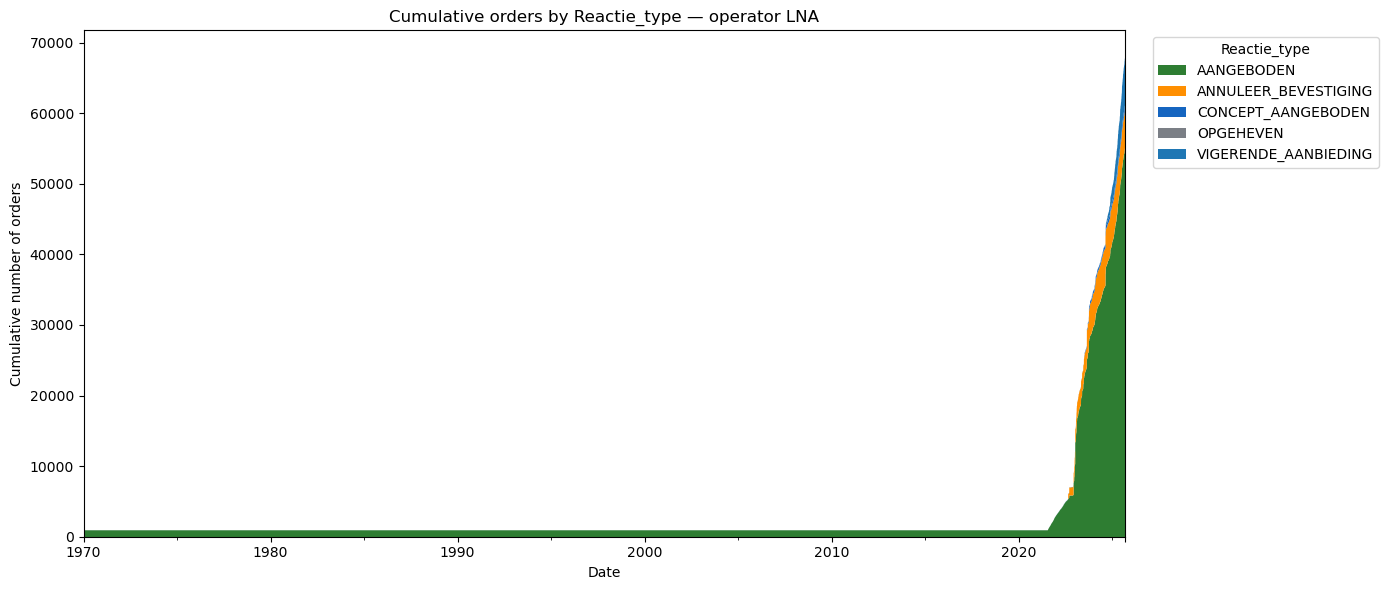

[OK] Saved plots_raw_cumulative\cum_orders_by_reactie_type__operator_LNA.png


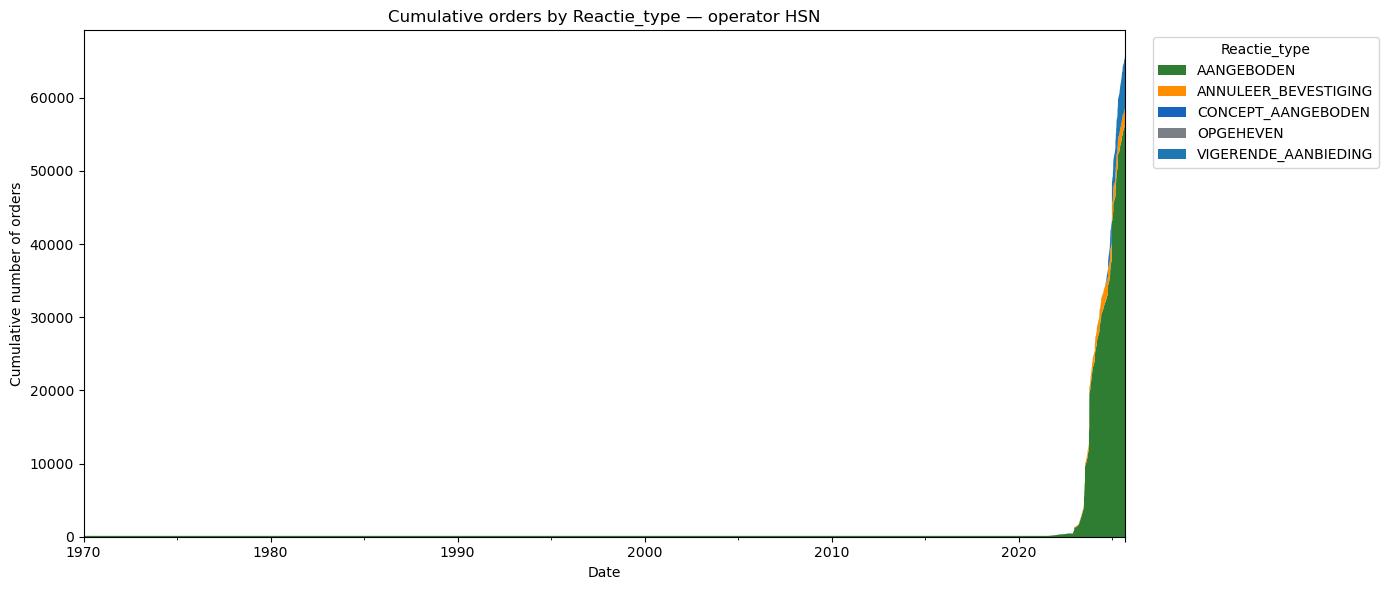

[OK] Saved plots_raw_cumulative\cum_orders_by_reactie_type__operator_HSN.png


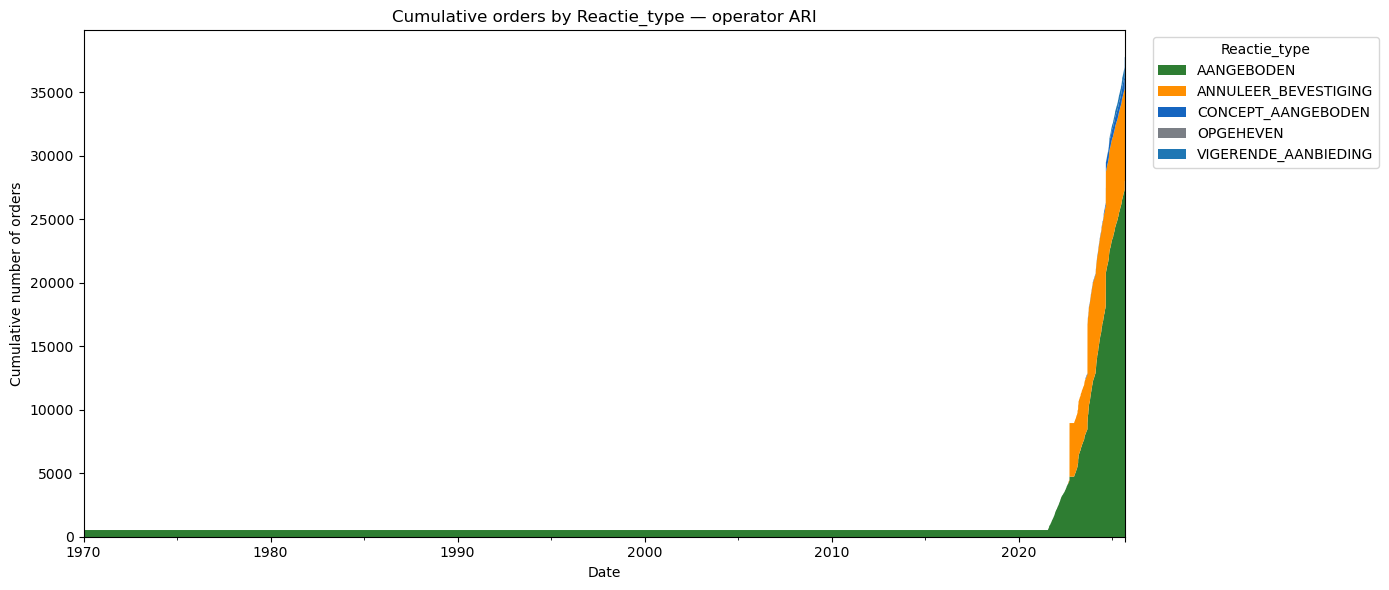

[OK] Saved plots_raw_cumulative\cum_orders_by_reactie_type__operator_ARI.png

[Done] Tabellen -> C:\Users\quint\Downloads\plots_raw_cumulative\tables
      Grafieken -> C:\Users\quint\Downloads\plots_raw_cumulative


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from collections import defaultdict, Counter
import itertools
from matplotlib import cm

# ================== CONFIG ==================
BASE_DIR = Path("OneDrive_1_8-10-2025")
FILES = [
    BASE_DIR / "sherlock-export-cm-orders_dag-2022-12-11-2023-12-09.csv",
    BASE_DIR / "sherlock-export-cm-orders_dag-2023-12-10-2024-12-14.csv",
    BASE_DIR / "sherlock-export-cm-orders_dag-2024-12-15-2025-09-09.csv",
]

OUT_DIR = Path("plots_raw_cumulative"); OUT_DIR.mkdir(exist_ok=True, parents=True)
OUT_CSV_DIR = OUT_DIR / "tables"; OUT_CSV_DIR.mkdir(exist_ok=True, parents=True)

CHUNK = 200_000           # chunkgrootte voor streamen
DATE_FREQ = "D"           # dagresolutie
MIN_OP_SHOW = 1000        # min #orders om operator in top-plot te tonen
TOP_N_OPS   = 15          # max #operators in top-plot

# Consistente kleuren (uppercase sleutels)
COLOR_MAP = {
    "AANGEBODEN":               "#2E7D32",  # groen
    "GEEN_AANBIEDING_MOGELIJK": "#C62828",  # rood
    "AFWIJZING":                "#6A1B9A",  # paars
    "ANNULEER_BEVESTIGING":     "#FF8F00",  # amber
    "CONCEPT_AANGEBODEN":       "#1565C0",  # blauw
    "OPGEHEVEN":                "#7B7F86",  # grijs
}
# ===========================================

# ---------- Helpers ----------
SEPS = [None, ",", ";", "\t"]
ENCS = [None, "utf-8-sig", "latin1", "utf-16"]

def find_col(cols, candidates):
    """Case-insensitive kolomvinder (stript spaties)."""
    low = {c.strip().lower(): c for c in cols}
    for cand in candidates:
        key = str(cand).strip().lower()
        if key in low:
            return low[key]
    return None

def open_csv_stream(path: Path):
    """Probeer verschillende encodings/separators; retourneer chunked iterator."""
    last_err = None
    for enc in ENCS:
        for sep in SEPS:
            try:
                if sep is None:
                    # engine='python' kan delimiter sniffen
                    _probe = pd.read_csv(path, nrows=500, engine="python")
                    stream = pd.read_csv(path, chunksize=CHUNK, engine="python")
                else:
                    _probe = pd.read_csv(path, nrows=500, sep=sep, encoding=enc)
                    stream = pd.read_csv(path, chunksize=CHUNK, sep=sep, encoding=enc)
                _ = _probe.columns  # minimale check
                return stream
            except Exception as e:
                last_err = e
                continue
    raise RuntimeError(f"Kon {path} niet openen. Laatste fout: {last_err}")

# Canonicaliseren en kleuren (geen KeyErrors meer)
def _canon(label: str) -> str:
    return str(label).strip().upper()

_COLOR_BOOK = {}  # canon_label -> color (ook voor onbekenden)
_FALLBACK_CYCLE = itertools.cycle(cm.get_cmap("tab20").colors)

def get_color(label):
    canon = _canon(label)
    if canon in COLOR_MAP:
        _COLOR_BOOK.setdefault(canon, COLOR_MAP[canon])  # cache vaste kleur
        return COLOR_MAP[canon]
    if canon not in _COLOR_BOOK:
        _COLOR_BOOK[canon] = next(_FALLBACK_CYCLE)       # stabiele fallback
    return _COLOR_BOOK[canon]

def plot_stacked_area(df, title, outfile, ylabel="Cumulative orders"):
    if df is None or df.empty:
        print(f"[WARN] Geen data voor plot: {title}")
        return
    # kleuren per kolom
    cols = list(df.columns)
    colors = [get_color(c) for c in cols]

    plt.figure(figsize=(14,6))
    ax = plt.gca()
    df.plot.area(ax=ax, color=colors, linewidth=0)
    ax.set_title(title)
    ax.set_xlabel("Date")
    ax.set_ylabel(ylabel)
    ax.legend(title="Reactie_type", bbox_to_anchor=(1.02,1), loc="upper left")
    plt.tight_layout()
    out = OUT_DIR / outfile
    plt.savefig(out, dpi=150)
    plt.show()
    print(f"[OK] Saved {out}")

def plot_lines(df, title, outfile, ylabel="Cumulative orders"):
    if df is None or df.empty:
        print(f"[WARN] Geen data voor plot: {title}")
        return
    plt.figure(figsize=(14,6))
    for col in df.columns:
        plt.plot(df.index, df[col].values, label=str(col), linewidth=1.6)
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel(ylabel)
    plt.legend(ncol=3, fontsize=9, bbox_to_anchor=(1.0,1.02), loc="upper left")
    plt.tight_layout()
    out = OUT_DIR / outfile
    plt.savefig(out, dpi=150)
    plt.show()
    print(f"[OK] Saved {out}")

# ---------- Accumulators ----------
daily_by_rt = defaultdict(Counter)            # date -> Counter({reactie_type: n})
daily_by_op_rt = defaultdict(lambda: Counter())  # (date, operator) -> Counter({reactie_type: n})
op_totals_rt = defaultdict(Counter)           # operator -> Counter({reactie_type: n})
all_dates = []

# ---------- Stream alle bestanden ----------
for file in FILES:
    stream = open_csv_stream(file)
    for ch in stream:
        # kolomnamen schoonmaken
        ch.columns = [c.strip() for c in ch.columns]

        col_rt   = find_col(ch.columns, ["Reactie_type", "reactie_type"])
        col_resp = find_col(ch.columns, ["Reactie_Moment", "reactie_moment"])
        col_req  = find_col(ch.columns, ["Aanvraag_Indienmoment", "aanvraag_indienmoment"])
        col_op   = find_col(ch.columns, ["Aanvrager_Verkorting", "Aanvraag_vervoerder_verkorting"])

        if col_rt is None or (col_resp is None and col_req is None):
            continue

        # normaliseer reactie_type
        ch[col_rt] = ch[col_rt].astype(str).str.strip()

        # datum: voorkeur Reactie_Moment; fallback Aanvraag_Indienmoment
        dt = None
        if col_resp:
            dt = pd.to_datetime(ch[col_resp], errors="coerce", infer_datetime_format=True)
        if dt is None or dt.isna().all():
            dt = pd.to_datetime(ch[col_req], errors="coerce", infer_datetime_format=True)

        ch["_date"] = dt.dt.floor(DATE_FREQ)
        ch = ch.dropna(subset=["_date", col_rt])

        # operator
        if col_op:
            op = ch[col_op].astype(str).str.strip()
        else:
            op = pd.Series(["(onbekend)"] * len(ch), index=ch.index)

        # Dagelijkse tellingen per Reactie_type
        grp = ch.groupby(["_date", col_rt]).size().rename("n")
        for (d, r), n in grp.items():
            daily_by_rt[d][r] += int(n)

        # Dag x operator x reactie
        grp2 = ch.groupby(["_date", op, col_rt]).size().rename("n")
        for (d, o, r), n in grp2.items():
            daily_by_op_rt[(d, o)][r] += int(n)
            op_totals_rt[o][r] += int(n)

        all_dates.extend(ch["_date"].dropna().tolist())

# ---------- DataFrames bouwen ----------
if not all_dates:
    raise RuntimeError("Geen datums gevonden – controleer de kolomnamen in de CSV's.")

date_index = pd.date_range(min(all_dates), max(all_dates), freq=DATE_FREQ)

# Verzamel alle reactie_type labels, gecanoniseerd
all_reacties_raw = {r for cnt in daily_by_rt.values() for r in cnt.keys()}
all_reacties = sorted({_canon(r) for r in all_reacties_raw})

# Dag x Reactie_type matrix (gecanoniseerde kolomnamen)
daily_rt_df = pd.DataFrame(0, index=date_index, columns=all_reacties, dtype=int)
for d, cnt in daily_by_rt.items():
    if d in daily_rt_df.index:
        for r, n in cnt.items():
            daily_rt_df.at[d, _canon(r)] += n

# Cumulatief
cum_rt_df = daily_rt_df.cumsum()

# Dag totalen en cumulatief totaal
daily_total = daily_rt_df.sum(axis=1)
cum_total = daily_total.cumsum()

# Operator totalen (rangschikking)
op_total_all = pd.Series({o: sum(cnt.values()) for o, cnt in op_totals_rt.items()}).sort_values(ascending=False)
top_ops = op_total_all[op_total_all >= MIN_OP_SHOW].head(TOP_N_OPS).index.tolist()
if not top_ops:
    top_ops = op_total_all.head(TOP_N_OPS).index.tolist()

# Dag x Operator (alle reacties samen) voor top operators
daily_op_total = pd.DataFrame(0, index=date_index, columns=top_ops, dtype=int)
for (d, o), cnt in daily_by_op_rt.items():
    if o in top_ops and d in daily_op_total.index:
        daily_op_total.at[d, o] += sum(cnt.values())
cum_op_total = daily_op_total.cumsum()

# ---------- Export tabellen ----------
daily_rt_df.to_csv(OUT_CSV_DIR / "daily_counts_by_reactie_type.csv")
cum_rt_df.to_csv(OUT_CSV_DIR / "cumulative_counts_by_reactie_type.csv")
daily_op_total.to_csv(OUT_CSV_DIR / "daily_counts_top_operators_all_reacties.csv")
cum_op_total.to_csv(OUT_CSV_DIR / "cumulative_counts_top_operators_all_reacties.csv")

# Eventueel: print labels die niet in COLOR_MAP zaten (krijgen fallback)
unknown_labels = [c for c in daily_rt_df.columns if _canon(c) not in COLOR_MAP]
if unknown_labels:
    print("Fallback kleuren voor (niet in COLOR_MAP):", sorted(set(unknown_labels)))

# ---------- Grafieken ----------
# 1) Cumulatief totaal per Reactie_type (stacked area)
plot_stacked_area(
    cum_rt_df,
    "Cumulative orders by Reactie_type (3 years, raw CSVs)",
    "cum_orders_by_reactie_type.png",
    ylabel="Cumulative number of orders"
)

# 2) Dagelijkse orders per Reactie_type (stacked area, niet-cumulatief)
plot_stacked_area(
    daily_rt_df,
    "Daily orders by Reactie_type (stacked)",
    "daily_orders_by_reactie_type.png",
    ylabel="Orders per day"
)

# 3) Cumulatief totaal (alle Reactie_types samen)
plt.figure(figsize=(14,6))
plt.plot(cum_total.index, cum_total.values, color="#37474F", linewidth=2.0)
plt.title("Cumulative total orders (all Reactie_type)")
plt.xlabel("Date")
plt.ylabel("Cumulative number of orders")
plt.tight_layout()
plt.savefig(OUT_DIR / "cum_total_orders.png", dpi=150)
plt.show()
print(f"[OK] Saved {OUT_DIR/'cum_total_orders.png'}")

# 4) Cumulatieve orders per Vervoerder (top N)
plot_lines(
    cum_op_total,
    f"Cumulative orders per operator (top {len(cum_op_total.columns)})",
    "cum_orders_per_operator_topN.png",
    ylabel="Cumulative number of orders"
)

# 5) (Optioneel) Voor elke top-operator: cumulatief per Reactie_type (stacked area)
for op in cum_op_total.columns:
    # Bouw dag x reactie voor deze operator
    df_op_daily = pd.DataFrame(0, index=date_index, columns=all_reacties, dtype=int)
    for (d, o), cnt in daily_by_op_rt.items():
        if o == op and d in df_op_daily.index:
            for r, n in cnt.items():
                df_op_daily.at[d, _canon(r)] += n
    if df_op_daily.values.sum() == 0:
        continue
    df_op_cum = df_op_daily.cumsum()
    safe_name = str(op).replace("/", "-").replace("\\", "-").strip()
    plot_stacked_area(
        df_op_cum,
        f"Cumulative orders by Reactie_type — operator {op}",
        f"cum_orders_by_reactie_type__operator_{safe_name}.png",
        ylabel="Cumulative number of orders"
    )

print("\n[Done] Tabellen ->", OUT_CSV_DIR.resolve())
print("      Grafieken ->", OUT_DIR.resolve())


C:\Users\quint\AppData\Local\Temp\ipykernel_3408\1678423997.py:73: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  _FALLBACK_CYCLE = itertools.cycle(cm.get_cmap("tab20").colors)
C:\Users\quint\AppData\Local\Temp\ipykernel_3408\1678423997.py:125: DtypeWarning: Columns (7,25,27,29,31,42,56,63,64,65) have mixed types. Specify dtype option on import or set low_memory=False.
  for ch in stream:
C:\Users\quint\AppData\Local\Temp\ipykernel_3408\1678423997.py:140: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dt = pd.to_datetime(ch[col_resp], errors="coerce", infer_datetime_format=True)
C:\Users\quint\AppD

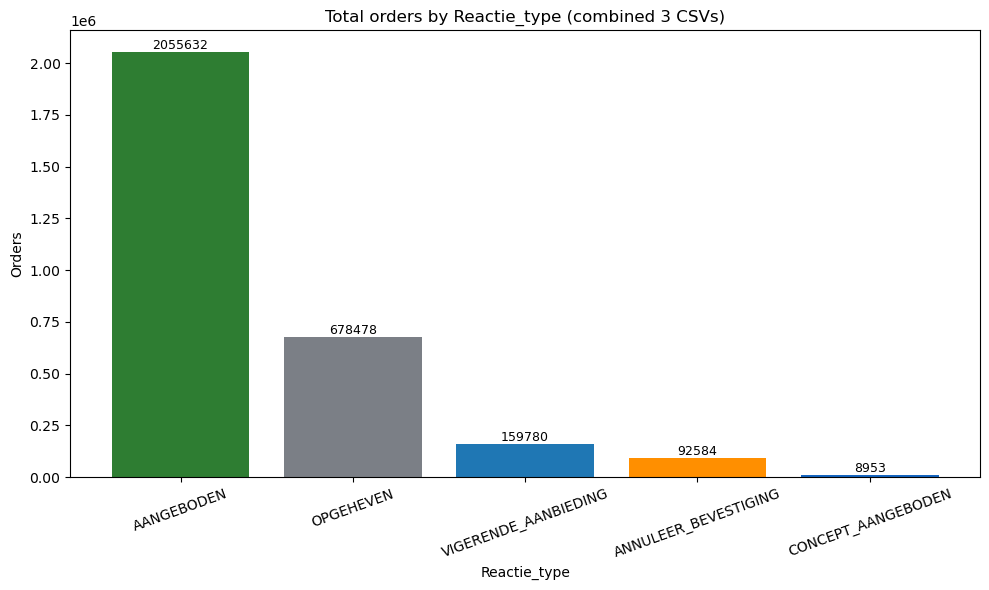

[OK] Saved plots_raw_combined\total_orders_by_reactie_type.png


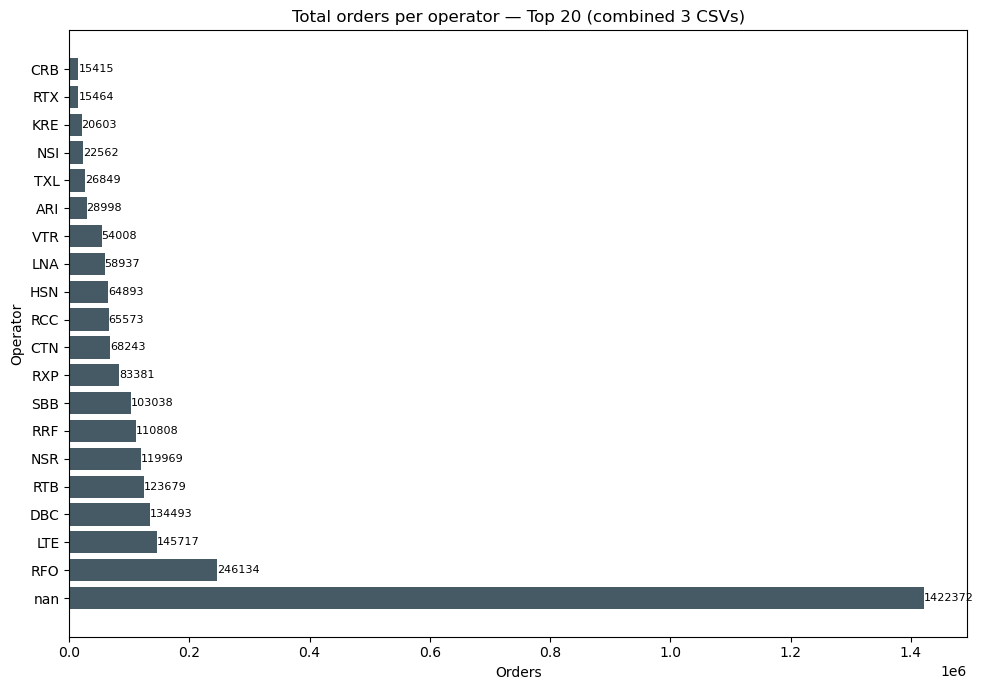

[OK] Saved plots_raw_combined\total_orders_per_operator_topN.png


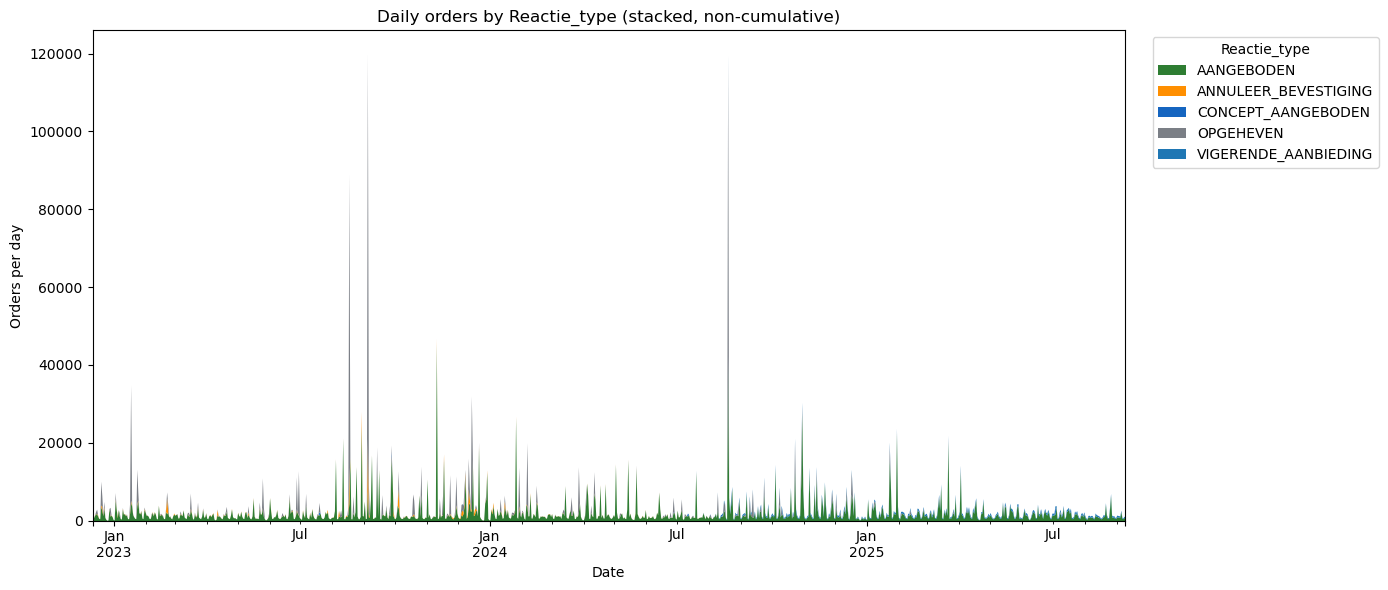

[OK] Saved plots_raw_combined\daily_orders_by_reactie_type_stacked.png


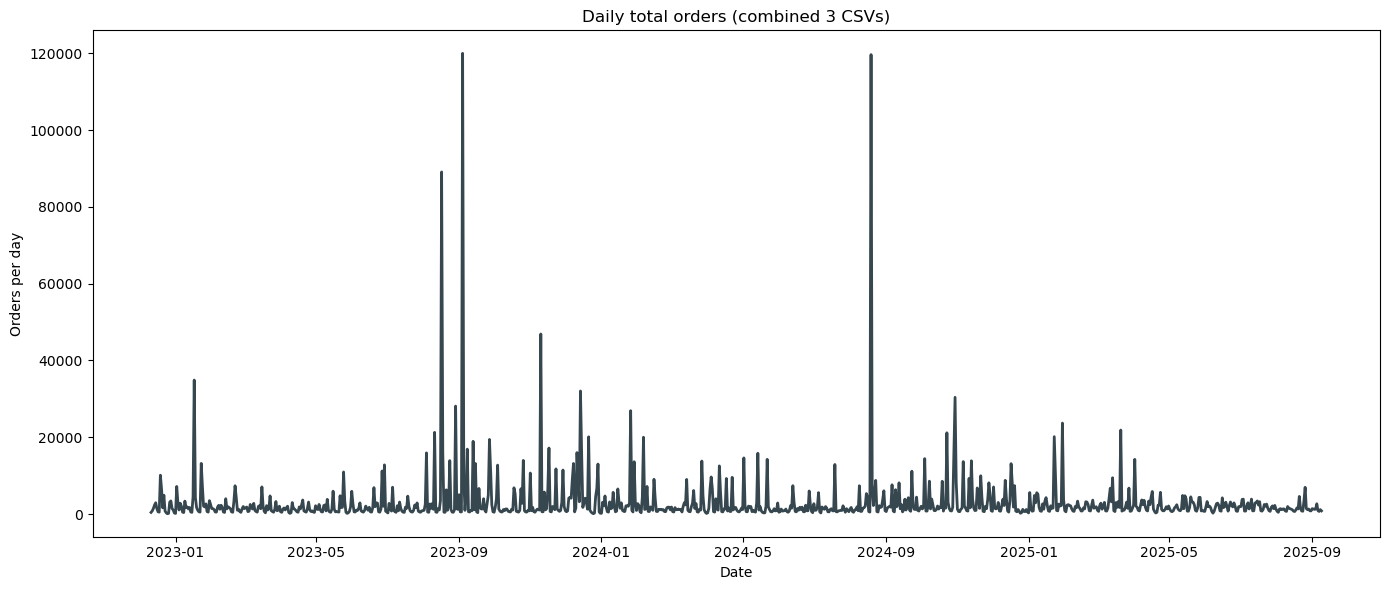

[OK] Saved plots_raw_combined\daily_total_orders.png

[Done] CSVs -> C:\Users\quint\Downloads\plots_raw_combined\tables
      Plots -> C:\Users\quint\Downloads\plots_raw_combined


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from collections import defaultdict, Counter
import itertools
from matplotlib import cm

# ================== CONFIG ==================
BASE_DIR = Path("OneDrive_1_8-10-2025")
FILES = [
    BASE_DIR / "sherlock-export-cm-orders_dag-2022-12-11-2023-12-09.csv",
    BASE_DIR / "sherlock-export-cm-orders_dag-2023-12-10-2024-12-14.csv",
    BASE_DIR / "sherlock-export-cm-orders_dag-2024-12-15-2025-09-09.csv",
]

START_DATE = pd.Timestamp("2022-12-11")  # enforce lower bound (filter out 1970/invalid)
END_DATE   = None                        # set like pd.Timestamp("2025-09-09") if you want an upper bound

OUT_DIR = Path("plots_raw_combined"); OUT_DIR.mkdir(exist_ok=True, parents=True)
OUT_CSV_DIR = OUT_DIR / "tables"; OUT_CSV_DIR.mkdir(exist_ok=True, parents=True)

CHUNK = 200_000
DATE_FREQ = "D"
MIN_OP_SHOW = 1000     # minimum orders for operator to include
TOP_N_OPS   = 20       # hard cap of operators shown

# Consistent colors (UPPERCASE keys)
COLOR_MAP = {
    "AANGEBODEN":               "#2E7D32",  # green
    "GEEN_AANBIEDING_MOGELIJK": "#C62828",  # red
    "AFWIJZING":                "#6A1B9A",  # purple
    "ANNULEER_BEVESTIGING":     "#FF8F00",  # amber
    "CONCEPT_AANGEBODEN":       "#1565C0",  # blue
    "OPGEHEVEN":                "#7B7F86",  # gray
}
# ===========================================

# ---------- Helpers ----------
SEPS = [None, ",", ";", "\t"]
ENCS = [None, "utf-8-sig", "latin1", "utf-16"]

def find_col(cols, candidates):
    low = {c.strip().lower(): c for c in cols}
    for cand in candidates:
        key = str(cand).strip().lower()
        if key in low:
            return low[key]
    return None

def open_csv_stream(path: Path):
    last_err = None
    for enc in ENCS:
        for sep in SEPS:
            try:
                if sep is None:
                    _probe = pd.read_csv(path, nrows=500, engine="python")
                    stream = pd.read_csv(path, chunksize=CHUNK, engine="python")
                else:
                    _probe = pd.read_csv(path, nrows=500, sep=sep, encoding=enc)
                    stream = pd.read_csv(path, chunksize=CHUNK, sep=sep, encoding=enc)
                _ = _probe.columns
                return stream
            except Exception as e:
                last_err = e
                continue
    raise RuntimeError(f"Could not open {path}. Last error: {last_err}")

def _canon(label: str) -> str:
    return str(label).strip().upper()

_COLOR_BOOK = {}
_FALLBACK_CYCLE = itertools.cycle(cm.get_cmap("tab20").colors)

def get_color(label):
    canon = _canon(label)
    if canon in COLOR_MAP:
        _COLOR_BOOK.setdefault(canon, COLOR_MAP[canon])
        return COLOR_MAP[canon]
    if canon not in _COLOR_BOOK:
        _COLOR_BOOK[canon] = next(_FALLBACK_CYCLE)
    return _COLOR_BOOK[canon]

def plot_stacked_area(df, title, outfile, ylabel="Orders per day"):
    if df is None or df.empty:
        print(f"[WARN] No data for: {title}")
        return
    cols = list(df.columns)
    colors = [get_color(c) for c in cols]
    plt.figure(figsize=(14,6))
    ax = plt.gca()
    df.plot.area(ax=ax, color=colors, linewidth=0)
    ax.set_title(title)
    ax.set_xlabel("Date")
    ax.set_ylabel(ylabel)
    ax.legend(title="Reactie_type", bbox_to_anchor=(1.02,1), loc="upper left")
    plt.tight_layout()
    out = OUT_DIR / outfile
    plt.savefig(out, dpi=150)
    plt.show()
    print(f"[OK] Saved {out}")

def bar_with_values(ax, x, heights, color=None, orientation="v", fmt="{:.0f}"):
    if orientation == "v":
        bars = ax.bar(x, heights, color=color)
        for b in bars:
            h = b.get_height()
            ax.text(b.get_x()+b.get_width()/2, h, fmt.format(h), ha="center", va="bottom", fontsize=8)
    else:
        bars = ax.barh(x, heights, color=color)
        for b in bars:
            w = b.get_width()
            ax.text(w, b.get_y()+b.get_height()/2, fmt.format(w), ha="left", va="center", fontsize=8)

# ---------- Accumulators (combined, non-cumulative over time) ----------
daily_by_rt = defaultdict(Counter)            # date -> Counter({reactie_type: n})
daily_by_op_total = defaultdict(int)          # (date, operator) -> sum over all reactietypes (for per-day operator plots if needed)
op_totals = Counter()                         # operator -> total count (across entire period)
rt_totals = Counter()                         # reactie_type -> total (across entire period)
all_dates = []

# ---------- Stream all files, filter date >= START_DATE (and <= END_DATE if set) ----------
for file in FILES:
    stream = open_csv_stream(file)
    for ch in stream:
        ch.columns = [c.strip() for c in ch.columns]
        col_rt   = find_col(ch.columns, ["Reactie_type", "reactie_type"])
        col_resp = find_col(ch.columns, ["Reactie_Moment", "reactie_moment"])
        col_req  = find_col(ch.columns, ["Aanvraag_Indienmoment", "aanvraag_indienmoment"])
        col_op   = find_col(ch.columns, ["Aanvrager_Verkorting", "Aanvraag_vervoerder_verkorting"])

        if col_rt is None or (col_resp is None and col_req is None):
            continue

        ch[col_rt] = ch[col_rt].astype(str).str.strip()

        # prefer Reactie_Moment; fallback Aanvraag_Indienmoment
        dt = None
        if col_resp:
            dt = pd.to_datetime(ch[col_resp], errors="coerce", infer_datetime_format=True)
        if dt is None or dt.isna().all():
            dt = pd.to_datetime(ch[col_req], errors="coerce", infer_datetime_format=True)

        ch["_date"] = dt.dt.floor(DATE_FREQ)

        # Date filters: >= START_DATE, and optional <= END_DATE
        if END_DATE is None:
            ch = ch[ch["_date"] >= START_DATE]
        else:
            ch = ch[(ch["_date"] >= START_DATE) & (ch["_date"] <= END_DATE)]

        ch = ch.dropna(subset=["_date", col_rt])
        if ch.empty:
            continue

        # operator
        if col_op:
            op = ch[col_op].astype(str).str.strip()
        else:
            op = pd.Series(["(onbekend)"] * len(ch), index=ch.index)

        # group daily by Reactie_type
        grp = ch.groupby(["_date", col_rt]).size().rename("n")
        for (d, r), n in grp.items():
            daily_by_rt[d][_canon(r)] += int(n)
            rt_totals[_canon(r)] += int(n)

        # operator totals (across entire period)
        op_totals.update(op.value_counts().to_dict())

        # collect dates for index
        all_dates.extend(ch["_date"].dropna().tolist())

# ---------- Build daily (non-cumulative) DataFrame ----------
if not all_dates:
    raise RuntimeError("No valid dates after filtering. Check source columns/values.")

date_index = pd.date_range(min(all_dates), max(all_dates), freq=DATE_FREQ)
all_reacties = sorted(set(rt_totals.keys()))
daily_rt_df = pd.DataFrame(0, index=date_index, columns=all_reacties, dtype=int)
for d, cnt in daily_by_rt.items():
    if d in daily_rt_df.index:
        for r, n in cnt.items():
            daily_rt_df.at[d, r] += n

daily_total = daily_rt_df.sum(axis=1)

# ---------- Export summary tables ----------
(pd.Series(rt_totals).sort_values(ascending=False)
   .to_csv(OUT_CSV_DIR / "total_counts_by_reactie_type.csv"))
(pd.Series(op_totals).sort_values(ascending=False)
   .to_csv(OUT_CSV_DIR / "total_counts_by_operator.csv"))
daily_rt_df.to_csv(OUT_CSV_DIR / "daily_counts_by_reactie_type.csv")
daily_total.to_csv(OUT_CSV_DIR / "daily_total_counts.csv", header=["total"])

# ---------- PLOTS (combined across 3 files, NOT cumulative over time) ----------

# 1) Total orders by Reactie_type (bar)
rt_series = pd.Series(rt_totals).sort_values(ascending=False)
plt.figure(figsize=(10,6))
colors = [get_color(c) for c in rt_series.index]
ax = plt.gca()
ax.bar(rt_series.index.astype(str), rt_series.values, color=colors)
for i, v in enumerate(rt_series.values):
    ax.text(i, v, f"{int(v)}", ha="center", va="bottom", fontsize=9)
ax.set_title("Total orders by Reactie_type (combined 3 CSVs)")
ax.set_ylabel("Orders")
ax.set_xlabel("Reactie_type")
plt.xticks(rotation=20)
plt.tight_layout()
plt.savefig(OUT_DIR / "total_orders_by_reactie_type.png", dpi=150)
plt.show()
print(f"[OK] Saved {OUT_DIR/'total_orders_by_reactie_type.png'}")

# 2) Total orders per operator (Top-N; barh)
op_series = pd.Series(op_totals).sort_values(ascending=False).head(TOP_N_OPS)
plt.figure(figsize=(10, max(6, 0.35*len(op_series))))
ax = plt.gca()
bar_with_values(ax, op_series.index.astype(str), op_series.values, color="#455A64", orientation="h", fmt="{:.0f}")
ax.set_title(f"Total orders per operator — Top {len(op_series)} (combined 3 CSVs)")
ax.set_xlabel("Orders")
ax.set_ylabel("Operator")
plt.tight_layout()
plt.savefig(OUT_DIR / "total_orders_per_operator_topN.png", dpi=150)
plt.show()
print(f"[OK] Saved {OUT_DIR/'total_orders_per_operator_topN.png'}")

# 3) Daily orders by Reactie_type (stacked area, non-cumulative)
plot_stacked_area(
    daily_rt_df,
    "Daily orders by Reactie_type (stacked, non-cumulative)",
    "daily_orders_by_reactie_type_stacked.png",
    ylabel="Orders per day"
)

# 4) Daily total orders (line)
plt.figure(figsize=(14,6))
plt.plot(daily_total.index, daily_total.values, color="#37474F", linewidth=2.0)
plt.title("Daily total orders (combined 3 CSVs)")
plt.xlabel("Date")
plt.ylabel("Orders per day")
plt.tight_layout()
plt.savefig(OUT_DIR / "daily_total_orders.png", dpi=150)
plt.show()
print(f"[OK] Saved {OUT_DIR/'daily_total_orders.png'}")

print("\n[Done] CSVs ->", OUT_CSV_DIR.resolve())
print("      Plots ->", OUT_DIR.resolve())
